# AST 4930 Week 7

## Emsemble Methods

### Bagging

Text(0, 0.5, 'Feature 2')

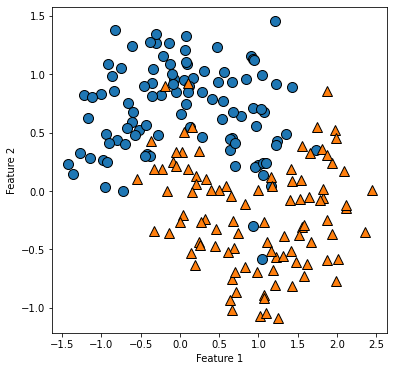

In [1]:
import sklearn
import mglearn
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 6))

X, y = sklearn.datasets.make_moons(n_samples=200, noise=0.3, random_state=3)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")

### Bootstrap

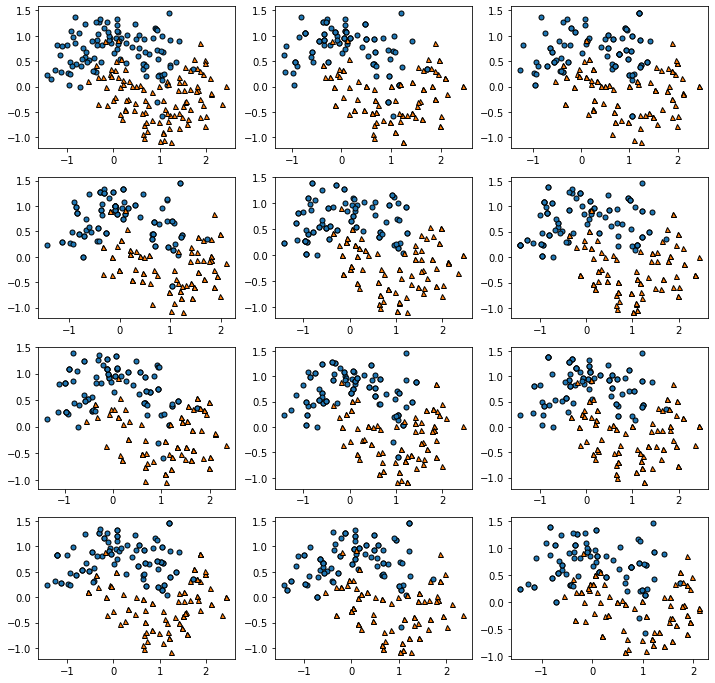

In [2]:
import numpy as np

npanel = 12

fig, axs = plt.subplots(4, 3, figsize=(12, 12))
axs = axs.ravel()

mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax = axs[0], s=5)

for i in np.arange(npanel-1):
    # This is where bootstrap is happening.
    indices_with_replacement = np.random.randint(0, len(X), len(X))
    X_new = X[indices_with_replacement]
    y_new = y[indices_with_replacement]

    mglearn.discrete_scatter(X_new[:, 0], X_new[:, 1], y_new, ax = axs[i+1], s=5)

### Decision boundary

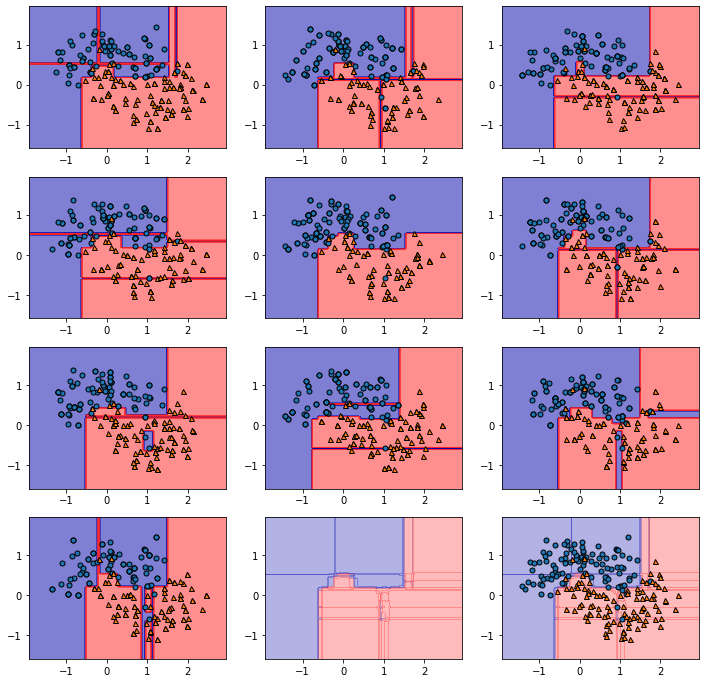

In [3]:
from sklearn.tree import DecisionTreeClassifier

npanel = 12

fig, axs = plt.subplots(4, 3, figsize=(12, 12))
axs = axs.ravel()

xx = np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 100)
yy = np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 100)

XX, YY = np.meshgrid(xx, yy)

# Array to save the averaged decision boundary
Zavg = np.zeros_like(XX)

for i in np.arange(npanel-2):
    indices_with_replacement = np.random.randint(0, len(X), len(X))
    X_new = X[indices_with_replacement]
    y_new = y[indices_with_replacement]
    # DT model with bootstrapped data
    model = DecisionTreeClassifier(random_state=i)
    model.fit(X_new, y_new)
    Z = model.predict(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    Zavg += Z

    axs[i].contourf(XX, YY, Z, alpha=0.5, cmap=mglearn.cm2)
    mglearn.discrete_scatter(X_new[:, 0], X_new[:, 1], y_new, ax = axs[i], s=5)

# Average the decision boundary
Zavg /= npanel

axs[-1].contourf(XX, YY, Zavg, alpha=0.3, cmap=mglearn.cm2)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax = axs[-1], s=5)

axs[-2].contourf(XX, YY, Zavg, alpha=0.3, cmap=mglearn.cm2)

### BaggingClassifier

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
# See https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html
    
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, 
                            max_samples=1.0, bootstrap=True, random_state=0)
bag_clf.fit(X_train, y_train)
bag_clf.score(X_test, y_test)

0.96

In [5]:
from sklearn.metrics import accuracy_score

tree_clf = DecisionTreeClassifier(random_state=0)
tree_clf.fit(X_train, y_train)
tree_clf.score(X_test, y_test)

0.82

### Decision boundary

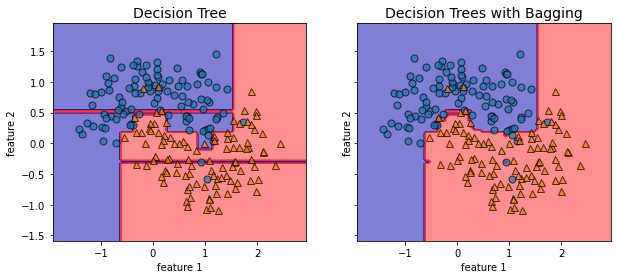

In [6]:
def plot_decision_boundary(model, X, y, alpha=0.5):
    xx = np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 100)
    yy = np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 100)

    XX, YY = np.meshgrid(xx, yy)
    Z = model.predict(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)

    plt.contourf(XX, YY, Z, alpha=alpha, cmap=mglearn.cm2)

    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, s=7, alpha=0.7)

    plt.xlabel('feature 1')
    plt.ylabel('feature 2')
    
fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)

plt.sca(axes[0])
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)

plt.sca(axes[1])
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)

plt.show()

### Random Forests

Text(0, 0.5, 'feature 2')

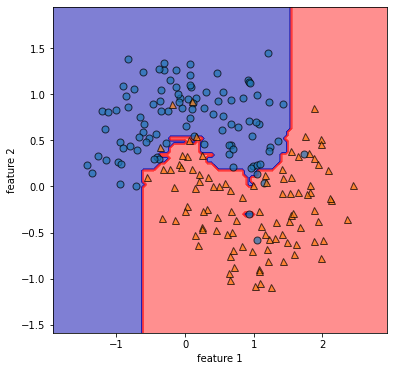

In [7]:
from sklearn.ensemble import RandomForestClassifier
#See https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

model = RandomForestClassifier(n_estimators=500, oob_score=True)
model.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(6, 6))

xx = np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 100)
yy = np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 100)

XX, YY = np.meshgrid(xx, yy)
Z = model.predict(np.c_[XX.ravel(), YY.ravel()])
Z = Z.reshape(XX.shape)

plt.contourf(XX, YY, Z, alpha=0.5, cmap=mglearn.cm2)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y, s=7, alpha=0.7)

plt.xlabel('feature 1')
plt.ylabel('feature 2')
    

### Two scores

In [8]:
model = RandomForestClassifier(n_estimators=500, oob_score=True)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.96

In [9]:
model = RandomForestClassifier(n_estimators=500, oob_score=True)
model.fit(X, y)
model.oob_score_

0.925

### Let's try Random Forests on the MNIST data we used in Week 5.

In [10]:
# You need to select Tensorflow kernel to load the data
from tensorflow.keras.datasets import mnist

# Load the data, split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

2021-10-07 12:09:29.774130: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/slurm/lib64:/opt/slurm/lib64:
2021-10-07 12:09:29.774166: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


###  We will take 1/50 of the data.

In [11]:
X_train = X_train[::50]
y_train = y_train[::50]
X_test = X_test[::50]
y_test = y_test[::50]

Text(0.5, 1.0, 'The number is = 5')

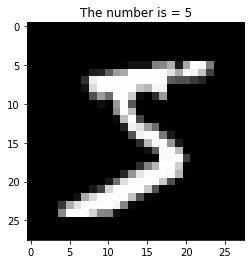

In [12]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap='gray')
plt.title('The number is = {}'.format(y_train[0]))

### We will "flatten" the data. By flattening, we convert a 2d array with 28x28 elements to an 1d array with 784 elements.

In [13]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

### Let's check the performance of a single DT.

### TODO: write a script that finds the DT model using hyperparameter optimization.

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import numpy as np

param_grid = {'max_depth': np.arange(10)+1,
              'criterion': ['gini','entropy']}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=5, return_train_score=True, 
                           verbose=1,n)
grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best model: {}".format(grid_search.best_estimator_))
print("Test score: {:.2f}".format(grid_search.score(X_test, y_test)))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'criterion': 'entropy', 'max_depth': 9}
Best model: DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=0)
Test score: 0.66


### Q: What is the test score?

### TODO: Now let's check out how Random Forests perform. Compare the score obtained with test dataset and the OOB score obtained with the entire dataset.

In [16]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=500)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.895

In [17]:
model = RandomForestClassifier(n_estimators=500, oob_score=True)
model.fit(X_train, y_train)
model.oob_score_

0.9016666666666666

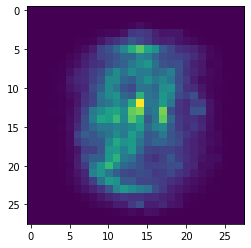

In [18]:
plt.imshow(model.feature_importances_.reshape(28,28))

### AdaBoost

Text(0, 0.5, 'Feature 2')

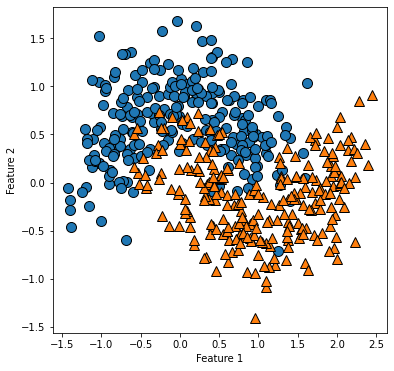

In [19]:
import sklearn
import mglearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

fig, ax = plt.subplots(figsize=(6, 6))

## 50 samples w/ noise and split
X, y = sklearn.datasets.make_moons(n_samples=500, noise=0.3, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")

In [20]:
## load modules
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

## base estimator DTClassifier(max_depth=1) will by default use DT w/ max depth 3
## if want to use something else, put in place of that
##estimating model 200 times
## algorithm = SAMME uses probabiliy that point will be 0 or 1
## learning rate 0.5
model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200,
                           algorithm="SAMME", learning_rate=0.5, random_state=0)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.88

88% score, is okay. 

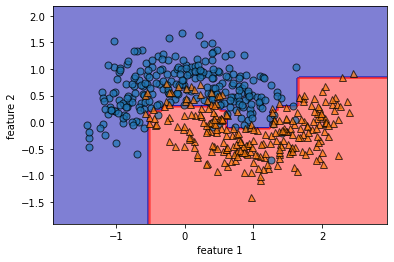

In [21]:
plot_decision_boundary(model, X, y)

### Let's try AdaBoost on two Gaussians.

Text(0, 0.5, 'Feature 2')

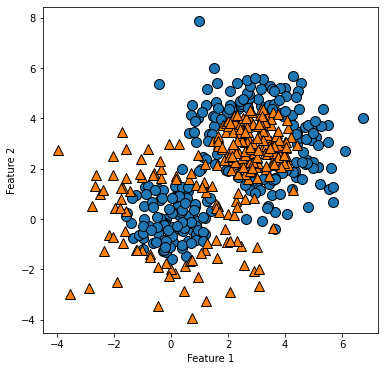

In [22]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Construct dataset

## gaussian blob centered at 0.0
X1, y1 = make_gaussian_quantiles(cov=2., n_samples=200, n_features=2, 
                                 n_classes=2, random_state=1)

## 2nd gaussian component centered at 3.3
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5, n_samples=300, n_features=2, 
                                 n_classes=2, random_state=1)

# Merge the two Gaussian
X = np.concatenate((X1, X2))
# We reverse the class of y2
y = np.concatenate((y1, - y2 + 1))


## split the merged datasets 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

fig, ax = plt.subplots(figsize=(6, 6))

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")

### What ML algorithm do you think would work the best? SVM!

### TODO: Find the best SVM model using hyperparameter optimization.

In [23]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([
    ('scaler', StandardScaler()), 
    ('SVM', SVC(kernel='rbf'))
])

# Choose hyperparameters to optimize.
param_grid = {'SVM__C': [0.01, 0.1, 1., 10., 100.],
              'SVM__gamma': [0.01, 0.1, 1., 10., 100.]}

## grid search using cross validation
grid_search = GridSearchCV(pipe, param_grid, cv=5, return_train_score=True, verbose=1)
grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best model: {}".format(grid_search.best_estimator_))
print("Test score: {:.2f}".format(grid_search.score(X_test, y_test)))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best parameters: {'SVM__C': 100.0, 'SVM__gamma': 1.0}
Best model: Pipeline(steps=[('scaler', StandardScaler()), ('SVM', SVC(C=100.0, gamma=1.0))])
Test score: 0.97


### Plot the decision boundary.

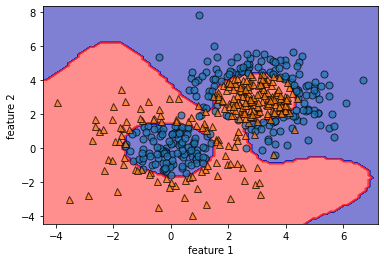

In [24]:
plt.figure(figsize=(6, 4))

# Plot the decision boundaries
plot_decision_boundary(grid_search.best_estimator_, X, y)


### SVM did a good job as we expected. What about DT?

### TODO: Find the best (single) DT model using hyperparameter optimization.

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': np.arange(10)+1,
              'criterion': ['gini','entropy']}

# By defaults, sklearn's GridSearchCV will use stratified k-fold for classification problems.
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, return_train_score=True, 
                           verbose=1)
grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best model: {}".format(grid_search.best_estimator_))
print("Test score: {:.2f}".format(grid_search.score(X_test, y_test)))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'criterion': 'entropy', 'max_depth': 9}
Best model: DecisionTreeClassifier(criterion='entropy', max_depth=9)
Test score: 0.93


### Plot the decision boundary.

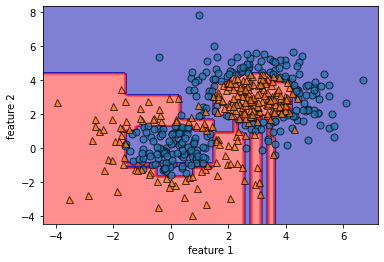

In [26]:
plt.figure(figsize=(6, 4))

# Plot the decision boundaries
plot_decision_boundary(grid_search.best_estimator_, X, y)


### Single DT did okay. Now, let's check out DT with AdaBoost.

In [27]:
model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), algorithm="SAMME", 
                           n_estimators=200, random_state=0)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.872

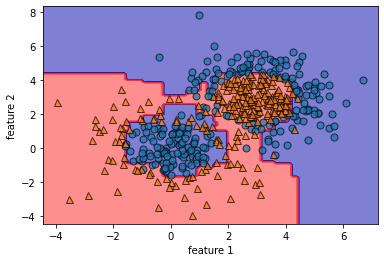

In [28]:
plt.figure(figsize=(6, 4))

# Plot the decision boundaries
plot_decision_boundary(model, X, y)


Score is worse than DT but boundary lines look better/smoother

### Hyperparameter Optimization for AdaBoost

In [29]:
## can optimize for better score
param_grid = {'base_estimator__max_depth': [3, 5, 10],
              'n_estimators': [10, 50, 100, 200],
              'learning_rate': [0.001, 0.01, 0.1, 1.0]}

## use DTClassifier for AdaBoost
grid_search = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(), 
                                              algorithm="SAMME", random_state=0), 
                           param_grid, cv=5, return_train_score=True, verbose=1)
grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best model: {}".format(grid_search.best_estimator_))
print("Test score: {:.2f}".format(grid_search.score(X_test, y_test)))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters: {'base_estimator__max_depth': 5, 'learning_rate': 0.1, 'n_estimators': 50}
Best model: AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=5),
                   learning_rate=0.1, random_state=0)
Test score: 0.96


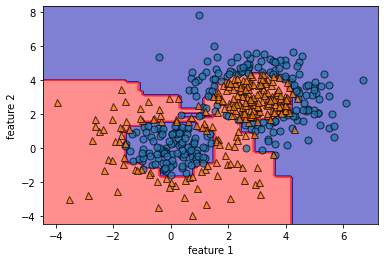

In [30]:
plt.figure(figsize=(6, 4))

# Plot the decision boundaries
plot_decision_boundary(grid_search.best_estimator_, X, y)


### The problem with outliers: we will use exactly the same two Gaussian dataset, but with an outlier.

Text(0, 0.5, 'Feature 2')

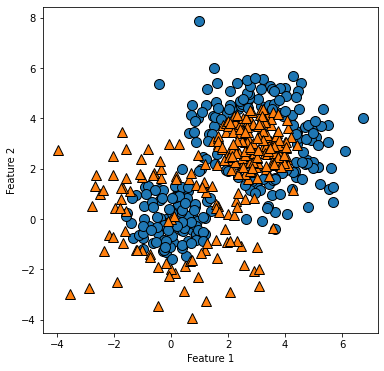

In [31]:
# Construct dataset
X1, y1 = make_gaussian_quantiles(cov=2., n_samples=200, n_features=2, 
                                 n_classes=2, random_state=1)
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5, n_samples=300, n_features=2, 
                                 n_classes=2, random_state=1)

# Merge the two Gaussian
X = np.concatenate((X1, X2))
# We reverse the class of y2
y = np.concatenate((y1, - y2 + 1))

# These are the outliers.
X_out = np.array([[0, 0], [0.1, 0.1], [-0.1, -0.1]])
y_out = np.array([1, 1, 1])

X = np.concatenate((X, X_out))
y = np.concatenate((y, y_out))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

fig, ax = plt.subplots(figsize=(6, 6))

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")

3 outliers are the orange triangles at center of blue

0.8253968253968254


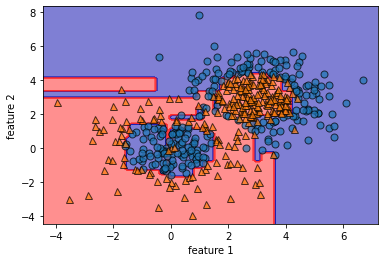

In [32]:
## updates model 100 times
model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10), algorithm="SAMME", 
                           n_estimators=100, random_state=0)

model.fit(X_train, y_train)
print(model.score(X_test, y_test))

plt.figure(figsize=(6, 4))

# Plot the decision boundaries
plot_decision_boundary(model, X, y)


Doesn't do well w/ outliers but score isnt terrible. Still not better than single DT

### What about Random Forests? Does RF have the same problem?

### TODO: Build a RF model and make a plot showing the decision boundary.

0.8968253968253969


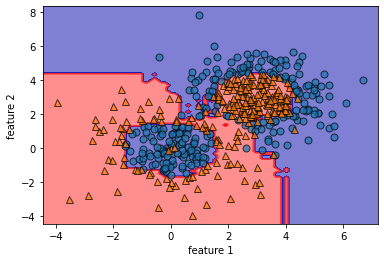

In [33]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, oob_score=True)

model.fit(X_train, y_train)
print(model.score(X_test,y_test))

plt.figure(figsize=(6, 4))

# Plot the decision boundaries
plot_decision_boundary(model, X, y)


### Q: What did you find?

Ada boosting can do good job if you optimize hyper params 

### Gradient Boosting Regressor

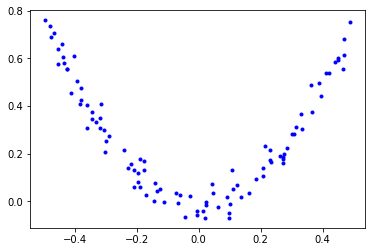

In [34]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import matplotlib.pyplot as plt

## generate 100 data points around y = 3x^2 +.05 and some noise
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

plt.plot(X, y, 'b.')

### Building a GBR model.

In [35]:
## GBR, specify depth, n estimators, learning rate
model = GradientBoostingRegressor(max_depth=2, n_estimators=20, learning_rate=1.0, random_state=42)
model.fit(X, y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=20,
                          random_state=42)

Text(0, 0.5, '$y$')

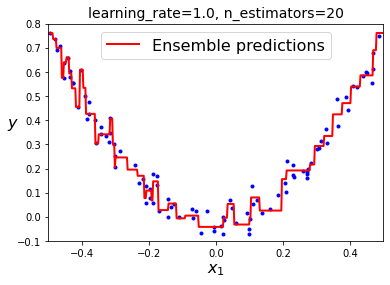

In [36]:
## function to plot
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)
    
fix, ax = plt.subplots(figsize=(6,4))

plot_predictions([model], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="Ensemble predictions")
plt.title("learning_rate={}, n_estimators={}".format(model.learning_rate, model.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

Text(0.5, 0, '$x_1$')

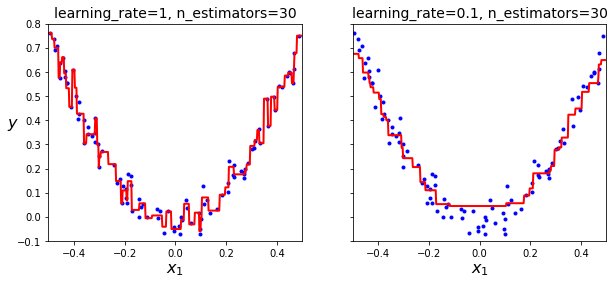

In [37]:
## if we change learning rate, how does it effect?
## max depth 2, estimators 30
max_depth = 2
n_estimators = 30

## 2 diff models. one w. learning rate = 1 and other w/ 2
model = GradientBoostingRegressor(max_depth=max_depth, n_estimators=n_estimators, 
                                  learning_rate=1, random_state=42)
model.fit(X, y)

model_slow = GradientBoostingRegressor(max_depth=max_depth, n_estimators=n_estimators, 
                                       learning_rate=0.1, random_state=42)
model_slow.fit(X, y)

fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)

plt.sca(axes[0])
plot_predictions([model], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("learning_rate={}, n_estimators={}".format(model.learning_rate, model.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.sca(axes[1])
plot_predictions([model_slow], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("learning_rate={}, n_estimators={}".format(model_slow.learning_rate, model_slow.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)


Learnign rate 1 gets too answer quicker but more overfit. Smaller learnign rte doesn;t have answer yet but looks better

### Gradient Boosting with Early stopping

In [38]:
## can stop early before you reach the end
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=49)

## trying up to 120 itterations
model = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)
model.fit(X_train, y_train)

#Here, "staged_predict" gives the prediction at each stage.
## calculating mean squared error b/t test and predicted label where model staged predict gives all estimations 
## then can find where error is minimized 
errors = [mean_squared_error(y_test, y_pred) for y_pred in model.staged_predict(X_test)]
best_n_estimators = np.argmin(errors) + 1

## best model where error is min
model_best = GradientBoostingRegressor(max_depth=2, n_estimators=best_n_estimators, random_state=42)
model_best.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=56, random_state=42)

Text(0.5, 0, '$x_1$')

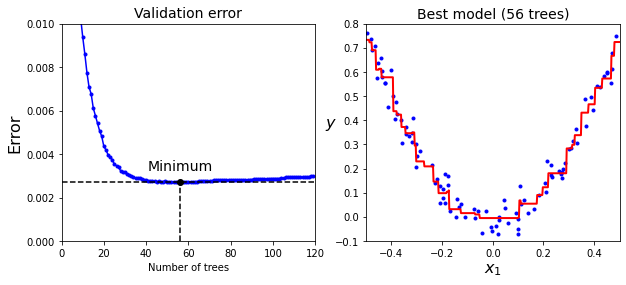

In [39]:
## plotting error for each step, record, find minimum at 56 itterations
plt.figure(figsize=(10, 4))

min_error = np.min(errors)

plt.subplot(121)
plt.plot(errors, "b.-")
plt.plot([best_n_estimators, best_n_estimators], [0, min_error], "k--")
plt.plot([0, 120], [min_error, min_error], "k--")
plt.plot(best_n_estimators, min_error, "ko")
plt.text(best_n_estimators, min_error*1.2, "Minimum", ha="center", fontsize=14)
plt.axis([0, 120, 0, 0.01])
plt.xlabel("Number of trees")
plt.ylabel("Error", fontsize=16)
plt.title("Validation error", fontsize=14)

plt.subplot(122)
plot_predictions([model_best], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("Best model (%d trees)" % best_n_estimators, fontsize=14)
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.xlabel("$x_1$", fontsize=16)

### Should we run all the models to find the best model? We can stop early.

In [40]:
#When warm_start is set to True, reuse the solution of the previous call to fit 
#and add more estimators to the ensemble, otherwise, just erase the previous solution.

#See https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#

## warm start. Build model and update to model 2 and so. Instead of updating 50 times to get 50, do 49 and record that and then 50. only runs once 
model = GradientBoostingRegressor(max_depth=2, warm_start=True, random_state=42)

## min validation error set to infinity at the beginning
## if error goes down, is good. as we pass min error goes up. Count how many times error goes up continiously
## if error goes up 5 times in a row, then stop b/c we're overrfitting now
min_val_error = float("inf")
error_going_up = 0
error_tolerance = 5

## estimate 1 to 120
for n_estimators in range(1, 120):
    model.n_estimators = n_estimators
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test) ## predict for x_test
    val_error = mean_squared_error(y_test, y_pred) ## validation error b/t prediction and test
    if val_error < min_val_error: ## if val error is < min then record the number and say error isn't going up, = 0
        min_val_error = val_error
        error_going_up = 0
    else: ## when error goes up, add one. if it doesn't go up again, resets
        error_going_up += 1
        if error_going_up == error_tolerance: ## if the error goes up again, add another. If u add five times in a row then error = tollerance and stop
            model.n_estimators = n_estimators - error_tolerance
            break  # early stopping

In [41]:
print(model.n_estimators)
print("Minimum validation MSE:", min_val_error)

56
Minimum validation MSE: 0.002712853325235463


Text(0.5, 0, '$x_1$')

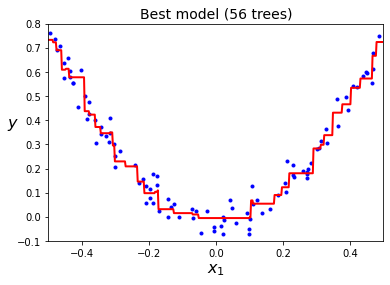

In [42]:
model_best = GradientBoostingRegressor(max_depth=2, n_estimators=model.n_estimators, random_state=42)
model_best.fit(X_train, y_train)

plot_predictions([model_best], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("Best model (%d trees)" % model.n_estimators, fontsize=14)
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.xlabel("$x_1$", fontsize=16)

### Photometric redshift estimator using AdaBoost and Gradient Boosting

Our goal is to estimate photometric redshifts starting from observations of galaxy magnitudes in six different photometric bands (u, g, r, i, z, y).

Essentially, we try to reproduce/improve upon the results of [this paper](https://arxiv.org/abs/1903.08174), for which the data are public and available [here](http://d-scholarship.pitt.edu/36064/).

This example is from the ML book that is being written by Dr. Viviana Acquaviva.

To find redshift you get spectrum, see wavelengths, compare to rest freuency, and see how much values are shifted.

Delta lamda/lamda = v/c to find redshift.

Getting spectrum is hard so we try to use photometric data. 

In [43]:
import pandas as pd

features = pd.read_csv('/blue/ast4930/share/sel_features.csv', sep = '\t')
target = pd.read_csv('/blue/ast4930/share/sel_target.csv')

In [44]:
features

,u_apercor,g_apercor,r_apercor,i_apercor,z_apercor,y_apercor
0,24.2444,23.9796,23.5221,22.9110,22.5258,22.3291
1,24.4891,23.9162,22.9237,21.8738,21.3065,21.2514
2,24.8740,22.9739,21.4659,20.7884,20.4623,20.4137
3,24.5290,24.3386,23.8912,23.2061,22.9893,23.1124
4,23.6412,23.3874,22.9753,22.2352,21.8097,21.5595
...,...,...,...,...,...,...
6302,24.4551,24.2760,24.2338,24.1096,23.8095,23.3895
6303,23.4610,23.0077,22.3591,21.5531,20.9463,20.9721
6304,24.6150,22.9851,21.6015,21.0273,20.7327,20.5881
6305,22.6113,22.0808,21.4048,21.1883,20.9630,20.9989


In [45]:
target ## redshift for each of those objects

,zhelio
0,1.0034
1,0.9023
2,0.4242
3,0.7690
4,0.9910
...,...
6302,1.4731
6303,0.9910
6304,0.3703
6305,0.3710


In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target.values.ravel(), random_state=49)


### Let's use the "default" AdaBoostRegressor and see what happens.

In [47]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_validate, KFold, cross_val_predict, GridSearchCV

model = AdaBoostRegressor() ## default model w/o changing any params
model.fit(X_train, y_train) ## fit
y_pred = model.predict(X_test) ## make prediction

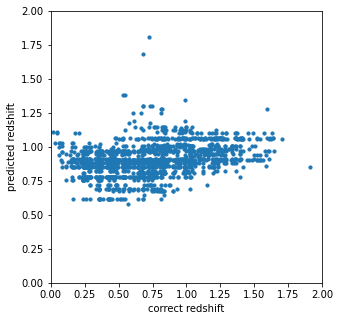

In [48]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))

ax.scatter(y_test, y_pred, s=10)

ax.set_ylim(0,2)
ax.set_xlim(0,2)
ax.set_xlabel('correct redshift')
ax.set_ylabel('predicted redshift')
ax.set_aspect('equal')

correct z from 0 to 2 and predicted z is 1 so the model isn't doing well

### Okay, not very impressive... What's our model again?

In [49]:
#base_estimator: If None, then the base estimator is DecisionTreeRegressor(max_depth=3).

model.get_params()

{'base_estimator': None,
 'learning_rate': 1.0,
 'loss': 'linear',
 'n_estimators': 50,
 'random_state': None}

### The default model might be too poor given the size of the data. Let's try to use somewhat better initial estimator to start with by varying "max_depth".

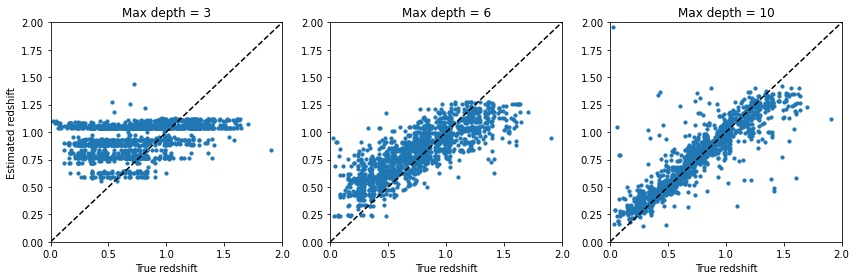

In [50]:
from sklearn.tree import DecisionTreeRegressor

plt.figure(figsize=(12,4))

for i, depth in enumerate([3,6,10]):
    plt.subplot(1,3,i+1)
    model = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=depth))
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    plt.scatter(y_test, y_pred, s=10)
    plt.title('Max depth = '+str(depth))
    plt.xlabel('True redshift')
    if i == 0:
        plt.ylabel('Estimated redshift')
    plt.ylim(0,2)
    plt.xlim(0,2)
    plt.plot([0.,2.],[0.,2.],'k--')
    
    plt.tight_layout()


Max depth 6 is probably best b/c max depth 10 is expensive computationally

### TODO: We can now try to optimize hyperparameters using GridSearchCV.

### TODO: Make a plot comparing correct redshift and predicted redshift.

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))

y_pred = 

ax.scatter(y_test, y_pred, s=10)
ax.plot([0.,2.],[0.,2.],'k--')

ax.set_ylim(0,2)
ax.set_xlim(0,2)
ax.set_xlabel('correct redshift')
ax.set_ylabel('predicted redshift')
ax.set_aspect('equal')

### Since AdaBoost is based on DT, it comes with feature importance.

In [ ]:
import numpy as np

model = grid_search.best_estimator_

def plot_feature_importances(model):
    n_features = X_test.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), features.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    
plot_feature_importances(model)

### Now, let's try GBR.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))

ax.scatter(y_test, y_pred, s=10)
ax.plot([0.,2.],[0.,2.],'k--')

ax.set_ylim(0,2)
ax.set_xlim(0,2)
ax.set_xlabel('correct redshift')
ax.set_ylabel('predicted redshift')
ax.set_aspect('equal')

In [ ]:
model.score(X_test, y_test)

### TODO: Build a GBR model using hyperparameter optimization.

In [ ]:
import time

tstart = time.time()

param_grid = {'max_depth':[6,10],
              'n_estimators': [20, 50, 100, 200],
              'learning_rate': [0.01, 0.1, 1.0]}

grid_search = GridSearchCV()
                           
grid_search.fit()

print("Best parameters: {}".format(grid_search.best_params_))
print("Best model: {}".format(grid_search.best_estimator_))
print("Test score: {:.2f}".format(grid_search.score()))

print("Elapsed time: {:.2f}".format(time.time()-tstart)+" seconds")

### TODO: Make a plot comparing correct redshift and predicted redshift.

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))

y_pred =

ax.scatter(y_test, y_pred, s=10)
ax.plot([0.,2.],[0.,2.],'k--'){
 "cells": [
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "### Gaussian mixture"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 1,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "<matplotlib.collections.PathCollection at 0x7fa97089ecd0>"
      ]
     },
     "execution_count": 1,
     "metadata": {},
     "output_type": "execute_result"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAXIAAAD4CAYAAADxeG0DAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjQuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8rg+JYAAAACXBIWXMAAAsTAAALEwEAmpwYAABKYklEQVR4nO29fXRUZ37n+X2qSoUACckyQoBA4l10GY9twhgcgzFrK3RnvGNns3vONCQ+MWfNkHjizm7a2Un3rOPjPXNO5uAzM+2J2153Ys90GuzdvLTpZNxNCy824DQQbOwglxHI0EIIEJJlCQkkJFU9+0fpuXruU899q3vr5ZZ+n3NsVFW37n3urXt/z+/5vTLOOQiCIIjwEin2AAiCIAh/kCAnCIIIOSTICYIgQg4JcoIgiJBDgpwgCCLkxIpx0Pnz5/Nly5YV49AEQRCh5aOPPurnnNer7xdFkC9btgynTp0qxqEJgiBCC2OsS/c+mVYIgiBCDglygiCIkEOCnCAIIuSQICcIggg5JMgJgiBCTiBRK4yxXwIYBpACMMk53xDEfgmCIAhnggw/3MY57w9wf8QMpy3Zi6Pn+7BldT1aEw3FHg5BlCxkWiFKkrZkL5596zR++IsuPPvWabQle4s9JIIoWYIS5BzAzxljHzHGdus2YIztZoydYoyd6uvrC+iwRLly9HwfRidSAIDRiRSOnqd7hiCsCEqQb+acrwfwDQDPMMYeUjfgnL/OOd/AOd9QX5+VYUoQJrasrsfsiigAYHZFFFtW0z1DEFYEYiPnnPdM/XudMfZjAPcDOBLEvomZSWuiAS9/8z6ykZcw5MMoHXwLcsbYXAARzvnw1N+/BuBF3yMjZjytiQYSECWK8GGMTqTwV6cu4+Vv3ke/VREJwrTSAOAYY+xTACcB/HfO+c8C2C9BECUK+TBKC98aOef8AoB7AhgLQRAhYcvqevzVqcsYnUiRD6MEKEoZW4Igwg35MEoLEuQEQeQE+TBKB0oIIgiCCDkkyAmCIEIOCXKCIIiQQ4KcIAgi5JAgJwiCCDkUtUKUPJQKThD2kEZOlDRUzpYgnCFBTpQ0lApOEM6QICdKGipnSxDOkI2cKGkoFZwgnCFBTpQ8xUgFJwcrESbItEIQCuRgJcIGCXKCUCAHKxE2SJAThAI5WImwEZiNnDEWBXAKQA/n/LGg9kuUB2GyOZODlQgbQTo7vwXgcwDzAtwnUQbo+jsCKGlBSbW2iTARiCBnjC0B8C8A/HsA/3sQ+yTKB9XmvP9EF45fGKDGvQQREEHZyP8zgD8CkLbagDG2mzF2ijF2qq+PnEczCdXmDMDSmdiW7MXzB9opUoQgPOBbI2eMPQbgOuf8I8bYw1bbcc5fB/A6AGzYsIH7PS5RWPzYuFWbMwBDI5ediToTDGnqBOFMEKaVBwH8S8bYrwOoBDCPMfYjzvlvBbBvogQIQsCqNmedM1EX9keCnCCc8W1a4Zz/Med8Ced8GYB/BeD/IyFeXriJq7Yzieg+a0004MXH15kENYX9EURuUIo+oUU2pVRXVpg+U1/baexetHkK+yOI3AhUkHPO3wfwfpD7JAqPKnw3ragzfT48NmF6bWcS8WouobC/4AhT7D7hD8rsJLJQhS8AW5OHnUmEzCXFgerFzCzItEJksWV1Pf7q1GUjqmTHxmbs2Nhsqd3ZmUTIXFIcyHE8s2CcFz4ScMOGDfzUqVMFPy7hHlqWhxvZPDa7IkqhnGUCY+wjzvmGrPdJkBNBQ5NAaUC/Q/lhJcjJtEIEghAa1ZUVeOPYRUrqKQHIcTxzIEE+wwhKS5P3A8BYxkcjDKl0ZpVHtlmCKAwkyGcQfjM0rbTuTSvqDMdaKs0RZUCKU5RKWCATTPghQT6D8BPJIE8CqtYNZIS2cKzt2rwcw2MTrgQDCZHiQvVtygMS5DMIOawwyrIzNO2QJ4FUmiOCTKnLeDTiGJ5ohZUQIeFeOChMsTyghKAZRGuiAbs2L89o1Bx449hFx0QRUSelurLCSOyJRyOIRBgAIM05Xn7vHPaf6PIseHVChBJZCgslbJUHpJHPMIbHJrTOSNV5qdrCZZNJ98AtHO7IFM6aTHOc6bkBAPiw80u8snO9K2HeluxF98AtxKMRjKfSiEcj6B64hf0nukhDLCCUsFUekCCfYahZm1tW15tMHG+f7AYAjKfSWbbw4bEJvPj4OrQle4164jLjqbQrwSsfLx6N4O7Gefj86jAOd/QhFmGGcCcNsTBQmGL4IUE+w9BpYM8faDeE8nhqusmTVQSK2Mf+E104er4fk1PCPh6NuBK8skllPJVGz+CYsY/JNMe6xnlY31RLGiJBuIQE+QxE1cBkLT0ezbhNhEa8a/NyJK8MWe6jLdmL/Se6AAA7Nja7ErxbVtfj7ZPdxqTx1c1x0+f1VXG8+Pi6nM+PKCzknC4+lKJPAMhO8NEl+wRRs0Mc5/SlrwzbOgBTFMzTD61wHb5IFBeq6VJYKEWfsEXV0sXfstnFyvnoViNTbeOyLVw4UinFf5owaLoUvlgakCAnbLHrDiTMKh92fonxVBr7TlzCnq0r8dz2Fu2+VNv4tpZ6LK2bYxJUbiaOmUBYEnV0znOi8PgW5IyxSgBHAMya2t9fc87/xO9+idJA7QYkXsuCRpBKc7xyuBMAtMJcV+dcFU4kGDKERdOl8MXSIAiN/DaA/4FzPsIYqwBwjDH2U8758QD2TbgkF6ejG6yyQWVBo/Lq+524d2mtpwYUXrYJK15MJWGa0Ch8sfgE6uxkjM0BcAzA73LOT1htR87OYGlL9uKZfR8bUSDxaMRTYo6TcPm9fR/jp2eugk/t+8FVdyKxuMawZccizAgfFNzdOA9/9/tbPJ1DOQpvQS5OwXK/JoR38ursZIxFAXwEYBWAV3RCnDG2G8BuAGhqagrisMQUR8/3meK/vSTmiAng7ZPdWuHfluzFwfaMEBf7PtzRh+MXBkzFsb733nm090yHKX7WcwNtyV7LrFFZOIXFHuyHXEwlpaLp+plQnH57IhgCEeSc8xSAexljtQB+zBhbxzlvV7Z5HcDrQEYjD+K4RAY1LtsuMUcuRfvO6cvGd8ZTaew/0ZX1gB0934eU5teSMz0F//ovT0Eo5ump7wIwJov9Jy4hwhjGU2mTwA6LPdgPQZpKCqmp+5lkrTKGy3WyLiaBRq1wzgcZY4cBfB1Au9P2RDC0Jhrwys71ljZyXR1xt8gCKAIgMmVGkdP7xXHva7oDH3V9BWA6E3T/iS5jssiYX7LrvITJHuwVWegGYfsv9OrFzySrRikJynWyLiZBRK3UA5iYEuKzAbQC+A++R0Z4wmoZbqojPpVur0OUo9XtVxZAgDlZSLbNC6IRhl2bl6M10WAIeUGEAWmLlH8x2QhNPuwPuk7o+s1YLfTqxc8ka5cxXMzJuhx9D0Fo5IsA/LcpO3kEwP/LOf/7APZLBICpjjiHqRAWMO28tIt0sUsWUoU4kAlDFGGKOzY2G3Hmdlmb4u9yspXnQ+gWevXiJ4rITgko1u9arv4Y34Kcc/5PAO4LYCxEHlAffDmD0ioN3q3GsmV1PX70iy6oolzVtl/Zud7V/sJkK3dzjfIhdIsRnunH6WqlBBSLMN1jXqDMzjJGCBud8AamnZHytrId/e2T3bbaemuiAb+7bRW+/34nOAeiDHhoTX3W9m4FQSnaynUC206rU7fXCV2/S/tSiWYJI6V4jwUBFc0qE1ThoMYt79q83BDQugqH4jPV9ALAiHv+pHsQh5LX8GhioZG5KYcweolfd3sexcQq9vv5A+344S+mbf9PPtBs1Gl3ihWnIlPFp5TuMa9Q0awyRhcPri4hDyWvWUYQ7Dv+S1M/TtUpOjqRwnf+9gz6Rm4DADp6p9Pw5agUt/HrdpSStmm1DLfS6tws20tlaR9mYeaXUrrHgoJ6dpYBqjAV/TPlXowrF1QjmmmzaVQeFAyOThp/RyMM29ctwraWesSm+nICMIS44FDy2pQw6De976Whc6lj1c9SmEyefKDZpFG76X/ptI3okZrPXqW59EXVjUt9rxBjJ/SQRl4EvGpDTtv3jYxnvSfbZ/tHxnGw/aoRtfL0Qytw79JavHTwLDp6R0zfS6U5Dp+9jpe/mfFfi96cKo8mFuLo+b6s1Hy1yFaYsXMs6rQ6v7VkChVRoa4KdIlgMrpxAeYII9k8V07RIGGBBHmB8fqwOm3fluzFuWvDxutYhBnx4GK7PT/6yDCVpNIcyStDGB6bQJWF9iyW/Ds2Nmf15mQAvnH3Ijy3vQVtyV7XGaVhxesy3M32VtsUyuyiZgJ/cK4Pew92WJYf1jXEFn+Lf2XTXTlFg4QFEuQFxuvDard9W7IXLx08a7J5b1k937S/o+f7TM5LBuCDjr6skEEZIZDVRB01XFGEFr783jn0DI6ielbMSAAqpYfYS+OLoO3GpVjxsDXRgAdX3WmsttIceM2iYmVbshcfdn5pvJYna3msjyYW4tLAxbKLBgkLJMgLjNeH1Wp7XT1wUePb6vsRBnAOWyEOAJOpND7pHjQ0RzVsDjAL6o5rIxhPpTFwcwJdA6P4sPNL39ErQeF2BeTXrOE1TFFHIWPEd2xsxpHz/cYkn+KwdM7KisKDq+40ttGNVUQ1lcJvP5MgZ2eBsXKUed1erQfe0lCl3V9rogG7Ni9HS0MV7lo8D26CTdMAXvvgiyzHls5Bpj7owHT0SimgW9H42c7K6Wd1bdzsU6Y10YAXH1+Xd0HYmmjAnq0rDQe4W+esrCjIY21L9uKNYxfR0TuCN45dJAdogSGNvAgEYXc1NXyIMEstSDxgIn5cVztcRyrNTU4wnYNMmFxE701BKdnK3a6A1O2qKyvw/IF2Vxq2zoZsF6ZYKjy3vQX3Lq21dLx6KfZlNWmVYzp8KUKCvADkanu1+p54f9vaBZlolDTHG8cuam2cagW6xppK9AyNuTr+h51fGjXFZaEEZBxkovjV0w+tQPLKEPpHbmN+1axAOxT5xa25QvUH6CIwrISVlQ25GOn0Tqj3lE5JyKXYl27SKpWY+ZkACfI8k6vt1ep78vuikiCQeVBe+Ek79p/oMpa/QijNrogaD9g9TXfgmghFZMD2dYvwxfXhrDBEwJzg05powLa1C/DumasAzMcdHpvAm0/dH8wF84ibSdLtCkhs99SbJx017Hg0gu6BW6YYfgBoWViVU3mCQuD2Xsy1CYZu0irlFUk5QYI8z7h9KFSBZGXK6B64ZbyvWkh6BsfQMziGo+f7jQYO8WgELQurML9qltGeTYQibl+3CN/fuT6rVZwgHo0YJobqygr8Q2e2jbeYD2iQcddyrRknDXv/iS582PklDnf0ZZmrOq6NGKuYUsPtvZirSUidtEpxRVKukCDPM24eCp1AUrW/TCnYPiMrU1c+ViA3cBhPpXGm5waiDOgfuW1ykP6s/Srakr34pHsQk5r9tSyssm1EcXfjPDz7yJqiPaB+l+66QmFqeYL66rjpO2KSHU9lJjXVXBVEmYJ84VZAexHATiuiUlqRlAL5Ko1ARbMKgJ2te/+JLpy7NmyyW8tFmIQWLmdYbmvJPICizrdsYgEAxoCKSLawF+GH8i/eVDcH3QO3sqJZIgxYVFOJnsFse3rt7Bh2blpmmUBSKPwUoDI13FAKhamv1X3bFSQrRiEsJ+GQr76ZVADMG0FcLyqaVUSsHEo6c4auhdrseMwQLqJGyo6NzdixsdlIwRe2awD4xrpFWD5/Ll59v9Mk4NMcqJoVxcjtaQ370sAt7ZjTHFohHo9GsHPTMgyPTXg2IQStjeSydJcnR12hsHg0gjULq3Fl8BYGbmbKDajavu64VtEf+capgXY+uhQJgnBmzqTiXfl0/gbR6m0pgB8CaEBG2Xudc/49v/std3Tx1y0NVfj29rUA9C3UAGAyneli/2Hnl0atcDU+eX5VHMNjE1k29AgDxiac0oGyaaytRO+N25hMc6Q5xw+OXPDcRDdfdUS8LN3lMcgmKqFVJ68M4cPOL9HeM2T6ni6cUmcPLoYg0hVMk8dhFWkThPD0G15Z7G49hZ5E8hmOGoRGPgngDznnHzPGqgF8xBhr45wnA9h32aLWu4hHI/j29rVoTTRYtlADpk0o46mMQD9+YQC7Ni83hJJwUB45dz3ruxEGVzHkKnfMnWVo52oD5ZcOngXgnJKfL23EzcOo08LHU2lsa6nH0ro5xncz1z3boStnM4aN6soKY7Uh4uOtoqGsrqPVZ36dmcUMTyzGJJJP528Qrd6uArg69fcwY+xzAI0ASJDb0JrI1CkR5hM59tqqhZqO0YkUPjjXh8l0Zus051kmFcGkxQ4ZYJvxWV8VN0IY5aYUANDRO4Jn3zrt+CAEoY3YNc+wehhN4ZqAEWEishTl7dVYeUBf9qCUUHuiymMVyWCi6qXoFOUlccfpGue6EmlL9qJ74JZpVeR0TwSpQRdrEsnXyi1QGzljbBky/TtPaD7bDWA3ADQ1NQV52FAh2753bGzWxl+3JjIt1IRA1gnaCDKp9PFoBMmeIUPo6zTueJRhPKUX1dWVMdwcm7TcvxBkwoQjtP0zPTeMbd08CH61ETfNM3RmA3mbNABwjm0t2e3o1DFWV1YgecVsYsmVfC7hhUKg27987qIhtlovvrqywlao5UPgqSYuq9/D6jtWVUC9XONSz7r1SmCCnDFWBeBvAPwB5/yG+jnn/HUArwOZqJWgjhsmVAenXXEpOX1ajVphAL5+9yLMr4prP1MvbsvCanx25YZWSx8em8x6z67bvVqoS+CmoYQfbURnC96xsTkrrV4XxrnveJcRUiiugV3ykDie0HSPXxhwVW7YKjIp6Fh3q+gTtaCZVbaljPiNrYSaXdG2IEwq46k0ltbN8WWay+Ual1uMeyCCnDFWgYwQ38c5/9sg9lmOqA5OtzHHicU1prrgHMChZC8eXHWn6TORqfmz9qsmoS1rz07IseFqtUO1UJeMVYmAfCIn6PSNjOOtk+aaJ/tPdOHNp+7HnodXmcxNcukBFV1VSScnoZ0gCUqjlY/x9sluADAczlZNHdxmWzoJtU0r6gBMm/+8CE6dwM9FG7b7Tq7XuJxi3IOIWmEA/gLA55zz/+h/SOWLzsEpQg3Vm12NOd22dgF+euaqoW0LZ+cH5/rw9XUZ7Vzc3D9tv6o7vAEDsLi2EvcsvcPoHCS4r+kOy4dV1brr5lZYhugFjZ0tWLyvIgT2c9tbkLwyZKxc7CZQ3WRl5yRUv6NeB7dCy0nDVbVYweiEfVMHXXSNTmjrhNregx147f1Ow1EqrrlVkTDdOemumW4MbhKLrL6jlqEIu5kkF4LQyB8E8NsAzjDGPpl67zuc83cD2HdZoXNwAnpHkyocPu3+SuuQTHPgp2eu4vUnNxiRF045Xt+4exF+475GHD3fZ9Lg5YnlpYNntfZnmXuW1BqrgXw/QK2JBjz90Aqj3jUAPH+gHd0DtywjfGSBLXc7EnVSdFq5mlG7ZmE16qviSF4ZshReOruzPG7Z7q6aPwB3pgF1XOL8rJo62AlGN5poW7IXr33whTHJy/eAroSB7nh2E5w8BnnCsNPw5e/okrJ0psCZQhBRK8eQUfIIF6gP0fMH2rU3uyocrtpULOSAMTl0D9xyjELpHrhpcjZFGEN6Svp/0j2YlZYvC2lZu5SdoPl+gORyvBf7LwCAoZ1blebVNUyW66TobN+q4H3j2EW095hLAKtx5WqfUvW12L8f84uqkYrv6RKS5GPtO96F7dKKze1vdPS8ubNUlMGwsauNJqzOzW15Ct2E4dVmPjw2EViiUxihzM4iI9/sUTatzanCwCn8u3/ktvEwOdUcH7g5rl2mj6fSpmU6MJ2kJB4sq2W5H9w4zqxMCyIe/NPLg4aZBwAaayrxgtKgQax0RKy4ndAUqxv5mFZdWOwEli6GXdjv3Wj0dtfIKgxQHneKw8j69WLPNt2XEYY9W1dqbexiItdNRG5MKFYThhPlFnXiFxLkecaN7W/X5uUZrUSqK261lI5FGObNjmF0PIXRqSzNWIRhftUsw6k5meZorNXXSYlHI3jiviWmZhNi37pluizExXiD1LzdOs7sTAs7NjZjdjxmCKwIgCfWL8kSHAA8xS6rwkwIHNXGbmV3VsPs5AlWdrg6afTyfvYd78Keh1dl1blRhbAcqSPwas+2mrR17wvfj2pqkSclp+Jw6oRhR1BRJ+VSIoAEeR5xK6SSV4YMISEethcfX5e1lH75vXP47MoNk+YJZAT3DSWM8J6ld6D3xjWTZh4B8PRDK/Dc9hZc7L+Jf+jsw6+uqjfs5X7rhuTyULiNOLAzLXzSPWiqNZNGJooGU/+qkR5uY5d1ZhYrDVA3wamrCHlylScDJ+3SFA/OM2345Agh3X225+FVhnIgsPMN6ByYVi3nnCZznXnur05dxqYVddpj5CqQ/SoVxS4RECQkyPOIGyG192AHPpDiwNX61/LDmrSIBQeAj7q+Mr0eHZ807N6CNDLa3m+++g/G9u+euYrl8+ea7Iu5PCC5PBRes/t0ERgA8MJP2rO2VaM5VHOMm9hl9ZheJzhVQMsrIZ393mrfqoadSnPTvWQlhMV4RXKTlW+gLdlrWYNdYDdJy3ZznXlOjAuANrrE6/0WlBadj2SnYkGCPI+odS5U7z6Q0a7kmAtR16Mt2YuX3zuHgZvjeOK+JRgem8haKtvRP3JbK/Q/u3IjS+i/8/Fl3yVpvT4UuWT3WRGL6H3tKxdU49LAqNYco7NjOwkGrwJHJ6CdJoNPuge15gxZw1YrZB49329830oRkOvIyL+PiFCy63Jk161KF/4nm+cEQTnHg9Siy8nOToI8T6h1LratXWDKFhRLzZQibWfHY3jqzZOmbM1XDndiZf1cT8efXzVL6/T84vpw1ra9w7fRlpzu/J7LQ+b1ocglu09HW7IXV4duaz+bXxXXptzLE4afVny5CH817O5Q8hpWLqjGoWSvSZiqY1EbJQP6LFurAl+630eX/ARkdznSTdLy8XXhf/JqQA0LLJQWnUtselghQZ4nTHbNNMfPzlw1ad6jEyn0j2QLINnWK/NF301Px08srsGOjc34zt/+E/pGxo33Vy6oztLIJ9Mc+090GXHWuWg6Tg+F+lAFpQ2p4XACoZmKcchCR04mUgWDm2qOQWiFew924JXDnQCg7ZeqE1JWkSkCpwJfaoambh9AtjPXKtXfLvzPavXi1yzidN/ouj65jU0PMyTI84R8w6kdfICMoJlfNStvxx8em5gK71qEH/6iy3j/rsXzsGnFnXjn48voHb5tVAIEYHowRY9QLw+c3cOrE3xOiTJukM1XcgKPrHW7zbwE3FVz9GtbbUv2Yt/xX9pu4yWiJh6NGLXpna6/MDHp9gFkhLgcBgsE11g5iAnQTmEwdX2SWvaF3f7tBhLkHrFKp7cL0zp96auseictC6tM2YZBEo0w40GsrqwwQufk2hrPbW/JstfLmY+iR2gQ3ny7OGMAjqF1gPV1l81XIiJHxU6LE7/TSwfPGpqx04PvZzVhZc4QgicWYdiyer6niBqnyVZ2horSDkfO92PP1pWmfXzSPWgKgwVgMouoqwOvZgm3qf1OWCkManSPet+XMyTIPaDTKADrjD1xw7Ule7H7h6dM2ZYcDK2JTAz5WycvYeDmuOlY8ypjSKU5GIOpNZsbUulMF58j566j49qI0cps1+bllkt1YDrZR66omOsDZ5VcIj9Uew92YN/xX9qG1ol9yQWjhNbdNzKd2CTKtFqNY9vaBfji+jAeTSzUTsDf3r7WZH5xip7J1bYqCxsg0//0V1fVY3Q8Ez7qxeHrxiyQOcf+rPdTaY7X3u/Ea7+9wTCJyMk5oxMpQ6g7TeY6B62KXXRWUKj32UxK2ydB7gErp4+TltGaaMDvbVuF77/fadRBOXdt2BQGqCLiwuVmCCoRlqmNoItmGU+lTauAFM9ONFGRJx4/NVT2HuzIEgJqDPhj/+VYVks1IDu0Dsh2jOq+pwoGEdGhFtS6NJBJuAKyJ+Bdm5cbtVycHvxcbauqsNm5aZkpJDHoJhb7T3RZZvmmOCzNTFEGk1BXW8jpVhZ2zT2sorOCpJycl14hQe4BK83SzTJbV4HPSojLyM0QEotrcCh5zTABpDmwraUeX/TdtGyiLHCrAQkBuGrBXMyvmuU5JLAt2WsUQAKyk0usTAsywiykC2+zQtT8eOrNk+gbGce5a8NaJ6jVBCw7ey/2X0DyylDO4ZB2qMLGzt4un3/yyhD6Rsaz7P/ydm6EV3PdbFz+atQUEqsbW3VlhdGbFcgu/auuLHTjF+jS8PPVdalcnJdeIUHuAasZ360WkFhcgw/O9TnWTVER2w+PTWDlgmpTlIMu8gXIbjDhRgNSG1+o5WLdcPR8n2mFEI0wk7DQCQCVv/+0B++cvmw0fJabIx8516ddgdwYm7RsWC1jNQEDMGn9VkW1ZET44KOJha7t+kC2sLFq3GA14ckNSZwciGr533/32F0ArMNM5bHZlf5VncTytVXPW3ZIe0nDD4JyScF3ggS5R3Qzvltb5RvHLnoW4gBMzseokvuiaxoRizD82l0LjVrjbpfsaiif28YXMuryXH1o5c9jEYZZMYab42bh2zUwanotwtt2bGzGp92DGLiVbSL6uEtf5ldEdCQW12TZS1VHnxy7L45rdf7m8MHMv7IwdxuhoVMO1DLCKvLvomr0qgmkNaFvBefmN5Wd8U7au7i2gNlkJZpeyELcb/KZW8opBd8JEuQFwkoTrYxFMGbVFRkZzbplYZUhsGVvvBVrF83D93euN/UHdcOW1frGF15wslOqn3/SPWgIRCtiU1E4dho3R/YqpG5OBTatnI/5VXFt9yJ5AhbmFhk7U9mh5LWs17KA8hKiKI/DjelJLkzVPXDLshiXbv8yfhNmdPtVyzLL6fpWDulc8Foxs9xDEEmQ+8Tt0s2qp+XYZBor6+daJvxwZLI0RT0SINPV/toNvUkFyDhSRaam0KhkM4Hdkl9tfBFkeJjuc50AVZlMc/zlL36ZJcTZ1P/4VAy5POEBwMCtiawSruKY6rl7icsGgEcTCw1NHAAqYlGTAM01RNHO9FQ3twL3LKnNakgiL9LcrqJkM5poZm0lzHNdkVk1vbAbk9OzpDqx3VbMLPcQxKB6dr4B4DEA1znnM6K6u1znYjLNbR8GwD5ipPfGGJ7Ztgr7jv8Sg6PmKobxaMSwrQvshDgw/TAD2RE1gHW4JFB4Z5G8CmAA5sajuDmeyjKTqNUdAaCpbg6uDo0ZAv6hNQvQef2mVhAKs4MQAD/6RRd+d9t0zLrXiAfxPZFY1d4zZEokyjWCwipJZ3ZFFP/hN+8x9iNrvvK1cruK0jWzztWBKqM7bzfFxtQuQbrQQbt+qk4rCj9JZ2EgKI38vwL4MwA/DGh/JY3uhlIfBjniYHhsAtWVFSatWmbkdgrJK0Pa9Pk053jn48uebOtC+/ikezCraFehlpteBIGo0sgBjIy7j5kfvj1hEkbDYxNGFyAxwQri0Qj6RsaN7dMAXn2/02RyUU0ccrik7lye296C4bEJI3NWvZ65TIqqILQ6ts7ZCAQT1udUJMtPfRmr46ldgnSt33SrFTcx/4C98lIOBCLIOedHGGPLgthXGLBb/lrFL8ciDFGrFjNAlqNNMJnm6NG0eZtfFcedc+NYuaAaP/8sU3ecAVjXOA/PPrIGAExOJjkZKN/LTS9OJrs4Zye+ujmBCDJCWdTaBjImIbVj0KKaWaivipu+n1biqHXj13WslzXFIJfvsqBU65aoCIEv32te4tDtmllb5UvI18TJ9OQFNTwR0KfXezV/2Z0PCfIcYYztBrAbAJqamgp12Lyg04bi0Qhmx2PY85entOFxk2kO2aepq7/ilggD7m7MFMWSBSEHkLySsRGrRbuEaSfXJb8X3D44ah1sgZiQOq6N2IYT8qn/MteS43BHn7E/9XvdA6N47J5Gk6YuzBBqGKGagCSwynYMqlONV61RaLq5mEGsolkAfftB9Zq4Cc90i+l4EYbtdy3E4bPXsybHIMxV5WorZ9yp5brbHWU08r93YyPfsGEDP3XqVCDHDRq3D4XOdPLq+52uhHPt7Bh2blpmuX2UAdvXLcLxC1+aUvfnVcbwK813GMJI1OFWNdonH2jGltX1ppTzfC0nrWqguDn28wfaTQW9gIxQvq/pDnxxfTjLX+AXcV1kZ64aNfPMtlW4d2ltVpEpUUxKnqSffKDZV8Nf+dodPd9nuhZirMWKgZazc4UjWTexer0GVs+X+n7Q8d/lEk/OGPuIc75BfZ+iViS8aEWq3e+pN09mCeV1jTVoqpuD4xf6Tcv8nZuWYXhsQivE726ch4fWLMDw2AQaaytNgvzG2CTae24Ygtuuc3whNG+r6+X22Lqlstx70y1q2KFVtUlhennzqfuN90XZWoEII9TZqZ3avXnB1IfzxCVsv2uhqTlDdWWF63sxH0JqeGzC1KP0TM8NxKMRrGusMbJmvVQ9VK+fVV0iQdBO90I78QsNCXKJoG1pZ6/eMG76WIShoXoWnli/xKg8KMdsCz6/OozPrw5b2o37LDI5gcwk8Owja7IejrZkL54/0B64QLe7Xm4fHLVG9oN/+p7r46+sn4uLfTehGl8Wzas0+RUaayrRNzKuNQeoYYSPJhZqxy/+zrWfqYpq+jrYfhV7Hl5l2N91iT5WmqwXk4xboa8zH46n0ljfVItvPbLaNMnZ3Vum0rJS/kMuz1e5aNX5IKjww7cAPAxgPmPsMoA/4Zz/RRD7LiROtjS7EraJxTVZkRKZv6e156rKmFGwqTXRkBX3PP2d3BjXJBblM7vN7nrJyUg6h5RqftmxsXmq20+2YxfQFw7Txd7ProjiifXm3phrFlajx6KaowgjtEu1lwlKs9uyuh77TlwyBJsoaiabKeR69uLeUn9DJ+VDjb5Rsy6tqgNaOVPFtkJBcLq31AlLjaJyi92xSMAHF7XyzSD2U2zsTAJOJWxjDtmWQHbTAl1jCTaV4OIGhkxEihBw8v6BzEPUPXDLNoXbD1bXS63Z8mHnl3j6oRUmoaEKoO+9dx5f3dT3GQXcT3C7Ni832qKJnqez4zFt01/Bc9tbCpY2LmhNNGDP1pVGmJ1uXKsWzMVnPZmG2yJEU9XOnSZT+Z5Vu9i/ergTaQBvn+zO+n3EGO3s1VbRLfK26vhyLS1rNWHNpDR8OwJzdnqhlJ2dOtqSvXjhJ+3oGZzWFlsaqrC4drZl2KAdjTWVWLOwGonFNUaFOcaAdYsz9vHvH+7U1g3RoRP8jbWV6BseN0LL0pybIjXsEpdyxc5xB8AIE4wyYM/DGYeiU5GruxvnYXwyrW2FZoVwEr783jnTaufX716E+VVxRydbPnHblESdCGViEYYIY4aGbJetqjqT726cp63NA0z7Fbw4xtVVlairojq5g7jGVg509Rz9OqBLHXJ25ojVQ9XRO4KL/bcsk3zs6BkaQ8/QGI6e78fXFlVnlYu92H/TtcNPNw/LE854Ko3G2krjvVwKYTmhakW7Ni/PMoWIK5TimUScrWvqtaYlQYRlMjXlCJJYhCHNuaXWHoswfHxpUOt7+OL6ML6/c6vtuPOpzdk5htVjylmXKuk0xyTMdmZRIlhF1YbtWguKa+pknlH9Bm5K8gZhjrJa/c2E0EI3kCB34Oh5fXNfICMU1zXW4GLfCG5aZCQKTVQ4O2Un3GSa40zPDURYpsSt0F4On73ueZzxaAT11XGTEBfv37P0Dly7cS1vba/UB3h4bAJrF83TNoAAMkLjcEcf4tGIZdOMNM8kNOmaUogIiHdOXzadbzrNLY8pnJh24w5qgtMJvqCOlYb7Fmaq8APM7fzklZpA16DDS0kHMYnmowOQbkIoRHRWGCBB7oBcCwTIDm07e/WGrf2WI1PsaHHtHDTVzUGPRtNOc+DVw51GRIRV1qgOuccjMG2zn943x6Fkr2W7tyBQEzqqKyuysiiB7GvntJKRNU5g2nwgXsvauq4iZCzC0DBvFp64bwnuXVqbFV2RD23OSvB5OZacdamiszPbmS5U4acKdrlXKZCd4l/IrEg/9V1mqgAXkCB3oDVhrgjYNzJu0vqcnHAcwMDNCQzcHMJnV/TaIpDRtMRNrKuh8SvNd+Da4CiuDo2Zwu1+7a6F+P7O9cZrtZGwHDnjpt1bLrQmMr1HX3u/02jcu2vzckMYMQB3NdZg65p6JK8MZUX32FFdWeEYr77/RBf6R24bCSty+jaQMVUIX0Qu8e5uEEJIdS7L5gW3x5Lvuf6R25hfNUtbT10c18k8pApI9XO583xicY3pe90D0+ZDpwlIXr16NeGR09IfJMgVdFqB7L1/Zt/HxrZyZqWblHs7v3JsqpOOeOBfONBuMsPMq4zhrkRDlhPxi+vDptdizLrMxHzWVnnn9GVTfYzhsQlDGH3Y+SXae4bwxfURQ8DDpTs3eWUI75y+bBKOImpDtECTa4bc3TjP8DnI10EwOpEykoCCEhSyEIpHI5aCz6vmKDd1sKop4ib80Mk0smvzciOL841j2T1N49EItrXUO9Y18bPC8VLWYaabUXSQIJdQS2mqN71qL//aomp0XBsBwBFhDLEIMz6fXxXH3Hg0q9uNG1oTDdh/oiurWFYmvfySSZvV2X51tlEvDSZ0qCUJ5GW9zhlcXVmBT7oHcfrSV8ZnoxOZRgM6k8G8yhhGbk+aJkM5flp+T3RLUhlPpZG8cgMpntmmvjquNVOJME05ysKtFuhk/x5PpbGtpR5L6+Z4Ejbqfvef6HIUbG40ZjcCUs7ilMMI5XNaWjfHlRnHadVh9X03kwBp7daQIJ9CV0pTvelVWzDHtOCeTHM011Uagrt/ZBzZ5aCsmUxzU4y3bCeVnaGv/tavGPHRT9y3xDL+Wdb+2pK92gYTbpEnOIGITrESzG+d7DKVJQAyjrSKWFTr4NTVG79z7qysTNY0t7aty3by8VTa5AhVncFiUvFi/9VF54g6O3Kcei4Nq9X9Hj3fbxq7LjnNjcbsRkCq24iVjpggROEsN4LUbtVh932d8qH6NGZCFcNcIUEOGD0SZWdZBED3wC1T1xfVFnzu2rBJG1KFE8d01IpXWhMNePqhFYYAfePYRQAZ7UlOw3eDnwdAneAEoxOpLOEuowrxufEobk+m0d4zBMb031FJ8bQ2Tl41Y8l9OYWGLdPSUIVvb18LAKZYZC/da4Ds6yjMEX4SXXT7fef0ZdO9tGZhddY+1VXAlUH9ys+tbV6USpCvYSZmPeNb+cGRC6ivivsSpE73oWzC9OswnmnMeEGuMw1EGBBhTFubY3hswhBe8jK6urICR85dN2mBogmyWsVQh65jvXwsWXB6XVb6tV3qMlbVKJFZMYbbk9Z279lTnX+AjGB2M8EN3prQ+hUSi2tQXxU3HIGyJnrv0tqstPJvb19rfJ5L9xqBaUXGYDJHqOn1XlB/n7q55jBSXQSQ6hRXs4Zl3GrJUZZx5ot9ypPJeCptMvXlIkjd3odWZiUKNbRmxgtyNfmisbYSaxqqjYxNVXNQK/YBMFV1i0UY5s2uQPWsKObNrsChZK9tmJ0cPqjemNWVFYbA9FNwyM8DoJqTtt+1EPOr4lmVAFcuqLKM4WYAvhwxT2R3OWRtxiKAVU/qpro5pnrV8gQoa3VWSSx2r+2Qr6OuEmJQ7dEAGMqFboKXvyNHKPnVklMcJpOKVax5Y00lXrBIQvJynlY2dLlGvWpWolBDPTNekKusaajGjo3NpsQJ2cQih7x92PklDnf04cj5fkPITqY5FtfOxudXhpBy4egUQlw4mGS79hvHLhrx31bF9t3ipJXl4sCStdlPugctBbmqVEcAo4uRVcf4O+bEMTQ6qZ0Ef9Z+1TYT0el8/SDvVz5/wF87MXW8Vk0f1O/Ix3Vb6E1my+p67DveZaz80jwTSy5WmT84cgHqL6gz9eR6nipqQEEQrevsKJcomBkvyHUtr3TCWjaxtCYapm64jPCVq7rFoxEkrwy5ajAhGivrBICqKc2viudlWenHgSW/LyYiHVEGRCNTjrMprV6cR2LxvKw+pQAwNDqJpx9agSPnrqO954ZJlKjXVjjiCv1AyucvN0P264jz2tzEKkHIrv63fA7b1y0ylYRILK7Bc9tb8PyB9qyJNBZhrtvJeUEes+o4zhdqTfg9W1cWvHhaUMx4Qd6a0Le8EiFgcuicHL+shn2Jh6l74JapkFYEQEIqxh+PRrBmYTXqq+KGJq4KAADasLJ8aJl+IwFEudr+kduWdWdSHNieaMgyyciaoIpopvx3v78Few92GJX6gGxnZ/LKkOcwwqAJyhHnNsTOqoiUavO2i8ISzFds8CJpbMvqevzoeJfpWn9tkV4b9zOR6opv5eo49oJJWUpzvKY04w4TM16QA3qNU7XVxSIsK35ZF/a192CHYWqJRpgxy9vd6Grol9dEDD/4EUCqozgWYZhfFUf/SLZj92ftV7F1TT2+6LtpWmnYUV1ZAQBGWVoRCy9HVsyuiAKAaTIKOuHHDUE54txOrFbbqSs5u7os4p5Ufy9x3VsTDUgsrjGZzHSFt/zGd+tq9RSiguGW1dk14cMa0kiC3ALVVqcWvAKm45lls4Jq1x4emzDZ11VUAaCGlYlEjHzhRwCp12gyzbVCHJgulGVHU90cXJpqxwaYywmo10+1TwufBmAfwZFP5DHmqqG6nVittlPft9Ju1c49MvJ1/9Yjq43JOqKk8AusJpVcuhEVMqywNeFcEz4sBFKPnDH2dQDfAxAF8Oec8z+12z4M9cjtai0L1PT3TSvqTMJK1oZyrfGcD2Hk154s2zNFDRO//Prdi/Ab9zVamgucxityAeQomGLVpvb7G3q1keuEtNP7R8+ba8bLnXvU8coJYbrPdecLwNM1KKbTMUwOT6t65L4FOWMsCuAcgFYAlwH8I4Bvcs6TVt8JgyAHrDt7izR11R6+raXe0AydOq7vPdhh2V4snzeW1UMn1y4B9O3ZxPfl0LhHEw34aftV112NVBiA39u2yrgG6jVWw/ycmhDnexJ0Qyk2O9ApJmISjkcj2g5BAjfno96zpXgNyoF8Npa4H0An5/zC1IHeBvA4AEtBHgbsimcJ9h7sMAnyxOIaw4Fp1XG9LdmL77133rA7isa/sjDPZ6ysugzef6LLZJaY3i7T9AIAboxOYjKVxhPrlyB5ZchU4e7TS1/lLMQBoCIawb1La03Xu7qywnBuyolDTs7YoOzUfimkqcDtpK/+7kfOXTfax6U5t3XyuTkf9Z6lLMzCEoQgbwTQLb2+DGCjuhFjbDeA3QDQ1NQUwGHzh6y9vH2y2yiJqt7oaknY4bEJyzhjNaJA5lDyWsHCntTsxP6R29o4btH0QuaVw51orptjei82ZV7KlfFU2pSJqUZJpGFuQ+YkEEohYSSfE4pdM2W7FciW1ea6+u1XbhgT8GSa44WftBtjD+J8SmVSnSkUzNnJOX8dwOtAxrRSqOPmgpwiPJ5Ka1P1AWetQ3V+vXTwrFZo6ioY5ovWhLlsace1EU/t6ianluJiSe62HK0Vsyui6B+5bRxfF3+fWFyD9U21oRII+ZhQnJopO61WHlx1p7GCVFdRPYNjeGbfx5b9XL2cjzzZkDmlMAQhyHsALJVeL5l6r2SxW47uPdiBD85lR1dYFflxo3XoNHHR+u2J9dYVDPOFXLZUrRejtk9TeWL9EmOlUV1Zgf/64UXXx2UMAJ8qJsaARTWVeOK+JYZdXkcswvCtR1YXRICXutNLNY8AMCXPOK1W5Izl2JQjXpbnYnXk59yp1GxxCEKQ/yOA1Yyx5cgI8H8FYEcA+80LdjdaW7IXr73fmVUT225Z7ybkTH4AgelqfMW4wXU1rNWiU+L6TMndLMS2Vun1OiIAfvfhVbh3aS1efu8cPuu5gZ7BMbxx7CK2rV2g3f6uxnlGKr9a0jRoCi2AVBNJLmF6ciigm1wDoXgIU9akz9WUDp0PppQnx3LBtyDnnE8yxv4NgIPIhB++wTn/zPfIfOJGqKpa9tHzfaZIE5HQ4ybLTCcIxD7VtONiCnGnZCN1lfF//M2nppK0wp4vm5/siEWAxtrZWFFfZXSeSV4dNjkw1S5HtbNj2LlpmZFIVQgBW8ha16oPBkBWGzod8m+jOtOtUtl1bd7k8hLAtENZLtAVRBx8PBqBaAzy9sluS7NNrpT6CqqQBGIj55y/C+DdIPYVBHYPv51du7qywripGYDEomrXKbt20SCFTDt2O0a7ZCPxwLcle3Fj1Nzw4dHEwqysVzsm00DXwCi6BkbxYeeXeHDVnabyt1EGU11wABgcncQPjlzIakYtlzAI+gEuZJSF+jsI3Ewg4rdxU9vFbV1vXa2WXCdPebL5+NJ0IbUgzDZuzm2mUpaZnXbalc6u3ZbsxcvvnTMVZ+IAzvTccMwQtCr2I44t/i1U2rHdGPtHxm1TtlWOnu8zlTC9u3EentvegqfePGnrHF1ZPxdf9N3Men88lcaFvhHjOsklDO5dWosXftJu2OfFg79jY7NlCYMgH+B8R1nI2qOuFLLXnqpuJh6r58DpXP2uTsQxnnrzpOvveKWQK6gwUJaC3Gs0ia7npEC9SazCv1TNBjA3zy1WHK3O0RplwK7Nyx1vfDVU8aE1C1xp42M2JpdLA6NYJzVIlifY/Se6shytqtDJ5wOcr9BFnfao1h/XJZ45lbB1mnjsngO7cw1qdaKrLBoUpnszwoz6MDOVshTkVje5VeNcO+1SLmy/92CHEbanC/9StW7ZnilMAoXWGlRHK5DJOFVj4HWooYpvHLuITSvqHBtl2NnOxUpH2HXl38TqwVeFTiknmjg1ZxaTz4tKYwbxt64BuNiHKrCdJp5cVxlBrU5aE/rKol6xSs6T2y6+cexiaCsXBkEgtVa8UowUfbuyn3Ya+brGTAyznG0okFPy1ZRwXU3oYqSN6zRyN+PYe7AD75zOCEzZ2VkZi2BM07qnsbYSdXPj+PzqcFZHGSvU67dr83LHEgHinErRyeWmtKzdtW9L9mLPjz4y+RDs7rEgx12K1xPIbkW35+Hpcg4zsQxAPlP0i46bG9HOXvjKzvXaEqnxaARnr97INAyGORSPwZySr2r+XmtC53JOblAjHawcrqKuOADMjsdMjQZkdEKcAbhj7iz0DN5yFOKxCMPklI0eMPsR5GbGdtET+TKB+CVXm7T8fdURLPal7lNHLvdMqTsN5Wua4sBrH3xhaN6qOWUmm1dCL8jd3ohe7IUiWuL0pa+MNHVVPHFkSta+/M37srQA9ebz4mD0ck5O+1DDzuy2tVuVOMEByzZvgua62fh3j90FYNpMAMBcZEzpSQr4a59WaHK1Seu+H2HA1xbXILG4xpWvJdd7ptSdhltWm1vRpdLcGKOuRMZMxV+hjBLAKjxNRWhF21rqsWlFnemztmQvnj/QjrZkr7Hti4+v0xbRl7E63pbV9YbGObsiij1bV+LJB5p9PVxeEA/1D3/RhWffOm2cl/hMPldxPCchrpSs9sxj9zQawkzYh8Vv8uQDzdi+bpFRF1sILL/XodDI55PLpCPfo7FIBO09mc5HuzYvd9xnrtdKvVdLzefQmmjAnodXZd0bQOmPvZCEXiP36mEX2o2onQJMdyxXkxZk51sswsA5NyUMxSLM1JhZ4MVZpFsO+40asNKyZM1bPldV65FhAL5x9yL8/LNrRrW8XJALg+nO+dm3ThsNOeSImlJ2bOrwa/ZpTZgTdtyGruZ6zwQddpkPe7sIT9WZ2KgwV4bQC3IvP6ZOwHUP3DKVZZWTFlSv+/4TXaaytek0NxXUEsdwY84ArJfDfm9Qq4da7kGqnquVabsiGsHo+GSW7VvYugVVs6L458vqkFhcg+SVIVzoG0HXwKjxuSgMpjtn1RQllsgz9UHNRSj7uVZB+RzyaW+3GmOp+ksKTegFOeD+x9Q9IMLB53bfhk13yu4NZGdyur2JnRKX/IR9qXHKzx9oR//Ibe32+090WVbdEIJfrpAYYZkoFVlQ//NldXjzqfvRluxF8soQVtRXYX51Jb64PoxfXVVvaOO6c/ZrWy43/IQNFvNalbq9vZwpC0HuFqsHxG3SghoBYtcA2M1NnM+0cHFsudY3k+zc4lzbkr041ztssRcYESQ7Njbje++dx2c9Q0jzTGKPKCgm70vnND189rphfrI6Z+G3yGej6TBRbKGcC4Usc0CYmVGCHMh+QLwmLcjft2oAXIjlsBO6+HFh4o4AePqhFQCsKxjGIgxbVs83Jraj5/vAwE0lDMCBxppK3NN0R5aZSsYuFE8eg13xJ6K4BJVt6nWfhDtmTEJQIfBzYwZ9U6vJEipPPtBsCq+UkftoyhOC3HZNB2PZDQsA+wSkmZjUETby0Qu1VPqrhg2rhKDQhx/mgi4ELwjk0Dqv47EKF8yVLavrLX/cWIShf2RcK8SBjLYtHI6y3dMpylwnxKMRpq3rIn4DUWwMoBCyUiUfYaBhCy0tdWacaaUUM9ny4SRqTTTgrsZ5WmG9ZfX8rBrgKiJLrrqywpTQtGrBXMsJQEcqzbMSNXQd3Ytd4pewJh+271K2p4fR5DPjBLlXoVmIH9XvTW3VbebZR9ZonY+JxTWYHY+ho3fEcp+HktcAZLJX5fhuuYNQLMKQ5twydBHQa9nqb1DMEr+EHvW+D9qXU6qhpaWo6LnBlyBnjP0vAF4A8DUA93POi2b4ditwvQjNQv2ofm5qp24zr+xcj5cOnjUJ7eSVIcdStB29I+i83jmdGj0V392ayFSdO5S8hngsYqudW7W027J6uqO7XF2SKA3UKp9yfkOQFDsyx22lyrIX5ADaAfxPAP7vAMaSM14Ert8Eonz8qH60fnmMum4zQtOVTRly13o75DoxouZzW7LXCLuMKXn7IhwRyNjhF9fOxifdg4FrXWFc+pY6crVOUUYXCJcw84Lb7klhUTJ8CXLO+ecAwJjPQhw+8Spw/SQQBY1frV8eo1W3GVmLXrmgGp92f2XaR93cCoyMpQwNWd7HtrULcLD9qlHzedWCuca1VrM9t67JHK9vZBznrg3jcEefkQkrn5tc22U8lfYkKMK69BWU4iRkVa0TyEzkYRFmXvBbqbLUKJiNnDG2G8BuAGhqagp03/kSuIX4Uf1q/bq4bF1ZXaFFq3bxWIThniW1SCyuMXU3EtrZoeQ1k3bWfuWG6bsRxgyhL5J5nj/QnlUNUT43P79XWJe+QOlOQlbVOqMM2LN1ZUmMMWjKLZvYUZAzxg4BWKj56Luc8wNuD8Q5fx3A60Amjtz1CF3gVuDmog3l+0f1KtT2HuzAoeQ1PJpYaKS965KcZOQHVWZuPNM783BHHz7s/BJPP7TCuD5bVtdnJQtFYK7JsnbRPHzrkdW2Rb8E6goh1wkyrEtfoHQnIfWazoQoorBq3lYEkhDEGHsfwLfdOjtLpUMQEHw39lzH5mYcew924JXDncbrZ7ZNd0uxY+/BDrz6fqdtdAkwbeOeXRHFphV1pgJhLQ1VWc7NbS31ePOp+23Pya6ZRa6UonnCDaWcBBPWazrTsEoImjGCXM0gzLWFVhA3fK772P6fPjCZRloaqnDwf9vqeCw5BDHCgNo5cQzcHLf9XtWsKG7dTiENmCY+sa94NGIq+Uu4gwQm4Ye8tHpjjP0GgP8CoB7Af2eMfcI53+5nn/lCXT4C3otcBdW5J9d9PJpYiI7eaY185YJqIzvSSutVm0akOTB4K1uIqzHhI7cz1yai1AcPopnuTCaM9lei9PEbtfJjAD8OaCyO+NFmdE5Br0WugrBx+tnHc9tbcLH/Jv6hsw8rF1Tj8NnrJju0bmKQY7aBbDv3/Ko4ZsUiiEUYLkllaQVpbm6hJQSRSLEngU4QxSc0mZ1BaMOqNuTV2RGEo83PPtqSvYbw/uTSV1kdfXQTg6juKDeX/sGRC4Zg7x+xN7GIhB01e7QUoy8IM2TGmTmERpDnqx6Jn1C/XI7vZx9WYWKCKMsIZlVTlrXo/Se6UFUZxcBN64SgCICldXOwon6uUVZWFtybVtSVZPQFMU2phjoS+SE0grxUws6CsHHmug81+WfNwmrUV8UxOx7Dz9qvIsWBd89cBZBtZrFq+iAjapDLMeUiLlwW3EDGAVrs34KwplRDHYn8EBpBHnTcZxiXneIaiK4/7T1DRkVCNbRQfXhVpyeQiXp5NLEQyStD6B+5jflVs5BYXGMkD4nJQJ1EE4trjH0IjZ3s5aVFqSg+RGEIjSAHwtEkNt9Mp7hPd1nXhRKqD6/q9IxHI0ZBK3E9zvTcwJHz/aZepKJei1WLO53gD8u1LGfKLeGFsGdGNpYIe1H7LavrTc0Y7ll6B0T9qliEYVtLfZZAFU7PbS312NZSb4oBN9nep1Kzxb7lbMwXH1+H4bEJ07U7lLwW6mtZzojfjIR4+RMqjTwowr7slLWt6soK/ODIBaR5Zlb+11tXWmZ7yoJbxkuKtrrto4mFuNh/gUrSEkQRmZGCPOzLTtm+v/9El2EuSQN45/Rl3Lu01nROcrq8zgzi5Xro4vEJgigu1Hw5ZKj1OlYuqMqqNCinz9uVKA2i0TE1TyaIwkHNl8sE1b5fXxU3aogLxlNpIwFIF3sOmO3fds2onRpVq/Z60tIJovDMSNNKWNCFSKo26h0bm7FjYzNeONCOnqGxrH042b/VCB75c8A5gzPsZiqCKAdIkJcoViGScrefRxMLTYJTrkwo4rutGk8IVA1f7tXoNoOTCkERRHEhQV6i7D/RpRWicrefSwMXDcemCC/UacZyir46Ocgae5TBFEMO2GdwhjGpiiDKERLkJUhbstfU5V4O67NLvbbSjIXA7R64lfVdu2QfYbbRCeswJ1URRLlBgrwEUdPpH1x1p6WNXHZYOgnceDSCeDSibc4svnPv0tqs/egEtNWKgSCIwkOCvATROTSBaWHt5LCUtWNZgx9PpbGtpR5L6+ZYmkPc2LvtVgwEQRQevx2C9gL4HwGMA/gCwFOc88EAxjWj0UWC2PV7tDO36CYFv5qz3YqBIIjC4zeOvA3AOs75PwNwDsAf+x8SAWTXybCrD2MXyy0mhScfaA7Mjq0eT6wYCIIoDn5bvf1cenkcwP/sbziEFXb1Yaw0ePl1kBozxY4TRGkRWIo+Y+zvAPw/nPMfOW1LKfrekGulWBWzUre3MsMQBBFerFL0HTVyxtghAAs1H32Xc35gapvvApgEsM9mP7sB7AaApqYml8MON0HEWbsVyvKxqDsMQcwsHAU55/xRu88ZY78D4DEAj3Ab9Z5z/jqA14GMRu5tmOEjqDhrN0JZl2ZPrdgIYubgN2rl6wD+CMBWzvmtYIZUHrjVip3MJqptvLqyIqutmnqs4bGJQGzYlLlJEOHAbxz5nwGYBaCNMQYAxznne3yPqgxwk7gDTBelEqjau9pEQldPXHcsvw5OytwkiPDgN2plVVADKTecYsHVolSC0YkUXjp41tiH+FfXzV5o+fmIIiE7O0GEh7KoR+5UM7tYOMWCAzDisWU6ekfw7Funs87HKV48yP6MVGecIMJD6FP0w2QCqK6sMLr0qEWp+kfG8e6Zq8a2Oi24kPHbFCtOEOEh9II8LCYAUX5WdOnZtXm5yXTy/IF20/bRCNNqwTrbd76cklRnnCDCQehNK2ExAZharqU5hscmAEybhaorK4zziDJgz9aVroSoWJH88BddWnMMQRDlT+g18rCYAHSRJWqyj1rV0Im2ZC9eOng2FCsSgiDyR+gFORAOE4BuwlGjUIbHJlx3oJcnAUEpr0gIgsgfZSHIw4I64dgVwnJCNtUAQEtDFb69fW3JT2gEQQQPCfIi4scspE4CQohTNiZBzDwCq37oBap+GAyq0KaqhwRR3uRc/ZDIL340aNVUE5ZQTIIggiX04YdhJujQwbCEYhIEESykkReRoDXosIRiEgQRLCTIXZIPJ6KfqBUrwhCKSRBEsJAgd0FbshfP7PsY46k03j7ZjVd2rg9EWJIGTRBEEJAgd8H+E10YT6UBAOOpNPaf6ApM6Fpp0BRGSBCEW8jZWYJQ/RSCILxAgtwFOzY2Ix7NXKp4NIIdG5vzejydE5QgCMIKvz07/y8AjwNIA7gO4Hc451eCGFgp0ZpowCs71xfM1JEPJyhBEOWLr8xOxtg8zvmNqb+fBZBw07OTMjudIRs5QRAqecnsFEJ8irkACp/vX6ZQGCFBEG7xHbXCGPv3AJ4EMARgm812uwHsBoCmpia/hyUIgiCmcDStMMYOAVio+ei7nPMD0nZ/DKCSc/4nTgcl0wpBEIR3cjatcM4fdXmMfQDeBeAoyAmCIIjg8BV+yBhbLb18HMBZf8MhCIIgvOLXRv6njLEWZMIPuwA4RqwQBEEQweI3auU3gxoIQRAEkRtF6RDEGOtDRoMHgPkA+gs+iOJB51vezKTznUnnCpTG+TZzzrMyBIsiyE0DYOyUzgtbrtD5ljcz6Xxn0rkCpX2+VGuFIAgi5JAgJwiCCDmlIMhfL/YACgydb3kzk853Jp0rUMLnW3QbOUEQBOGPUtDICYIgCB+QICcIggg5JSPIGWN/yBjjjLH5xR5LPmGM7WWMnWWM/RNj7MeMsdpijykfMMa+zhjrYIx1Msb+bbHHk08YY0sZY4cZY0nG2GeMsW8Ve0yFgDEWZYydZoz9fbHHkm8YY7WMsb+eenY/Z4w9UOwxyZSEIGeMLQXwawAuFXssBaANwDrO+T8DcA7AHxd5PIHDGIsCeAXANwAkAHyTMZYo7qjyyiSAP+ScJwBsAvBMmZ+v4FsAPi/2IArE9wD8jHO+FsA9KLHzLglBDuA/AfgjzIDGFJzzn3POJ6deHgewpJjjyRP3A+jknF/gnI8DeBuZomplCef8Kuf846m/h5F5yBuLO6r8whhbAuBfAPjzYo8l3zDGagA8BOAvAIBzPs45HyzqoBSKLsgZY48D6OGcf1rssRSBXQB+WuxB5IFGAN3S68soc8EmYIwtA3AfgBNFHkq++c/IKF/pIo+jECwH0AfgzSlT0p8zxuYWe1AyvjsEucGuOQWA7yBjVikb3DTjYIx9F5kl+b5Cjo3IH4yxKgB/A+APlDaIZQVj7DEA1znnHzHGHi7ycApBDMB6AL/POT/BGPsegH8L4P8s7rCmKYggt2pOwRi7G5nZ7lPGGJAxM3zMGLufc36tEGPLB07NOBhjvwPgMQCP8PIM5O8BsFR6vWTqvbKFMVaBjBDfxzn/22KPJ888COBfMsZ+HUAlgHmMsR9xzn+ryOPKF5cBXOaci1XWXyMjyEuGkkoIYoz9EsAGznmxK4zlDcbY1wH8RwBbOed9xR5PPmCMxZBx5D6CjAD/RwA7OOefFXVgeYJltJD/BmCAc/4HRR5OQZnSyL/NOX+syEPJK4yxowD+V855B2PsBQBzOefPFXlYBgXRyAkTfwZgFoC2qVXIcc55WTXk4JxPMsb+DYCDAKIA3ihXIT7FgwB+G8AZxtgnU+99h3P+bvGGRATM7wPYxxiLA7gA4Kkij8dESWnkBEEQhHeKHrVCEARB+IMEOUEQRMghQU4QBBFySJATBEGEHBLkBEEQIYcEOUEQRMghQU4QBBFy/n8W05PFC5PWtgAAAABJRU5ErkJggg==\n",
      "text/plain": [
       "<Figure size 432x288 with 1 Axes>"
      ]
     },
     "metadata": {
      "needs_background": "light"
     },
     "output_type": "display_data"
    }
   ],
   "source": [
    "import matplotlib.pyplot as plt\n",
    "import numpy as np\n",
    "from sklearn.datasets import make_blobs\n",
    "from sklearn.datasets import make_blobs\n",
    "\n",
    "X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)\n",
    "X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))\n",
    "X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)\n",
    "X2 = X2 + [6, -8]\n",
    "X = np.r_[X1, X2]\n",
    "y = np.r_[y1, y2]\n",
    "\n",
    "plt.scatter(X[:, 0], X[:, 1], s=10)\n"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "### Making a GMM"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 2,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "GaussianMixture(n_components=3, n_init=10, random_state=0)"
      ]
     },
     "execution_count": 2,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "from sklearn.mixture import GaussianMixture\n",
    "\n",
    "model = GaussianMixture(n_components=3, n_init=10, random_state=0)\n",
    "model.fit(X)\n"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "### Note that n_init=1 by default in GaussianMixture! (c.f., n_init=10 by default in k-means)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 3,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "Help on class GaussianMixture in module sklearn.mixture._gaussian_mixture:\n",
      "\n",
      "class GaussianMixture(sklearn.mixture._base.BaseMixture)\n",
      " |  GaussianMixture(n_components=1, *, covariance_type='full', tol=0.001, reg_covar=1e-06, max_iter=100, n_init=1, init_params='kmeans', weights_init=None, means_init=None, precisions_init=None, random_state=None, warm_start=False, verbose=0, verbose_interval=10)\n",
      " |  \n",
      " |  Gaussian Mixture.\n",
      " |  \n",
      " |  Representation of a Gaussian mixture model probability distribution.\n",
      " |  This class allows to estimate the parameters of a Gaussian mixture\n",
      " |  distribution.\n",
      " |  \n",
      " |  Read more in the :ref:`User Guide <gmm>`.\n",
      " |  \n",
      " |  .. versionadded:: 0.18\n",
      " |  \n",
      " |  Parameters\n",
      " |  ----------\n",
      " |  n_components : int, default=1\n",
      " |      The number of mixture components.\n",
      " |  \n",
      " |  covariance_type : {'full', 'tied', 'diag', 'spherical'}, default='full'\n",
      " |      String describing the type of covariance parameters to use.\n",
      " |      Must be one of:\n",
      " |  \n",
      " |      'full'\n",
      " |          each component has its own general covariance matrix\n",
      " |      'tied'\n",
      " |          all components share the same general covariance matrix\n",
      " |      'diag'\n",
      " |          each component has its own diagonal covariance matrix\n",
      " |      'spherical'\n",
      " |          each component has its own single variance\n",
      " |  \n",
      " |  tol : float, default=1e-3\n",
      " |      The convergence threshold. EM iterations will stop when the\n",
      " |      lower bound average gain is below this threshold.\n",
      " |  \n",
      " |  reg_covar : float, default=1e-6\n",
      " |      Non-negative regularization added to the diagonal of covariance.\n",
      " |      Allows to assure that the covariance matrices are all positive.\n",
      " |  \n",
      " |  max_iter : int, default=100\n",
      " |      The number of EM iterations to perform.\n",
      " |  \n",
      " |  n_init : int, default=1\n",
      " |      The number of initializations to perform. The best results are kept.\n",
      " |  \n",
      " |  init_params : {'kmeans', 'random'}, default='kmeans'\n",
      " |      The method used to initialize the weights, the means and the\n",
      " |      precisions.\n",
      " |      Must be one of::\n",
      " |  \n",
      " |          'kmeans' : responsibilities are initialized using kmeans.\n",
      " |          'random' : responsibilities are initialized randomly.\n",
      " |  \n",
      " |  weights_init : array-like of shape (n_components, ), default=None\n",
      " |      The user-provided initial weights.\n",
      " |      If it is None, weights are initialized using the `init_params` method.\n",
      " |  \n",
      " |  means_init : array-like of shape (n_components, n_features), default=None\n",
      " |      The user-provided initial means,\n",
      " |      If it is None, means are initialized using the `init_params` method.\n",
      " |  \n",
      " |  precisions_init : array-like, default=None\n",
      " |      The user-provided initial precisions (inverse of the covariance\n",
      " |      matrices).\n",
      " |      If it is None, precisions are initialized using the 'init_params'\n",
      " |      method.\n",
      " |      The shape depends on 'covariance_type'::\n",
      " |  \n",
      " |          (n_components,)                        if 'spherical',\n",
      " |          (n_features, n_features)               if 'tied',\n",
      " |          (n_components, n_features)             if 'diag',\n",
      " |          (n_components, n_features, n_features) if 'full'\n",
      " |  \n",
      " |  random_state : int, RandomState instance or None, default=None\n",
      " |      Controls the random seed given to the method chosen to initialize the\n",
      " |      parameters (see `init_params`).\n",
      " |      In addition, it controls the generation of random samples from the\n",
      " |      fitted distribution (see the method `sample`).\n",
      " |      Pass an int for reproducible output across multiple function calls.\n",
      " |      See :term:`Glossary <random_state>`.\n",
      " |  \n",
      " |  warm_start : bool, default=False\n",
      " |      If 'warm_start' is True, the solution of the last fitting is used as\n",
      " |      initialization for the next call of fit(). This can speed up\n",
      " |      convergence when fit is called several times on similar problems.\n",
      " |      In that case, 'n_init' is ignored and only a single initialization\n",
      " |      occurs upon the first call.\n",
      " |      See :term:`the Glossary <warm_start>`.\n",
      " |  \n",
      " |  verbose : int, default=0\n",
      " |      Enable verbose output. If 1 then it prints the current\n",
      " |      initialization and each iteration step. If greater than 1 then\n",
      " |      it prints also the log probability and the time needed\n",
      " |      for each step.\n",
      " |  \n",
      " |  verbose_interval : int, default=10\n",
      " |      Number of iteration done before the next print.\n",
      " |  \n",
      " |  Attributes\n",
      " |  ----------\n",
      " |  weights_ : array-like of shape (n_components,)\n",
      " |      The weights of each mixture components.\n",
      " |  \n",
      " |  means_ : array-like of shape (n_components, n_features)\n",
      " |      The mean of each mixture component.\n",
      " |  \n",
      " |  covariances_ : array-like\n",
      " |      The covariance of each mixture component.\n",
      " |      The shape depends on `covariance_type`::\n",
      " |  \n",
      " |          (n_components,)                        if 'spherical',\n",
      " |          (n_features, n_features)               if 'tied',\n",
      " |          (n_components, n_features)             if 'diag',\n",
      " |          (n_components, n_features, n_features) if 'full'\n",
      " |  \n",
      " |  precisions_ : array-like\n",
      " |      The precision matrices for each component in the mixture. A precision\n",
      " |      matrix is the inverse of a covariance matrix. A covariance matrix is\n",
      " |      symmetric positive definite so the mixture of Gaussian can be\n",
      " |      equivalently parameterized by the precision matrices. Storing the\n",
      " |      precision matrices instead of the covariance matrices makes it more\n",
      " |      efficient to compute the log-likelihood of new samples at test time.\n",
      " |      The shape depends on `covariance_type`::\n",
      " |  \n",
      " |          (n_components,)                        if 'spherical',\n",
      " |          (n_features, n_features)               if 'tied',\n",
      " |          (n_components, n_features)             if 'diag',\n",
      " |          (n_components, n_features, n_features) if 'full'\n",
      " |  \n",
      " |  precisions_cholesky_ : array-like\n",
      " |      The cholesky decomposition of the precision matrices of each mixture\n",
      " |      component. A precision matrix is the inverse of a covariance matrix.\n",
      " |      A covariance matrix is symmetric positive definite so the mixture of\n",
      " |      Gaussian can be equivalently parameterized by the precision matrices.\n",
      " |      Storing the precision matrices instead of the covariance matrices makes\n",
      " |      it more efficient to compute the log-likelihood of new samples at test\n",
      " |      time. The shape depends on `covariance_type`::\n",
      " |  \n",
      " |          (n_components,)                        if 'spherical',\n",
      " |          (n_features, n_features)               if 'tied',\n",
      " |          (n_components, n_features)             if 'diag',\n",
      " |          (n_components, n_features, n_features) if 'full'\n",
      " |  \n",
      " |  converged_ : bool\n",
      " |      True when convergence was reached in fit(), False otherwise.\n",
      " |  \n",
      " |  n_iter_ : int\n",
      " |      Number of step used by the best fit of EM to reach the convergence.\n",
      " |  \n",
      " |  lower_bound_ : float\n",
      " |      Lower bound value on the log-likelihood (of the training data with\n",
      " |      respect to the model) of the best fit of EM.\n",
      " |  \n",
      " |  Examples\n",
      " |  --------\n",
      " |  >>> import numpy as np\n",
      " |  >>> from sklearn.mixture import GaussianMixture\n",
      " |  >>> X = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]])\n",
      " |  >>> gm = GaussianMixture(n_components=2, random_state=0).fit(X)\n",
      " |  >>> gm.means_\n",
      " |  array([[10.,  2.],\n",
      " |         [ 1.,  2.]])\n",
      " |  >>> gm.predict([[0, 0], [12, 3]])\n",
      " |  array([1, 0])\n",
      " |  \n",
      " |  See Also\n",
      " |  --------\n",
      " |  BayesianGaussianMixture : Gaussian mixture model fit with a variational\n",
      " |      inference.\n",
      " |  \n",
      " |  Method resolution order:\n",
      " |      GaussianMixture\n",
      " |      sklearn.mixture._base.BaseMixture\n",
      " |      sklearn.base.DensityMixin\n",
      " |      sklearn.base.BaseEstimator\n",
      " |      builtins.object\n",
      " |  \n",
      " |  Methods defined here:\n",
      " |  \n",
      " |  __init__(self, n_components=1, *, covariance_type='full', tol=0.001, reg_covar=1e-06, max_iter=100, n_init=1, init_params='kmeans', weights_init=None, means_init=None, precisions_init=None, random_state=None, warm_start=False, verbose=0, verbose_interval=10)\n",
      " |      Initialize self.  See help(type(self)) for accurate signature.\n",
      " |  \n",
      " |  aic(self, X)\n",
      " |      Akaike information criterion for the current model on the input X.\n",
      " |      \n",
      " |      Parameters\n",
      " |      ----------\n",
      " |      X : array of shape (n_samples, n_dimensions)\n",
      " |      \n",
      " |      Returns\n",
      " |      -------\n",
      " |      aic : float\n",
      " |          The lower the better.\n",
      " |  \n",
      " |  bic(self, X)\n",
      " |      Bayesian information criterion for the current model on the input X.\n",
      " |      \n",
      " |      Parameters\n",
      " |      ----------\n",
      " |      X : array of shape (n_samples, n_dimensions)\n",
      " |      \n",
      " |      Returns\n",
      " |      -------\n",
      " |      bic : float\n",
      " |          The lower the better.\n",
      " |  \n",
      " |  ----------------------------------------------------------------------\n",
      " |  Data and other attributes defined here:\n",
      " |  \n",
      " |  __abstractmethods__ = frozenset()\n",
      " |  \n",
      " |  ----------------------------------------------------------------------\n",
      " |  Methods inherited from sklearn.mixture._base.BaseMixture:\n",
      " |  \n",
      " |  fit(self, X, y=None)\n",
      " |      Estimate model parameters with the EM algorithm.\n",
      " |      \n",
      " |      The method fits the model ``n_init`` times and sets the parameters with\n",
      " |      which the model has the largest likelihood or lower bound. Within each\n",
      " |      trial, the method iterates between E-step and M-step for ``max_iter``\n",
      " |      times until the change of likelihood or lower bound is less than\n",
      " |      ``tol``, otherwise, a ``ConvergenceWarning`` is raised.\n",
      " |      If ``warm_start`` is ``True``, then ``n_init`` is ignored and a single\n",
      " |      initialization is performed upon the first call. Upon consecutive\n",
      " |      calls, training starts where it left off.\n",
      " |      \n",
      " |      Parameters\n",
      " |      ----------\n",
      " |      X : array-like of shape (n_samples, n_features)\n",
      " |          List of n_features-dimensional data points. Each row\n",
      " |          corresponds to a single data point.\n",
      " |      \n",
      " |      Returns\n",
      " |      -------\n",
      " |      self\n",
      " |  \n",
      " |  fit_predict(self, X, y=None)\n",
      " |      Estimate model parameters using X and predict the labels for X.\n",
      " |      \n",
      " |      The method fits the model n_init times and sets the parameters with\n",
      " |      which the model has the largest likelihood or lower bound. Within each\n",
      " |      trial, the method iterates between E-step and M-step for `max_iter`\n",
      " |      times until the change of likelihood or lower bound is less than\n",
      " |      `tol`, otherwise, a :class:`~sklearn.exceptions.ConvergenceWarning` is\n",
      " |      raised. After fitting, it predicts the most probable label for the\n",
      " |      input data points.\n",
      " |      \n",
      " |      .. versionadded:: 0.20\n",
      " |      \n",
      " |      Parameters\n",
      " |      ----------\n",
      " |      X : array-like of shape (n_samples, n_features)\n",
      " |          List of n_features-dimensional data points. Each row\n",
      " |          corresponds to a single data point.\n",
      " |      \n",
      " |      Returns\n",
      " |      -------\n",
      " |      labels : array, shape (n_samples,)\n",
      " |          Component labels.\n",
      " |  \n",
      " |  predict(self, X)\n",
      " |      Predict the labels for the data samples in X using trained model.\n",
      " |      \n",
      " |      Parameters\n",
      " |      ----------\n",
      " |      X : array-like of shape (n_samples, n_features)\n",
      " |          List of n_features-dimensional data points. Each row\n",
      " |          corresponds to a single data point.\n",
      " |      \n",
      " |      Returns\n",
      " |      -------\n",
      " |      labels : array, shape (n_samples,)\n",
      " |          Component labels.\n",
      " |  \n",
      " |  predict_proba(self, X)\n",
      " |      Predict posterior probability of each component given the data.\n",
      " |      \n",
      " |      Parameters\n",
      " |      ----------\n",
      " |      X : array-like of shape (n_samples, n_features)\n",
      " |          List of n_features-dimensional data points. Each row\n",
      " |          corresponds to a single data point.\n",
      " |      \n",
      " |      Returns\n",
      " |      -------\n",
      " |      resp : array, shape (n_samples, n_components)\n",
      " |          Returns the probability each Gaussian (state) in\n",
      " |          the model given each sample.\n",
      " |  \n",
      " |  sample(self, n_samples=1)\n",
      " |      Generate random samples from the fitted Gaussian distribution.\n",
      " |      \n",
      " |      Parameters\n",
      " |      ----------\n",
      " |      n_samples : int, default=1\n",
      " |          Number of samples to generate.\n",
      " |      \n",
      " |      Returns\n",
      " |      -------\n",
      " |      X : array, shape (n_samples, n_features)\n",
      " |          Randomly generated sample\n",
      " |      \n",
      " |      y : array, shape (nsamples,)\n",
      " |          Component labels\n",
      " |  \n",
      " |  score(self, X, y=None)\n",
      " |      Compute the per-sample average log-likelihood of the given data X.\n",
      " |      \n",
      " |      Parameters\n",
      " |      ----------\n",
      " |      X : array-like of shape (n_samples, n_dimensions)\n",
      " |          List of n_features-dimensional data points. Each row\n",
      " |          corresponds to a single data point.\n",
      " |      \n",
      " |      Returns\n",
      " |      -------\n",
      " |      log_likelihood : float\n",
      " |          Log likelihood of the Gaussian mixture given X.\n",
      " |  \n",
      " |  score_samples(self, X)\n",
      " |      Compute the weighted log probabilities for each sample.\n",
      " |      \n",
      " |      Parameters\n",
      " |      ----------\n",
      " |      X : array-like of shape (n_samples, n_features)\n",
      " |          List of n_features-dimensional data points. Each row\n",
      " |          corresponds to a single data point.\n",
      " |      \n",
      " |      Returns\n",
      " |      -------\n",
      " |      log_prob : array, shape (n_samples,)\n",
      " |          Log probabilities of each data point in X.\n",
      " |  \n",
      " |  ----------------------------------------------------------------------\n",
      " |  Data descriptors inherited from sklearn.base.DensityMixin:\n",
      " |  \n",
      " |  __dict__\n",
      " |      dictionary for instance variables (if defined)\n",
      " |  \n",
      " |  __weakref__\n",
      " |      list of weak references to the object (if defined)\n",
      " |  \n",
      " |  ----------------------------------------------------------------------\n",
      " |  Methods inherited from sklearn.base.BaseEstimator:\n",
      " |  \n",
      " |  __getstate__(self)\n",
      " |  \n",
      " |  __repr__(self, N_CHAR_MAX=700)\n",
      " |      Return repr(self).\n",
      " |  \n",
      " |  __setstate__(self, state)\n",
      " |  \n",
      " |  get_params(self, deep=True)\n",
      " |      Get parameters for this estimator.\n",
      " |      \n",
      " |      Parameters\n",
      " |      ----------\n",
      " |      deep : bool, default=True\n",
      " |          If True, will return the parameters for this estimator and\n",
      " |          contained subobjects that are estimators.\n",
      " |      \n",
      " |      Returns\n",
      " |      -------\n",
      " |      params : dict\n",
      " |          Parameter names mapped to their values.\n",
      " |  \n",
      " |  set_params(self, **params)\n",
      " |      Set the parameters of this estimator.\n",
      " |      \n",
      " |      The method works on simple estimators as well as on nested objects\n",
      " |      (such as :class:`~sklearn.pipeline.Pipeline`). The latter have\n",
      " |      parameters of the form ``<component>__<parameter>`` so that it's\n",
      " |      possible to update each component of a nested object.\n",
      " |      \n",
      " |      Parameters\n",
      " |      ----------\n",
      " |      **params : dict\n",
      " |          Estimator parameters.\n",
      " |      \n",
      " |      Returns\n",
      " |      -------\n",
      " |      self : estimator instance\n",
      " |          Estimator instance.\n",
      "\n"
     ]
    }
   ],
   "source": [
    "help(GaussianMixture)"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "### Let's look at the parameters that the GMM's Expectation Maximization algorithm estimated:"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 4,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "array([0.3902064 , 0.20970929, 0.40008431])"
      ]
     },
     "execution_count": 4,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "model.weights_"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 5,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "array([[ 0.0512132 ,  0.07512971],\n",
       "       [ 3.39854326,  1.05926051],\n",
       "       [-1.4076241 ,  1.42704927]])"
      ]
     },
     "execution_count": 5,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "model.means_"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 6,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "array([[[ 0.68780591,  0.79597839],\n",
       "        [ 0.79597839,  1.21232694]],\n",
       "\n",
       "       [[ 1.14901133, -0.03241901],\n",
       "        [-0.03241901,  0.95484861]],\n",
       "\n",
       "       [[ 0.63480459,  0.72971575],\n",
       "        [ 0.72971575,  1.16110086]]])"
      ]
     },
     "execution_count": 6,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "model.covariances_"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "### Q: Are these making sense?"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {},
   "outputs": [],
   "source": [
    "\n",
    "\n",
    "\n"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "### GMM can make predictions as to which cluster each data point belongs to (hard clustering) or the probabilities that it came from each cluster (soft clustering). "
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 7,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "array([0, 0, 2, ..., 1, 1, 1])"
      ]
     },
     "execution_count": 7,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "model.predict(X)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 8,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "array([0, 1, 2])"
      ]
     },
     "execution_count": 8,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "np.unique(model.predict(X))"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 9,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "array([[9.76688618e-01, 2.33107018e-02, 6.80230786e-07],\n",
       "       [9.82774531e-01, 1.65481663e-02, 6.77302883e-04],\n",
       "       [7.42085667e-05, 2.04358925e-06, 9.99923748e-01],\n",
       "       ...,\n",
       "       [4.21582331e-07, 9.99999578e-01, 2.17682412e-26],\n",
       "       [4.93027253e-16, 1.00000000e+00, 1.50345348e-41],\n",
       "       [2.19825399e-15, 1.00000000e+00, 8.24833927e-41]])"
      ]
     },
     "execution_count": 9,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "model.predict_proba(X)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 10,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "array([-2.60753797, -3.57117632, -3.32962239, ..., -3.51337454,\n",
       "       -4.39800533, -3.80760349])"
      ]
     },
     "execution_count": 10,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "# score_samples tells you the \"probability densities\"\n",
    "\n",
    "model.score_samples(X)"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "### Let's visualize the results by plotting the data colored by the labels. We will also plot the cluster centers."
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 11,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "<matplotlib.collections.PathCollection at 0x7fa960cef250>"
      ]
     },
     "execution_count": 11,
     "metadata": {},
     "output_type": "execute_result"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAXIAAAD4CAYAAADxeG0DAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjQuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8rg+JYAAAACXBIWXMAAAsTAAALEwEAmpwYAACqb0lEQVR4nOydd3gUVffHP3dma3qj9957kSYICCoqoiKKvWLXn69dX3vvr12xo4INBBUFRZDee+8tAdL71pm5vz9ms8kmmxAgCOh+noeH7MydO3cmmzN3zj3ne4SUkggRIkSIcOqinOgBRIgQIUKEYyNiyCNEiBDhFCdiyCNEiBDhFCdiyCNEiBDhFCdiyCNEiBDhFMdyIk6akpIimzZteiJOHSFChAinLCtXrsySUtYqv/2EGPKmTZuyYsWKE3HqCBEiRDhlEULsDbc94lqJECFChFOciCGPECFChFOciCGPECFChFOciCGPECFChFOciCGPECFChFOcGolaEULsAQoBHdCklD1rot8IESJEiHB4ajL8cLCUMqsG+4vwL8Yo/gZcH4PaCBH/CkJNOdFDihDhpCXiWolw0iH9m6DwedD3gW8JMv+hEz2kCBFOamrKkEvgdyHESiHEuHANhBDjhBArhBArMjMza+i0Ef6R6IdAqCUfQN9/QocTIcLJTk0Z8gFSyu7AOcDtQoiB5RtIKcdLKXtKKXvWqlUhwzRChFJsp4GSCCIacEB02LlBhBPIgcICvtmwjmVpqSd6KBGoIR+5lDIt8H+GEOJHoDcwryb6jvDvQyjRkPwz+JeDUg9hbXOihxShDAcLCznn6wn4dR0h4IlBQxjTodOJHta/mmOekQshooUQsSU/A8OBDcfab4R/N0KJRtjPiBjxk5AF+/eiGToeXcOtaXyzYd2JHtK/npqYkdcBfhRClPQ3UUo5owb6jRAhwklIq6Tk4M92VaVD7ToncDQRoAYMuZRyF9ClBsYSIUKEU4CudevxwtDhfLV+Le1TavHQgApLYhH+Zk6IjG2ECBFObUa2acfINu1O9DAiBIjEkUeIECHCKU7EkEeIECHCKU7EkEeIECHCKU7EkEeIECHCKU7EkEeIECHCKU7EkEc46ZFSIqXvRA8jQoSTloghj3BSI/2bkRmnIdM7Y+T+H1IaJ3pIESKcdEQMeYSTGlnwJMg8wADfX+BbeELHEyHCyUjEkEc4ydEP8zlChAgRQx7hpEbEPgYiFrCAtRfYTj/RQ4oQ4aQjkqIf4aRG2LpA7SUgixFKwokeToQIJyURQx7hpEcIK4iEv+18UtuPLHobhIqIuRuh1v3bzh0hwtEQMeQRIpRBSh2ZcxkY2YBA+pZByiwCMs0RIpyURHzkESKUReaDkQcYmPVC0wD/iR1ThAiHIWLII0Qoi0gES3PADjjA2hUhbCd6VBEiVEmNuVaEECqwAkiTUp5XU/1GOPWRRj6y6B2QhYjocQhL8xM9pEoRQkDSJHBPAaGC86ITPaQIEQ5LTfrI7wY2A3E12GeEfwAy9ybwbwB0pOdPZMqf4P4e9N0I5yVmZMpJhFBiIPrqEz2MCBGqTY24VoQQDYFzgY9ror8I/zD8mwANkIAfCp+GojfB/R0y52qkti/YVPq3IN1TkXraiRpthAinHDXlI/8f8ADmClFYhBDjhBArhBArMjMza+i0EU4JbP0AB2ABEQ/+jYDH3CcU0DYCIL3zkdljkAVPIrPOQ2q7T9CAI0Q4tThmQy6EOA/IkFKurKqdlHK8lLKnlLJnrVq1jvW0Ef5GpGcORtZFGLm3IvWsIz5eJL6DiHsQEfN/iOQpYB8COEt6B2tn8yfXJMAD0gXSC55ZNXYNESL8k6kJH3l/YKQQYgTmtCtOCPGVlPLKGug7wglGaqnIvLsBD2ibkXl3IZInhraRGugHQK2NEI5y+3zg+hYpXQjnaISaDLH3gqUZUt+LcJyPUBuYjS1twbvAPBdWsDT9Oy4xQoRTnmM25FLKh4GHAYQQZwD3RYz4qY+UHjCKkPqBMlt10HaGtjMKkdmjQT8EwgbJkxCWlqX7c+8A32JAR7q+hlqzzHC+qNGUT7ERMbcgZT74VoLjfLCfedyuL0KEfxKRzM4IFZC+5WakidTA1oOgPxuosAzinmbOxvGC9CAL30IkvlW637cICBSFkAWg7wdLi7DnFcKGiHusBq8kQoR/BzWaECSl/CsSQ37qIwueMv3U+MC3BrCW2Vkc2lg4zAVLABRQokL3WzsEjhfm/0q94zTqCGU5VFTIhd9+Tffx7/La4gVIKU/0kCIcRyKZnRHCUC6TUW0ERIGIAueo0H3OkWDrA6hgaYGIuTdkt0gcD1FXgPMiRPJ3iPKGPsJx4b+zZ7EhI508j4fPVq9iSer+Ez2kCMeRiGslQgVE/LPInOvNyjzOcyH2cYRvLghnBT1wIWyIxA8r70uJR8Q9cpxHHKE8ma5i9JJZuIAct/vEDijCcSViyCNUQFjbQ+3FgIGpvAA4zqrWsVLbCd7FYO2AsHU7foOMUCX39OnPbb/+hCoEdWJiOKNpsxM9pAjHkYghjxAWU7ZVPaJjpH8bMucSkAYgIOF1hCMSeXIiOKNpM2ZffT0HCwtpX6s2dkvkT/2fTOS3G+GYMVw/QOHzgGEm8gQiW6R7SsSQn0DqxsRSNyb2RA8jwt9AZLHzX4Q0ijHyHsDIGolRPPHwB1Q43oWUbozizzEOdcbI6IPhmQMFT4IsCkS6lIQnOoIZmxFOXvy6ztQtm/hh0wY8WkR3/VQlMiP/FyELXwDPr4APCl9CWlshbL2qdaxR9BEUvVHSE6CD4YH8RyAktccC1h5g64mIvrHq8UgJ2jYQNoQl4sM9Edz081SWH0gDJF+tX8uPYy6PVEM6BYkY8n8T2naCyTkA2l6ohiGXRlHAiGth9vrAeR64fwEkxN6HEn1ttYYj8+8Hzx+AREbfgBJ7d7WOi1Az+HWd+fv2UBJhviUrk2y3m5SoSIjoqUbEtfJvIuoaTDkcFfAgfUtNnZTDIgiddQvMr44AtQ0YOkTfDCnTq2/E9UzwzADcgAeKP0BKieGejpF7O0bx50hZqZhmhBrAqqrUi4kt+U0SZbUSb7ef6GFFOAoiM/J/EYpzBIZvGbi/AyR4Zpop+FGXhbSTRpGZ/IOOLB4P/s3gHG0Wg0CA2gL0HYAG2grzn1cF30JInlStsUjfKkJn+A6zcn3xx4AHfAuQgKjmgyHC0fHN6Et5bv5f+HWDB/sPxKoeWaRShJODiCH/16FRakB9SP0gSC8y/2HwLTdDB2U2KElgGwyenzG1VhyQNAlh7YDMHERFN4sO/tVI6TtsjUvpmQP591O6MBoDeKH4g9J+pRt8KyBiyI8rDePief/cC070MCIcIxHXyr8MEXW5OdsWMSCiEc4LkUXjTV+1kQ4yEzDAyAHvTEoFswRC24YQFrAPwyxOXA61PiG6LJUgvXMJEeISCmal+pKHgwAc4Bhx1NcZIcK/iciM/F+GsLaHlN/NaBFre4SShDQC6oXlUeqB7gd8IATYTjP7iHscbN2Q/jXg3wVGFljbIWLvq1bEg7D3Rbq/o3T2XRjawNoTEXMbwt7/WC41wt/AnrxcJq5fS0pUNNd06RZJPDpBRO76vxCh1ga1dunnqCuRnt8AxXRpIE3XSsKbUPgs+FeBtSuoZmUnIRRwXoBwHtkruTRyzAVOJRnzq1d2Bo55XlRwXgKWVsd0jRGOP/keD6O+/ZpCrxebqrIu4xDvnHP+iR7Wv5KIIY+AsHaAlJlmeKK1PWAz3S/uyUjfCszFxxXIwncRcfeFHCulBN9c0PaDYxhCrRv2HNJwIbMuACMPUEwBLunD9JPbTAVFfb+5reBJJDoy/hUU59nH9dpPVqSU5Hk8xNhsJ+0C5I7cbAwpkYBX11m0f99hj4lwfIgY8ggACLUOqHVCthl6BqVx5z5wTUTG3IJQYgAzukUWfwHF4wEDit6ClN8QakrFE2ibA1rmAReOtJquGiMHEXsvwn4G0rsYmXcr4DLbFL0C/0JD7td1rv9pCsvSUnFarHx10SV0rF3n8Af+zbRMTEYRAgHYVJU+DRqd6CH9a4ksdkaoFBE1ilDhLB94fgLAKHwdmdEbit/EjAX3gsxH5t5VrjxcALUxoAc+WMHWHiXpC5SUnxH2M8zNSnxAcAtAgEio8Ws6Ffhrz25WHzqI3zAo8Hl5au7sEz2ksMQ7HEwZcznXdunO3af1442zIovTJ4pjNuRCCIcQYpkQYq0QYqMQ4qmaGFiEI8PwzDZ1VIon1Vg1GKE2CNTNLPmaqCCcZjJP8aeEzfTUViCzRpmx6CF91UIkfmLqmTsvQCS8VeFQYW0PMbeYETVqM0TCKzVyHacailK6YCwAVZy8863miUk8Nmgwt/TsHVnoPIHUxDfECwyRUnYBugJnCyH61EC/EaqJ9PwBebeBZyoUPoHMvb16x0kfUtuFNFyVthFxj4Ioea33I6WDw35tpBf0XRX7svVESfoEJf55hJIQ9lAl5jaUOqtQas1AWJpX6zpOBZZOX8mlDcYxtvEtrJ69vsq2ZzRpxumNm6AIQaLTyVODh/5No4xwqnLMj1BpTv9Kpl/WwL9IgcC/Een5lZCiyL4/kVIzY74rO8bIRWZfbMaLY4HkbxCWlmH6XgDyYOCTBgV3I9VGEHUtuD7FnKXXBlm2lJgb6VuLCKgfSt9K8K8GW28wCsC/Fmz9goUnpFGEzL8P/BvBcT4i9v5/lHCTz+Pj6TGv43Ob6w1PjHqZqXlfoCjhH4iqovD+uRfg1TRsqnrK3gspJakFBTitVpwWCz9s3oBAMLp9R6Ksh883iFB9auRdSJhlZFYCLYF3pZRLw7QZB4wDaNy4cU2cNkIJ1v7gmV76WTipqiiElBJZ+DroBynxW8u8BxApU0LbGS4oDFPVXk8DfTeizlpAQRZ/FhDVKiODWvgq0toOpDvwhlDihilJ/vkQkj5H2LojC18F7wLMBdWvwdal2hWJTgW8bh+Gpod81jUdxVb1m01lrgpDSvy6/re4MqSUfL1+LQv27WVos+Zc0qFTtY+7Z+avzNy5A5AkR0WR7XIBgimbN/LjpVecsg+ok5Ea+SZIKXWgqxAiAfhRCNFRSrmhXJvxwHiAnj17RmbsNYiIuhip7wL3JBAxiIS3w/6RGO7pZhq8UWxmcVJqXNA2I7Xd5eRkNcK/XBkgPQhhRUqfGe1iaQ3aptD22m6kewohWZxBvEjvAoStu/lgCEbHGKCnH9kNOEnZvmoXC35cRrOOjRh29SBmT1oAEkbefjZW29HNSJelpXLDT1NwaxpjO3bm6TOGHleDOHnzRl5YMBe3pjF/3x5i7Q7Obnn4GP/debn8vmsHXt18gB8oLE362piZQbHfT4ytaimHCNWnRh/pUso8IcQc4Gxgw+HaR6gZhBCIuAcg7oGQ7VIayILHTQ1ytRFouwibwQmADYxcoNSQCyUOGXUduL4ADBDxZgEJYUPE3ofh3wM5l5jbUIEozNBBKwgrUsSZbpTSHs19+AAHwtbF3BpzEzJnGQjVHIfjnBq4KyeWvZtT+c/Ax/G4vDii7FzzzGW8veQFVItK47YNjrrfB2bNpNhvvvlM2byRSzt0Oq6hiSsPHsCtmcbYrWmsPnSgWobcabGGLLorZR42daJjiI64VmqUYzbkQohagD9gxJ3AMOClYx5ZhGPHO9MUvZJu0LZS+SKlE6xtw1b0UeLuR0ZfbR6rJIORAUoiYIOM/iDzAy11SmfVEpImIvxrkKgE3SqiIcTcCP6lYB+GsA8yN9t6Q63fkL41UPwhMnMo0jEMEf9yafHnU4wN8zcjA28nHpeXBVOWMPqe846539CIJIFRQxFKlXF2i1ZM27oZv65jVVWGNmtRrePqxcbyQP+BvLpoPlFWG08PHsrs3TsRCP6vT78T5lbJdBXz/vKlSODWnr2pHR1zQsZR09TEjLwe8EXAT64A30kpf6mBfiMcK0Y+BP/QDcyZsg2kDmpDUGLBeSXC0sSsel/J4qgomygUyNyU0meqJIbFYhpg+0AQdszUfwlx96A4zwPGhjlHfaT3zUDxCw08s8D+KzhPvpRvn8dH2o5D1GlSi6hYZ9g2bXqVLhzbo2x0G1ozZe+eGzKMm3+Zit8wOKdlKzod50ShQU2b8fkFF7PiQBp9Gjaie7361T72uq7dua5r9+Dnc1q2Ph5DrDZSSsZ8/w1phQVIKflz907+uubGkLeFU5WaiFpZB3SrgbFEqGkc50Dxh4G0eAnx7yEoAKUuWDuamZYiDiEE0nBhSAGFj4D7N1CbQPQNCGsbhLVdha6FsCFt/cG3oNweO1jbmXHgQoGUX8C3CNQWQVdKpch8ShdFZcBlc2JZO3cj2Wk59B7RnZiEaPIy87mt54MU5RajqAr/W/AsTTtUzGhs2a0ZT097iD++nEurbs244A4zQ9Wj+VmXnk69mFgaxccf8XgGNG7C6pvvwKP5ibM7jvn6qkPvBg3p3aDh33Ku44lb00gtyEcPTG4OFRVR5PP+bffxeBKJ4P+HIn3Lkbl3mMY6aqwpglXwAFJtADF3QUY/01BauyANN+hbQUkwF0LxmJ8LHkZiRcY9inBejNT2gFoLRTENkEj8AJl7s1lQwtwCcU8inCNNIw6m9orzomqNWcTcifQtxRTtSgbHuTV9W46Iic9PZtILP5qXlRTLxxte548J88hNz0fzaQgBk16YwsNfmSXqfv5gJuPv/xJHtJ3HvruX7kM70X1oaZRHsc/HyG++JKPYhS4NXh9+DmcfxSzVpqrYTlL9lZMZp8VC6+QUdubkIJE0TUgk1vbPqIgUMeT/AAy9EAoeAj0VosehOM9F5t0DMtds4JqI6fXympKzeXeDLDD3+ddRWkw5l9CSbrr5r+h9M1wx0J8RfSdK7J3mrFwpOxtVwMhAiKNbyBLWDlBrnhkWaWl62AIVx5uf3/8dT7G5OKwoCpuX7iA6zolqUdB8oFpUYhJNH2vOoVzev+cL/F4/nmIvz4x5je8PfRLS34L9e8koLg4uVr61dPFRGfIIR4cQgkkXX8rE9WuQEq7o3OUfEwIZMeSnOFJKyD4XjEPmhvz7kJamZnZlaStKE4aMgOqgCGzXCDXeDkwDXiZk0CinnVL8DkbUNZB3u7lwWeY8QhzbDEcosabv/iSgUdsG5Gbko/t1dL9OvWa16TywHctnrGH5jNW06NqUa54aA5ix4WVtQskDoCy1oqKDi5OqENSJCb3O/fn5zNmzi5ZJyfRrdPxyLVIL8nngj5lku13c328AZzavmAhWnjyPG79hUCsqOrhNSnnKGcI4u51bep52oodR40QM+UmONFzgnW0aN9vAin84+t5ATHhwA2i7IfYRKAgk8yh1wCiTeekcC57JgVl52aiHwMw8/kUz47PwmXL7y+D62tQpDx0t0n42p9afduU8MvFu3rrtY9L3ZXLFoxdTr7m5sPjE5PsqtK3btDYDx/Rj3neLkBLGvXJVhTbd69Xnzt59+XzNKhrHJ/Di0OHBfWmFBZw7cQJ+Q0cRgscGDuayjjWzQFqem3+ZxtbsLAwpuWvGdGZffT11Yyp/eH65bg3Pzf8LJFzdpRuPnD6IFxbM5dPVK4l3OPhk5EVsyEjnmw3r6Fi7Do8PHIwzEl74txIx5H8z0rcc6Z4O1o4I58VVzmik9CNzLgkkzACOUYj4J0PbeBYSamwF2PqgqCkY9kGQd0c5g2sHNcUs1+aZXNJLmf894JmJkvgmRtHr4RccYx4EmUdIQhEAFoRy6i8clZBQK57Hv7+3Wm2FEDzw2e1c/cQl2J02kuomhm13S8/e3NKzd4XtC/ftRZcGXt28p99v2nDcDPmBwsLgm4Ff19mQkV6pIZ+/dw9PzZ0dbD9h7WoGNWnKV+vWoEtJjtvN7dN/Itfjxq1p7MjJxq6qPHlGRB/m7+TklVX7ByL9G5E5N4B7IhQ8gyz+tOoDtN2mEZcu85/nx9D+9ENQ9GKZLQokfBTUAxfSBf71hOiwoEPRa+AJTccvRTUXPQHiXqK0NqdqqhImfY8Scz0i6gpQUiit0amY2Z3ev2pMfbGmSN12gLVzN+Lz+g/f+BgQQlCvWZ2gEZdSUuTzVet+tEku1XC3qxY61wlfoKMmuKZL1+DPupTc8ss0DhQUVGi3eP8+xv0yNTRWXYAujZAJiMvvD04FvLrOluys4zTyCJURMeR/J75VlM5+3eCdW3V7tXaZ9oqZnRlA6mnIvAcJ0TcRMSiOgaWflXhC/d82TJ+4QaUuE3TwTMfQdqI4hyHqrIHa6yB5MsTcjdD3IaVuxpan/A7WXoHjDNA2IvMfRRZ9UPV1/Y389umf3NLtfh4b+SJ3nvZwpcb84O50buz0H86PvZIP/vP5MT+MXH4/F343kW4fvsuAzz4irbCioSxLl7r1eGXY2fRt2IirOnflof4Dq2x/LFzfrWfIt8IAnltQ8bu4NG1/8A0BzOzMx04/gwGNmzKgcRNsqorDYuHRgWdgU1WiAuJYV3fuetzGHiE8EUP+d2LrQalhdYLjjCqbCyUBkfgRWLuDbZD5cwCZc3VgobFktm2HmNvKHR+LSHwX1GZgaQ/2wdUbpyyA7IuQ+iGEUM1Qwry7ofA1ZP5/kfn3m/1755iqhiHo4J1RvfP8DXz9zGS8bh/uQg8Hd6ezceGWsO3+d/OH7N+ciqfYy/SPZrFmTkWFidz0PL59eRq/fPgHmr9Ui332pPlc2/pO/jPocdL3ZgLww6YNbMvOQpcG6cVF/G/xwgr9lWdEqzZ8fdEYHjl90HEVxIq12WgQGxeyTTOMCu16NWiIIzAOh6ry0tDhXNG5K4oQvD9iJH9dcwPLbryVUW3aMbRZC1Qh6FSnLoOamDIPS1L388y8Ofy8bctJ95b2TyPiI/8bEdb2kPQp0jPTDLVzHL54sbD1RiR/E7JNSsMMNQzOqq2Q+BGKPYwMvLWr6QLxrzczOkOKHh8G3xJwjgJ9HxiZBCNZPH8gpUalui22k0eOPrl+Ipn7szAMiaEZJNZJCNuuMKcYwwjcTyHYsnwHLbs1IzYQXuh1e7mt54PkZeSjWlRW/rGWJ364jwM7D/HajR/gc/s4sCudZy59nXeWvACUSao9yRBCMGXM5Zz/zZdku9xEWS3c13dAcL+UkmVpqRhS8s455zNn9y56N2zI+a3bhvRR4lefsnkjM3Zsw61prDl0kDeXLuKclq25/qcpeDQNp8VCkc/H2OPk848QMeR/O8LWE2Hredh2ZlHj+WAUgn0wQokq7UMoSPsZ4F2MaUwN8O+AMIZcFn8A/jWAH/TdIBJBZlZyVgdBYy09SOE03x+UuoS+vGnI9PagNAZLI9OXjx8QYB+OiH3wsNf3d/Hw13fz3Nj/kZWazeWPXhQ2CxPgxhev4PFRL4EEn9vHpOen8O2LU3l7yfM0atOAtO2HKC5wofl1NL/O8hnmm0jG/ixkYDYrDUnmPtM/PLp9RyZv3simzAxqRUfzf337/z0XXE1SoqNZeP3NHCoqJNkZFfIG8PCfv/PL9q0A9KzfgM9GXlTlonymqxh/4B74dJ2DRYUsTUtFC7hl3JrG7N27Iob8OBIx5McRU/f7JTMhR62LSPzI1DWpzrGFz4I7EFWiNoDkqQhhxXD/CgWPBmpblvi6dSh6GUNNQBh5psaJWh+M7EB6fskM3DDDGPUSQ66UbgdKY8ql+a/oQ3CchVBikPGvQd7NgXYBv6mRCrZRpstHSTrmGPIjRUrJX98uIn1PBgMv6Uv9FhUXCOs2rc3bi58/bF/dz+zMxL0fMP7+Ccz84i/chR4QMO3dGdzx1g3UaVoLRVEQAlSrhVbdzepFs76ah+YrfcMZMe5MAKKsVqZeegVFPh8xNttJEW+9PTubiRvWUjc6hmu7dsdusVC/nItFNwx+2LwxuMC5JHU/ma7iKsWlRrZux/iVK9AMHV1KbuzeC83QsagqWmBGfkbTZpUeH+HYiRjy44l/hakRjgf0vcj8hxHJE6t3rHuyGakCZuSKthNpaQ75D1CqMlgWn5kMhNWsPk9MIERQBewgFPN/HASLTlham4uV7omYRrycy8UoQPo3mdv13DDnNAANodar3jXVMJ8/8S1T3vgFv8fPpBd/5NPNb5JcL3zYX3WIS46lTrPaCAQSM9klPsV0H0THRfG/Bc/y7ctT0TWdwpwiXrzqLdbN2xTiQslKzQn+LIQg1n5ypIBnu1xc/N1Eivw+7KrKlqxM3ji7ogSCIgSJDifZbvO7Z1EU4g5zDfViY5lzzfVsysykeWJi0OiPP28UM3dsp3u9eoxq277mLypCkIghP54YRZTOeiXIwrDNpPQhiz8GbRciaizC1iOgH74dMxNTR+bdGYgnLx+7HTxZ4H8vSBXIMs+JH1DBfj54ZoK+KdBOgPMKsLYB99fhu1TqIrPHmv2ES5cXSYiYuw5zE44f875bFJJBuWnxNk6/qHpZe1JK1s3bREF2Ed2GduSDe79g9az12KNCjdamxdvYsGAzHQe0o2mHRtz17o2MbXgLxQUuVFXBERsaNz974gLu/fjWY7+4GmZbdlYw89Sr6yxK3R+2nRCCCReO5uFZv+PTNZ48YygOS9XJPVJK4uwO+jQMdVsNaNyEAY2r9wYa4diIGPLjib0/qC0CBllW8B1L/yYz7tq3EnzLAY9ZSDnlJ0TieGT+E6YioAS0tZjG2kLQnWKehIqLjoJSFwlmW89vhMaTSyh6HxSF8A8HC2grSo+RZVL2RX2Ifx5h73XUuio1QYcBbcnYn43P7UPXDJp3rn5a+6ePTmTq278hhMAR46Aorxi/x4+iiqCOuDQkK2auZf28zbz4+2N07N+WrLQc9IDvV9cNPMVeFIuCoZn3KTo+qtJznigKvV5aJiUjMb8VdtVC/yrKLbZLqcXUy644bL+pBflc+eP3pBYUMLx5S94+5zzUSuqQRoAZO7Yxe/cu+jdqzAU1/IYSMeTHESFskPytucioJCOUkkQRA5n/EHimUSGeW6igbUE4zkIkjQfAyLqEUiOsgH0oWDqBthyUJuD+PLSP2P9C0bvlFjXDRJjItMon+GiYX4/yYWlOcA5GqAlHZMSl9JnFlZVkhKVmdETuevcmUhoksX/LAS64/WwatKy+i+eXD/4IzuZ9Xj+637wRhi6x2CwYuoGhm9fu9fhYNWsdHfu3pV7zOqQ0SCZzfxZCEfQe0Z3eI7ox/r4JOKIdPPrNPTVybdVla3YWD/wxA5ffz+MDB3N6k6bBfZphMO7nqSzYv5coq5VXzjyLlQcPUDcmlitrINb7mXlzSM3PxwDm7dvDjB3bObd1m2Pu95/InD27uPf333BrGtMDC8k1acwjhvw4I4QK5avTe34OFEsua8RLXTASBzJjSEAISyUk6Qc/eP80VQvjXzSLR7i/KNOXDaHWQ9aIlrcMlHfzY5ZwE4AHXJORrsmQ9AnC1uswfQRcR9ljQN8D0kDGPYMSdfjQy8Nhs1u59qnLqt0+60AOj53/IqnbDmBz2FAUgWFIVFXBYlHR/Bq6ZpiFkhURfKmxO+2072saKIvVwjvLXuCvbxbijHEwaEw/VIvKWddUM0a/hrlm6g9kFBcDcN20KSy+YRy1Aj7quXt2s+xAKpphUOD18vHqlXx/ScWiHkeLW9OCj3kpZbA+Z3WQUvL0vDl8v3EDDePj+OT8i2gQF3f4A2uIAq+XP3btIMHuYEiz5sd9MXp5WlpIybyF+/fVqCE/5vcgIUQjIcQcIcQmIcRGIcTdNTGwfzRlqtebqKb2SfTtiOTJZlSKkYo5Kw6EFwaRgA+MNMgdB4UvY2ZslvQzEOnfCLhrYqBgaVfm/IFoFjyAB1n0LtK3ttKjg/hWmOJe0mUeW/RmDYwt0LXXT3F+cZVtUrcfZO1fG3n7jk/YtW4vnmIvXrePZl2a0qJrU56YfD8v//kEIuAWKIk5VxSFBq3q8uCEO+k5vLQoRnRcFOeOG8aQy09HtZxYXfDM4tJrN5BMXL+udGc526QIQUZxEff+/hu3Tf+J7dmVVXiqHg/1H0iszY5dVWmemMSIVtWX5F2wfy/fb9qAS/OzIzubR2f/cUxjORK8msYF33zF43P+5O6Z03lq7uzjfs4BjZsEk6ucFgtDmjWv0f5rYkauAfdKKVcJIWKBlUKIP6SUmw534L8Wx3lQ/HFATtYPzrGIuEeD9SmlkVfNjtymvriICfQF2AZA4as1OFjNdPeES27xLUfmXI2M+y9K1CWVd6EkBZKRwJQaSKm8bRXkZZoFHVIaJAOwdPpKnh7zOrqmc84NQ7n7vZsqHDN70nxev/EDFIuKoelBd4kQcNFdIxh+zRkA5GcVoCihls/QDRq1bVDtBdQTQYvEJHbkmpEyAkIq0+/NywtmbMbZ7Tx5xlCunPI9u/JyMaRk4f69LLvxVjKKi3lw1kxyPW4e6H86g5uWGpk1hw4y7pepFHq93Nm7L7f1Kr0X7WvVZumNN5PjdlM3JvaISqYVeksjrwwg3+upvDGwOTODyZs30iQ+gcs7dTkmX/y2nGyyXMW4NfNN98ctm467yFe/Ro35+PwLmb9vD70bNAy5xzXBMc/IpZQHpZSrAj8XApuBoy8T/g9HGvmAB1J+QyS+jaj1J0r846FFhm2HSx4pWcwEcAVqZwYWQAufA47ArSKamIk9YbGCtSeoTUFEA3awDQNR8grsB9zgmlD1KaxtIfY/ZtUfS1tE/GvVH1+AKW/9yuWNb+Hqlnfy3j2fAfD6TWZGpe7X+eOLv9i7qWIkxldP/xBI0Xfj92tY7BacMQ5SGiYzoIyBjk+J495PbiU+JRZFVbBH2bDaLfQ5t8cRj7U8s3fv4vXFC1hxIO2Y+yrPR+ePIt5ux6ootEhM4pIOZkWizZkZvLp4AT5dRwCtkpJpm5zCztycYIx4oc/H6kMHuOmXH1l2IJWt2Vnc/uvPIbP8u2b8QpbLhVfXeWf5EnbnhYahOixW6sfGHZER35GTzTvLF+PTdWyqitNi4YF+p1faPq2wgEt++IZP16zixYXzTEndY6B+TGyILnzzxKRj6q+69GvUmAf7D6xxIw417CMXQjTFrN+5NMy+ccA4gMZVrJj/k5G+5cicawAdRByy1h8oJUqDZRBxDyGzFlPqGy+3IiliwdIMtF0g3YTGf5cXhVIwf81li0mUHdTeSvSznGDrhYi5BcQd4F+LFMlQ/H45aVsBSiLSKEIolSeNKNHXQvS1le6vCikl4++bgK6Z9+Hn939n7EMXIsrMoCUw7b0ZbFq4je7DOnPDC5ejqiopDZPZv9UsjGFoBtFxUbw08zGadmqE1Ra6WDtk7OkMHN2XJdNX8sZNH+Lz+Pjg3i9wFbq55N6RRzX2n7du4aE/Z+LWND5evZKvLrzkiAoYH44mCYksv+k2ct1ukqOiggY1y+1CDfwsMbMvhRDE2e3ke81FXgFsz8nhYBlZW0UIMl3F1Io2C0h4ymjKCMAdqG6U53GTWlBAq6TkI9aFufmXacEHglVR+fHSK2idUvlb2vr0dJTAxMWtaczduydk/+asTL5Ys4o6MTHc2rP3YcMlk6Oi+OyCi3ljyUKSnVE8MWjIEY3/ZKTGYoWEEDHAZOD/pCypI1aKlHK8lLKnlLJnrVq1auq0pxQy/zFMoyvNsML88KnswtIMkTLVDFeMuQ8ziadsR8WADRInEEzuAUp95WWJBuIoDVs8HHZw3ohIfN9cpPUtQAibuajpnQGeX6gQyeJfj8wajtQzw/Z4rHjd3qARB9B8GhabhQc+vwN7lA2hCNr3a82MT+ewc+0efnpvBtPeMYW77v8sVEisMKeI7EO5FYw4gK7r3DfkSV64/E0KsgvxFHvxFHuZ+vZvVY5v2tbNXD7lO15YMBefHvrQnblze3CRy6dpLNq/72huAYVeL9dPm0Kv8e9xwTdfMXTCpzz85+94NY2PVy1n4Ocf0+fjD1h90Hxo9a7fkIZx8URbrTgsFu4+rR8Al3ToiCXglrCrKh1q1eaqzl1xWqxEW600S0ikVZLpuirwermyc1dT5VC1MLBJU9ql1GLNoYOc/tlHjJ38LcO++ox8T9VukfJkuUpn/FZFQT/M97JT7ToYgTYOizmO0r5cjPn+G77btIHxK5dzz8xfqzWG3g0aMuniS3lnxPnBh9apTI3MyIUZhzYZ+FpKWZnQdYTyq096RiAZ6GuQ2QjnpQhLIKlCFiO1bWZiUMy9UPyhafzxAzr4l0POJabrw8gCSyvTfZE1gtBZeWHgX3VQEcnfglGIzL0J8CBdk5DxPtOQF71L6NtBYIYvi83IFs+vEH3N0dyYKinIKsRiVdH8peeOSYim86D2tOnVko0Lt7Lmz1K1Qq/Lx/Txf9C8cxO6Du5IrYbJZKaWLuzNnjg/rMtk9/p97FyzB5+n9P6pFoWGreuzdPpKpn80ixZdm3L5IxcFHwTLD6TyyJ+/m4JRBw8iJTxy+qDg8X0bNWbOnl24NQ27xULXuuFDJLdnZyORtEpKDhtB8cqi+Szcvxe/YZDtMReyDxQW4FBVvtm4Aa+u4XVr3D1jOvOuuwm7xcLUS69gbfohakdH0zTBDH29v+/pOFQrGzLSGdO+I93r1ad7vfqc0bQ5+R4PAxo3waqq7M/PZ+SkL9GlgU1Reffc8xnQqAlCCN5aujhYd1SXkunbt3J5py4Vxjx3z24emf0HihC8MuzsYMLQrT1P461li1GFoH2t2jRPSGT27l1YVSV4jrI0iIvju9GX8f2mDTSJTwgJndyVm0PJi5lX11lxoFxZwn8Jx2zIhXnXPwE2SylfP/Yh/YOJewZyr8Sc0aoQcycy7z7wzgH8SNe3UGs2yCJkzpUBt4kdbN0Cs/DybhMN/EsAOyLhdXNmjDVMu3KIWhD/DOh5UPgIwRm2sJlJSv5NlNbsdJvjMzIInYkLsA0C30LzfEI1feDHgZSGydRvWZcDO9NRFMFp53Zn17q9zPxsDluX7wyZrZewb3Ma/z3vBV6d8ySXPjiK9+/5HF3TsdgtxCTEcHBXerB0WwnxKXHBxVAAi02lVqMU6jarxdNjXsPn9rPyj3W4C9zc8vq1AGzLzg7OJz26xowd23h4QGlJvss7dkYVgmVpqZzVolXYTMdn5s1h0gYz2mR0uw48PfjMCm0OFhUFhalK8Oo6e/LzKLtG69L87M3LY+rWTdSNiWV0uw4hC4NWVeU/YQS8etYPXdZ6bM4f5PtKcw9+37GD0xo04p6Z01mwf2/QSacgcPn9vL9iKW2SawWjMbyaxq2//oQn8DZy488/su6WO1GE4JaevTmjaTMKvF661a3H5VO+Y31GOooQjGjZmleHn1NhfO1r1Q66QKSUfLp6JdO3b6VLnboITJeQTVX/tZouNTEj7w9cBawXQqwJbHtESlm9d5x/EYq9J7LWXDOL09IKYW2Dkf8gpck6Omg7zWr2suSPzwu+NYQUQ66AD+ldHuinGlVw4p4z3Tqy0FzoNPaY26Uf3N+biTtBnGYkjFAxXTduzKSksxHxzyDz7gFtI9jPBseIat+LI2H3+n2k781CSolhQOP2Dbm7/6MYhsTvqfx6dV1n/fwtXPR/I9i1bi+Lf1pOTEI0Mz+bzczP53DuuDO57Y3rgu1rNUzm3k9v45OHvyY6LopDezI4uCudjH1ZyIDErc/tY+3c0oCs0xs3QS9jYNOLipizZ3fQoAkhuKxjZ2pHx/Djlo3sK8jj+q49gsbVq2lMWLsaPeCj/mbDeh7oPzAk+gTglp69WLR/H0KYfuooqxVDSm7t2Zsoq43Zu3cCcE+ffoz85iuKfF4sisKX69Ywul17+jVqQuvk6kUL+XWdBeVcQPEOB5M2rGXO7t1ohoHAdIsMbNKU1xcvxG+YC5ePnH4GV3TqglfXQjTOvZr52aaarsC2KaZ7df7ePaw8WDqLnrJlEy+deVaVUSl/7NrBa4sX4NY0NmdlcmWnrkRZrdSKjubSwGLvv41jNuRSygVU8BlEqAyh1gHneaUbbD3BOx/wmZoqagOE2oBQw304H6QE70zwVyyGEJbCx0EGog9KjLj5AbStBEW5RDTEPo1wnmeew7cSvL+DpRMi/lmEEoNI+rh656yCtB0H2b5yF21Pa0XdprUr7F/y80r8Hl9QL/zXj/7E6zLHKISotGiBalHpdHpbVFXlng9v5s53buDc6CuC6fQ/vzeTa54cQ3R8qY90yGUDGHLZANbP38xjI18ASTDrs4T0vZm4iz04ox00jk+gS926wVd6RRGkFuQH227JymTVwQM8M28OXl1n9u5deDSNO3v3BUxRKquiBNP+hSBo7ErYl5/H/L17+b/T+tKpTh1qRUWzIzeHtsm1aJKQQK/6DUktKCDaZmVjRgYyIDLgNww2ZWbwdGYGDlXl81Gj6d2gYdh7JaWkwOsNKjWqQgQXQAVwfbfuTFi7Gr9Rei9Gt+9Au5Ta/LVnN7qUuDWNn7dt4YpOXYizO7iwbXt+2bYFCYzt2LnCdYG5hlAWp8Vy2NDC7Tk5wbUIj6aRVpjPuyOObjH6n0JEGOEEIxLeANtpmDUxgdybzJqZSlmDdrhfk8PM9MSFOSMPt+hZpi9ZsRpM2H1qY5So8xFCIISCEv8USu3FKEnjq4xQORK2LNvOLV3v541xH3JTp/+wc+2eCm2adW6M1WFekz3KTqM29bE5Sz7buP3t60PaO2MdjLrzHJ6b/gite7bAMAyyDuTw1bM/hITJCUXBYgs/l2nSviFgZnfaHFas9tJ2ul9n2/Kdwc+39+yDw2IhxmbDabEyvIWZyfvu8iVc9N1Eng4YcTCjLj5ZvZJin/kgUhWFfo1K3S1CCHbmlPrzc9wuRn7zFe8sW8IbSxfx87attEhK5qwWrWiSkBA8JtZuI8Zmp3VySmiNzQAeXWfy5o0VtoM5W77kh2/o9fH79PnkA/bl5/HC0OFYFRWrovD0GUNJckZxSYdOxDscxFjNc13XtQcda9cJTuPsqkqvMi6aRwcM4vGBg/n4/At5bOBgZuzYxrAvP2Ps5G9JC9QIbZmUHDTwArix2+G1+oc3b4ndYsEZ+Dem/dHNwnfn5TJ1y+YKIZWnIpEU/eOElBoy7z/gnQVqM0TSp+ZsvDy+NQHBLN30iet7TNdG9E1Q+EpAftYWyIoUmO6Tcn+oSjNQJGglZcw085jycrciChLeNyVpCwLV4S3tzDBGdIh7wqwGVPyZqYkS//IRXK80I1r0NHCMqLaeyoxPZ+NxlfpiZ0+cT4suTUPa9BvZi1tev4a53y6i86D2jL7vfMbf9yVblm5j2NWDOLQ7I6S9zWnjwrtGsHr2eh4661lzlmu34nF5EUJgsao4YxzcM/4W7M7wEq1xybG8veR5fvnwD5LqJbDs11VsXLgNXdPRNZ06TUsjrwY1bcbPl13JztwcutdrQEqUKZz1wYplQR9xWYp9Pj5atYL/62NGkhwsKl2MtigKW7OzaVfLfJBvysw0XUpIPJrG95s2cFXnrkHXhG4Y3Dx9GvP37sGmWpgw6mK+ufhSbvhpClkuV6lwg6IQa7OZoYVRoVEaP23bwoaMdDTDIMft5qWF8/jwvFFc0KYdMjAmgAaxcfx1zY3szM2hWUICcXYzmqpLnbosP5CGZhgYUvLJ6pV8s2EdqQX5WBQFKeH1s87hP7//hkfT2J2bw63Tp/HT2Ku4snNX9hfkM2/vHs5o0oy7Tusb9vdRllbJyfwy9iqWpqXSsVZtOtQO83d1GNalH2Ls5G+Db3QTL76ULsex4PXxJmLIjxeeXwPFlTXQdyELX0YkhCbCGJ7fzVqYZSNBpAFKMkr0lUhrJzAOIq29ofAZ8PxB2BBCYwsY0ZTGiVfi6VKamWJbeQNLz6ntRtSejVDKJEXE/ueIL1cWvgqurwAfFH8EKTMRVWRwSinJTM2mbrPa2J02vG4f9ig7DVuHj7E+b9wwzhs3LPi5JItT13VGxl0d0jY/o4CnRr/Kvs1pwaIPfm+pQbU5bEzJ/vyw19SoTQNuDSxqDr9mMG/eOp7M/dlc9fglFVxALZKSaZEUutib7Iyi2G+6WRRKBQ6klCGZjBe368BrixeiSwNFCE4r4/5onZwc4mvWDINrp05myY23ALAodR+L9+/Dbxj4DR+P//UnP4+9ij+uuo7XFi1gaVoqfkMnx+3h243rmbRhHR+dfyH9GpU+aKdt3Rx0VZT9dpW4OHLdbr5evxarqnBlp64hBi+zuJjVhw4G3wI+XLEMu8UazJoseRP5bM2qYFy7AaQVmg8vi6Lw2MAj16lpmpAYjMQ5GqZu2RQMCy35HDHkESoiXYTIyBpmEo30bwUjHWntEogjL+t/dZqRLUoMhjvg81YSwf8zHJwJy/JggQsKJcQKGBAFvZ2QqALFoecLZ8z1bZB7bbmEHjf4VoGjYqTEEeGdQam+iwT/WlDDpz1rfo0Hhz/DlqXbUVSFPuf1YO+mVPqc14OzrjuyP+olP6/E76u44JmxPyus79xqt9Cmd6iImZTysKJJibXjeXLy/Uc0tg/PH8U9M3+l0Ovllh69+N/SRXg0HauqcG2X7sF213XtTkpUFBnFxZzVohX1YmOD+2pHx/D+iJFc//OPQWOZ5XYhpWRHTg5TNocaJFWYxjfO7uCpQPTLtK2beXT2H7gCIYOvL1kYYsjXHDwYMu5L2nUM/qwbBhd9N5G0wgIUBDN2bOfHS68gx+1iSWoqdaKjQ75pNoulgmvHpqi0Skom3+Nhf0E+hpTc0O3oMma/WLuKlxbMx2G18N6IkRU00KtLy6RknBYL7kAFo5ZJxyfi6u8iYsiPE1LEYibrWAA7IvZuDNe3UPCcGQEiEkGWe+2O+y/C3gOZcSYhsd+7LPDBAfBLRJICDRTwSOSMYvjTBbckQPPyfnEbFYss66CtK7fNQCqJx75abe0BegZmYQvdrD5UCSt/X8v2lbuC8dppOw/x0fqji1zdtzkNqYcx2DYrY54cyYSnvgfg0gcuID+rkJiEaC57aBQAhmHw8jXvMOebhaQ0SOKlPx6nYauaq3bUJjmFXy8vfVu4sF0H9ubn0TguHkUInpv3F3vy8zhYWMC27CwcFitz9uwio7iYa7t254pAbPbpTZrSr2FjVh86gJQwsk1bZu/exZ0zfsFbznVzc4+KPuZEhzP4syoEyU7T9TN9+1Yenf1HBdXCRan7ODPg589xuzlUVBh8K1iXfoiDRYWcP+lLvJqGISVXderKtG1bAlErg3j4z9+xKAKPphFltdKzfgPu73c6VlVh0f79JDuddKkknr4q0ouKeHHBPLy6jkfXuOO3n1lx022Vtl9xII1ct5sBjZvgtIYmgF3WsTMHCguYs2c3ZzRpdsrXE40Y8uOA9K2C/Icxo03sEDUGWTQ+EC/uCbxfG4SGCirgXWy2K2vEc3X4IAPhAGqX+XU5BaKBCgUa8oM8eDg5MDMP9BX3CBRNAqPsAle46A4F3D8grZ3NQs2+9eAcjeIcfkTXLOKfQar1QN+LiLqqNLEpDDanLTgSIcDurGpxtnKklHz/2k9h90XFOhj78EWcf+tZ5GcXMun5KbgK3Iy87Syi40xDtnzGGhZNW46hG2Tuz+a5y97g+ufG0v3MzlWqGno1jQ9XLudgUSFXd+lGu5TqZSpHWa3Bthd88xXrM9JD9hf5fSwOVO55fv5ftE+pRbd69RFC8OkFF7F4/z5sqkrvBg0ZO+W7Cv53h8VCy6SK7qzTGzfh8o6d+W7TBpolJPLM4KG4/X7u+/23oOujLD9u2czjgZjtRKeTBIeTrECKf/OERBbu24vHr+EKuE9WHjrA0oCrB6BnvQYsTdtPy6TkoC+/hGNR/TMfOKVTjvIPsbK8uWQR41etQBGmb/+nsVeFRM0oQnBfv9O5rwqNl1OJiCE/Hvg3EFJ6zfU5FY2oTqkGCmZ77y8V+1rmBr8MNeJBJMSpUOiH5W4YXhJJIhCOcxBRYzAyhgQkcUsovwgqwXAhC98C1xeAB3xLMHgF4RiIEE6qgxB2RGz4ogrLZ6xmxmdzaNGlKZc+cAFdB3dk8KX9mPn5XyTVTWDcy1dxcFc6dZvVPiJdaMMwKMqrKGErFMG9n9wOmBmg9w15kj0b9mHoBqtmrWNS6oc4ox343KX3QUrJzrV7eGbM63To35bnf32k0rHc98cMZu3agVfX+WXbFmZfc0OFBcTDsTEzo8r9ihCkFhbQLaDLYlGUkKIRzRMSWXPoYNC3rQjBZR060So5vIugVXIKw5q3QBEKP27ZxPmt2oaNbhFA/ZgYDClRhMCiKEwZczkfrlyGVVW5tWdvduTkBKso2RSVFuVEp2pFR3Ne67YV+t6dl8uDs2ZS6PXyyIBBIddTHRrFxTOyTVt+2roZCTx6+hkh+4t9Pj5cuYxMl4tft28L+unTCgvYnJlxVG8BpwoRQ14DSP0gYC1d3LP1wXSrlBWsKoswNVSK3zi8/MkCl+lOqQKRpCIXuAKG3ALOMQgl4GeNvhkKn8f0X9sh/lnwbyst7iysiJg7kAVPUhqv7oX8e5AFDkj6EmHtUK37EI7tq3bx1OhX8bp8LJ2+EnehmxteuIL/fHQr94y/hXk/LOH+oU8hhKD7sM48OeV+lHJxxHmZ+ayZvYH6LevSukeL4PYlP680ow6QKKpCz7O7cO1Tl9KoXUMcZaJR9m5MRQ/EjuuaTvaBXBq2qsdp5/WgWafG7Fi9G5/HjzQk7iIPa+ZsIC+zgMTa8WGvaVlaanAmqwjB9uzsahvyD1cs47M1q7AIga+S+Pdoq5Uoq43Tq6h3+cjpZ1Dk87EpM4PR7TtyTZduFdwHYBqxlxfMY+bO7fgC7hGLovDr9m1c0alLMKP0nBat2Zydwa7cXHbm5XLWl5/x3rkX0CAujnqxsSEyr70bRPFA/9OZuH4dbVNSqr1YecO0KezNz0MCN0+fxqLrx5HgqN5EAcwwy5fOPIu7T+uLw2IhyRlaVu+O335hceo+/AHFRwVzOqVLGSwI/U8lYsiPAOnfgMz7PzAKIfYBlKiLMfKfNI0iEhn7AEr01Qhra0ieBN65SBEVMKRl/2glRF2KsLYzS74Z4eRNAxEohdL0iVeFXUBOyRtAHLinYuAA4yB4fwNiwT4c4bwI4RgCTpCxd5sFLtRaCOFEOkcG3iR8mG8LmikVUPgqIumzI75XHpeXguxCtq3cRcnrsNflY9280qzIvIx83rr9o6CvfNlvq9m2Yidte7cqbZOZz40d/2PK1eoGfc/vQfehnRl2zSD+d8v4YEq9xapy5X9H06p7qaEvyC5k8c8raNO7BTtW70EaBkl1E6kbCB202a28Mf8ZMvdnc1uvBynIMl1aVru1ytqbZzRtxs/btuDTNIQQ1XatrD54gLeWLcataSiYBlsRghibjYziYmyqyqOnn0GSM4q+DRsR73BU2leMzcZb55xX6X6AtIICzpn4BS6/P2T2rRkG6zPSubN3X67t2h1VKDSIi+P+P35je3Y2BrArL5dzJ07Apqp8MvJCTiu3qHhNl+5c06U7+R4PW7IzaZmYTKKzcqM8ZfNG9uTnBT8LINvlOiJDXkL92PCVhFYfOhB8Q3FarbRMSsKr6dzXd0DIAvI/kYghPwJk7h1gBNKJC57EsLQF9w8EZ9yFLyOjrjITaKztwdoeARh6EbjKVsVREEIx61gaoX7SICIWhB1iC8HjAWcVLgdvIIoFALPIAO5PyzQoAllkGvGS7oUVysR6K1GXItX6SPdP4JmJOTtXoJqulbL8/MHvvB/QDG/WuQkEZsw2h5VBl5qx08tnrOa/I18MZlmCmWgz66t5IYZ8xcy1eN1ePEVmrPnc7xYz97vFvHHzhyHnFELgjCkda3F+MTd1vhdXgQvDMEiun4Sn2Eu/C3qhqArF+cU8M+Z1tq/azcDRfXhx5n/537gPMQzJHW/fgM1euRTqc0OG0blOXdKLCrm4XccqDVhZMl3FwYQkA9N367Ba2ZmTjVVRubpz17DiU0fL3L278etGWBcKwL2//8raW+4MfrYqqulOkqbjRJMGmmbw1NzZ/HpFqBjaT1s38/TcOeR5PTgsFlQhmDLm8gohmAAfr1rB8wvmBj+rQJuUWscUPhiO0xs34c/du/DrOg6Lha8uHFNB6uCfSsSQHwkh6ryCigk39rB+VSXudgxbW8i7DXNmriIzx4CxuepzSWCAQM4A0UBgytmWL+EmkDk6nFPVq6MsrSBUBcJ+OlJtBVoqaKtBbYSIe/Swx5Vl0U/Lefv2j4Ohf3s37ueml66iON9Fk/YN6TG8Cx/c+wVT3/ktxIiXMPfbRYx75WpsditSSuo0Sak8EbUM59w4lNqNU9i20sy4fO3G98nLyMMIRLQc3JUOEn754Head27ClmXbWTt3E5pP448v57Lkl5XkZRaQUDuOLcu2s3DqMgZf1p9W3SsuzlkUJRhRciQMaNyU2tHRZBS70KXB6PYd+d+SRcFFw6/Wr+XBAaZy4tLU/czes4sudeoxolVrNMNgXfoh4u32CsZye3Y2xX4fnevUDclcbZmUjF7FzSsvuXtPn/4sS0tlV14uSpkU/a3ZWXy6eiXXB0IGMwMVhUrcSy6/HwF8uW5N2Eo7768ILU9QKyaWby6+9Jiq/ITjteEj+GbDOnI9bi5p3/FfY8QhYsiPjJi7oPA1M9vS1gdh7YqMewwKnjd9zQmV16IUSjxSRAdiuP1VG/Gy9HbCX7XAUxvi65laJ8FoFxU8vcG2DHodZlYY+1CVu6WUptvIOxNzvmg3i1coR1YEYdaX80Lit3XNoGHrevQYZhq+5694kwU/Lq2gX1JCfnYBD539LH1GdOOHN6aTl55Pq57NcRd7OLD9UNjjVKtKn/N7cFHytUFfeFlEGeUBj9tL2o6DZB/ILU0W8mlkH8xFGpKs1Bw+euBLdM3g5/dn8v7Kl8MmKbn8fr5Yswq3pnF1l27BbM6ybMvOYnNWJj3rN6BBbBxRVivTL7+adenp1I2JIcpq4/UlC80xAnVjzNf/VQcPcN1PU/BoGg6LhdcWzWNPfr6ZZSkEDw0YFDSq7y5fwrvLl6IIQa/6Dfh05EXByUTvBg3pVb9BMBJGFYLOdeqyISMDIajg264VHc2sq69H03WemDs76D+XmDK657ZqQ52YGPK9ngoVgWyqWqkfOs7uILeMZvlFbduF1V05VmyqytVdutV4v6cCEUN+BCjR1yLtQ0xjbGlrulCiLoWoSw97rJS+gBTtEZKowk0u5AcrIVsikjB94l6JzPGDdYEZR55YxR+GSEGxHSZO1r8OfH8REm3jXQhGDqjVT5Zoe1pLlkxfGVQl7DywHd3PLD335iXbqlQslAasn7uJ9WUUBvdtTuOud29k2rsz2LpsR5iDJI+d/1J4Iy4EnU5vx9ZlO1AtKlJKzri0P+5zPaz8Yx2KKjB0A09xqUxA2X42Ltoa1pCfP+nLoEbHhLWrWH7TbVjLGKf5+/Zw8y/TAtmMgp/GXkmzhEQcFmuIcNU755zPSwvnkeBw8NKZZ+H2+/lu44YQUajd+aUiXJqUvLl0UdCQv7d8aTAMcWlaKrvzckNKl7087Gwu+nYihT4vyc4oxp83CgOJTVEr9cFbVJXnhgxj2pZNuIIhfiIYb948MYleDRqyPLDoa1dVBjVpxg3deuDVNF5eNJ+16Ye4pF1HBjRpEhImOaJl678t5G/qlk28u3wpDWLjeHnYWf/oBc+IIT9CqqshUoH8R6hehZ7yWKG5BR42YLkbucANObrpEz8nxpyJVzDiDogeB57poMQg4p47/GmEFcr7UoUVjlAc6+J7zsPv1Vg3dyMDL+nLuTcNC9k/5PIBTPnfdHS/jmpV8Xv9YQ1wWQxN5927PqE4v7xbyUTXjBAd8RIcUXZa9WjOq7OfJG3HIXas2kX7vq2p3dhcnJyw420O7Exn/pQlTH69NPRTURUM3UBKSdtyWaBgZjuWFVoq8PnYmZsTEjM9cf3aoAGzKAozd2znlp69K/Q1pFnzYGx1sc/HuRMnkF5UVKlfG8x4dCklO3NziLXbQyoQZblcIYa8QWwc86+7iazU/dRZvQb1kUegoIAih4MlnTqQPGw4rVq2CnuexwcN4fG//kRgJiE1ijOjeBQh+HTkRazPSCfWZgs53wsL5jJp/To8usbmzAy61q1HZqAikNNiYVAN6IUXer0sS0ulflxcpQvNO3OyeWT2H3g0jT15udwz81e+vmjMMZ/7ZCViyI8BaRSD52fMkL+RCBHeJyelNKv4hEWlQk3Ostj6gW+paayHx8LwOpiz5vBGDYC4h1GixmJYmkDhG8iCRyD+NYSlSWA8HjDyQKkTfA0X1vbIqLGBWHIBagNE/AsIEV5UqjJUVeWKRy/mikcvDrv/2qcvo0WXpmTsy8Jis/DpoxNxF1Yt0+vz+DGMqo291W4NqewD4PP68bg8THxuMpc9fCGJtePYvmo3iqqQ0iCZxDoJJNZJYM2cDVhsFrOEnFWl06D21G9ehzOvGkST9hUTm4QQFaqfRltDf/etk1OYu2cPHl3Dqqg0Szz8wt7i1H1kuopxB2a+VkWpUEzCoii8f+5I/jPzV2bu2oGmG8GxGMAt06ex9IZbQt4ObLt2Uf+118Dvh5QU8mvVYvLqFSSsWcWeiRPJefoZThtcsW7lmA6dGNa8JR5NqxD1oQgRVptkY2YGnsD4DSnJ83iCrjYJIboxZTGkJMtVTKLDGTL28mzISOe6qZPx6GZW6VNnDGV0+44V2h0oKgzKFehSsq/MW80/kYghP0qkNJA5l5mFIJDg/gGR/E34xv4VVD4b14EkgtEmIdjA2tWsvOOZEuijGu4Z3yqkfWDgLcALRhoy7w5Eys9I31pk7rWmPIC1AyRNCD6AlLiHkbEPYEbVHB+JeSEEA0ebCnc71uwOO5MOh+ar+LAbcdNQZnw6ByHgqifH8O1LUynKLb0/hm6wfeVu9m0+gM/n59fxf+IucqNrBo9O+j8GXHgaAKPuPIeFU5exY9UuGrZpwH+/uYe4pMrD1RQheHzgYJ6eN8dcuhaCs7/+nI/Pv5C+AQ2T23v1IdftZsXBA4xs3ZbhzSvO7MtTKzompLp7vZhYDhUX4dN1LEJwbqs2PD34TAq8Xmbs3B42K9Pl95Pn9ZTGtefkwGuvgdMJdU3Du/PgAYotFgrj44hxe8h9/jno0hWSKlaTr25ETgljO3QO1g1VhMLDAwZx94zpFPt9tEhM4oI27SocU+j1Mvr7SezLzyPGZueHS8YGJXrLMn3bVv7z+68hD7cPVy4Pa8h7lqhQusCQBiNatWbh/r30rt+wygfFqUpN1ez8FDgPyJBSVryr/zCkNJDFnwSKMATwr8LQc1DUpECbQDy2kYf0LoGqSrAJL9hvAs/HhBh84QT9gOkiqTZWsHZGanvK9CUDOiggC18o9dVrW0zZAMdZpacUx/4l13Wdrct2EBUXRdMOlafqpzRIwhnjwOv2HZXXacanc4IPgq+e+p4bXryC8fd/GVzELMHr8rLkp5UU5BQGI2WeuvhVxr1yFZfcO5LouCjeW/4Sml/DYg39k3D7/ezNz6NRXDzRZaIgrunanUZx8dw1czouvx+3pvH0vDn8FgjTs6lq2JJtVdGlTl3+03cAn65eSeP4eF4YOpzH5sxi9cGD9GnYiBfPPAu7xYJmGGFvl8DUd0kpmyizYIE5E69bOntOKOMbL3I6KMzNY+fPP9PiGnPsmzMzeGHhPOyqymMDB9M4PqHa13Bu6zbUj41lW3YW/Rs3oWFcPEtuuJk8j4fkqKgKi6QAE9auZmeOGb/uc7t4edF80gry2Z6TzYhWbXjpzLNQhOCtZYtDjLgiBE3DGHww48h/GXsVi1P3MXv3Lr5at4aJ69fSJqUW3x6HiJkTTU3NyD8H3gEm1FB/JzWyeDwUvV9uqwBtJ1LbjvSvg6I3KVUhLCmRVmmH4PkozPZ88Hx/mNHEUqrNIsB5DdiHQ/ZISkWzrBAzLtDEDiGOgZoN0TIMg4fPfo7NS7cjdYMrHx/NZQ9eGLbttHdnUJBdeHRLB4IQd4vP6yc+JZb3V73Ml09+x7wfloQ07zq0I7vXh5Yv+/TRSQy48LRg7c4SIz7nm4VMeXM6tVvV4efeCm7VdHNMvvRymsYnmLUqhSDGHup2clqO/c/phm49QpQBv7zwkgptEp1Onh8yjCf/mk2R3wwrtSoKvRs05KPzR4W+Tc2eDSmh+ivNEhKJszvICxRxzo2Owf37TLjmGryaxtgp31Hg9aIIwZasLOZfdxMbMtKZtGEdTRMSubZLtypntd3q1Q9KC4BZJ7SqSvUTN6wLLrFLYH3GIQ4VFaEZBr9t38YZTZpxbus21IuJZVduDrqUCKBb3Xq8OPSsSvuNttk4s3lL7pn5a3AdYXNmJjtyc2hTzbJ3pwo1YsillPOEEE1roq9TAu88KhrmKCh8EanvChOdUrm4z1EhksDSBpzngudP8M0J7JCAG+Gbg5RughEoljYo0TeYh8Y9icy51kxEsg8B+6AaHdr+LWlsWrwNb6BYxMTnp1RqyLcs2x6M8y5Pkw4NydiXVbn/vJzsuqoqvHHzeNr2aknjdg0qNE/fk0nDNvXYv+VAyDGbl2zjr28XUq9FHQaO7suutXt57cb38Lp8bFu1C3VLIsVXtkQAL86fy9IDqRT7fNzcozf39u3PhW3b882GdaRERfPCmZUblcNR5PNx+68/s+bQAc5o2oxXh51TpbG8qF0HLmrXgTl7djFx/TrapdTijt59Kob1FRRAo9C3IiEE3erWY/6+PWiGgWa3Uj/g0sn3eoKLtIaUpBUWsCUrk8t++BaX5sdhsfDXnl00T0hieMuWnN646VFfcwlZrtK/FwGkOKJIDVQQMpAUBIpAvzzsLO76bXqw7umN3Q9fTQhMKeA9ebkBPXhJ0hG6i04F/jYfuRBiHDAOoHHjo4z8OFmwDwkUKHYDFrPwsLV1mVn44bABTqCyBRhh9lvBFZMCwm/O1P1LTdeIUm7Byf090v6uKSsoA+cqo5UiLM0QtecipYEQNf96GZsUgywzU45PCZ9ODeCqJAqlx/AuxCbFkLbtYNj9Qco8AzS/jubXWTt3IxsXb63QdPFPy/n2wEc8M+Z11s/fjNVmoXH7hrxy/btB//tXHX5g7MMXBbVeDL+O7YALMLMel6TtpzBQou3TNSsZ1bYdzww+k6fPGHrMawrvLFvC0rT9+HSdP3bt5PtNG2gUF8/yA6n0a9SkUt3twU2bM7hpFYqCcXGBzOBQ49Wpdh0cFgsZxUW0cESRFHi7qBUVTdvkFNZnpAeflTf/Mi14fR5NY0nqfhan7mfylo18MepietUPXwe0ugxp1px5e/dgSEmdmBgeHTSYa6f+gARSoqI4t5UpiVw7OoZvRh8+1Lc8H50/int//408j4eHBww8YoGzU4G/zZBLKccD4wF69ux5NC/Txx1puJD594F/DdiHIuKeDOszFtE3gJqC9G9GOM4BJQaZdQGhRlwE/tmpMHuPGgeu8WFGYPq3RfxzSN9aKHiw3H4vyDIStzLXLNsWgoaw9UJG32bKB1jaI2LL90ONGPGVf6xl8v+m07B1Pa57dizOaAdJdRO599Pb+OiBr4iOj+LRiXdXenzvc7qxc+3e4OzdarcwcExf/vxy/lGPSQgRNk5dUVV+/uB3Hvj8DgzdoCCniEXTlrN95a5gm9StB1BUBavDDO+TUpI4sj2ZFgtd69RjZ25O0JALzGrzJec8Ug4VFXLv779xoLCQ23udRra7ONifZhisOJDGs/P/wqNpfLx6JR+Xq+pTbYYMgWnTws7KWyen0Do5BfbtgxEjgtvfPuc8hn75WdAXv79MMemyGZ9+XWd5WlqVhtyraczatRO7ReWMps35cOUy5u/by/DmLbmua3eEELx19nlM27qZYr+PUW3aE+9wsPD6cRwoLKRZQiL2Y3RZNU9M4sdLrzimPk52IlErZZBF7wbcJj5w/wTWbhB1UYV2QghwjkI4RwFgFL5Phdmz/WLw/REwvGVKsEXfEqgeFG7hUwe1LjLvEdD3h9lfFGZbWZzgHIFQohAxN0PMzYdpf/SkbjvAExe+gtflZc3sDeRnFvDwV6bRLqlEfzjGPnIRcSmxbF+1m0GX9KV5lyZc0/LOwx5XQkAWJARZzuGuWBSsdiuGZvDV0z/w4/+m8/n2t6nXvA6Z+7MQikAa5jFCUajVMJmP17/O8hlrqN+iDh0HlEZZ/L5zO3fPmI4EhrdoVUFr+0i4Z+avrDiQhi4lD//5O/8deAYzd5rJTnZVRTOMoIvDo2nM2bOLvg0bVXhoLEtL5fXFC0l0Onhy0FDqxJSL+x8wAH79FfLzIT6MmmN+Pths0K9fcFO92DiSnVFkFhdRNqZIAOe3bsvMHdvw6DoWRUFRBLtyc0JiyUuQUnL5lO/Ymm2G3jZLSGRXbg5uTWN9ejq1A3K3VlWtEHkSZ3cEa4JGODwRQ14W4yCl+il+MDKDu6SRZ0aPiFhwnBucqUvvXLOsWXm8PxCyqChiIekbFGsrpLYP6ZpERT+7Ydb6rHT1r6oXGSsiaQJYQzM4pWc20v2dOTOPudUUy6oB9m5KRVXNWb3f62drmaryAPlZBWxavI3G7RrQoGVFHeiZn89h4vNTqN04hQe/uAOhKNzY8T+4i6uOKS9LuJwZRSioTgWf23xQOmMc2J12cg6aby6GIdm5Zg/dhnRiwIWnceXjl/Dtiz+iaTojbzuLDv3aIIRg+DVnVOh7eItWrLjpNlx+f5WLd9UhraAAPXABupS8vHABv195DVluNy0Tk/hj1w7+3L0Tt6YhgE9Xr2Ta1s18feGYoOZ4rtvNddOm4Nb8qEKQWlDAz2OvCp5DNwx+OJiGZ+gQLv5tBrn79jHPXYzqdHJWg4a4Dh4kR9exP/AArcuEHpZokL+zfAnfblwfnIHbLRZeG3Y2ZzZrwYL9e5m+fSvvLV/KW0sX8/6IkRWSfdKLi9iUmREMkyyrwe7W/GzOygyrWx6OLJeLZ+bNJqO4mLtP6xd0Nfl1nfTiImpFRR/zzP1UpqbCDycBZwApQohU4Akp5Sc10fffiYi+HumdTVBH3DkSACm9yOwLQc8y93nnIxJewSieBIUvUmlYYVnDKwsh+0KM2EdRosciE98362dWdcxhsVC6kOpH5j+ASPoUVHOxT/rXm/opeMC7CCndiLiKbpajoUP/NqhWFavdgmpROfPK0rTrH9/+lQ/vnYBQBKqq8PS0B7E5bWxesp0uZ7THHmXn7ds/xuv2cWh3Bs9f/ib1mtehOK/46CJYAqhWlfNuHsbS6avITTfdAadf3IfiPFdQNkDXDBq3K3UFXP34JVz9eMXIkMqIttlCwhCPlpt79uaxObOCnwWQ7/UGk2wuaNOOj1YuZ2t2VnBWnO1y8eTcP5kwajReXedQUSElE3RdypBsU4An/vqTKVs24dN1PurQmo7bd9JrSyaxOTn8ll/AvJbNWdqkMb5Vy/ihZcuQLMl6sbE8N2QYHWvV4al5s7EoCm8MH4GiKJzbug05HjfTtm4OvjV8vHplBUOe4HBgVVW8AX3wRKfTrBsqzbeps1qEzygNx23Tf2JN+kE0w+CGn6Yw55obUIXCqG+/JsftIspqZcqYK2gU7q3jX4AIV6D2eNOzZ0+5YsWKv/281UHqmaDtAmtbhGJ+KQzfJsi9POASAbAikr9HFjwF/tVHeAYbJPwPLF0hazDgLbNPgEgGWVkWaHkc5kxflrw5CLCdDrEPQNEHpnaKdFPqu7eYOurR1x7hmMOTsT+LhT8uo07TWrTr05roOCebl27noeHPovlLI3UatqlP+u4MdM1My7/xxSv5/PFvQiJSVKsaKoglIKFWPK5Cd0gln6qIT4nl+/RP2LR4G+/d8xnblu8EAeeOO5O45Fgy92Vz4d0jQopT7F6/l4O7Mug8qD0xCX/vItiVU75j+YE0DClJdDqZe82NOK1Wctwunp8/lylbNlU4pm1yCqkFBbg1PyNatWFDxiHSi4pBwIVt2/NMmdj1vp98SHqx6Y6Lsljw6nrwLaAsAvMB1SA2jrfOPq9ClaESG1HWrTNnzy7u/PUXXJofm6pySfuOnN+6LZM3b6RdSi2u6twVVVFYl36I5+b/hcNi5ckzhlDk87Hm0EF6N2h4RCGA3ce/S15AeCvGauOLURezaP8+3ly2GM0wUBBc2rETzw0ZdpieTm2EECullBXCdSKG/DAYBa+C6yNCp4oKYAukzy8k1BhXFxEoWLwvoDv+JMLWHYmAjL5UGXceQvkUfxHYZgDhsiYdiORvTL30GsAwDJ66+FWW/bYai1Xl7OuH8NP7M8NK1JbQe0Q3dq/fR+b+7ErbRMU5eXTSPUx8fjKbFm0N60YpT3S8k06DOrBy5lr83tK3JCEE3x78qELFn9mT5vP6jR+gWFSiYh18tP51YhOPj7DS1uwsrps2mSyXi8s7duaJQUPwGwbfblxPvsfDJe07Bv3bQyd8WmF2XYLDYgnOgqOsVt4fMZJst4tYu50hTZuHGNs7f/uZWbt2BoWtfLp+2BeeFolJ/HHVdYe9Hikl761Yyg+bNtKhdm1u6taTy6d8F6xKf13X7jUqjvXsvDl8s3E9UkKy08nvV13L1+vX8eqi+Xh1HauicHWXbhXKv/3TqMyQ/3udStVA+reB6zMqvu8bgAf0Q2BpC1oYH/nhew+k7jsQCa8gHOaXXubeTqhhLilYVRnlwx0lFePWy7hghFqF7suRs37+Zlb/uR7Np6H5NJb+ugpFUTCqGPPy31ajWtUQednyeN0+QHLvx7fyyIjnyT6Qy5Cx/UEItq3cRcb+rAquGK/bx5KfKk4QpJSolopROt+98lPgPICUrPx9LWdc2v9ILr/aPDRrJoeKzNnxD5s2cl7rtvSs34CrOnetMNbKjDhULDjstFoZ1ST8Q/mVYWfz3vJlHCgsoHOduryyaD7FfvMBV14rpoQctyvk8+asTF5eOA+7xcKjA84Iui6EENzeqw+39+oDwPebNgSPcWsa8/fuqVFD/ujpZ9C3UWNy3G7OatESh8XK5R07M2vXDpYfSKNNcgq39zqtxs53qhEx5FVymJm2vq0afdjNfmyng38fyL3l9nuQBc+AkoKw9QDvfEILVhxOi0QNVPGRIOJLKxgBIdEyADhArQ+2iip8R0uJNGwJzhgH5950JtPenVHpMVKG104pi+7XeXr0a3y88Q0m7HiHNXM24Pdq9BhmVrjX/BrnRl0RotVSWZ/9LugVVjulQcu67Nm4H92vI6WkdpOjj0Ip4aetm3lz6WLqRMfw6vCzg2XJXP6ybwgECwOXRwhBk/gE9pYpi1YWq6qiCoFP1xnWvCU9ymRQlsdhsfKfvuaDye3388XaVWQUuzCkQeukFDZkpuOwWHD5/UGjfnG70pwDr6YxdvK3ZpYnsCkzg3nX3hT2XN3r1gt5yFhqWM9ECMHQZi1CtjmtViZdfClSyuOmDXSqEDHkVWHpCLYBZTIn7ZiGteSPsDL3RVkCDwPfIhCV6I4YGcic6yHlF7C2B/96Kl9ALYsC8a8jlChzrMYhZO6tYGRAII/NJNCXrTci8b1KVRqPhg792jBk7AB++3Q2qkXFEW2nx7DOFQx59zM7Y4+2sezX1ZUWlSiPYUh2r9/HV8/+wNzvFiOAtr1b8tIfj2OxWhhz/0imvPkruqZj6DrSMI2kYlFJrB3P2dcPpvOgDmxdvoNxXe6lQ/+23PrGtcEybnd/MA7Nr7NvcyoX3jWC9n1aH9U98Goa23Ky0XSDh/78HY+msTcvj7t++4UfxlwOwOODBjPu56lICV3q1KNvw8pjwn+67Aqu/+lHNmVkoCiCFolJHCgsoMDn47aevbmtVx+8mka0zYZP1/nfkkVszExnbIfOnN2q4jVIKXFYLPwy9mqWpaVSJyYmGDp54bdfszb9EAAO1WLGlQfI9biDxtnAjLQxpAyrl+KwWLEE3DcA6zMqKWFYCX/t2c1vO7bSvV4DxrTveESG+d9uxCFiyCsgtX2g7wJrF4SSCIkfIPW9oGeb2wuewXRTmCXbzFtYncU4HeSeyncLFbRtiMQPkYVvgnsSIW4T22DwzSfUbSJRnOeUflSTEbXnYaT3CE0cAsAOtu41asTB/CM69+ZhLJ+5mszUHDYt2sZLV7/DgxPu5MP7J1CQVYjNYWXjoq08Mfk+LFYL88vpoFSG5tdo1qkRj496KfhM2rBoKxsWbkHzaVzx39GkNEzmw/smoGvmvarbvA6v/vkEtRvXYtbX83j6ktcoznMhpSRtx0HsTitnXTeExm0b4Ih2cP3zl1O7cQrO6KOLWS72+Rj5zVdkFJvaICUmxcBMby+hf6MmLLnhFvK9HhrExlVpfGLtDp4cNIQn584G4OkzhtKuVu2QNpZA5MzLC+czcYOpfb7iQBr1YmPpUrc03HPqlk08MvsPAF468yzOLxfuN6ZDJ7ZmZeIzDHyGjghcwS/btvDLti0kOZ3keTwIIejbsHFYIw4QZ7eH7EspV+G+KpalpXLbrz/h0TR+2bYVb6DqUnlSC/JZdfAAHWvXCRu3/m8mYsjLIL2Lkbk3g7AAVkj5CaHWQViaIlGQuddhFiUGRALE3AeFT1K6uFgyA1YC/45AY0V6Ag+PeIi9B+meGLpfrR/oM2Rj+L6cF4H7e9OHIVSQsWDvAVE3VH885dA1HUWtKG/79bM/MOmFH0t9zYDX48NT7CEuKZaCrMJg9Z3PHp3I3s1pFTsXgWIO5RZI6zarzb2DnwyN4jQkD531LALzmLrNaodkch7clc5d/R7lPx/fwus3vI+/jBKiz+3nxzd/Y/r4WdRpWpvi/GKK8lxYbRbeXPgsjdpU1GgpS57HzbbsbFomJZEUMFSzdu8kvbgo6DpxqBairVYMKbmpe6+Q42PtdmLLCW2BWTvzYGEhdWNisFss6IbB2CnfURTIIr3ix+9ZcdNtYY3o6kMHQirwbMnKDBpyr6bx0J+/B2fJ9/8xg7NbtArRcBnbsTPfbVzPhox0dCl57K9ZgOTxv/7ErWk4VJXhLVoxtHkLzmjSjHXph2gUF19B3jbWbufD8y7g6blziLJaeXnY2VXey7KsOnggmNXq1jQW7NtbwZBvycpk9PeTzGLmUjLhwtH0qFf17+vfRMSQBzB1um8DPAHDYTeryUdfbTYw0gNGseQIH7i/JURhsKzLRakNoi7oa6o5Ag2UQPEBEQ1KUplFSStE3Wz6wl2fEPR7xz0TticR+4gZUSNzkdY+kDcOvL9B9hpk0rcItfq+YCkl7//nc6a9MwNntIN2fVrh92lc/ujFdB/aie9f+znEiANoPo03b/soVJFXFXjdvuDMOfQk4c+dXD+JDfNDa5vGJEWTd6g0ZXzvplRUi1rar4TsA7n897wXgxmbwTEoAsMwy7qlbT+IoZuVhbxC8O1LU7nv09srvQ978/K44NuvzNR9YPIll+OwWNiTmxtcI1CFoF+jxlzRuQu1oqLpWLtOpf2VkOkqZtQ3X5Pn8RBltTBlzBVsycoIGnGAAo8pZBVlLU3myiwuZtwvU9mSlYlFmBmWihD0a9Qk2MaQMqTSkG7IsJWHMoqLg2GJFkVh5s4dpVmluo5P1+nfqDFnf/0FhV4vEslXF42pUFji9MZNq4x4eXf5Ej5fs5pG8fG8N+L8YI3Svg0bYVVV9EDES/PERP63ZCE96jXg9CZNAfhl21bcZXz5325YHzHkZfjXG3IpfcjizwOCV2X90iIwCw5g7WJ+1vZhap64QNtIafhfySw8MKs0DoF6JMkJgpIZtxAKJH2DzLsXtPWABXIuQKRMR8Q9gDRyQURVWr1HCAEOs7CuLPoQtN3mGPWDyOIPEXH/rfaoZnw6m6lv/YaUkuICFyt+NyN0tizdzvDrBlNp+Gq5zXanjYM70ysY1xLChStm7MmssC3vUH5Iar6hG9RpUou4lFj2bNiH32saoLLnUa0qgy7py8HdGWxduh0jsK+kpJtqVYk+TAz5txvXU+T1BldEXl+8kHn7dqMqCpohibZaaZ6YxHNDhlVMk6+CSevXkVlchCYlXk3jo1XLmbU7NEu2ZVJyiBEHM9mnZBZtV1QuateBm7r3DEmIcVqt3Nm7D+8sW4oA7u7TN2z246UdOjJ+5YrgsvjcvbtDfn3Ffh8T1q4m21WMLyCI9u7yJYw/b1S1r3PlwTTeW74Mt+Yn1+PmwVkz+WLUaAC61K3HF6MuZvauXTitVj5YuSxYePrNs85lWIuWNEtMxGGxmG8JFgut/mEytMfKP0td/SiQ+Q9C0dtUWFy0dkW6pmG4zUU7IWyI5Mlg7VSmkQFKHTNaxHEOFaeWCuYCaTWw9QlxWwhL40CwSaCsmyxAZp6JkXMjYD3iEmyBXo+otd/n5927Pg1rrDW/xq8fzcJV4OZwa03OGAeeIi9+n4ahGwileuPISc8Lu71+mZR/R7SdC+44mzcXPkvb01pjdVhDXEA2p4273r2Rh7+6m0e+vptGbRvgiLJz7k1D6TGsM1a7lVbdm3HlY6OrHEut6ChsqmkE7arKnvxc3JpGkc+HIQ1u6Xka0y678oiMOJix4CVFDlRF4LRYgmGKJVzXtXuF47LcruAs2mvoTN2yiW3ZFcNK7+zdl0XXj2PRDeO4tWdoeJ5X07h26mT+t3QxNovK9d264bBYKpSXW5y6n7eXLQkacYuikHwEPnAws1JLfu2GlGQUh0o996rfkAcHDMSjaSEaM3/sMvVnLmzbnhu796RtcgqXd+wc9p78m/nXz8jxLiI0zNAOlhYB/RQ3+OYilTiEvR9COJCO88pI2Dog7gkzqafwFSoYcn0Hh49qsUHUVYjYuyruUpsEzqVhzvpd4FuMLHoLEfdItS5PRF2O9PxslqRT6yGiqy+k5XX50Mq5QqwOK4qi4Pf4goUdnLFRCAWK81zhusERa8ddVCaL06IC8rAhiOUr/ZgXBDkHcoN9nH5xH0b/53yEELw250myD+ZSmFPE4xe8ROb+LAZf1p9zbhgKQN2mtfl4wxvVvv6yXNGpK+vS05m/bw+nNWhI04RE9uTl4tV1bKqFejExLEtLxWm10qkaLpXSfrswZ88ulqWl0r5WbW7v3YcpWzaTHYjntihKhQVKgHtO68cNP03BU8a3fPeM6ay/9S4s5arfJEeFN7pTt2xiaZopzpbn8fDBiuU0T0wi2+UK+daWr7PZoVZtHux/ZDHiAxo3pU5MDOlFRehS8p8+4eP1O9epg0VR0AwDu6pyWgMz0ksRgnv69OeeSo77txMx5OUTauJfBvfPQEl6tBfp+g5sfc2iu1FjzTJuxe+ZkSH5D4EsKNOPAmoL0Ldz+BBCK0TfhFASkMVfQNQYhBIoFaftA89fhMaBS7NPvfqhXUKJheSfzWIXIjpstITP68dqs1TYF5MQzYALT2Pp9JVICQMu6s3gS/uTm57PunmbmPfDEjSfH9WiUK9ZbbaVkYQtS24ZnzZA18EdueapMTw28iXyMsJrslvsFjRvGEMuwefzoQdcMXs37S8tIC0EKfWTSKmfxJc73z3svTkSbKrKG2eNCH72ahoZxcUsP5DG2S1a8ePmTaxJP4ghJVd36caD/QdWq1+n1VqhuvuEC0fz8Kzf8eoaTw4aQlQYbZe+jRoz48prGTrh0+DMXDMMdMMIGvICr5dft28l1mbnnFatKyyWenU9uMgIpl5Lp9p1SHA4SCso4GBRYdjli89GXkSC48iKM0RZrUwfezUbMtOpGxNLg9jwOvUzd2wPzoeklJzeuEnYdjVFgdeDw2KtWJDjFONfbcillAEjXIINYeuMRAPfAswIFQneP5GFryLi7jeNhpqIxIsZUphHqMtCBIx4NbB2B/8qpG8VoCNd30CtPxDCinR9jSlbaxDUNRcWwEDE3HhE1ymEAFHxld8wDF644k3mfb+YmKQYXv7jcVp0aRrS5tFJ/8fGhVsQikL7vq2DRnPYNYPoPKgDOQdzadOrBY+NfLHS88clx1KYXWQmbiiC88adic/j595PbuXxC14K6zdv1rExu9btDRtzrvtLZ4i56flkpmaxdflOWnRtSr1m1Z8NHwt2i4VXApEZ+/LzOPvrL4Iugc/WrKq2IQ9Hu5RaTL3s8PrZe/Pz6NOwEcsPpCGAm7r3wqaqZv1LKRn3yzTSi4tQEPy1ZxevDD8n5PgL27bnnWVLyCqTzeny+/l29GV4ND8d33+7gltNAeIdRxeqabdYDrtAuSQtFS2Q7mu3WNiWk03tI3RXVQcpJXfPmM6MnduxKSofnncB/Y/zQ+N48q825EIIpLVHIAHHACUFlNoozvMx9L2m8BQ+wAve35DyXkw3h1LGiyLA0sGMMZc6YWfhIhlkeV0RBaKugvy7Cc7mjVzQD4KlcSCCpSRG3QrRNyLs/UFtilCTqQlWzVrPkumrMAxJQVYhb976EW8teq7CPSqryV2Cqqqcfd1gDMNgxiezsdgswYVGgFjpowNZdCODRtZY1PYJbHI2pKBtZ1646i0URTFTlipZ/GzXuxW3/e86PC4v79z5SaXVgnLT87m+3T0oqsDQDV6e9QTtTqu+ql5NEF9ON/toS4nphsFjc2Yxa/dOutWtzxtnjaiwyFnCxPVreW7+X+hSogqFCRdeTI96DXj4z9+ZtnUzumEmhJX4u3/dsa2CIY+121lw3U30/Pj9YJTMnD272ZuXR+P4eFKioir4ssd26lLjCTibMjN4dv5fWBSFbnXr8dfe3YFEJBGiyFiTrDx4gNl7dpml7gyDq6f+wPjzRjG0eYvDH3wS8q9f7BSJH0PMXRB9CyL5h1K9bksHSo2yBZRGyIzuyPTOyKLxoNYDFFCSEQmvodRZjVJ3HYhyr4zRtyCSvjDDERGgtjKLIyd8hOIcDpZ2mKGLCggnUvowCp4H6QNbH3Mmbe+PiBmHsPWoMSMOhKS3A+FDA6tg+cw1XBB/Nf+75UPcRR5sDvPeNZCFXMd6+pGGD4XNB9zY4mO5oqOFJhM/JKU4G3eRB08Zv3l55k9ZQuueLeg5rAvvLnuRJh0aIYTpXy+bvCOlxFPswVXgxlPsZcKT37J7w75K+z0exDscvHPO+TSJT6BdSi0+GVmxGEl1mLJlE9O2bibL5WLu3t28s6zyxKnJmzfi1rRAjLhkR04OuW43UzZvxKNp+A09aMRVIWiZFP57Y1XVkJBERQiK/T6EEEwYdTFKmbdN00/dr0IfKw6kcfbXn3PO11+w5tBhyvOVw6frXD7lO5ak7mfhvr2sPHiAh/oP5OYevZl62RWV+vePFbVMpSMw52UPzKpcVuJk5189IwcQSjSipMJ8WQqfpXTabYC2vVTGVt8K2CH6ZkTM/wVnKIb71zIZlXaIewIlyoyGELUXhNWEEEmfIoveN/uOugJyxgb6sICtD0qdVTV9yUF6DO9M59PbsWrWemxOK3e8Xf2EobzMfJ644KWQhBvNpxErfVzMNryo5FJqcNcs3kHqvhzcOlzMNj6TnSgsl2WqWpSg79td7GXd3E30HN6F6LgoPl7/Opmp5ltNUW4Rr934Pl63j97ndGfau7/hdfkQAtbO2cidpz3MLW9cy3nj/j5J0yHNmjOkWRW1M6tBZnFxMHnHp+scLCqfnVtK17r12JyZiUc373/b5BTsFkuIH9yhqvRu2IhEh4NHyqkC/rlrJy8snIuUoUJcDWJjg+n7FkU1tVi0EqEtEUyEKsGv61w3bQrFfnNGf83Uyay++XYKvB6+2bAOm2phbMfOOCt5syjweoMuKQlku12M7di5ysLTNUHXuvUY2qwF07eX1nc9KetPVpN/vSGvFKPMIpwo0VgpixfcvyG985FqfUT801DwBKUJQhJ8KzCMdET09QjhDPtKKpQERNzD5hH+TaZ/HgPwgX9lzV8XUFzgIj+zgLrNavPsLw9TmFOEM9aB1Vb96kGZ+7MrhBEahqQDWVgwQox4yb6M/dmAlRj8tCeLpZTG6Q+6tC9ZqblsWrwVaUikIUmoFfp2U6thcvD/d5a+GOjXQEqDOZMWkpuRH3ywTHxuyt9qyMuyLC2VZ+bNwW6x8MKQ4RX0vStjVNt2fLx6BbphoEvJ9d16VNr2gX6nY1NVNmVmMLZD52A25xtnjeC/c2ZhURReHz4ipM7n9uxstmVn0SwxkTtn/BKSEVpC+1q1gw+DBrFxxNht5sNCSpwWC3/u2hnifvBoGl69tB+X34fb7+fCbydyoLAARQhm7tzOt6MvC3sdyU4nXerUDVYP6t+oyXE34lBam7ROVDRfrFuNRVF4cejw437e40WN6JELIc4G3sTMjvlYSln5yhenhh65UfwVFL4EKGDrCVFXQt6dlOqqWCmVjLWA7TTwbwaZU6YXYbaz9UVJ+uiw55RGETJzKMj8QJ/9UZI+rNHrWjdvE4+e+zzSkDTv0oTnfn2UtG0HcEQ7WPvXRhJqxzNwdJ9K/aA7Vu/m6+d+IDohmnVzN3Fod0aIn/tWuQYfCr7K5AMAGzpWDD4QXQFo3qUJH6x6hUN7MnjmktfI2J/NmPsvYMx9I/G4vDx/+f/YuHArvc7uyn2f3obFWnH+sW9LGrf1eACv24dQBO1Oa8WbC5+r0O54U+zzcdonH+Dy+xFAnegYFt1Q/ZDPfI+HzVmZtEhMOuZycmWZt3cPt0yfhhr4veqGDM7mAZwWCxIYf94oBpRZ9EsvKmLMD9+QWpCPxNRD/+3ya2iSkBBsc8dvP/PXnt0ADG/ekvv7nc6QCZ8GDbwAtt/5n0p1Wny6zqxdO1AVhTObtQjG1f9duPx+LIpySkSuHDc9cmEWr3wXGAakAsuFED9JKSuWNzlFkEaOGa4XfQPYByGsXRBCQdZZhfSuMNUQpQLurwNHaKDtQiS8gsy9AzMuXcX0sfsCuuNmFin+tUjPHHB9AUiIfQglIAMglBhInmxGrChJiOirKg7uGPnwvi+C2ie71+/j+jZ34XX7cBd5QjIdH/v2P7Tv1wZDN/AUe3BEO7A7bfzf6Y/hdXkRiqBF92a0q92KTYtL5Xyj8FNE1Yt9fhQS8GK1Wzn94j48OOEO8jLyKcgu4s1Fz/HzB78z/r4JfP7fSfQ+rzsrAoUi5k9ZSod+bTj/1rMq9Nm4bQNuf/t6vn52MrUaJPPw12Hi8v8G8r0e9IBvWgIZruIjklmNdziC9Shrki/WrgrOwFUhQgp1nN28FQObNqVT7Tp0KBcDXycmBs0wgm4Hi6KwryAvxJC/dfZ5LE9LRQhBr/oN0AyDWLsNv0tHUQTNE5MqNeJghnaOaNWmpi71iKlsQflUoiZcK72BHVLKXQBCiG+ACygNxD6lkFJDZo82i0aggm8ZJH0JBLI7Hf3A0Q/DNRnKaoxYWiPsp0OdNUijALKGBUIbrWA7LVD3c3Qgxb9M9Z/C55GOc4L6J8LSsMbqaobDGWu6eKSU+H0aml8LJuaULH7qfp2nRr9aIaKkff/WeF3mQ0Aakl2r91CveegfvgsrNowqZ+RWDIqxovk1Vs1ax4qZa3n6ktcQwtRDKSkBp2OwcMqyYOao5tMqzfYEOOf6oZxz/dAjuh81Tb2YWLrVrc/6jENIzKrzNRXlIaVkT34eMTYbtaKiWbBvL28uXUStqGieGjyUWlGVz+BbJiUzd89uDKhQ7m1fQR7NE5NCJGzLcnmnzry3fJlZEs5qo1vdUA10RQhOK/PwsaoqU8ZczvsrlmJTLdwRKD4R4fhxzK4VIcRo4Gwp5Y2Bz1cBp0kp7yjXbhwwDqBx48Y99u4tX2Dh5MDQ9kLWuYRK0yYgUiYiLC1L2xX+z0wKKsFxAUrCK8GPUktFuiaCkoiIvhrpXQr5d5Wp+1mCQKT8Yabk/w2kbj/I/UOfJCs1x5yBG8aRrfKUKS1jsakVsjP7yAP0I41MKo82qI2LBTRgqaiP3Wmjfsu67F5feaRJVKzTDPixqLy/8mXq1EABiOOJX9dZsH8vdtVC34aNasSQSym5ZfpPzN+3Bykl9/cbwGuLF+LWNFQh6Fq3Ht9fMrbS4wu9Hrp8WHmSVLTVSpvkFL4ZfVmFzFCARfv3kV5UxJBmzauMIzekJNftJsHh+NtdJP8GTnipNynleGA8mD7yv+u8Yceip5uLmZaWpkBVyXapQ94DVNQXz0cWPG9WqA8gHGcjXZ8BAqSBcIZqdZgz6wcC5zsI+Q+EMeKApT2oNf8qXRkNW9Wj44B2zP12IYZuoCgCi8NKg1Z1yTmYR35mQZXHW20WNL+OqirExEeRlxkaWbGRFHpzkCj8uKj4yhqFHz8Km0hBsSgk1UsMqa9ZntpNUnh/xcvs25JG0w6NjnuBZL+uH/Nim1VVGdz02CJYyrMlO4sF+/YE3SNvLl2MGvju6lKyKzenqsOJsdlJdDjI9YQP+Sz2+9mclcnmrMywEgNlF00ro8Dr5ZLvJ7E3P49Eh4MfxlxeaQZnhJqlJh6ZaUBZS9QwsO2kxHD9hMw8E5lzCTL3OtN4B5DuH0FbU8mR5cIGrW0RyT8hYh9HJH8Pth5IPc30g5dDFo0PZICWHJwCjish9mlImvy3VziJS4oJaJWY2il3vHU949e8xs2vXI3dWUXhCQGPfX8v5986HCEEhWG0VQqFjcm0xo5ObVzY0BFIbOjUUTw4FIPJtKZQ2IiKcfLc9IdJrJsQ9lyte7Xgw9WvEpsUQ5teLY6rEc/zuBkxcQJt3/0f502cQIG38hj3Y0VKyZpDB1mauj/oTz8cJRrnJcTYbERZrTgtFqIsVi5p36mKo80oja8uvITudevRMjEp7B++R9OOOpkJ4LuN69mbn4dP18l0uXh76eKj7ivCkVEThnw50EoI0UyY5WcuA36qgX6PCSk9SKO44o6ilzFlaN2mMJZ/faC9FwqeJtTP4ARUc+ExjEiVsDRBRF0Eam1k1nBk5jnIjIFIbX+5hjZKb7UNoq9HSXgcJfoylL/x9TPnUC6vXv8umanZNOnQCHuUndPO7cGwqwcB0P/C3tRuUgtHjAOr3ULH/m1Nt0YJEjYu2EpSnUQ0Ta+0ZFuaiOUzOrGABlgxqGv106ZzI7q+8xiLe19ImjB1qF2Fbn79+E/2bgy9X+1Oa8nrc5/m3aUvkpuex2UNxnFu1BU8PuoldP3Ikpaqy8erVrIzJxsJbM/J5tPVxy9+/5l5c7hiyvfc8POPjJ3yHed+/QVDJ3zKvL17Kj2mcXwC9/YdQJTVSq2oKLy6TrHfhy4ld5/Wt1IRq7Ku03a1avPDmMtNnfJwbSmt7OPVtMoliitBVUrThwSQXlTIeRMncONPP5LlCi+odrT4dZ3VBw+wPz+8Vs+/jWN2rUgpNSHEHcBMzFCNT6WUG495ZMeA4ZoMBY8DEhl9O0psmYIBIg4wY1aRBiiBoryymArp9cnfI9SGUEkMeAnS9V1AyMoP0ocs/hDiHkUWPG+GJDpGmoqK2jawdkBEVe7LPJ48dNaz7NuchqHrRCdEMznzE+zOUjncqFgnH655hdStB0hukERsYgwXJl8b0sf2VbvoN7KnqQlexbkKhY2l1Gd/i+64C91YC6w80K4Xq1b/Hmxj6AaGYRAdH01Bdql0a2FecTB78527PiU3PR8pJatnb2DxTysYcGHNV0vXy0RmSCoq/tUUUkq+XLcmuOC44kDpy+st06ex7MZbiQkjkgVwY/ee3Ni9JxPXr+XZ+X8F3SwL9u/lph6h1Yh0w+D/Zk7ntx3baRQXz5cXjqZhnKlV7i4TPy4wDbAqzHR4RQiumfoDC/fvIyUqim8uvpSmCYnVurZLO3Ti521bWJd+iNrR0czdZ66DbcrKZPR3E/nr2iPTCKoMn65z8XcT2Z2XiyElzw8Zxqi27Wuk71OVGpkOSil/lVK2llK2kFL+/cG7oWMJJOb4AQ2K3zMLMQQQCW+A2thMfY+5G9RmZnWgogmEKiEKyL0ZjEOHdX0I4aD0ViogHMiCF8A9FbR1UPQaIu4JRJ1NKMnfIpTj6+cti8/jY8qb0/ny6e/ZuykVXdOREvxejZyDeRXaW21WmnVqQlxSLDM/n4OnONTFMOzqgXz++LcYehVmvMztOrDzELkZ+WTszeLB4c9WkAW46M4RPDrp/0isU1oQIXXrQf5vwH+RUgYr3JfgKfby4X0TeHzUS6yZs+HIbkYVXN+tB3WiY7CpKvViYrm2hvWuc9yu4OyxfJm0EqSU1XLpJEdFBVPnrYpCneiKolK/79rBnD27MaRkf34+z8ybE9z3xKDB2FULdtXCoCbNuL/vAB7oP5CvLhrDrzu2sfLAAQwpyXK5eG7+X9W+xiirlSljLmfjrXdxQZtQw7q/oOZmzisOpLEnLxeX349H03h9ycIa6/tU5R+a2Vne8JY+r4S1DaLWLMD8w5F5t4J3IaGa5AASjAPI/EcRyZNKt/pWg5EH9n6gH0IWvmqKZVnbmm4aS0tEzO3I3FtC+9R2I2wVFpuPO09e/Cpr52wwdVQC6oOqqlCrYRK1G1ddZWXjgi0hSoN9zuuOI9pBUV4Yl1WA2o1TyNhXscABmFouVocVm8OKlDBoTD/qNK1Nnaa1eWfpC1zZ/PZgyKPX7WPZb6u55fVruH/IU3hcXlp1b87S6StZOHU5fq+fVbPWM37tq9RvUTfs+Y6EWtHR/HXNDeR6PCTWcMTFj5s38cjs3xEIBjdrzqcjL+KBP2bg0XXaJCczb+9ehIBe9RtQL1D+rCqGN2/JpR07MW3rZtom1+KR0wdVaOPVtOArk4EM1hQFGN6iFUtvvJlCr4/6sbEhE5WSUnYlP4crDXc47BYLpzVsyIcrlwX7ap5YvVl9dUhyOoNvNIoQR1To+Z/KP86QCyGQ8S+YOuEYEHuvWdA4HMaBSox4CTIk0sQofBNcn2Jqjjcx3SkyMNtXUqD2pqDPWzovB/+WwDPFCvYjE+KvKdbM3lAxKkQV3P3BzcEFz8o4fXRfZn7xV9C4blm2k7jaVZevS2mUXKkhB/B7/MTUiefKx0dz3s3DWTVrHUV5xfQ6pxtRcVEUBx4SqlXFU+ShZddmfHfoI4rzXcSnxHFNqzuD16NaFPZuSq0RQw6miyHlOIg0PTv/L7wB3/5fe3ZxZ+8+/HrFNYBpLNemH8KjafSq34Asl4sPVy5HEXBzj95hRaOEEDw2cDCPDRxc6TnPatGKT1avZGduDhZFqSCrG2d3EGevGEZ4TsvWfL1+LevSDxFjs/NQ/4oPieowqEkzHhs4mM/XrqJ5QhLvjDj/qPoB86FU4PWSEhWFEIK2KbW4t+8A3lu+FENKkpxOduXm0Dwx6ajPcarzjzPkAIrzPKTjbMBABISZpPQi8+4D31KzSETCKyAOP/vBeQ3SMxPp2wCuMuny2m7MMMWSGp3ZCDwQiJ8WzhFgaYr0rwDvcmTBMxB7T0gs+t9Bm14t2LJsR0i1HavdQnZa1eFqW5dtZ8kvK0KSglyFbkQlMzShCJLqJrB9xc6w+8uSm57PRw98xf4tB5jx6WwQgnrNanPhnWcz8fkpKIpC4/YN6XO+qTVitVlJqGU+QAZfPoApb/yC7tdRVIV2ff5eydqqeGvpYt5bsZR4u4OPzh9F50Bx4iirlVyPmQRmyNBMQhGIAQdYnpbKFVO+R5MGqhDM3r2LB/sP5I9dOzitQSMuate+2hFOTquVaZddycHCQpKczkpFq3TD4PtNG9hfkM+oNu1plZzMd6MvI9/rIcZmDxtTXl2u7dr9mF1Uqw8e4Oqpk/HpGq2Sk/nigotJjormhm49mLhuDXvz85i9ZzerDh5kyY23nBJp9seDGtFaOVKOh9aKlEZITHh5jKIPoOhdzNm3HWLuQYm5HsM9CwqeMRc7lSizaHIQgfmsUzGLTJTFDpaWoAWq4lg7oCRPRBouZO514F8DajMzOsZIBySIBETtBaVSuZVeixe8800/vu20YwpPLM4vZtILP7JpyTa2LtuJogqsdiufbHyDxDoJAOi6zs41e1CtKs06Nubjh7/m+1dKA4+EIirVDQdQVMGAUaexf/sBdq+rnoSsalGxOqxBKVuLTUVRFHwePzaHlRdm/JeYhGhWzFxD654t6Dq4I2DOYBf8f3vnHR5VtfXhd5+pmVQgJCAQepWqVAFBQQQEQeUCgiIWuCoqiooIFuxd8KLXKwrIJ4IgRUWKIiIoCEgRpPdeQ4C0yZQz+/vjTCYJJCQhZRLY7/P4yMycs2edSbJmn7XX/v3mruHkwdPc2Kc1MXElY3PQ7jNn6DVzWmABslpUGX4d9ABgJKN/L/ieZJebJ1vfwNALFibBSKhNP/uYFE/Wuye72Uya313+pRtvpl/DnNsMf967m9VHDtO+arU897G/vmIZM7ZsJs3rxWGxsOTe+wPu9iWBO2Z+zaaTGX+ToRYLi+8ZTMWwcGpN+DDLscsGPUDVPC7MllaCviGoqJD6CWTCfaAfQFrbIcp8GpiFZ0GPJ2Ojjxt8hkO7FtIZQjoHDvOdGwmun/027S6MRdPsNqzoEPESwuufgYb4bx2ds8CzDZCgHyTLAqpMMTYimXKuTUupI8/cbRhVICGkLyJiTF4+imwJjQzlobfvAWDLyh0c3X2cFl2bZkniz9w0lq2rDNVBR2QIqeedWca4VBIH8OmSFXNy1s5Op3GHBuzyz9jb3dWavRv3c3DrYXw+ic8r8fqMz9nr9rJ81ip++vI3vB4vZouZZyc/Soe+NyCEoP1dJW/Lt9PryaIn4syUkJtVvIa1Dz1yyfM9Pv0iNcIIq40kt8s/vpdVRw7lmMgX7dnFMz8vwun18s3Wf/i0++10qFY917iX7t8X6GIRQvDPyZMlKpFfOMN2er18t2M7w1q0Cnh7gjHlinemXvGJPCdK/R5amfSBYX7sl43FmX0LuwgdYMxwRajhXenIXlZTRL6DKDMFHAO4tOu8F1I+Qzj6GP8FXO11MiRvJWixIEKAEGMGr+UiaarvB32vUZuXTkideenjsyH+6BmeaDOaPjEP8tWr3waer9eyFlLC8ll/kphg7MjcvX4fO9buCSTrC5M4gDAVbMNS+bho5sRP5v1fx/Le0pd595eXGTllGK/PH8X1XZpQvXEc193SOGBMYbFZ8Hp1vG4vukfHleri1xl/FCiGoqZhTCxtKsf5u0FMvHRjx3ydbzdbuLN+A+wmEwLjNy/N6w18OdjNZjpXz9m9ZsXBA4GEnOZP+nnhhipx2E3GfE73SRqUj8lX3EXN6zfdgsOcMd+0mUyBdYxGMbGBz8dmNlMl4tLrN1cypX5GjnSRJXFetL3eQJhrIO09wfktIJCpsxARzxo958kTwBSNiPzQ0DyxNgPfKWSqlQyBq0jgghYq6UK6N4GlcUb5I+RfkPot6EdAi4Ky0xCe9SC9ENLzojKJUdryZNxFaNFkSNNpYMoqUJQXPhzyGTvX7cWn+5j13vc0u7khDdvV580B41m76G+kz8e8jxYwaft4wsuGXbzxI5OeCkCvx7vy3fhF+Y4jnfgjZ4goa8zy6rWsjTPZydHdx6lYI5YH3xrIk+1e4Niek+i6jzY9m9PzkS5oJo2l01age3VsDhvXtg2eOl5e0IRgYo9eHElMJNxmzbc5McDbnW6l5TWVeWHZUly6F7dPJ9Ri5d7GTbm+4jWXtCFrH1eNH3Zux+n1YjebaVM5b9o9YzvcTFxkFAfPnaV/w8ZUiihZW+prlyvH2iGP8uTiBWw8cZxO1WvQp/61AHzWozevLF/KqZQUnmx1AzHZtGFeLZT6RC7ChyPdq43Zq7mKsfkmG6QvxSh7pBs/pE7GF9ILEl8AdKPV8OzDiPILjddtXcCxDpzzjdbCiHcgviuQ3nonwL0BmTAIQnqD/Vak+0+EtQUieiH4EkCLQggzmLM3dZXevcb5vjNI282IqAkILQrK/A+Z9C5oEYiI1/P9mSQcTwj0awshOHvK0E/5c/76wKLnmRPnOL7vFJVqVyC2SjTH9p3MFJjxP82kMfx/Q/hsxP/l+p4WuxlPmjegrJgZc6bumD1/7+eZjmPRvTrl46Jp3eO6gKwuQFjZUFp0bQbAUxMfZtk3K2nUrh59Rlx+10NxIYSgSuTlzwqFELSuEkf6D0AAFcLCGJnDrs3MdK9dB00IVh0+RIdq1eiYh7IKGLow/86mZn85LNi1k4/WrCI2LIx3O3elYnjhlGgcFgsTe/a+6Ploh4MJ3Ur+70VxUPoTubkmxPzhT5wxOS94CgvGomV6HdIC7vVkqWHrBzIOF8KoTfvr09KXgMwy25cEZuvObwydFtKQKVMRUeMR9ptzjV0mvg6+eGMs9ypwLQV7F4TtBoTtuzxcffbc92p/3ug/Ds2sEX1NWZrf2gQAs9UcSORupxur3cL21bs5dfRCY+iMa1z29R+407Le5QiTQGbaEGS2mlmYOgOP28P6JZvY/88hvpuwiHOnEhEChn5wX+DYqS/NJCXRaOk8deg0SQkp2ENtpKW4sDms1GiU8aXXaUB7Og0ITttmsKgUHsFbnbrw3qo/KBMSwke3ds/zuV1r1aZrreB08Rw6f45nf1lMmtfLvnNneXzRfGb3HRCUWK5GSn0iB0MnHNOle4mFsCKjxsP50SAEIvJtpDSTpY5woXFylgGiwFTZKJkAxhdCejKzkNHVkoZ0LctTIs8yhoSsO0svnzY9mzN5x0ecPHiamk2qsnTaCv6cvx5XakbnjT3UxvnTiWxbtROv62LLLzAWMQ/uOEqzTo3Y9NtW3Gn+BbwLdq/rXp3EhCQea/k8Jw+dxuf1oZk0pM9HjWbVubl/28CxIeEhAW9OIQRNb26Iruts/m0bbXq34I7heU9cVyq96zUodVvOTyQnB9yHfFJyOPHSKpqKwqXUL3bmB83eCS12DVrMaoStI8LWGiwtMRKxFRH5Vo7nCqEhys2E0GEQ9jhEfQqmamCqBWFPQrpHpQgBa966KkT48/4vDwtYGoKt8EwRtq/exXNdXqN31GA+fnwyaxduQGZKwCHhIcx673s+f25ajmNY7RZuGdSB134Yxc13tws8n7l0opk1mtzUkEnPT+f04Xh8fvNkn+5DSti/6WCW9xj63r1UqVcJs8VMy+7XsW/zQX6fvZrz8Yms/n4dnhy+VBTBJTeVxiaxFagQFk6oX5HxwUv4jaaT4EzlXNrFi+uK/HPF9JFfLlJKo+tFi8p5B2ge8DkXgfs3sLRFc2Rfp8/+/T0gk3Am20lJdBJdqWyBZW2llPQMvwdXag4Lv5qg17CuLJ6yLNDHnZmI6Aja9W5J657XU7dlLf7v5ZlsXrGdwzsuVicWmlETN5mMWXZ2tLrtOl6f/3y2r/WJfTCggR4SHsKbC56nYbv6eb1URRGT7HYz6LvZbDpxnDrlopl+Z98ctWKcHg+rDh8iOjSUJrGXvkP+4M8/mLh+HSB5ru2NlzSaVmRwxfaR5xfp3mDs7rQ0Q9j8JsM5LEbmBy2kG4R0y/d5Qlj466eDvHLX+0gpadapEa9+/1yB5W1zSqoAQoMVs1dnm8QBGt9Yj6cmGobBQxqP4PCOo+h69uOlty3m9H4mi4mBL/TJ9jWAKvUqkXw2Bd2r49N1YquVrPa3q51pm/9m26lTSGDv2QQ+XbeG0e07ZntsiMVyyc6adBJdaUxc/xce/yz/7ZUruK9JM+UoVACuqk9Ouv9CJgxGJn+EPDvUMEEuAXz8+GRcTjfuNA+bl29j68qdBRpPCEG7O1rm+HrHvu1IOH42x9d1/0KmlNKvmGjYwZmtZhwR+WurM5lNOMKzanrs33KIpzq8xBM3jGHg6Dtp27sFDW6ow9i5IylfOZc+e0Wx4vHppAv8SilxF4IevOmChgSTEMVurpITRxMTmbX1nyy7SUsDV9WMXLqWk3VR8ieEPWfhoeLC5sjYierzSayXcum5BLqus/DzpRzdcxx7qP2ifnCAkDA7lWpf+rZX828Aij+aQLlrynD2xDk0TSOmanlqNavGH/PWont0hOb/45Nc3IuePpYmcGaa+UspGdn5Fc75WyJf6/chs09NwmIt/U7mVxLn09LYezaB2+vUY872rZxMTiHKbuff1+c8QcgroVYrr3bszMvLl6IJwYddumXZFRssDp0/R4/pX6H7F5M+6NKNrrXqBDmqvHFFJHLpOwvujWCujjDn3D8rLE2RhABOY1HScmlZWSm9yJSpoO9GhPQpMhnakV8+xujb3iQxPpGeD99C3ea5356mo+s6301YxO71+3A53fy1eCOuVDc2h5XQCAc+n8SZlLGgpHt9VK5TEbPFhDcHh5+Vc9dyT41Hcad5OHfK2AQVXtbBhNVvsm3VLnas2UNSQjJpqS6jXz2bv0GhGZouTTpeS51M16N7dc7HZ/h8up1uUs6nBkSxFMFnb8IZ7pg1HTBmy3P7DsBhsVLO4SiQiFZm+jVsRN9rDf2cYM3G951NIMHppElsBSwmE8sO7MPt0wN3HdP/2Xx1JHIhxL+AsUB9oKWUsthXMKV+ChnfE3AbuuBlJiBs2UtvCntnZMSr4PoFrDcgQu669NhJ70PqdCAN6VwI0fOMvvVC5PSRM2xZuYOnv3iEFl2b5rs2Pv2Nucx893tcqS7Dtcc/MTaZTQz76H4q1a7I6/3Hcfqwv1dcwITHJuWYxNM5dfA0iAyxrPOnk9i76QCv9fsAt9OD2WoyZuQ62VoFxdWrRK/HuhFeNpQpL35Ds5sacl3nxpgtZuq1qMX2NbsB0HUfCSfOqUQeRLw+H8v270MTgkaxsdw5azrJbmOhXAAzt25hVLsbLz3IZRDMcspXmzby1soVmISgTrloZvbpT40yZf1lHx272Vzi5AouRUFn5FuAO4HPcjuwyHAt9WuGG7sDZfLkHBM5gOboBY5eeRvb/SeBUowwgWerYdlWSJw9eY6hTZ7G7XSjmTTuebEP/Ub2ztcYG5f+gyvVuHahaZhMAq9bx6f7aNi+PhWrx/Lc1Md48fa3caW66f7QzXz38eIsY2gmEXD8SVc6lBJsIVbcTnegbDL99TmBTphs2wT9pRyTWePY3hN89vRUXE7j+HkfLeDl2c/QomszwspmOCRpJo0NSzZn2Qh0KQ7vPMr3nyymTGwkfUb0zGJVVxpIcbuxm80lZmFPSsmDP8xl/fFjAMSEhgWSOBjSAzGhxedoVVxMWLs6IFK280w8W06dpH1cNUa378CcbVtoUqEiT7W+IchR5p0CJXIp5XYI7jeroUWSydi4EDpQAthvgeQDGDs4fWBpWnhjA//8vh2f1xfYaPPz1N/yncjb39Wa3Rv2kZbqwmw1c+eT3XEmOuky+CYqVo9FSsm01+cARqlj8eRlWWbQQhOYzCZ8uhebw0pYVChJCclYbBYem/Ag7z/wCbpXGgYIy7dmOU8ziYCDkMVmZtzvr+FMSmPG2/PYsGRzljhdqYbjT4uuzWjYth6bl2/HlerCbDFTs2m1PF1r0tlkHm89mpTEVKw2C7vW7eOVeSPz9XkFC5+UPPXTQhbu3kmIxcLUXnfRrGL+dXQKm0SXiz+PHA6oCB44dxYTAt3/S1I9qgz3NG4axAiLhnIOB2ecqUgMsbCy/pbKgY2aMLBRk+AGdxkUW41cCDEUGAoQF5c3QZ88Yb0Rwv4NzrlgboAIz/kPW0odEJfULc+MCB0GpspI736EvbshqFWIVL22SqCtz2K3ZKkl55Xej3ej3DVl2L/lEDfc3oLa12XVoU44cY6tK3de7BKEkYyRRt26eqM47nqqBx363cC5k+f59KkveXfwx1kWMX2Z5GylT3L3C32Y8+F8PG4vD39wH3WbG6YZf85fxz+/b8eTlvGeNoeNxh0MsaN+z/UGYNufu7h5QDua3ZyzxnZmDu88ZsQjMTp8VmzL24dUAvjr6BGW7t+LLiXJbjejf13CooH35X5iERNqteKwWEh0GXd1kTY7ZUNCOHT+HNWiyjDrX/2vSLOGT7r35InFP3ImNZWnWrclLjIq2CEViFw3BAkhfgGya3MYI6X83n/Mb8Azea2RB2NDkC9lKiS9A5gg8kOEtTG4/jAWSK2Fa7SbH9Yu2sjc8T9SpV4lHnxrIHZHzqWCuR8tYOa73xEVG8Urc5+lQh56ro/tOc6Qxk9nbK/PAc2sBe6sOvZry8p5awwxK2E49MRUKceJA6cN708/D701kL4jjTJV5ruytFQX4//9GTvW7qF64zjsDhstu13HTZm26l8OKedTuLfGMJLPp2Kxmmnd43penPV0gcYsLtYcOcyD8+cFvDPrlosuEYkcYOupk7y6YhmaEIzt2Ik6ZcuR4vEQarGUmLZAhUFOG4IKZWdnSU/k0ncOeaotGQYRdhBW47EEIl5Cc1x64TPLeFIW+y/4hqWbee6W1wKPw8uEMffMlEuec3D7EZ5oPRqvx4s7zYMjPAR3mjvXhU6hCUwWU0CDpWX3Zrzx42hev3scy2euAow6+H/+fJM61xfu4m9uHN93kgUTl1CmQhQ9H7kVq610tC2W1NKKonRxle/svHDXoQfQDOlbMDpT8pDIpWcb8uxD4DuLdNyDCB+d74S+4PMlzB2/gCp1r2HEF48EdLpz48JNQklnk9H9bVLrFv+NlNCiW1NMmW6Dl05bQWqyM1ATdyY7sditkEsilz4ZSOL2MDsPvGGo2D039TEq167I3r8P0H1I52JP4gAVa8QGHI9KE5oQfNT1Nt68+ZYStdipuDIo0G+TEOIOIcQRoA2wQAjxU+GEVbgIrSyEPoghjmUBx0OZzBtsYMmbaYE8P8ovO6v7Ld0253pOZnb+tYdPn/qSQ9uPsmbBBsb/e2Kez213Z1bvzsp1KvLlC98wuM4TvNZvHG8OGM/Lvd/Nck6F6rFZNtpIafRtp2OxWbDYLJgtJhyR2e/YbNS+HjWbVDOOt1oY/Gp/XvthFGUrRLFo0lKO7z+Z7XmK7Am1WlUSVxQ6Be1amQfMK6RYcnmvNGTKZNDjEaH3IMx5M5dNRwsfgQx9EDAhtDB85lqQOg0sdRHho/MYRGZtEkF6y2NeOXHgdKBP3OvRObL7WJ7PrVgjlojocBLPJCE0QWJCMrPH/RjQFwdY99MmUhJTCY0wrLC6PnATezbuY8HEJUiMXZbSR8B0wuM2SkuaJrK1eANIPJ2ElJK9fx9A133Uub4Gq77/i7fu+QgQaJrgv+vfpXLtivn6LBRFi9Pj4fud2xFC0LtufWzmq+Tm+yql1Px05bkR4FoBeJBp30P5X/OtVpj5+Hz1k6efH/ES8uyjgARLC7DkT7Htus6NDK0SIfDpOv96Ou8qiQe3HsaT5jF6vH2SxEy7I9MJCbdjD81YLNU0jSc+GcI9L/bhh09+4vSRM+xav5cDWw4bB/hvSnw5mCtrmqD/83fw8ROT+GnKbwhhmCafP3U+0E9usZpZu2ADlZ+8Lc/XoihapJQMmDuLnWfiEcDc7VuZ2Sd7j1rFlUGpSeS4/yLDj1OCd5/hrVmMCFs7iFkFMhm02HzXx8PLhPHFlnFs+m0rFarHBEoWeaFijdhAK6DZYsLmsOFO86B7Dc0Ts8WE7tEZXOcJEs8k07JbU577v8cxW8wknU1hzvgf0XUfPq8eMHbIDs2sEVE2jNuG3kKzTo1o0KYOr/X9MDCLXzbjD3oN68qm5dtwO92YzCaq1K+Ur89BUbQkulxsPX0q0Bu+/vgxnB4PIZbSsTCsyD+lJ5Fb24BrGcZCpclwpC8A0pcE+mEwVUNojjyfJ7Qw4PJNXsOiQmnbO//CQxHlwnnv17HMeHMu4dHhaEKwfslmajSJIzE+KbAYmi5Q9ecP61g8eRk9/n0La35cj8fvSJ+OpgnKx0VjNps4tu8k0i/WdecT3Zk3YSFzxy+geqM4TGYTdoeNVL9ei9liZtAr/RDAttW76HJfR1rc2vSyPw9F4RNmtRJlt5PgdIKUxISGYlellSuaUrPqIqLeh7AR4HgAUW4OQrt8Y1fp3Ys8fRMyYSAyvjNSLx2SlXWb12Ts3GcJjwrll2krOHngFBuW/MPBrUcuOtbr8XI+3lAYrNYwDosl6x+yzye5oVcLpuz8D8M/HUqVetdQJiaSWe//gCvVjTM5jXcGfYxP9/HGgue5plYFKlSPYfT04cx65ztcTjfPThlGZPlIhjQewejubxB/LKFYPgfFpTFpGt/2uZuuNWvTvXZdZvXpr/rBr3BKzde0EFZE2P2FMpZMmQwyCUN/NQ2ZOhsR/lihjF0c7Fq3N9B9In0+Q/b2XErgdYvNQmikg1sHdwSgZbdmPDzuPuZ/+jMHthzGYjMjJdx8dzuEEGxduYMT+07hcWfVT/HpPkOzpV19pu6aAMCoW19j84rteNwefp3xB1630aN+aPtR3ug3jnG/v4Yi+FSNiuLj7sph/mqh1CTyQkUrg3HpHsCM0KKCG08+6T6kEzvW7gm0UJ47dS7wmi3EyjNThtGqezNCwjJaCm8bcgutezTnx//9TGpSGt2HdKJq/coAHNl1LJDETRYTSIlm0hgw5i6s9qza6NtW7w5s99e9PoS/C8en+zi2T7UiKhTB4KpM5CL0YaTnH6MP3NoWHH2DHVK+aHdna8wWM/FHzjBp9IyAcqHZYmLw6/3p2Pdi1bbz8YkMbfw0aakuNE0QFRMRSOR3PdWT9+7/BM0ksNmtvLv0JSKjIyhbocxF41zXqRF/Ld6I16Njd1gx2yxGYhdw29DCM49WKBR55+pM5FoYouzUYIdxWRzZfZzhbcfgSnVhd9iMXnA/uldn/c+bqN+qDtfeYGxy8vl8fPP2PJbP+pO0lLSA5spPU5Zx96g7AOjwrzbE1buGI7uO06TjtUSUy3n9YfSMJ1nw2RLOn0mkba+WjOjwEj7dh8liYvvqPUV45QqFIieuykRemvn69dkkJSQjfRKPy4sQApnuqYixKWjT8m18vvkDKtWqyJxxPzL9zXkBzXIwaui1rsvqpFS9UVWq50ET3GqzcMcT3QHY8sd2NJNRWtE9OrvX7y2kq1QoFPmh1HStKAzsDhua3yvTbDERGR2OxeZXqfPv6/GkeVg5by0AO9buyTCeEFChegy33n8TIyY+DBj6K2N6vMmd0ffz9r3/yaJu6E5z8979n3Bf7ceYOPIrfL6svec1mlTDFmLFYjNjD7XR7q5WRX35CoUiG9SMvISScOIsk8fMIC05jXvH9g3Uswe90o+tq3ZyYOthGravzyvznsWZlMYj14/kzLGzgfPTd2t2vudG1ixYj0/3oZlMPPT2QJp0vBZHuLEQ+vXrc9i4dAsel4ff56xmz9/7CS8TxpB372Xd4o38NnMl7jQP8z/9iRqNq9L5ngzLL0d4CP/b+B7LZqykTGwkHQsoU6tQKC4PlchLKM91eY3DO47h03U2LP2HGYf/hy3Eht1h5ZqasZyPT6JK3Wuw2q3YHXZ6DevKV698i8ftxWK30OZ2Q+myTc/mvPPzS2xfvYvFU37l/Qf+i/RJXpr9DC27NSPhxLlAF4o7zcPBbUdAGm2GLbo2C9TU3WkeTh48HYjP5/NxcNsRIsqFc9dTPYr/A1IoFAFUIi+BrPxubYYeCkaJI+HEOSpWj2Xq2FmsXfQ3HpeHn6Yso36rOnQa2J7+o+4gunI5Dm49TPs+bQIzeIDks8lsW72L4/tO4nYaifnz56bRslsz+ozoaZRhBKQmZkje+rw+OvyrDWsXbgjUwdONIXRd57kur7Fz7R58Pskzkx/lpn5qNq5QBAuVyEsYfy/b4lcWNNDMGuUrlyOmSjQApw7FB2bQHreXhOMZ5ZSbB7TLokcOsPzbP3nv/o8DIldguPlElDVkBmo0rspX+z7hyK5jzJuwiNU/rgcgrl4l2t3ZijrNa7L/n0PUbVEz0I64Y80edv2113AQAj4f+ZVK5ApFEFGJvISxY+2eLNK0VetXZtyKVzGZjQTdZ0RP/lq0Ec2kYbaY6di/LZuWb+Wl298hLdVFv5G9AkYQAKvnr8uSxE0WE5VqVeDpSY8EnosoF06DNnWp16o2axduxJXqos3tzdE0jQrVYi6ylLPYzLicGV0woZF516pRKBSFj0rkJYxmnRox7dVv0XU3thAbfUf2whHh4MMhn/LLtBXEVi3PO0texJXqplaz6oSXCWN42zEBUau54xdwy6AOVKlrKBI27dSQ3+etwZXiwuaw8vKcZ3MUudI0jdY9cpfm/fOHdX4Dax0EtL+rdWFdvkKhuAwKlMiFEO8BPTH0ZfcC90spzxVCXFctdZvX5L1fx/LX4o3UbV6TVrddz9pFG1k2cxUel5dje04w7dXZvLlwTOAcrzuTdZsQWTw5uwzqiCY0Nv22hTa3tygUpcJTh+IDbYqapilBJoUiyBS0j3wJ0FBK2RjYBTxf8JAU9VvVZtDLfWl1mzE7diZluPf4fJKUxKxuPsM/HYLVbsFsNdOhbxuqXVsl8JoQglsGdeCZycMuSz43O3o/3o2QMDuhkQ4c4SFZWhIVCkXxU1Crt58zPVwN9ClYOIoLObTjKAe2HSYqOpwE3Ydm0hjyTlbz4ba9WzL79GTcTjeR0RFIKflp6jLW/7SJVj2up9OA9oUaU+3rajBl5384uPUwNZtWIzI6olDHVygU+aMwa+QPADMLcbxSj67ruFLdgc03+eXkwdM81nIUrlQXVruV7g91YvBr/QOenOm4nC5++WoFPt1Hl/s6sOr7dUwYNglXqotVP6zDFmKl3R2Fu+uyXMUylKt4saiWQqEofnJN5EKIX4AK2bw0Rkr5vf+YMYAX+PoS4wwFhgLExcVdVrCliR1rdzPq1tdJSzE6QF6cNSJgvJxXtq7aCcIop6Slutj029aLkjjAqFtfZ/f6fUgkiyf/Su3rawS25btSXWxZubPQE7lCoSg55JpZpJSdpZQNs/kvPYkPBnoAA2W6qWT240yUUjaXUjYvX758oV1ASeU/j35OyvlUdK/Oup838fevWy46Ji3VxcZf/+HonuPZjlGzabWAV6YtxErjDg3YtX4vK79bG+hScbs8bF21E5fTjdvp4cDWwzTteC02hxUE2BxWWnXPv7eplJI/5q1h0aSlJGcyrVAoFCWPgnatdAVGAh2klKmFE9KVQW6dHKlJTh5u9iznTyficXuoUC2G2Grlefzjh7impnEDVLV+Zd5YMJoFE3+haoPKhJUJZUSHl9BMJiLKhTFx0weEhNmJqRLN6SNnkFISUTaMDv1uICo2ii1/bKdJx2tp0uHafMf/n2Ff8MtXy5ESpr85l0lbx11kMqFQKEoG4hKT6NxPFmIPYAPO+J9aLaV8OLfzmjdvLtetW3fZ71sa2LluL891eRVnUhrt7mzFmBlPknw2hY+fmMypg6dp3PFavpuwEGdSWuAcoQkqVIvh//Z8nO2Y99V+nGN7DX9RR3gIo2c8Savu13HqcDxfvvgNutfH4Ff7UbFGbIHj7xV1H6mJxndzSLid938dS53raxZ4XIVCcfkIIdZLKZtf+HxBu1YKZmVfCEhfCrh+M+zbrG1KTE9z3eY1mXN6Mu40DyGhdgDeHPgRm5ZtwevR2bV+b8AmLR3pkxzfd5Kxd77H8P8NpUxMZJbXK9aM5eTB0+heHV3XiYkztu3HVIlm5JeF6zlatUEldq3bh+7VkT4ZeC+FQlHyKNV65FK6kGfuRCaOQZ57BJn0YbBDyoLJZAokcYADWw4FNutYbBY6D7yR6EplCQm3o5kzfhSr56/jzQHjLxrvuf97nOu7NCGufiWGfzqU6g2LbtH4le+e48Z/taFZ50a8tfgFospH5n6SQqEICgUqrVwuhVVake5NyLODQfoX40QkWuxfBR63KJg9bj4Tn/0K6ZOYrSaiykcyadt4HOEhnD5yhntqPIrPm2HcUO6asnxz5LMgRqxQKEoaRVJaCTqmCiDTt6ObwFwtmNHkSGqSk0mjpiP9Zg/SJ/nvhnex2Mws+Wo58UfOYDKbsiTy2x/tkqexk8+lMLr7G+zesJ+mN13LK/NGqkVJheIqo1QncmGKhTKfIJPGg6k8IuKVYIeUJ4SmEVE2jBd6vMWWP3bg80ksFjMmk4bX4+Wm/u0YMPquPI01/c057N6wH6/by+bl2/jxsyXcOfy2Ir4ChUJRkijViRxA2NojbIW7Bb2wcYSH8ODbA/li1DSEEAz/7xCQsP7nTaRXtnxWEy99+wwxcdHUbFIt1zG3rd7FL9NWsH/zAXR/3V3XfTiT03I5U6FQXGmU+kReWujzVA9uf6QLCIHVZgEgJq48pw/HI6XEEe6gRdemmC25/0gObj/CyM6vBrbuW+0WhCYIKxNG94c6FfWlKBSKEoZK5MXIhbXr95eN5fORX+Fxe3nwrYF5SuIA21fvJr3L0p1m6JKPnj6c2GoxaJpA1/WLnIIUCsWVi0rkQaRCtRhenPV0vs9r0KZOoCRjc9i4oVcLqtStxLcf/MCk56ejmQQjpz5Gx77Kfk2huBoo1e2HVzM7/9rDrzP+oHrDOLoM7kjy2RT6Vx6Kx2XYxNkcVuYnTSsxG6QUCkXBuTLbD0sxPp+PCcO+YMXsP6nVrAYvzhpBWFRons+v26IWdVtkbKyVUkKm72Sfr/i/oBUKRXAo1Ts7SzO/fbOSX6atIPFMMptXbGPymBkFGi8yOoL+z9+ByWLCYjUz/JMhajauUFwlqBl5Hjkfn8jhnceo3rAKoZF5nznnxLnTiej+DUBet5czxxIKPOagl/vSZ0RPNJOG3WEr8HgKhaJ0oBJ5Hti/5RBPtn0BBJgtJv677l1iqxZMU/2m/m2Z+c53pKW68OmS/qPuKJRYL9eNSKFQlF5UIs8Dc8bNDxg5IOCnL5cx6OW+BRqzTGwUX+76D/v/OUTFmhUuUjqMP3oGs9WsxKoUCkWuqBp5Hjhz7GzGAwnn45MKZdyQsBAatKl7URL/75NTGFTrcQbEPcJ3Hy8slPdSKBRXLiqR5wF7JilagMjo8CJ7r4QTZ/nxs5/xuDx4XB4+e+YrgtEiqlAoSg8qkeeBm+9uh81hRTNp2BxWWnbLvwdmXjFbs1a70rfzKxQKRU4U1LPzNaAX4ANOAYOllMcKI7CSRPu7WhMa6WDH2j1cf0vjLP3bhU1E2XAem/AgnwyfgsVqZsyMJ1UboUKhuCQF9eyMkFIm+v/9BNBAeXYqFApF0ZDTzs4ClVbSk7ifULLsLVQoFApFcVDg9kMhxBvAIOA8cNMljhsKDAWIiys6r0mFQqG42si1tCKE+AWokM1LY6SU32c67nnALqV8Obc3VaUVhUKhyD+XLZolpeycx/f4GlgI5JrIFQqFQlF4FKhGLoSonelhL2BHwcJRKBQKRX4paI38bSFEXYz2w4NArh0rCoVCoShcCpTIpZR5s3pXKBQKRZERFIcgIcRpjBk8QDQQX+xBBA91vVc2V9P1Xk3XCiXjeqtKKS+SXg1KIs8SgBDrsluFvVJR13tlczVd79V0rVCyr1dprSgUCkUpRyVyhUKhKOWUhEQ+MdgBFDPqeq9srqbrvZquFUrw9Qa9Rq5QKBSKglESZuQKhUKhKAAqkSsUCkUpp8QkciHE00IIKYSIDnYsRYkQ4j0hxA4hxGYhxDwhRFSwYyoKhBBdhRA7hRB7hBCjgh1PUSKEqCKEWCaE2CaE2CqEGB7smIoDIYRJCLFRCPFjsGMpaoQQUUKI2f6/3e1CiDbBjikzJSKRCyGqAF2AQ8GOpRhYAjSUUjYGdgHPBzmeQkcIYQI+AboBDYC7hRANghtVkeIFnpZSNgBaA8Ou8OtNZziwPdhBFBMfAYullPWAJpSw6y4RiRwYB4zkKjCmkFL+LKX0+h+uBioHM54ioiWwR0q5T0rpBr7BEFW7IpFSHpdSbvD/Ownjj7xScKMqWoQQlYHbgC+CHUtRI4SIBG4EJgFIKd1SynNBDeoCgp7IhRC9gKNSyk3BjiUIPAAsCnYQRUAl4HCmx0e4whNbOkKIakAzYE2QQylqxmNMvnxBjqM4qA6cBqb4S0lfCCFCgx1UZgrsEJQXLmVOAYzGKKtcMeTFjEMIMQbjlvzr4oxNUXQIIcKAOcCTF9ggXlEIIXoAp6SU64UQHYMcTnFgBq4DHpdSrhFCfASMAl4MblgZFEsiz8mcQgjRCOPbbpPfKb4ysEEI0VJKeaI4YisKcjPjEEIMBnoAneSV2ch/FKiS6XFl/3NXLEIIC0YS/1pKOTfY8RQxbYHbhRDdATsQIYSYJqW8J8hxFRVHgCNSyvS7rNkYibzEUKI2BAkhDgDNpZTBVhgrMoQQXYEPgQ5SytPBjqcoEEKYMRZyO2Ek8L+AAVLKrUENrIgQxixkKpAgpXwyyOEUK/4Z+TNSyh5BDqVIEUL8DjwkpdwphBgLhEopnw1yWAGKZUauyMLHgA1Y4r8LWS2lvKIMOaSUXiHEY8BPgAmYfKUmcT9tgXuBf4QQf/ufGy2lXBi8kBSFzOPA10IIK7APuD/I8WShRM3IFQqFQpF/gt61olAoFIqCoRK5QqFQlHJUIlcoFIpSjkrkCoVCUcpRiVyhUChKOSqRKxQKRSlHJXKFQqEo5fw/gPepsrv4+6sAAAAASUVORK5CYII=\n",
      "text/plain": [
       "<Figure size 432x288 with 1 Axes>"
      ]
     },
     "metadata": {
      "needs_background": "light"
     },
     "output_type": "display_data"
    }
   ],
   "source": [
    "plt.scatter(X[:, 0], X[:, 1], c=model.predict(X), s=10, cmap='viridis')\n",
    "\n",
    "plt.scatter(model.means_[:, 0], model.means_[:, 1], c='red', s=100, alpha=0.5)\n"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "### We can also plot the decision boundaries and the density contours of the model. "
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 12,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAX4AAAEMCAYAAADDMN02AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjQuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8rg+JYAAAACXBIWXMAAAsTAAALEwEAmpwYAADvL0lEQVR4nOyddXib59XGf6/YlpkZ4zgOc8PYQANNIWmTtE2ZGdYVvm7duq20tltpK3PSBtskbZiZ2Xbi2LFjBskkWaz3+0ORYrZkO9Tlvq5ckaWX9Eq6n+c55z73EURR5Cqu4iqu4ir+dyC51BdwFVdxFVdxFRcXV4n/Kq7iKq7ifwxXif8qruIqruJ/DFeJ/yqu4iqu4n8MV4n/Kq7iKq7ifwxXif8qruIqruJ/DLJLcVJBEHKBWsAGWEVRHHgpruMqruIqruJ/EZeE+M9hrCiKFe5sGBIkFRNi5RfsQvIKrVitIpFx0gt2josJr0wLgsXx2OonYI53fMyacjuVGhtByf4IEqFTz2moNlNTYiAoVo1Rru7UYzcHu9mGpaoOa60BqUqOJDgYQdK5C1gRsJeXI8ikKMP9OvXYLcG7zkxcYSUAdkHgVJewi3LeyxaiiL2iCrPeimgXUahlKLwd/2RKKXTu1/h3h5L0qgpRFEMbP38pid9tJMTK2bsm7oIc+/V/a1m8Use/fwzBx/fKj3x1nVaCzznSF4Gj68OxhMr419+q2L3dxK3fTsA33KvTzme32tn43nFObS6h94d3ok6+cEQliiLVh/IoWrwPfXYZEVP6YO83Gllw4AU7p91oovJfHxE6tjtRMwddsPMASK02tkx5x8Vln9w+jG/vGH5Bz3klwVhaTc2RfNSnT3D2YAW6CiMxfYOJGxBMbP8QItICkMqv/N9wZ+IffZblNff8pSJ+EVgrCIIIfCKK4qeX4iJ+WFLDZ99X88nSsN8F6adOLUF93MH6InDkSCQmtZS/PqOlMN/K9Z9PxMtP0Wnn02tN/Pz8XqQKKSn/uge5X+cNKPUh2kW0O7MoWLALu9mK19ixRNzXF0EuR6zVU7N6C+rhA5H6dv5KQ6JS4n/fXRT8/X0ChyTjFRPU6edwYsP177lI/0xM4FXSbwRVuD+qif4wsSdpgFmjo+Z4AdXZxzn+t8NU5euJ6hVI3IAQ4gaFENUzEJni97GK72xcKuIfIYpioSAIYcA6QRAyRVHcWn8DQRAeAB4AiIvu/MvcusvAs3+u4MMFIYSGX/lfjrRxRXhl2wAH6Z/YGIZeKeGFBxzRtIkfTkLu1Xn3sTSzisVP76H75BiYdT2CtPMHTlEU0e7IIv+7HQhyKV4TJ+HVN61BSEe/Yz9Vi34DwG/y6E6/BgBZSBBRswZz9uttpP7fjAtyjqVzPkZutQNglQjc/uX9F+Q8vycogn0IGd0NRnejC2CtNVJzvABT9lHWv30Mba6O6N5BJAwJJXFIGOGpnR/ivFJxSYhfFMXCc/+XCYKwDBgMbG20zafApwAD+6g61VDo9Bkzsx8s5tV/B9EltfNmwJcMVhGrnwSwIQLHtoVTGSDj6XkVRERJ6f1/Ezp1CZy+poA1rx9h0gt9KOs3ttOOWx9VB3LJ+3ILiCLq6VNR9e6GIDT90aqHD2zw/4WCvf94qhe9jrG0GlW4f6cee/iOU4RrdIBj0J647MlOPf7/CmS+KoKGdoGhXUi6HeJ0RqqP5FNz8gg/v7APQ7WZpKFhJA0LJ2l4OOog5aW+5EsG4WKbtAmCoAYkoijWnnu8DvirKIqrW9pnYB+V2Fkx/qpqG8On5fP4fQEMmaPqlGNeUlitIHOM390mFnP6uxDKpBIem1dO34FKkp66ttNmOaJdZOvHGRz/NZ+EV2ahTg7vlOPWhz6njLzPNmMsrkJ9/RS8B/Tq9KRte2FatgBlqC8xc4Z26nFVOiN//9svXHMwj2k/PkJVkE+nHv9yh6W6jrI1xwib1Au5v/cFO4+prIbKfTnIjh4jb185IUm+dBkdScroSEK7+DY7sbjS8Y8+yw40p5q8FDP+cGDZuZssA+a3RvqdCZtNZO7DJYwf5f27IP3UScV4n7JyKDMSlDIy10ZSUmTlkTllTJjqTeg94zrty2yus7L85f3UVZpJee9uFIGdG083V+rJ/3ob2l2nibltGNbe4xBkl1cIzt51AJWrV3Ua8UutNgbvy2HX0BSeff0W1DUG9BeQ+C5XlK05Rt7nWwCIvuWaC3YeZZgfEVP7wtS+BJmt1BwrQHdkPwsf34lULiF1XBTdro0ismfg73IQqI+LTvyiKOYAfS72eQFe/HsFVqvIvJd9L8XpOxWp15WgzrQC0HNkKcf3RnP2jIVHbi9n9l2+eM3qvBBMdXEdi57cTUQ3f4KemYNE0XlfG9Fmp3j5QQrm7yJ0fA/CX3sem7fXZanSU3ZJQJNdjt1s7ZR7sGH6e8hsdh56Zw7He8X+T5I+QNikXg3+vxiQKGQEDEiAAQn0uFtEf7oUyaHdLH/5ADaLnbSJ0XSfHEN4N//f5SBwRcg5OwM//lzL0l91fL48DJnsyv4gk+eVoU4/r97JXBLG6ZNmHrujggee9kO8bkynnavwqJYlz+xh8B1dMEy6rlN/BDUnCsh5fx3yAG9Cn3sYeVTnh446ExKlAlVUAHV5FfikRHToWN888CVymyOZ+/aflnDdsqc64QqvTMj9vS/oTL8tCILg+DxTbiB1lkjdmXIk+3ay9Nk9SBUSek6No8eUGAKiL3x9ysXC/wTxH8sw8eTL5XzwQwgBgZdX+MBTdJ1egs/R86R/YkMYx6pEnry7nGdeCUA/uvOULelrClj7+hHinpqGcWiXTpuFW2uN5H2+mcq9OfjOvB7vQb2vmFmVKjoQY2Flh4h/7o+76JJ7vnbx+h8f7YxLu4pOgCAIqJPCIOkG0m4RqU0vonbXTr6au5nQLn70uSGebtdGdapC7lLgyr56N1BdY2PmvcW885cQuna/shU8ybeVNSD9jOVh7KuCZx8oZ9z/DUI/OqpTziOKIju/OMWhRWdI+cfcTivKEkURzbaTnPl4A8HDuxL26nNIvC+M9v9CQRnii/mcAqc9GLXtJI9+uc3193Ov3ohFeeGq0q+i/RAEAb8e0dBjFn3mWdHuziZ99W7Wv32UtMkx9Ls5kfDUzlV4XSz8rolfFEXufbqUCaO96Xn9lU36AFXjlfhtNwGQvj6MHRUiLzyqYeJrQ0ge3jlhEpvFzqq/HqIsq4au792FIrhz8iFmjY6cD9ZhKNAS9OA8FF0SOuW4FxsyXxVWnbFd+8qNFl5/7RfX35/OG86uYSmddWlXcQEhUcgIGZUKo1IJKKvBe8dmFj6+C78ILwbckki3idFXVLHY75r4P/i8ivxCK8//68KV9F8MyIqtWCNlaO7xx+u0ldL7fdmab+f/ntQw5c1hJAxuYsXRLhhrzCx9bi9yLynxb9yF1Kvjg6UoilRsTCf3k02EX9cH9by7EORX7teu1uCHN25ZTDXBnEV7seOwl8nsEs43t1+tzL0SoQzzw3bj9fS83o52dzZHV2xnw7vH6Tczkf63JOITcvkrBi+6jr89aI+Of/9hI9NuL+Lzn8OIibtyiabHkEIUxXbS14ZhSnUUnGzfaODV57RM++dwYvuHdMp5qovr+OnRnSQMDkU+76ZOqcS1VNWR/e81GAoq8Z83B0VCTCdc6aVFzeoteNnLSHxwXLuPMXhvNnsHJ3fiVV3FpUbdWQ3Cmo1krC6g69hIBs9LISzl4hj7tYaWdPyXR2VMJ6Om1sbch0t49rWAK570lcV2BCD1xnIAtqxzkP71/xrZaaRfklHFt/O20PfGBBR3z+wU0tfuOs3hh75CFR1IyItP/y5IHxzyU0/vz6zF+1g2+yP8KutAFK+S/u8Q3nHBeN0/i15fPURgnA8LHtrOwsd2kn+wfavDC40rlxVbwWMvljN2uBcTpl65uuhefQuRVzrkfiJwbFc4m9bU8Y+XKpnx/iiienZO+CpnZym/vLSfyS/3pbT3mA4fz2Ywk/vpJqr25xJ4/x3IuiZ2/CIvI/iqqhFk7idjAzQ6nvp0EwC/3fohI9Y+f6Eu7SouA8j9vLBcP41ek60E7N7IilcO4humYvj9qSQODbts1Gu/O+JfsKyW/YeNfLHyCvUxF0UH6Vc5QnCiAIePRbFhu4nX/6+SGR+MIrJ755D+sRVn2fDucZJfmUlpz47PyHWnS8n6xwp8UiMIfeUZJF6Xf6zTU1h1Rryi3XfoXDnnY9fjrcO6XIhLuorLEBKFjJpRE0kbfi0VmzNY99YWVL5yRj6cdlkMAL8r4s8vtPD0K+W8900IXt5XZhSr26SShqSfEcWGzSbeeKWSGz4cTURaQIfPIYoiu748xaHFuXR963a844I7fLziZQcoWLCLxIfHY0oZ2eFrvFxhqa7Dt0e0W9uumPWBq/ZB5yXnpVdvunAXdhWXJQSphNDxPQgZk4Zm60nWvbUJrwAlYx7vTtyAzgnVtge/G+K32x3SzSfuCyCt15Ur3cz5TxA9xpWBBA6nR7Fhi2Om32mkbxdZ99ZR8vZXkPLOnR2Wa1pqDJz+529YKvWEvfg4ptCODSIdga1Wj37H/gvmzQ9g1uhRuGGiNvfH3QRVGwBHqG7y/3Bl7lU4BoCQsWkEj0qlfGM6K1/ZTFCCL2Of7HFJagF+N8T/32+q0elFJj5wZRUEOSErtWINl2FOVnLqxxD0g5VsWm/k9Zc7j/StZhsr/u8AugojiW/ehcynY6GYmhOFnHp9BcEju+Jz9z0Iskv7dboY3vzm8hqUYW2rNR766nyR1qyv70O86gN/FTgGgLAJPQkZk4bv1nX8+PAOkoaFMfrxHvh1Yme8tvC7IP7sXDOvvq3h0yVXoA+P1U6f7oUINrCrBY7vjEQ/1Iut6w2ORO4HozqF9E16C0ue2YPCW0b0X+7skMmYKIoUL9lP4cI9+N8xC3nf7h2+vs7AhfbmF61WzFo9itC2V0lvPjmB5z5cz4lukRRHXbiuXVdxZUIil6IfP5keQ8Yi+3UVX8zawIDZyQy5KwWF94Wn5Sue+O12kQeeLeOPjweRkHyFlb7bRfp2LURiO/e3QcSulrBjk4G/Pq9lxvudk8itqzTx06M7Ce8WgNd9HZNrWvUmTr+zClNZDaEvPo4s5PIhNamv+oLN9AGsFZUoQnyRtGIXHVpSRXlEAL9O6cuvE3u6eiVcxVU0B5laCbfcQPcxNWi/X8knN6xn3NM96T45+oImgK/4b+XnP9RQZ7Az5q4rTEFitNEvrQjBodjEpoIj6dHs2WHiz89qmf7eiE6RbNaU1DH/wR10Gx+FeMuMDn2Z6nIryPzrMvz7xqO+/c4rugK3PbCUlLfac3f2wj089vkW6rwV/HTDAL646/eb5L6KzoUyzA/lM3ORHMtn16e/cXjJGSa91IeQpAtTBHZF/3KLSqy88oaGDxeEIJVeOSEeaYmF3kNKEM4VTdtUcORkLAd2G3npcQ3T3hlOTJ+OJ0k1ubUseGgHg+YmY5g0pUPumhVbM8n5YB0J94/FnHbhZtUAtlodpqxczLkFWApLsWqqsOv1iFYbgkKBLNAPeWwUXj27ourZFUF6cTxSvHVnsMY3/7mo8soxfr4FDRBSZ2Zvv87pGHcV/1vw6xWL77/ux2fzWr67Zxv9bkpg+APdkKs69zt+RRP/U6+U88AdfqR0u7JUPN2uL3ORvtVP4OjRaI4eMPHHRzRMeWMYcZ1QkVuSUcVPj+1kzOM9qBx6bbuPI9rsnP16GxWbMwl58n7M8e5JGT2FuaCYuv3HMBzOwFqhRdklHkViLIEpg5APDkLqrUaQyrCbTVhrqqjV51K9ciPaH34h4ObJeA/uc8G10XW55Y7mHY0hiky6/yucpVlDBidxrE/8Bb2W5mCprqMuT4OxUIuppAaTphZLVR02nQmb0YJoswECErkUqZccmZ8X8kA1yjA/VJEBeMUG4RUT1KmNdq7CcwhSiSP+33cElV/9wuczN3DdK/1IuKZzPLngCib+VRv0HD5u4pl3rjxb1Ix14fTpU4yhi4zM9ZFkHDPzzP0VTHxtSKd8uPmHNCx5ejeT/68vJb3GtPs41lojp15fgWi1EfLik50ukbTp9Oh3HkS/Yz/2OiPeA3sRce1NeMXEtzqLVwSH4k0K9JxAXV4OxSsWYjqZQ+DtN1zQ/rx1uRVE3TyoyfOL7/gEOQ7ztVuUMub+beYFuwYn7GYrtZnF1J4ooDajCH1WKTajBe/4YFTRQagi/LFFpSJL9UGh9kKiUIBUCoiIVhui0YRdp8dcrUNaU0TFyWIM+VpMJdUoIwPwSQnHJyUCn9QIvJPDkF61jr7oUAT7oHjuNsQ92az8028kDQtj3DO9UPl2/LO4ZCZtgiBIgf1AoSiK01rbtrFJm8Fgp/fYszz9mj/DRl8Z8k1ZnhllnhX9qHM2EueapJ8+aeaR28oZ89IgUsd13E//zK4yfn5xH4l/mEHAwPbbJdSd1ZD556UEDk5Cdt3NnRpOMReWULtuO3UHjuPVuxvBqUPxik9qN2nbTUbOLvkMRUIMgbe2+lVqN0SLlcIn/szgpU80mBEP3J/Dv19a7NgGGLn6DxdEuimKIoZ8LZV7s6nan0ttRiHeccH49ojBEpaKIiEGaUjHe8WKFiuWolLMeYXIK06jO1mCIV+DV2wQPl0j8ekagbpLON4JIVdXBhcRVr0Jyw+/kL29lCl/6keSmzbsl1OzdSeeBDIAj7MXb39cSd+eyiuG9H021JFyj8bxh0TD4ZMxiAoZZ89YeOyOinOdszpO+qc2FfHbXw6R/MpM/DpgwVC5N4est38j/r7RWLqP6fB1OWHKyadm5QZMZ/LxHTeUpEdfRKZuuxiqLUiUKmJvuIczn/8Tr77dUaUmdcLVNoSlqBRlZEATsvOqsyDimO3/+YWpnUr6oujoBavZehLNjlPYjRYCBycjHzqKqLuTXE1sOnMuLshlKOKjUcRHA4NRAnazBcvZIsx5BdQcz6b45wMYi6pQRgbgnRCCd3wIXnHBeMUGoYoKuLo6uACQqZXIHriFmIG5/PbaCrqMjGDc0z3bLf28JMQvCEIMMBX4O/CMJ/vm5lv44Isqvv318u7P6kTQd7XE/1/V+dL9PnJEhUBxoZVHbi/nwaf9OqVd4olV+ax/+xhdXpuNT9f2tQV0Wi8ULtxD8MN3YklJ6PB1AZjzCqlathZLYTF+140hZtqdSORN8zJWvY6aw3vx6zvY4wFB6q0mbOx0tEvXoHrx4U657vowny3Cp0tT/6dto1L54L7RpOSUsWFcj045l7GokvIN6ZRvTEe0i4SMSsX/7ttRxF9YiV9LkCjkKLvEo+wSDwzHi3Mrg+IyLAUl2HW5VGw4gaFAi7GkGnmAN6qoQLyiAlBFB6KKCkQVFYAqMqBTejz8LyOgfwI+Hz9A3RdL+fLWjcx4YxCRPTxX/12qGf+/gOcBj/0Cnv9rBU/cF0Bk9OW/zAz+pob4P1W7/i6f5U3+P4OpKLPxyG3lzL3HF3snNEY/siyXLR9l0OUfc1Enti9HYLfaOPPhemozigj94+PIQjouJbWWa6lauhrjyRz8p44jdsY9SFrRtdcc3kv5upUABA0f5/FA4Nu9D2Ubl2MpKu30xu2KyhyU9VpQvvnKYtK7RvDNbcP4qRMahdtMFjTbTlG2+ih1eRpCxnTD/67bUCTGIAgCl1tvJ0EuQxEXhSIuCuiPD+ADiHY7Nk0lllIN5jINEm0BNccLMBZVYSqpRuanQhUdhFdsEN6xwXjFB+OdEII8UH3JjcuuFMjUSvyemEOXw5v46dGdXHNnCkPuTEHwYLV50dlTEIRpQJkoigcEQRjTynYPAA8AxJ0j+a27DOw7ZLwiErpRf9MS8Zne9Xfxo74UPx9AdZWNx+aVc92N3ihvHtvh8xxYmMOuL06R8ubtrWrMW4NVZ+Tka78gUUgJevZxJF7KDl2T3WCi5reN6LbuxXfcMKLHz0aibPuYfn0HN/i/8UDQ4JqbGRQEqRSvfj0xHM7odOKvyykjaKjDXTOqQMuIPTkM35PD7Yv2MWH50+0+rqFAS8mKQ5RvSMenawSK4aPxfzTtkttftBeCRIIsNBhZPc8mOY4Znmi3Y9NWYSmpwFxSDvln0Ww/SV2eIwyqTgrFOzkMny7h+HSNQBUd5BGZ/a+hrO9Yur3fn6x3FpG3t5zpfx+IOsi93+6l+HYNB64XBGEKoAL8BEH4XhTF2+tvJIrip8Cn4Eju2u0iz71azoN/9EOluvydN4OWnjfoKn3Qh+LnA6jT23nyrgoGD1cSNK/9HZyc2Pv9afb9kE2XN+9AFRnQrmMYi6vIeGUJAf0TkE2d2SFVjCiK1O09QtWiX1F260LiA39A5uf+IC1T+zQg+MYDQX20NCj4BiVTlX2wvW+hWYiiSF1uBd6JoQh2kYX3fA444vpfz/Z8ti/aRaoOnKF42QF0WaWET+5F2MtPXFZV0BcCgkSCLCTI8T57dgWGowT8RRF7dS3m/GLk1afR7jzN2a+3YdWZ8EmNxLd7FH49Y/BNi7oaKmoEVbg/sa/fA4uW8+XsTdzwxkC3GjRddOIXRfFF4EWAczP+5xqTfnNYsKwWqRQmTr/Mm6ucU0kd3x1Jnz5F5L4TRPUUb8wmkeceqCApRU7cY9d2eFm766tTHF6SS5e35rllGtYcajOLyXx1KTGzh2AbMLHd12Kr1VOzegvmnLPYDUaibrwT77iON2BpPBDUR0uDgjI0HMuO8g6fuz7s1bUgEVAEqll9w79c+Rqtvxc/zB3m/nHMVso3nKBoyX4EmRTV6FFE3tcXQf6/nQwVBAFpgB9eAX5AKuoRoAZsNTpMOWcRyzLJ/24H+uwyvBND8e8TR0C/eHx7RF9VFuHQ/TP7BmKSslny7EqG3duVQbclt8oxV8Rds4vwpzc1vPxOIJLLeOnXdUoJilIbxw9Eg0LgSIZDWWO1ivzfkxp8fCWkvTChw6S/47OTHFtxlqQ356EMaZ+tsnZXFqffXU3AvFuwdcBkTbTa0Hz+E8bjJ1H17kbirY80K/1sK17vaTy/pUFB6uPnIOpOhKW0Aq+YIJ78eB0+dWbAsZKbvuhxt/a36oyUrDxM8c8HUCeH43vLTSi7tf7DbAleBiNfvv81y6/pw4IxQz3e/0qC1M8H777dge4ETgR/swVzdh5C4XHyvtyKIV+DX68YAgYlEzQkud0ToN8LAgcn4/XenRx7/SeKT1Qy5U/9Wtz2khK/KIqbgc1tbVeusdG7u4L+11ymfjyiSI8hRShLHMY7cc9oOPtu8LmXRP7xUiW6Wjuj35uEpIPWEtv+m0n66nyS3piHIrh9Usji5YcomL+T4MfvRZkY2+5rMecXo/lqEYJMhldCF8JHzmhR799avN6d192FRKnCbjK3e//mYK2oRB3iy6yfD7mem/LjI23uZ67UU7x0P6W/HSFwcBLBT96PIibS7fPO2rqX55etwa/OSO8PXsWkkBNQZ2DYqTMMPXWGPy5dw7A3/kid95Uha+4oJAo5qrQukNaFoGvBpqvDmJ6FLvMI+d9uRxnmS9CwFIJHpOKdcOmanFxKqCIDSHj7HnT/WcTip/a0uN0VMeMvKbPy9heXrsFHqxBF+nQrQGo89ydQ+ML5uPYHb1Rz+qSF6/4zCZmi/doMURTZ9p9MMtcVkvjGnSgCPa+iFUWRs19tQ7PtJKHPP9ogAecJrFU1aL9ahOlMAYGzrkNSYKJi/Ur0p06gDG0+qdpavN6d1y8l7DW1BPupKIgMIESr43DPGGpaacZiLK2maNFeKjZlEDImjbD/e9L9+L0o8s7nP3HDnsPI6hVXjj2aweqBvTEoFNgBCRCoN7DvuX/Q4+PXOvYGr1BIfbxRD+4Dg/ugusWG6XQe1qz9pL+0CKm3gpAx3QgZ2x2v6M5pVXqlQKqU4/fkHJRlNZzZ/Umz21wRxO/rI6Fr98swqWOz0yetEKnJ8addCkcORiIGOG7rt/+tYet6AzO+mNghj20X6a8vJOH1ee0ifbvVRva7qzEUaAn+w+Pttl+wlFZQ9s/PsGmrCBoxntCE4VhDdQhC66TdWrzendfdhWgxI3Ry3Fc0GKn292L2Nw+4Kq6bQ11eBYUL91K5+zRh1/Um/C/PIfV3PxT31pcLmbXjAPXT6yJQHOhHRrSjNqPKV03i52+Qc/8LSEXwMZmR2GzYL4BR3cXoaNZZEKRSR+FeahLhU+yYc85iSd/D8ad/QBkZQNgER/vDjjYfulIgCAKq8JaFFVcE8YfHXG4qZgf6ppz30rfL4PCpaDjndb98kZ6fvtUx86sJeAd0TB7pIv1/tI/0bQYzJ/+2HEECAU88gkTp+SAqiiL6HQeoWvQbPhOGo6iV49/PoWjpLNLuDNgMdUjUnScA6Hc6l/mrtnDCT8WilHB2DO/a4HVRFKk5lk/Rkv3oMoqImNGfiL//0eNrCNVWcsuOAwg4yN4ilfDVuGH849Zp0DgXIAh8PHk0j6/aAsCo41ls7tOtA++yeVyMjmYXAoJEgrJLAnRJIGKqDeOJLKoP7STvi60EDUkmfEoffHvG/E/XDVwRxH+5fj7mCAmqQrvDYfNwlIv0t6438OGbVdz82bgOt1Pb9t8MMte1f6ZvqTGQ8coSRzn9zXMRWmki0hLsdQa03y7FUlRG3B0PowzvuL3EhYK1pgpZQOfUeUjsdpa9/h8EYFBVHUuMFtdrZq0OzZaTlK4+imixEXnTANR33ImgVLhtfz1910Gq1Gq29U6lPCiQ/Ulx9DpbxJ/nTOPHNhK3H08b7yJ+laVzcxpOXOiOZhcDglSKV+9u0Lsbqpv0yDO2kf3eGpBKiJzRj9DxPf4nJaJXBPFfTpAWWRC9BOyBMjI2RBDz5yry3zofKz+0z+TonvXvkYQkdqyR+fZPMklfU0hiO0nfVF5L+ksLCRycjHTSTe2a4ZhyC9D89wdUPbqScNdTzVotXE6wVGqRhnaOHn7TS2+7SDxXKePfP+zEe9spjCVVmEprCLwmGZ+bbkCZloxVEHC3AiKxqJQf3v2CqMpqbBKB5E9fB0Fg5suPenR9To8gfTtWcO7gQnc0u9iQ+qqxD55MyKBJmDKzqdq5mbNfbydsci8iZwxA6UZLzd8LrhK/B/DZWEfK3RqsAQLH9kQgqqQNSP/0STPPP1TBpL8NIapXx8hn5xcnOf7bOfVOO0jfUKAl/cWFREzvhzh0isf7i6KIbuMuqlesJ2LyTHx79PH4GC2hI548bUFvKkYe2XFr6yd/WUtCuRZwEOyoD1/DP7cAW2UNvkH+BMdGeb56sttZ9MZ/GZSd5xpQJHaRqHItRWGeJdqNCjmj//4H3vxmMdt6pnp2Hf/jEATBpQ5SlWsR96znyENfETikC9G3XoN33GUqJOlEXCV+NxH8XQ3x/+fw3ZFXifivM1E9/TwhFxdaeeIuh9Nm3bCO2QXs+SaLIz/nkfzmPBStqEdagj67lPSXFxN350gsPT23hbAbTGi/WYylpIL4u59EEdRxaVx9su8s6WZzsJwtwvfa4R06hsRu5+nlG1x/3/rMfY64cVL7u2qNP3iCT//zHTK7Q6kjAqciQ5n8l6fblZi1SyTkRYQw5w8PXL6x0CsAstAgmHYL4WPqkBzcwInnFuDXK5aY24e12/fqSsBV4ncDcc9qCFlc5/q7bK66AelXVdp4fF45t93rS92Yji2N9y/I5sBPOQ7SD/Z86VlzopCTf1lG4mMTMCa6X1UKzgrczdQdSkfVNZGEeU+0O7TTeFZfn+wvlHRTtNsx5xagSGi/JTXAM8vWuh7vTY5nT4+UDh0v5WwhX3z0rStxW+7nw5i/PYNe3X6lzPW7DtI/5yy7UpNZM7BXh67vKhzSUEZNJ3zwRKSHN5L+wkL8escQe8eI3+UK4Crxt4GE+8sIWuvQa4pAyWO+FP8hwPW60WjnmXsrGDHOC9XMjpmuHVpyht3fZNHlzfbZMFQdzOXU6ysIvHsOxkTPl/+VC1dSt/MgXv17EjN+jkf7tkb0QcPHNSD7C6UCMleUIVF7eSShbA7/nHEtMpuVe9bvZNZLbRdqNQtRdM3Es+Ki0amUqI0mXps1hS87GDeX2O28//lPCMD4I5mXBfFfSdLP1iBRKRGHXEd4v/FI9q/j+LPzCRrahdh5I9pdJX854irxtwLfDXUNSP/058HUTjgv07NaRV56TENUrIyYh8d36FzHVpxl+38zHYZrEZ6rUrS7TnP63dUEPTjP40Ykot1OzYoNGE9kETB4BMGjPfftaY3ooWOST3dzAnW5p1F2bX8TFi+DgS5FZRxLjueNW6bxxi3t6+Z1TXoWP7z3JQXBAYx5448ADH77BSxSGZZOSMQOychy5Qg297o84vtXqvSzJUiUChg+lYi+Y7FvX8WRB78iYkZ/omcN/l2ogK4SfyuoHa3AFClBUWznxG9hmHuc1+OLoshbf6rEaBQZ8vqEDtnHZqwrZOO/jpPyxu3tqjKs2JrJmQ/XE/zYPSiTPLNgsBtNaL5YiK26hsT7nkXm2z6/k84k+sZwNydQW5SJ96De7T7PsSf+iiCKWKRSuv/nNeweOpUKNhs//+Mj+uQWIgAJ5VqiSysoDA+hzrvzagv++eVi1+MPpl4e9RO/B+lnc5CovZFMupmwgeMwrvqFQ/d+Qfx9owkZm3ZF1wFcJf7GsNrxW2eg5jo1yGSc2BIBVhHUDW/VFx/UcPyQmWmfT0Iqb7+V8emtJaz5xxFS/j67XbHE8vUnyP18M8FP3Y8i1jN9vVVTSfkH36CIiyZmyjwkMlm7FTeNid55HHXXHtQeP4QIBA4e0S4VT3M5gcbXabdaMZ7MJuiumz0+PsCn73+N3O7wWrKAx6R/3d4jfPTpAqTi+eTtu9dfS2F453vGRFTXAGAHyoIuj94UvzfpZ2PIggOR3X4X0qxcihYtoXTVEZIem4B3/JXpCXSV+OtBWmGh96ASxy8KLdmfBFEzWQ2NCm+XL9Lzy096Zn49EaW6/Za6uXvLWfmnAyS/egvqZM+VQKWrj5L/zXZCnn7Q48YjppyzVHz0Hb4TRxKWNs41e/FUcdPcQGHV1VK+/ldqDu+lcv8urJWORhv2Oj1h193oked/4+M7/7abzWi2rHVdpyH3NPKocKS+ng8skRVaJh3JcP095K0X3N5XZjaz9tV/k1Ra4UreFgf6MeZvz2JSdb49QHBlNdJzFj75v3P//ssRypQEFC88jezQeo4/t4CIqX2JmTv0irOHvrKu9gJCVmql1+ASV+zU5iVQM6np8nznlvNVuT6h7f9hFx7V8vPze0l86SZ80zyvhC359TAFP+wi+JmHkEd4Jjur23cU7fc/Ezl9Nj6pDfvEtjW7BppN4lpqa5DIZOhOpmOtqUIZEY0qNgFfnxgMimIsEhP6nFOc+fBNwq67AZ+UNLeutfFAVLl3O9otawkcOobQCdNc11SVfxjv/j09ug9O7Pzjm67Hr908hSoPksN+dUYX6duBl267gQXjLpxd8l8WLHc9fv7O9q1urqJjECQSbAMmEpY0hLqlCzny8Nd0eW5Ku37HlwpXiR/w3mkgdU6Fi/RN0RJO7Ihqoo/OPG7mT09rmfbOiA5V5ZZlVbPoyd3EPTMd/z6ea8NLVhyi4Kc9BD/7MHIPCn9EUaR29RZqN+wk9raHUEVGN9mmudh8ffIFXI8DBo8AQYLU14/aE0fw7z2ApMG3oA6JbXZWL4oiNUWnOLNiIdbREwgY0DZBqrv2oC43G3VXxwDlKnxSKFzXKdps1B08QcTLj7l1H+rj839/5aq4rZPL+HxK2+EKb30dEZU15MREoA3w4/vRgxmSmcPEvz6N/QK3THz7xknEVWiJ1lSxu3uXC3quq2gdskA/1Pfci2T/MTL/sozQa3sQN2/EFTH7v/yv8AIj9D81xLxR7SKU2gEKspY2DZsUF1h5+t4KXvxbIFX92q/r1Z7V8ePDO5n4x96U9Uv2eP/i5QcpWrSXkGce8shWWbTZqJy/HNPpPOLvehK5f4Db+zZeBditVmwGIzn/+huq6DiShs7GLyoFQWg9hCMIAv7RqXSb8DAZqz7AKzYRZVhEq/voT51An5WBd0IyytBwAgaPQKJQNFiR1OWcQhYa5CjG8RAj00/jND/u8dFf29z+3jVbeGXhbw2sFv5v3sWbeedFhjHnDw/hYzBctHNeLFyJklBBEPAe1BtlahKGRT9y9Inv6PrC9Mu+H8D/PPHHvFntelx6u5rCvzclj5pqO0/cVc4dD/hSNWxUu89VW2pgwYM7GPlQN8r6ea75d5J+8NMPe0RydpOZik/mg8VK/O2PI/Uw9uxcBdgtFqr2bqdqz3a8k7vSbeLDyFQ+aLL24R0cjVzlXnxd5RdC0PCxaLatJ+rmpl0364eW3FELaU/vQz2k5W5DrSH1k78TXVZBUklF6xW0oshX//qSccdPASC1i4w/lM6G/j1a3qeT8dTPa7BKJBxJjGPbZSLj7ExcyZJQqZ8P6nvuJTB9M8f/sIC4eSMIn9b3slX+/M8T/6HcWLz2GFDlWqm8tWn4xtkr95qRKpQ3t79Aq67KxIKHdtB/ViLVIz3XyZesONQu0rfV6il//yvkEaFEj5/TYoes1iCKIrr0I5SvW4kyPJJukx7GK8AxUy85tomC/Y7QT0Sv5u+PxahDk7WP4JRBrsEhKmQgx7asRbRaERqFRxrH9ZtLMjsHB5+03hiOZhI4Z7pH7+kv3//Mjm5JrB3Ym8KwEArDWp6hDTqZzfx3Pkdhc6h+RODVW6ZdENIX7XZEq80RZZTJGhDHUys2IgBWiUDyZ290+rkvNa50SaggCFh6jCX0+Z6Ufvkt1UfOkvz0ZGTqjtmyXwhcdOIXBEEFbMWhlZEBi0VR/PPFvIZu44tR5Vk5fNLhn2+4xgvDNU23E0WRvz6vxc9fQvxj17b7fOY6Kwsf3UWXURGYpk71eP+SXw9T8NOec+Ed90nfWlFJ2Xtf4N2/BxGDprdr9mGuKKP01yVY9ToSh9yKX2TDuHJwyiBsVhM2ixmLUdfsrF+Tta/J4CBX+SALCMRUXoIqsqHFgjuWDs7BQac5g6p7F4/UPGm5Bdy1aRd3btpFqd9yrnnv/1rcdsk/PmJA9lmXYqfK24uxrz1LZUDHqjhtOj2m03mYcwuwFJZgLdNg01ZjNxhBKnVU/iIi9fVBFhrEQF+1Kxx5OKH1Wo0rMWQCvx9JqDwilKA/PIF5xSKOPv4t3f5042UX+rkUM34TME4URZ0gCHJguyAIq0RR3H3Bz2yz07tPEbJaR1S323WlZK5tuQfqf96pIT/PynX/aX+vXJvFzpKn9xCa4ocw5waP9y9dfZSC+bsIfuZhj2L65oISyv/1Jb6TRhHezfOVimi1otmxkard2wgadS1xEcMRJE1XC3KVD1KZkoL9K5HKFQ1m/c6Zvn9c92YHB3lAMJaqyibE707xl1/fwYgiVKXvI/BWzypsV732AeBIFC8e1r/VbRPryTTfnzqGd2+6zqNzOSGKIua8QgwHT2A4lom1TIMyKRZFYhwBSf1RDApF5heA1MvblRgXrVasulrM2gqWLvjCdaxbDUaqf9uEenBfZCFNC/6u5JDJ7wWCXI7yprnEpG3h+B8WkPzkJIJHdG17x4uEi078oiiKgO7cn/Jz/8SW9+gcSDQW+gwqQTjXMUsUIOvblkfhX37SsfoXPTO/mYTcq323yW4TWf7yfuReUrwfmOXxjLt8/Qnyv9nukGx6oN4xZedR/uG3BN46jZBoz43QjMWFlPw8H5lfAD2mPY3Cp/Vq4uCUQQ3+d6L+TN85ONRp8kkYORu5ygeJQoHYziYiMrUP3vFJVB3dhcoDdcuqP7/nmjlX+Hjz9qyGltUSm425m3fz/XiHw+fovz3Hkjf/yw0vPkxdOzp7Wcu16Hbsp27PYQC8+vckYvxNeMXEtxl2E2Qy5AGBKPz8CT13n+yAZeLN2HIPUvLa+8ijI1AP7Y/3gJ5IzjVdv9JDJr8nmNNGE/JEMmf+8zV1uRXE3Db0soj7X5IYvyAIUuAA0AX4SBTFltvBdwKkZVZ6Dzqv0bcr4fDRKFA1/8Pbs93Ih29VM+uLcaiD2hefE0WRdW8eRa8xEfXqPASpZ5WgFVszyf18s6M4ywOdvjE9i4pPFhB5/Rx8ortj1euo2rvdrcpZ0W5Hu30jlbu3EjpxOtEBAzr0JW08IFQXnqS6IIOy9B1E95+EaLdDM6sId1FxfCs+Y4a4XRCWUFRK94IS199D3nqxweuhmkp2v/AWUrsdo0LB4pGDqPVVM/Fvz3p0XaLdjvHYSWo37sScW4D3Nf2InjEPZVT72v3dsW4F/wTuBrb2GYh3YgreiSnYR96M/lQ6lUf2UfnTClRdk/Dqk4YyrQu+k0ZdFgRzFaBIiCH0hSeo/PRLDAVaujwz+ZJLPi/J2UVRtAF9BUEIAJYJgtBTFMXj9bcRBOEB4AGAiOj2k4My20T3cWXnNfoREk7sbqrRdyL7lIWXn9Aw9e3hBCe0P46747OT5B/WkPDGXR5/yNpdpx3eO0/d71FFbt3BE2i/XUL0rLvxjneYldUc3uuqcJXW0743hqWqkuKlPyBIJPSY+hSCTE7p8c0NErLN7mfUkbvtR6oLMrBZzEjlCtc+cpVPg9CPT3gCtcVZIDgWePY6PVIvz2bRLiuILmkYjp0k6LYZbu+78U/vuR6/NHdGA8O0t75c6Op5C/CHpatZPHIQnkC0WtHvPEjNmq0ISgXB/UbhO+OeDnctE3Zv5Xkcy+Lvps9yPS+RyfDt3hvf7r2xTTSgz0qn+uQJqpevR7TakMdEIAsNQhroj1TtjaCUI0gd30XRbgebDdFqRTRbsJstiGYLotns+N9iRbTaHNvY7a41uSARQCpFkMsQlAokKiUSL5XD08ZXjdTfF2mAH7IgfwR5+6vaf2+QBvgR8OQj1M3/jvSXF9Htzzde0sbvl3TYEUWxShCETcBk4Hij1z4FPgXo3lvR7lCQ9wELNl+Q6kHfQ86plS3rxivKbDx5dznP/F8AhgHtT8YcXprL0Z/z6PLPuzzO6FcdyOX0u6sJfvwej7x39LsPUfnTSmLnPIAq6nzyz6/vYOxmMyItJ0trM45RunIRgUNHEx8zBkGQuNQ6tSXZrtBMc9Bk7aO6IAP/mDQQxFYVPmFpI5DKlPjHdafk2CbM2gpXPUFr1cH14Uzq1uRnoB7S16Om5n+fOYU/LfqVSm8VP4x39CpILixm5Wsf4W1x9NMVgbV90njgibvcPq5osaLbvo+a3zYhjwwjctJMvBK6dNqMu3zCdGZmHifQPwCLrHkylXp54dd7AH69ByBOFrHWVmMuK8VSqcEgVmIprUA0mRFtjlhnAwKXyxEUcpRWHyQKOYJajiBzDBKCVOpYUQkCiCKiKILNht1qQbSYsZtMmKx6LEWl2Gr12GtqsVZWY6uqQar2RhYWjCwiFHlkGPLoCBSxke2yzW6csL4SE9gSpQL1nXdjWbmI488toPvfZ6EI7twOdO7iUqh6QgHLOdL3AiYAb7axm8cI/biayhneVN7iQ+UtPqCzgk/Lb9dgsPPMfRVcP0uNYVz7E2KnNhez5aN0ur59h8cfas2JAk69sYKgh+5Emei+y6Zu216qf15H3O2PNCmIkql9CBk7udn9RJuN8nUrqc04SsqYe/AJiwccs3ibxYxvZArVBRlosva1KNVsHM6RypRNYv1OOFcALgmoRII80JG7aKk6uPEKxa/vYESrDc3eLQR5aFnwxeRRqCwWPp84AoDXv17MnG37XLP8OrmcKa88wZnoMLeOJ9rt6HcfovqXdQ657E134RUT79E1uYPfho2BYWM45ub2giAg9wtA7hcAQEC91y5k28v6EO12rLXVWLQVmCvK0WuKqDtwHMvZQgRvFcrkeMe/LvEoEmKaSHobo3HC+kpNYAsSCfLptxAcsJLjz86n+xu3tsuGvaO4FDP+SOCbc3F+CbBQFMWVbezjEVInF+OdYSXy41qOHj+nGGmF9O12kT8/rSU+SUbQne23uS04ouHXVw/S5a+34hXtWRWpLquEzFd/JvCeuai6Jrq9X+3GXdSs2kTcHY+iCHY/F2CtqaZo0bdIVF70nPoMomin5NgmglMGocnaR/GRtUT2nYB/dGqLRA40Cec0N0A01vEHpwzCpNNSXXkGQSrFqtdhN5sJGj2xwaqkuRWKTO2DNVSCV1qy2wnv44+8wrbuKTz82Dw+mn6+b0JWpIPgReDH4QN54Z5ZLRyhKYzpp6lcuBJBqSBq+m2u0FpnwEnO/n0GseejNzkck8Ca7r35pV/HO5ZdyLaX9SFIJMj9A5H7B+KdmEIAoJVspDw7j4Ceg1FFRFOrzUb/w2GspRUoUxJQdU/Bq1cqssiwJqulxgnrKzmBLQgCjJpOpFrJ8ecW0OPNW9tlx94RXApVz1GgfWWWbiBtTBFeZxzLWWmtCGY7KFpP/n34VjVajZ0JH01q9/Jck1vLkqf3kPDs9fimtiwRbQ51ZzVkvLKEgNtuxqun+5KvmnXbqV2/nbg7HkMR6L7qx3D2DEWLvsG390C8TV6Ior2BAqf+LN7datyW0FIOQIwJxNvP8bk48xChE6a5ZqEtkZLdaqV23TZCH7/LrfN/9NF3+JrMXHfoBLdt3AnAxl7dKA4N4stJo0gtLOGfMyZRHuzerMtarqXyxxWYC0oIHzsdn+69Oz2J6iTn4VmZBBnqGJeVTmFgUKcQ/4Vqe+npuWVqH/zoByPBZqij7sxpakrTKVu/HUEqxatfD7wH9EKR5PB9aqzx/z1o/m0DJhIjl3LiDz/S4+3ZF5X8fz+Vu3Y7fXoUIa0774d+bEdEm6T/y086Nq4ycPPXE5Ep2pdE1lUY+emRnYx5ogeVgz2b+RlLq0l/cSHx94zGnOa+u2TNmq3oNu0i/vbHkAe4/4WpOribivW/kThsNsaqEgr2r0RAaEL2LYV2PIUzB6DyD8NuM1F8xJFortNmETDIIZn0hIwq8nYhj45AGhRAzeotrcZ4wyqrmHbQkToSgCd+Xke4vg6dcjU9P3b48vzxnlvceh+ixULNqi3UbtiB78SRxEy9E8kFSl4678Mn9UJfb030rDK5JVyotpcdObfUy9uVpBbHiJhKiqgsOozm68WIJjPqIX1RDxuAPNK9ENylQnvyDtbe44kBTvzxJ3r+c85FC/v8LohfqLLQt2+JUyyCXQ5HTkQjKlsn/f27zss2vQPbJ9s011lZ+Nguel0fT+VQz6p7zZV60l9cSNTMQZjT3J+91KzZim7zbuJufxS5v3ukL9pslK9dju50JmmTH0XlH4Yl1JFH6Gyyr4/glEHUlmRTXZBBYGIfYgZOIzChD4VH1xF1y12A+2QkWq3U/LaZkAdmuxXjrW+3LAIR+joAvCxm5Caz220QjZnZaL9dijwyjIT7nvVooHXCk9i6TO3D6LhEnDRXrfJqMan7e4MgCKgio4mMjEbsPwVTaRHaM/sofftTZKFB+Iy6Bu9BvZEoLr/70d68g7X3eKItNtJf+Ime78y9KAnf3wXxh3+ic5G+OUTC8f0tyzWdyMux8OJjGib/Y1i7ZZt2q51lf9hLeDd/rDdMw5MFv1VvIuPlxYSM7oZ94CS393OR/m2Puu2waTcZKVr8HaLNRo9JTyBTOpQw7SH7+tW41WfT2wwHyVU+JIyc3SDGrz1zBK/YBI/N4irO7kYeHoKySwKycEc+o6UY73ufLUBez1vH+dnkhgQy+vXnwQ3tv73OQOWi3zAeO0n4pJvx7ebeiqw5kvc0tv7ZD5+5Hs948NkWj/t7hiAIqCKiiYqIRhw8HV1WBtq926la9Cs+owbjM3YYssD2tQq9EOhI3sE2YCKhehPpLy+i5ztzL7i/T/t7Bl5GKPljIKYICTVDFRw/EN0m6VdX2Xjqngoefs6fhGs8a2LihCiKrP7HEUQRvO6f6VGc1262kvnqMny6RSKMdV+HXrNuO7pNu4i77RG3Sd9SXcXZLz9E5udPt5H3IVN6YzHqKDm2CYvRUUDd2t+NX3PmAgr2rqBg/0o0Wfvcvn4nysqO4Nvds964dquV6pUb8L9hAnA+xtvSkvrG3Yddj52WC9+MHsLoN19wi/QNx09S/Of3EARIfPB5t0kf6klOD+91PefXd3CDxjH1YdXr0O7YiFXvuMcKs5kAoxEAmyBQEhjU4nH/VyBIpfh260n8zIeIv+sJ7AYjJX96F83Xi7GUaS715QFtfyfbxMhp+PWMIfPVZdgtts69uEa4Ymf8sS9qCVpWx5FjUSCXcGJP06YizcFiEfnjwxpGjlchXjem3eff9eUpio9XkvDmXUhk7ucGRJudU2+sRO7vhWLGrW4PGLWbdlG7fjvxHoR3TKVF5H/3KcqIKBJSrkNyrkq2sWlaa38DDV5z5gL847rjG5Hs+ttQXUrB3hXEDJ6Ol3/DorP6xwvpOoS67JNETJvp1ntwoiJ7O/KYSJTJbsglRZGvxg7l7k27AKj09mLs35+lyq/tlZ3daKJq4UoMx04ROXUO6mTP/VWay1m0Fs5qvBq4a/cW12uvT7y+1eP+L0IRHEr0qFlYB1xHeeYWSv/+IV590vC//lpkV3A7SkEQkE+/BdlXX5L9rzV0ee66C1Z9LYjiBbfJ6TC691aI39crvEqZUYLvYUfBTV2ajMzV7qloRFHk9ZcrKS22MeKfk9ttvHZiVT6b/n2Cru/ehSLY/TCRKIrkfLAOY4EWv4ceRJC7N+7qtu2jevk64m5/DEWQe+qdutzTFP70DXI/f0ylRcQMnOYK6zSWVzYmbYtRR1n6DhBEgpL6tRjSqR/2yd7wNcbqMvxj0kiZcF+D19XhCZQc2UDM4OlUmHLQ55wi+ta73L5vdpOJ7I/+Ttgz97ZZ1DbwRBb7e6QAMHb/UXoWlvDBDPdssE3ZeWg+/wllSgKRI29CqvJy+xo7gpZCOM+v+pm3Js9ocwV7qXC5hJ5sBgNl6RvRbdyFelh//KaNR+rjua/S5QK7yUzlux8SPCqVmNlDOnSsnRPfOiCKYpPY0xUX6unZv8BF+iJw5p/uj/A/fq3j8H4z17x2bbtJP/9gBevePEriq7M9In2Agh92ocsowve+e90mff2ew1T/vJa4uQ+7Tfq16UcpWvgtQbG9MJUW4R+T1kCL74ztO4m8+mw61QUZVJ9Nd70ulSsoPrzORfqarH2ucI8T9cM+xuoyVP5hxAye3uT1kiMbqC7IoOrsCaoO7iagfzMe2K2gLH0jqrQubZL+hpfeYvG7n7Pm5bcB2DSwt1ukL9rtVK9YT/mH3xI2ZhoxE267aKQP51cDMrUPoVVabjzoMKp967ob3Cb9xuGii4H2hJ6au87Gz3n6XqReXkQOmEriw39EtFgp/r9/Urtxp8Nq4gqERKnA/8F7KPnlIJV7sy/IOa6cUI/JRt/uRUisjj9FCRw+EoHo5152f+cWA199VMOt31yL0qd9igBtno6lz+0l4Q8zUCd6lhsoXXWUsrXHCHn+cSRe7iU16w6doPLHFcTd9jCKkIZStpZmW1UHd1OxcTXJI2+ntiSHyL4TCEsb0WwCtv6MHRq6a9b32S9L3+GSYdZPBjcX9ql/nsavqwIjsWfvxjvZ/e5RVl0ttet3EPFK6/10Z27ZRZdSR6w3taTC/eNrq9B8/hMIAgn3PeOqdr1UWP/B6yhsNm45sIc59z/p9n4XqzCrPvz6DsZmNmM3m7HqdW7N+pu7zsbPtfe9yHx8iR5zC6a0ERRvXIpu2z6C7rwZZUJM2ztfZpAFBRB4/x2c/uc39Pr37agiAzr3+J16tAsFEfqlFrmUO1YfgaPHokHi3mzozGkLf3pay9R/Dicgun2Jl7oqEwsf28moR9KoHuh+ZS1A5d5szn69jZDnHm7iU9KS9teYnoX2myXEzn4AZXjTUFZzPw7tzs1U7tlG2sRHqDp7nOIja4kZOK1Vn53G3jr1B4O6igKqCzLwjUwhsu+EJhW89VVBXr2amsk1fv3kvu8JGDTcbTdNgNL9q1AP699qL4Lep3J459ufXX+fiHbP2M5wNBPNV4vwHT+c8F4TPLquC4HwKi3Kc1468Vr3By+4NPF/J9FrtqxFBEJbsAaBeuZ6XR1dy5qr0G7pf0+hDI8ifvajVBTsofzfX6EeNoCAGyZccaZxypQEYuYM5eRrv9DrX7d1qqPnlRHqEaGuh+NDMyTLOHoixm3Sr6l2ePA8/kd/4vq3z3jNZrGz5Jk9pIyN9LhtYu3JYrLe/o2gh+9s1l7Zqf3V79jves6UnUfFJwuInnk3qujmPXvqq0REUaRi02qqD+ym+8RHUfmHEpwyiJiB01q1W2i8jbPK1hm+cRZe1RZnATQb7nEHFqOOs3t+pjbjKFa9zu0lvKmshLoDx/Cb1vKsT2o2s/zNT1x/a9Qqpv71mVaPK9psVC1ehfbbpUTffBcRfSa5SN+TMENnh1d++e8/AagARvfs69Fx64eLLiaERv+3BOdERX/qRJPrbHztnfFeBEEgNHYIiQ/8AWu5lpK/vo85r7Ddx7tUsA6YgDLCn9zPNnfqca+MGb8ETv4SRuintZQ/7H5lm9Uq8sIjFYwcp8I6aUy7Ti2KIqv+eggvPwWSOTd6tK+xuIrMPy8l4I5ZLapRGmt/zQXFlH/4LZEz5rbq/+L8cYiiSPm6ldRlZ5I24REQBJfnTlsa/cY6/vpVthF9xuMbkezS69ss5lbdOpvrq1v/uGXp2wCo3LERmbe3W0v4kq0/4zd1LFKflldp2Q+/cr7PAtD//b+0ekxbdS0Vn8xHkElJuO/ZFt0/oe0wQ0fDK/XDdSqlyiXh/BI4vm8HoQGBl6zK1l0EDB6BRKFoc3buySy+M5PGMh9fYqfdhaZwL2XvfoHftHH4Xjv8iulVIAgC3rfMoexv7xE4KJHAwcmdctwrg/gBpBKPSB/gvb9VIZEKxD4yvu2NW8CuL09RllVD/Bt3Oaxs3YSlxkDGy4uJmTsUW7+Wm3LX9xyxlmsp/9eXBM6ejk9UWpvnEEWR8tU/U3f2DGnjHkamUrvV/LzBddYj7OCUQVQXnaS2KIuawpOEpY1wvQZQp8lv0a2zubCRE/5x3Sk4tMrxQ/bxdevHrzuVjrVci+/Yoa3dAPQKOT5mCyKQ9MnfWz2mKSuXik9+QD1iEBH9rms2tOMJQbmzbWskVn/gWHr8sOt5+5BRhPr6XRGyTXerrj2ximhuQO3IYCAIAiEx1+B3TxcKl3+D6dQZgu+Z5Xau7VJDovYm4M7ZZL83nz6f3I3cr+PCgyuH+D3Ezz/q2LXFyM3fTEIia19EK3N9IQd+OkPX9+5C6uV+Mw272crJV5cROCQZW78Jbu1jq9FR9u7n+E0ZS0hU2w1ARFGkbNUyjAV5pI19CJnS8WVoqQ1iS3AStrG2AoV3AFajw9bAVKuhImsvhft/BRxknjByNmXpO7BZTU0aq9c/b+PZf3Hpfvz7XeO2dl+0Wind8DOBt05r3a5XEOjx0V85+NRfGfz2i4gtbCuKIrpNu6hesYHIabPx6dq9xUN6QlD1t22JmFpbFTiJ3b/PIHqd20YEvp40g6ArZEbaGtpL1s0NqJ2RvFYEBRN/+xMUb1tMyd8/IvTxO5GHX15N0FuCqlsywaNSOfPRerq+2HHfpisjxu8hDu8z8eFb1Ux6dwwqv/Z1PyrJqGLV3w6T+MoslCEeaPXtIqffWYU8UI100k1u7WM3mCj715d4X9OXsJTWPT6seh2a7RspWb4QY+FZuo190EX60DB8U7/itjlY6mow11UjkSnRl+VhsxiJCuiJX3Q3dKW5mHWVRPaZ2IDonTLPxhW7Trvlsozt5Gz+3lXVazHqqDq4m+AR7q+6yk5uRhYWglef5lc9v/7pPXLv/SN9M7JAIqH/+69iVTZf4i5aLGi/WoRuyx7i73qiVdLvCFqSNrZUsVufFAOkEvbGJWIRJGxOSbtsdfueor2Vxs3F+FurfPYEEpmM6LGz8b12OKVv/AfjqTMdOt7FhHTCDehOFqPdfbrDx/rdzfhLi6288KiGCX+5hpDE9nnw6MqNLH5qN5Nf7ktp15Y7djWH/O+2YyypJuCJR5oNJTRW8YhWKxUff4cyIZqI/lOaOWJDVB/aS8X6lcj8/Ok5/Q/IFA7Sb+yhY7OYXRJMpw7fOSsvz9yJ1ahDk32QoKT+DOr3MGrvc4nnYIgHLFYDuw++T1BSP0pPbHE1WLFZzM0qfMCxeig+vA7AVTtw9sxG/Hr2c9vYzFpTTc2qzYS/9Gizrz/+8xp6Fjr65i775+ckftFyDx9rZQ0VH32LLDiAhDuexG61oN2x8YIUHLUU9mlpBeEkxbrcbLhhDnfe8zgyixlrB9s0Xmh4MovvTKVRZ7uKhiWPRD0jjKKPvyPo9hvwHuiZhcilgESpwG/OLHI+/An/PnEeRSEa43dF/EajneceqGD23T74jvSMsJ2wmmwsfmo3fW9KoLT3GI/2LVt3nPIN6YT88YkW3QPrO/j5ThyJ5qvFCAo5UaNmtZlwEkURa00VUl9/ul37sIv04XzIxumEGdl3AjEDp+Ef193lhy8iUqctojLnEF5BkcREDCY2aDgKuRqzRU9BoaNwKCZ6CAq5moC4HkgVXi7lj7NBi1Mi2lyDFZvVBKJAWPfh2K0Wqo/sI/GR592+h8Xbf8Zn9DXNLsGn7DjIsys2uv5e36tlOwVTTj4VH3+Lz5ihhPeeiCAIVO3fcdG17vVRnzT9+g6mLjcbfVYGE778AN9R17KuWy+sF/2qPIMnIZdLaQHtDtTJqcTOfYiC+Z9iN5jw8bDH8qWAqnsX/HrGUDB/F/H3tr8fwe+G+EVR5O8vVBKbIMdndvvshUVR5NdXD+Ef7Y1lhmdum9VH88n9dDOhzz2E1K/lmVB9FU/1sjVYyzXE3/oIgrSp30/j2ZVmy1rqck/Ta9qzyFTqJolZaOqh4yR938gUaotOY9ZVEh11DXK5mty8jchkXsTHjqS45CC5eQ5SlUoVxMeOxMfoRZ2sDlGupCx9B0HJfYHz8fzGzVs0WfsaFIudOriAgIHDkPm656Coz8nClH2WoLua5gLUNbV8/OVPrs+kWqXg/qfubf44ew5TOX85EdNubWCu1tEZaGt9gZ2EaDObkZ5TubSlGIq4YQ73vPMqD2jKCVm2gAEvuG8Ed6nwe/MLUkVGE3fHo5yd/x9Emw3fMR2zSLgYUE69kdK/vEvY5N7tbt7yuyH++V/oyD5p4fovJ7dbqrX7qyw0ubXEv3G3R8cwFlVy6u/LCbx3DvKo1ouHnCqe2k27qDtwnPh5TyBRnF+y1SeXBn1oBQk1xw7SfcKjyFQOeWNjJU3jYqrCg2uoLsjAKygKQ2UxISmD6Z88F4lEhtmiB8BmM2O26ImM6I/NZnb909eVU27MRTBLXTp+BBGp7HwsvX5Ct/G11GkK0J8+SeLjL7p1D+1WKyVrFxM4ZzqSxj75djsnnv6bi/StQO+PXmtyDNFup3r5evS7DhJ7+8OoIhpaPHR0BtpaX2AnEdrN5jaTuc7/Q4CXztkKmCVS9BfRJqK9uFCz+Evp+6MICSPu9kc5+/1HCDIpPiMu75m/NMCPqJmDyPt8M93+fF5ibqmuo2zNMcIm9ULu37pX0aVoth4LfAuE4xAxfCqK4r87csy92418898aZn87AblX+97S6a0l7JufTeq/7kaqcr/Cz6ozkvHKEmJvH4a1h3tOjoYjGVSv2ED8nY83+JJb9TpKfl6APisDqDerkkip3L2VtImPIvc6n7eoP8t3avcbaugdpc6mGg19etxOYEASZoue4sJdREb0RypVkJ2z2jXDT0oYT17+NrJzVlNdnYeuKgf/2B5E9p0AooDdYqb48DosBh1yL58GtQL1r6X42EY0JScIGTvJbc/9suPrkYeH4N2M9PX5Ratcj+1A8udvNNnGbrag/XIhVm0VCXc9hcynffmd1tDcbNf52EmIVr2uRV17Y9Jc/vFbrsePnWtKcynQFuleDFK+FJYT9aEICiFu7sOc/e4jJF5eeA+4vFdf9kET0a14k5oThfj1cDgTl605Rt7nDmfX6Fta98O6FDN+K/CsKIoHBUHwBQ4IgrBOFMX09hysKN/K/z2lYdI/huEf1T5HvoqcGlb+6QDJf56FMtQDBY/Nzqm/L8e/fwLWvu513zLnFaL5chExs+9DEdQwjl1zeC/6rAzUKWmuH5k8MITS35aSNvERJDI5hQfXNHHNbE5DbzUb0JXlovANol/qHajVDq+f4pKDZOesxmzWodMVExszgsiI/o4BoeQgIcHdADCZaqmsykbpF+zS89ttJgDqKgupPZHlOl/9kJMmax+F+39F6uOLfz/3zNjMmnJq128n4pUnmrWweOvWqRxMiuGz/853aPUbrcZsNTrKP/gaWWgw8bMf7dSWiKayEjRb1yHIFVirtFhrqqncuwOpSoUiNAKJ6ji2Oj0+3XqiP3UCv76D3SIuid1O2LnKXBHY2q3lWo8Ljcq929FuWYvNbG7WduFikHJnhJA6OkApQsKIufV+8r/7BKmfD8qUhHZdR3taMHoKiUJO7LwRnP1qKz3eno0gCIRN6gXg+r81XIpm68VA8bnHtYIgZADRgMfEbzA4krl3PeyHcnD7GqoYaswsfnI3Y5/qSWV39zz9ncj9ZBMA8qnu6dOt2irKP/iaiCmz8IppWsnbuBl13ZnTlK5cTNfx96PyD6Xw4JrzPWvP+ejUlmS7HDGdM3/fyC6c2boA38guDOhyh8uHHyAyoj8AWm0WlVXZCBIZCrnaNdO32cxIpQr8fKORqXyJ7D3eNbD4RqYQ2WcifjFdKZHIXOZu9QeewMS+FB3fQPjUmc3mLRpDFEWK1i3Eb8pYZCGB1Kze4kp+b95zmLSCElI+e531g/qQOKhPk/0tRaWU/ftr1EP7EdF/SqdUZNqMBmqPHaLm2EGMhWcRbVbUKWlEp4xBoQ5AIpVjNRmo0xZQuG0d1qpK9KczMeQ5nBTdIceFn77nejx/4LAOX3NH0JbtQnOk3NmrgM4IIXXGAKWKiiHq+rkU/ed7Il56pF3+/u1twegpzKkjMf+4m5rDZ/HvF4/c37vNmb4TlzTGLwhCAtAP2OPpvs5kblJXOYqbxrTr/HabyC8v7CdpRITH/XJLVx2hcn8OIX980i2CsxtMlL//Nb7Xjmix+1T9L7+xuJCiRd+SPOoO1CHn3AXPudT5RqW4yL66wBEWcrY3LNi/EolMSczAKcRJ0sgv3ElkRP8myp3EhGsRzspIiBtDXv4210zfZjOTnbMadVgCYd2GutQ61YUnqS3Owic8AX1priNhHJGMV6/wBrH+/IJtqLt0wysu0S3pZMXZ3dgNRnyvdTRedya/38k+S5+zRQAcfPzP9P+gqRWDMTObik/mEzBzCqFxbSfl2iIrU3kpmu3r0Z04gndSKtEpY/AeEoM252CTMJrSF9QhMQTE9uT0oYUYCs4SPHqS2zPW1FLHexOB16be7NY+Fwqt2S54Uph2qUNGnq4aWroedUoafteNpvzDbwl/8ZGmOac20JEWjJ5AkErxnjSB/Pk78e/nRoOierhkxC8Igg+wBHhKFMWaZl5/AHgAICK6KbEu+EpHzqmOJXO3fJiOzWxDdvsNHu1XcyyfvC+3Efr8I0i8207IiXY7FZ8tQJEQQ1j3tguZLFVaCud/TvjUm/Dz6eJ6PixthEtPL1f5EDN4OqZajctGQeETiEQqJzV5OsGSrqRnLkGrPQlAfOxICgp3N1Du9O01zzXTB8dqIO/sVgICkqipLCZp1FxXGMc7OMqR5BWFJtXBzqIxQ1Up1Qd2EXvnIw1yFS3Nvqy6WqqWrCLsqXtcg6fUV80LZgv3HDzu2m5zz5Qm++p3H6LyxxVE3TgPdVzD1z2tojWVFlGxZR2G3GyUEZGIViuBfokExDnCL61ZX8i9fEgbdg+nTyzDVueeNTHAlMdfJFhXgw3JJS/Y8qQ7mBPqrj2oy812uW22tq27r7cX9T9vT47b2vWEpY6l4EwBlfN/IfjuWR5dT30blgsN9TV9Kft1NbWZxfh2c68hFVwi4hcEQY6D9H8QRXFpc9uIovgp8Ck4OnDVf+3gHiNffVTD7G+ubXcyN2NtIemrC+j6r3s8ap1oKqvh5N+XE3jP7GbdNptD1aLfEE1mosfc0mSQMpWXUr52OaETr0cZGo6tTk/B958SNHwsUT4NQxuNTdWqz6a7ul5JFd6c3b2Mvr3uJsA/nrz8bWi1JwkKSnWFd5wICEh2Pef8PyS4W4OBQukXikSudMlBI/tMdOn5m2vSLooiOYeWEDxqAvrTGQ1yFS2heMsS1MMGoIg/H2JT1dXxx1/Wnd/GV80zD97e4Dw1qzaj27SbuNsfadayuqWYdf0ZoVWvo3LXFszaCgx52QQNH0dK/1ux2yyU+TZvS9Ea4hPHc3TZG8h8/fEfMKTVAWBsxjE2pfUiv1GOpzEuhw5XLc2i9adOoM/KwDshGWVoeKvbtnWsjqK9A0pr1yMIAtHjbuXMl++g33MY9TV9O+VaOxuCTErkjQMpWrKX1Jfd7999KVQ9AvAFkCGK4rue7l9WYuXFxzRM/OsQAmLalzgpy6pm9T8Ok/K32cgD3E8I24wWMl9dStTMQYg93Wsmotu+D8PhdBLueqrZkFD52uWumXHUrXdT+NNXqFPSiIsc2eaxnTNuiUxB4cHfiAjujbe3g0zqE7tC7rhPMdFNwyEKuZr42JGugSLAP5laYwnR/a9zuXX6x6QR1n14qyRYWLkfu8mEb89+VO3bQdDoiQQOHgHQbMinNuMY5rNFRNxzi+s5wWol8/HzIR2DVMKQf/3J9bdot1M5fzmmrFzi73qixaYpLcWsnTNbu9lEwYIvMJw5jXdSCr1vfBGp3KE+ksqVSOUKCvavpK6ioFkn0sawGHVosg8gUSip2PgbglTSIgH1yT3Nf376iiK/AP48bRbburZsxteZM+TWahBaG2BaWg142le4pdc7Y3Br74DS2vU6ryti0kyKFnyHsmsiskDPTCIvFqw9R1P9w+uYymvdFqdcihn/cOAO4JggCIfPPfeSKIq/tbWjxexolH7rnb74D3ev2UZjGGrMLHl6DxOe60VFivvVvaIokv3earzjQ7APnuxWcZcpK5eqxauIm/cYUu/mB6nQc820QydOp+SXH5F6q0lKnebWNclVPshUagoPriIypC/5BdupM2jo3u1mF6E74VTt2Gxm8gu2YzbrMZqqSIgbQ3VNnivGL5d5Y9aaCUzojdWkx2Yxu3IL9VFfyYPdTvm6lUTOvIOSX35En5VB6IRpyNQ+aHdsbEJeNkMdpWuWEPzAnAYVzv/9+LsGFsvdPn3d9ZrdbEHz2QLsdUbib3+s1daILcWsrXod5WuXozt9Eqm3mrDuI4nsc62L9J0IThnkqoBuzom0MZy5FUVYJN5xia0S0Pff/heAqJoqDgQGtZoH6cwZcms1CO0ZYDxJxrrrUNrW8Vo6zoWoLXBeV+iEafiMHYr2u2WEPn7nZWnnLPFSETI2jdJVR4ibN8KtfS6Fqmc7bfdtaBbvvlZFYIgUv7ntrMy1iyx/aT/JIyOoGOSZVXPR4n0Y8rUEPvu4Wx++VVNJxX++J+r6ua6lcHNQhoYTc9v9VGxeg0VbQdq4h7Ga6pr1tm9skaDJPkDBgV+JDO5LVORAamoL0GpPciZ3AypVYIPZvlPG6e+fAIBWewqjqRKDQYvBUA5AXMxwdh39kJiB0xAEwWXKVrB/JVKZsol3v1PJU6U/i3//wZiK85uEeJojr+Jty/Dq3wNVasN+Aw8+cTeZD76M0molsZ5W366vo/yDb5AGBRA3804krTl20sLMsqaa/O/+i7m8FFVgJMbyYoQwx2DXuAZCrvJxJcvdcTl1blNjLUMVGe0ipcZEFVtRhvxcwZZRJqPg1IlWSc8dQnN3xtxaDcKFrMZtXJvSOBHcXEeuluDuINHZqwipUsWZ/f/EcOA43gPblkpeEvQfTdmHXxB72zAEadvem1dM5e5vS/Xs2mpk1veTPfLFr49tn2Ri1ls9TuZWHcylaMk+Ql94vEUPnvqwm8yUf/gtvhNHok5p21e/5tghqg/tpcfkJ5DKFJRn7GjW274+2Sp9gynYt4LIYMdMX19X7qzXokJzEpOpCpvNTFKCY4Bzhn7MZh3V1bkEBXXFaKoiIqwPZ/I24e8XzxnbMWRKb9QhcS4y9I/rTm1Jtku62bhPr1ThjTm3hMibbsNuduj86//gGpOX7lQ6xlNniPzLU67nvn7nMyq9vXn64dvo1shT36qtovy9L1H1SCFy6A1utUes/8OXequp2rOd8g2/4tdnIKGxA6jKPwGAvuJsi30EnHkMi1HXQnEcTbatPbIQ0WZzzeIbE9WSehLOWfc9iVoqa5Ig9RTukmHjz6H+4wsVgnFeX3P5npauu7XzujtAVe3djmbLWuxmMyGttINsjMbnrn9dERNnUvTTfFS9Uj1W+VwMKGIjkQd6U3Uoj0A3WsNeEcRvMoq881oVMz8dg8q3fcU5p7eWcGRpLqnve5bMNZZWk/XmrwTedxuy4LZ9MURRRPvNEuRR4W4peAwFeZStWkrqhIeQezs8bVry1He6Y9Zpiyg+toleqbdSVZ1LYEAyWu1JYmMcqh+VMoCi4vMKWWeYx0n+Uqnji5uUOJ70zCUYDOWcyd2AzlxG8ri70Zw+T4ZAA+lmA3+eLgM5vuIdomffjUQuRyKXt0o+NkMdJasWEnzfbCQqh/XDgjf+w7CsXETgg8Lx5ESfD79Zissoe/cLfMcPI7yH+3Jbl2+OyYS5tAhDYT6ixYwvQUT0GYvVVIe+PA91SFyb/QtaazDTGFZdLaLNRs0RRxtNv76DsZvN2MxmhOoq/M4NjDYEsiKi0e/Y2CRB2uSYbRDwhU6Y1uVmEzrxeldxmqeDQOPalOaeb+680HQgczekIzb63120dm7vhC4oEmOpXbcd/1ZagV5KhF3bk4qN6b8f4i/Is/LKm0EYUtqXXKks0LPyzwdJeuVmFEHuf3FtJgsn//Iz0bMGY+/mXsuz2jVbsZSUk3B72yEhS00VRT99TcKQW/AOOu8r49TONw73yFU+2Mx1aHMOEh01mFpdEbl5G0mIH0dQUEoDvb6XV6CL6J1hHnDIOp1WDTW1hSTEjQFACPLDjwB8QuNQ+jqKVuqTYWOCDO4yiOzDi/HvOwiv2AS37k3R1qV49euB6ty9nLF9H8Oych3nB3qeyXcRvyknn/IPvm6g0fckrGEqL6PqwC4C+l1DUp+bXVp8gIjeY12WE80plOrDk8Y2Zk05EdNvQRkW4bpGiUJB+bqVzDu427Xdu+OnuK6z/v/14XyvdrMZzRZH0V5L4SDn6qIz9fP13UOBNqW5LZ2rJbL2JGnsKQIHj3AZ5XmCts4dMWwaeV/9G58xQ5D6tM8l4ELCnDIU7XdvYzdb22zMfkUQv6+/BMO49uliLUYbS5/Zw/D7U9H3iHF7P1EUOfPhelTRgdgGT3IrKWFMP03N2m0k3P0UkjZ81e0WC0U/fU3AoOEExjf1BWlupmmsqUB75jAR4f1ITHDMgKOiwhg9ejJBQQHUVBvIzCyirJQGid3G0s3IiP5UVp1Bqz1JYEAiXRIncvD4l/S48Q9AU9locyGQgsr9mLXlRM68w407c07Fk51HxKtPARCqqeT9rxa7Xj8b4M/yc+ZYhhOn0Hz2o6NbVpz7OnFwmL1pt66j7kwWKaPuxDciqcl7sJr0rvBVS+Gb+vkUd1pYWs0GrDXVeMUm4J1wfpLgJJGImhqqDu/D12zki5GOlaA7+vmg0RMJHj0Rm9mMVd98ncCF0M/L1D5E3DDHFYf3Tkju1Di8p2hu8OrsZG9b+ymCQ/Hq14Pa9dsJuGFii9tdDMuG5iD190WdGErVgVyChnZpddsrgvjloe7Z+jaHta8fITjRF90498jbibJVR6nNLCL4+SfdT+Z+toCoG+5osenI+S/qIMrXrUTuH0h8XNMvmsWoa9LwxGqqI2vd50T1m0QXRX/i40OYd9dIevZyDGaiaMdqNSIIEnbv2sf33+/j8OHdTTT8Tqi9Q7HZTJhNtRzPXUp0/+uQe/liMeooy9ju8tRvjhhNtVrK1y4nZt5DbSZawRECKVm9mKA7b0K3aRfB/Xuw78W3Xa/XyOWMfOclAOr2HUX7w89Ez7y7SbP5tmZkZm0FRYu+Re4fSM+pzyBTNj8rK9i7guqCDOx2K/5Rqa6Zf2PPIU96F+tKz6CKjm0i2XWSyVfAiuFjsLhR5d34vTrJVKpQtGuWXD/k1Nzg4Q6BKkPDsep1raqQrHoddrOZoNET2z1jbzxwtLbyuRTGbmF9ryXvq3/jN3m0K1zZGBfLsqE5BA1LQbv79O+D+NuLw0tzKTiqpct793okw9KdKibvq62EPv9oix9ufYgWKxUff4/fpFGok5pWmTrhipuePYOlUkuPiU3DQRajzlU05Wx4YrfbyN74NQGx3emi6M/QYSnceHMa3t6Kc946cmw2E6JoQxRtJCXH8NwfgvnHPw6QfuIgQINQT3HJQfILtgNQXZ2LwieIkNRrGpwbQCpXNC3Usts4vWc+QcPHoYpo29tIFEWKNi5EPbQ/1uJyqhb9xh8X/9bAYrnXf//muO9b9lD9yzpib3uo2WO3NiOrzTxO6fKFBI+6ltiIES1+3hajDpV/OHa7Fe/A6Abk3ri/QP3/20JFzUnUyc3Udogiz65dwYnoWNIjoznrF+bW8eq/17aI3R39vDPk1Nzg4S6BurOy0GxZ65LyNoY7IafG77X+yqdx68ULqUZqCYrgUJRdk9DvPIDvuOY9li6WZUNzMMUNoGrxfxFFsVXO+90Sf2lmFZveP0Hq23d41KLMUmPg5GvLCZh7k9uVuZULfkEaHNBmMtev72DMVZXUnjhM9+ueQCpvOqjUL5oKThmEKIrk716GRK6ki99Q5Mo8brxpOjffPB2lUsmiRQsJD49CECQIghSNRsOsWbMwGk0sXryUd/65lp07fyUwINml1Y+M6I9Gm0VVlcNULG7YTARBQln6DqoLMvAJT8I3okuzpJebtwFBJiNwqHszmYr8PVjLNIQ8MBe70ZHcXBMTwR/f+xKA5HOtE2tWbaZ2827i5j2GIvj8fW+LLES7nYqNq6g5dpCUcffgE9q6Z4kmax+lJzYT3nM0dZpCwnuObpq/cCP23+AaRDu6zOPE3P5Ak9deWbGY2w7uAuDn3gN44abb3DpmfXSGTr01kmzOfsHTYzift5nN2FtYWbir5Kn/WkvJYeg8/b6nOZCQXqMoWbcYn7FDmyXXi2nZ0Biy8BAEmRRDngbvhJYrw91qti4IwkxBEEyCIMTXe+7fgiBkC4LQvkqqCwhjrYWlf9jLxD/2xjsu2O39RLvI6bd/JWh4its9OHU7D2DMzCF6wtxWR1irXkflnm3o0o+SNGwOKj/Hh+KUCzqbogenDCJm4DRXxWjFyd3UlubQPfI6Mk4u4557x6NUSVCpVJw6dZJZs26hslKDUimjpqaWmTNv5tSpU3h5eeHlpeS22waSX7CdyqpsKjSZgKNat3u3m5GcK1wqT9/mOP+5Qi11aCzSZnIUtaU5VO3bSeSNc92SVVoqtVQt/JXg+25FkMv4508rCBw/jJyeqcx56i5SP3gVURSpWrIa3Y4DxM97vAHpQ+sNu211egp++Axj4Vl6THmqTdIHh4Opf0wa+vJ8aouzMFaVNUieR/Qa22qlbuPPC0BXmotEqUIZ1rQgcO450gd4ecbsNq/PHThDLla9rsXHjdFcA3Pn9jXHD6HPykB/6kSr523uGPWPAyBVKNBsWdvs5+XXt/mG6a19xi2dszPhaVN4r4RkRKsN85n8C3ZN7YUgCPj3i6P6cF6r27k7418CvAD8H3C/IAjPAXOA4aIolnboSjsZjvaJB0kcEkZ5f89mA4UL92CtNSKbdJNb25sLSqj66Vfi7nikzYYj1Qf3oN26Du/EFAJi01zxZJvV5GpQ3jgBWXRoLZqcQ8SEDaC49BA+PgZGjHBU5i1evJSbb76RU6dOcvPNNzF//nzmzp3LyZOZpKZ2Y9GiRQQFBRIcHERsbCy6WkWDeH+Ofh/qEEdM2lmh6jSBs1lNTRPL1eVkbfySsCk3IfNrW10l2u0U/vYDfpNHoYiNYsOLb9GlTMO0fccY+dYL7OqV5rBg+OEXzDlnib/9MY/kiqayEgoXfIFPt54kdZ2KIHEvdl59Np3qggzCe4xBKle6XE7ro3GhXH00F/svLt6Lf9+my/pZe3e6QloF/oGYjIZO08Y7pZaK0HAqd27Gbja7wjngXszbeZzgZsIo7bkeaH1VcCGVPB2BJ+d3rg68+vdEv/sQyqS4C315HsManUbN8SNE3jCgxW3cIn5RFEVBEF4CfhUEIRt4CRgvimLWuY5a3wFhOEK2r4miuKjjl98+7J+fQ3VhHYFPeTa7qj6aT/GyA4S+9ASCGzp/u9FExX+/J+CWqc0ahTWGVV+LPCiElMG3NYil+0amNEjiOomluugktUVZ+PpEcbZgGwnx4xg6dNS5owmEhoaybNlSZs2aRXp6On379gWge/fuLF36CwEBAdhsZgRBxozrH+TwoTpXFa9Gm4Um+yDdZzzjOmf98IbFqHO5gIJjMD259SvsRgO22mq37mfpifUgEfCdNIrHfl5LlzINAD5WKxaJgGizoflqMbaKSuLmPIposzabOGyOLHSn0in5+UdCJ04nJtCzOGrjcE5zaC2xW39/i1FHecZOajOOEXptU5uNV1af9x+86cGnqTnUOcnI+lJLu83Rnl3EcwJtLYzSHFoKiTQ+jqfvrb0hm84qMmvr/M21Qw0cNpaa9OOIs6e7tfq9mFAmx6P5ZVWr27gd4xdFca0gCPuAvwHTRVHcd+4lKw5r5cOCIETg6Kj1myiK+vZeeHtRdLySHZ9l0u29O9vUsdaHpaqOrDdWEnDnLciCAtrcXhRFtN8tQ5kc75YPvP50JroTR+gx9WnkXr6UHNtEdUEGSt8Qh8d9WKKLhIJTBiEiUnU2HXVoPAHKWIKDuxETPYTevbojCBJkMhUgEB0dw/z5C+jb97yL5/z584mKikav1yEIEqRSOUlJ/Uk/fggAk6ma9NNLSBx9u+ucjcmtcXz7bOEWJDIZIeOn4Nd3cJs/OGNRPrVrtxHxyuP0Op3LH1ZscL12ODaSGpWKiv/ORzSbiZv1IBKFollPn/qw6nVUH9qLaLNStW8nKWPvwSfQMw/y1mby9dFaYrf+vSk5tomiw2tQRkQ3afXYPzcbxTl7BoNMTo23T4dntvXve32pZf3iKk8I1J3tLdWOJjPGgjz0OVlYqyup2LgaqY8vMj9/FMGhqKLj8Enr06bMsrNxsVQ9La1oanOOYz5bhDLBfZn4xYAsLBi7yYJZ2zTk59rG3YMJgjAO6IOj1sYV3mnUUatEEIQKIAi4qMRvrDHz8/N7iX3sOlRR7neeF+0iWW/9Suj47kh7dXNrH/32fVjOFhF7ywNNZqmNv/TWmmqKf15A8ojbXf1ynYRiMdZSenxLAxM0ucoHQZAi2iyo7F7kl28nOWkyCrkai9kL+blZu81mprCwlLlz5zS4trlz57J06S/4+nq7tqupNmC26Ckq3kdJTQZhaSPwCoxo04oAHHF97c5NxN//FPIAR2FXayRtN5so/OU7AufOIEIUWfnmJ67XSnx9mP7iI1R8+A2CQk7sDfe55KBtkWL1wT1UbPgVqdqX7lOeQOnTfGckT8M0zcHdxG5QUn+Kjq13Ge3Vx9MbznsOzr77MaBzm70HDR/XQGrZmRBFkbrTmWh3bMJYWoRXQhfkejsxvSdTcWovutJsVKogwruOwmqopbIgD83mNcgDggi8ZiSWmioq1v8KnJejduYg0B6fn46gpRWNV8+uGE+cuuyIXxAEvJPC0GeXtbiNW8QvCEIfYBnwODAVeB2Y1Mx2AwCpKIoXNevhiOsfInlkBMqR7tklO1G4cA82gxnJePe8rM2FJVQtXk3cvEepPXGoCQHW/3EGDh1D8bL5BAwchl/keV1t/ZCKXOXbYGZZpymk+Mh6fL3C0VZn4e+XgFabRUhwN44dk2OzjUYqlaPVVnHjjTdx6tRJunfvzvz5C5g7dw7p6enMmDGdxYuXEhwchFSqJDOjiOKSg+ScWYfSLxQkEsoytjebW6gPi6GW7G3fEzFjtov0oXWSLtq2FGVyPOpBvdl/3wuuGLdJKmHQ689T/u+vkAb6EzNhLjajgao9zas5nLDqdVTv34k++ySygGBCYvogkbWs0nKSu8tVVBQISu5L9dl0l79QSxLNBo6j0GQAaTyolBoyUUXHNSvhvfOuh7k28zjdigs4GR3b4vV6gsb3/ULMrC01VZQuX4ilSkt09wkEjupNWfo2CjJWItptxA+/2VUHERCbRkSvsYQyFLGvjeqCTAr2bcRuNBAweESzfkXNoT6Ru2MN0V4vnvaipe+mb0gq2qPbYOrlZ+GgTgqlLreixdfbJP5zSp5VwDuiKH4pCMJe4KggCGNEUdxcb7sg4Fvg/g5ftYc48NMZqgr1BD7tWVy/5kQhxUv3E/qym+0TzRY0nywgYOZ1KMMikJ77crakLdbu2Ihot5EQ37zPTGNrBtFm49Taz1CHxlFVmIlKFQQCVFZlk5W9itKyaLZsiad7917MnOkg/dTUbvzy86+EhYewaNEibrzxJk6ezGTmzJtYtuxXiovK2HfgV+r87MhUagLielK4/9cmuYUm79Vu49Su7/DvNxifrt0bvNbSD6H2xGFMJ3OI+NOThGmrAEfsWQS6/OtPlL33OfLoCKLH3OLw7XGjS5d22wYqd29BGRFNePI1FB74DUNVcYs++c73Uz9pXqfJd9UmtDaTr78iAJqsDuq/HpQ8gPJ1K4i4cW6T4wzOOUVmRDRre/RlbfemfYLbi8b3vbNDHcbCfAoWfEHAoGGkDr/H1au5vk11t75DuP+5vyCrK8PqHUZmQRUlmloEiZSAuB74x3ZHe+YQZ/f/giIkvE2JZ/33Ud8iorX3014vns6GV2wCpl9+QLTbL7s4v9EnDlv+6RZfb5X4z5H5amCFKIp/BRBF8bggCItwzPqHnttOCfwMvCGK4s7OuXT3UJpZxbb/ZtDt3XkexfWttUay3liB/x2z3IrrA1T9tBJ5dDgh8UOB5gnQ+Zyh8CyVu7bSY+pTrX4p6pNJ5dkTWI212KscUTKjUUtQYApms56EuDFoK7N49dVX+frr7zAajaSmdmPZsl8JCAzGZLIRFBTCsmUruemm6RiNRurq6njrrQ/JzlmNIJGSet2jKP2CMVaVOGoFolNbDPOcOfkrErmc4DHnF3ZWvY7KvdsRcHje1/8RWyq1lKxeQuiTdyPxUlLmpSThizeZuPcIq7smUvbPz1B0iSdqxM0IgtCia2P9c2l3bKLynMdNYHh3AuJ7ojm9v4lPfuOZuHM1Bbhm/L4RyQ0GOUN1KQV7VxAzeDoypbqB42hzHkX1HwenOHyK7EYDlopSrDHxrpm3Wi7nm2//S43Ki2W9B/LGlBtb/Ow7ipZWXp7YGzhf027fSPWRfSQOuaWJhYhc5cO42Y9x98TeXDOwTxPZ8uGsQj77ZRdnirQIgkBwUn98QuPJ3PgZotWC9JzaSNJG5bG71hDt9eLpbMjUPki8vbGWa5GHt95N7WJDHhaC8ZxZYHNolSlFUdQCTXyFRVG81fn4XEetr4GNoih+1+4rbQfMdVaWPb+PCX/oTUV08zHf5iCKItn/WkPgkC4o+nZveweg7tAJDMdPkXjfs21WAdvNJoqX/ED84JtQ+LSeb3A6bhqrK6jTFAAgPacqUqkC0etLMRjK0VZmAWCoi2TpknSWLFmBt7cXQUH+gIjdbsVutxIcHMDixcswGsy8884HHDy0GwQJot2GrjQHn7D4Nr3mC6oOoDt5nPgHnm4waNUc3ov2XNl8/R+xaLNRsPJb/CaP5vC/vya0VodeIWf068+zKi2Zsn9+jqpnVyKvud5179pSlGi2rKVq73bUXbsT6JfkWhk5W036x3V35Siai93LVT4EJfWjYO8K/GK6Ag6JrPN9O8MVAL4Ryc3G/ltKetusZuryclDFJqDu2qPBzHvl4X0IgL/RgFbd1KelcavN5uBuCKellVfjZGTV3u3U5Z/BkOP4DjXep/rgHip3bcYnrXezvlGj+iYxZ3QK3t7ezX73owMUPD9rEAu2ZLH1cA7gsA1PG/8g6avfJ3TyDa3KRRtbQ7SGy6EdZX3IYyKwFJZcdsQvDQnEVNqyAq8zKneHA7fiCP/ccO65O0RRPNYJx24Va18/QkyfICoGerbMLVt1FENhJd63uWcwZq2sQfvtUmJm3t1q5yfX8deuwCs2nqDE1pf5zpkqiFRk7cY/tgch8lhCgrtxKmsFlVXZGI2VBAWlujpnJcSPY9+efMpKDMy8pRv+/o7rkUqddtUi6elHeeON9zl0aAcA/rE98A1PbNIcvTnoK/Ip3/ALsXc+jNSrodeNc9ku0HCWWXLgVyReKv6TX0RErWOm7Wu2UG22UvbB13j170HEgKkNSKO1RKc+5xQ1xw4R3GUgMQOmu3x0bFYT4T1HI5EqqTi1h9LjW7BZzIR1Hw7UT5o77mt14Ulqi7Mw1WowVpe5whWAS7/vnPHX378t5BdsRe7jhzE/1xWTBgjoPZDUc4QrAp+ObmrkVb/VZsxtzUdF2xvCaZz0VHft0SCc1tLqSiJXIAsMIrnPzU1eS4wKYs7oFG6eMQ0vLxVLl/9GaOj5Irvy8nJuun4KBoORJb+sJL+sijNFWgAUPoEkDp1N7rrFJD72AoIbvk4tvScn0V8Kf57WrkkeHoK1tOVY+qWCLNAPs6YTVD0t4VxHrYse4DqxKp+CI1pS3r/Po/3qzmocPjzPPYwgb9vbX7Tb0X65EN8xQ/CKa9vnWp/laDTec9qzbW7rnKn6hCcjkXvhZw9wWSv7+8dTWZVNQEAy3bvdTEHh7gb75uVV8Po/1oDwOWPGXOdy5zx48Bjbdy4gMrwfgkyOVOGFyi+0TfUOgKWuhqwtXxM+bRbK8Kgmr8vUPg2al7ve766D3D9lLLN/+MX1/Kq0LuS//yXqwX2J6Hddm/fCidqMo5SuWEzKmDvxjTjvcqnJ2kfx4XX4x6S56h8AEMQmbpvOxLU6NB7fyBSi+k9CX5qLf1x3V8jH2WWrLUO6xjDX1VC5eyvRtz+AITerQWL6wx8+dyWzdyY279l0vtVmUyWQE+2VfTYmRa3T7z8pBVVsIoH1wnMNtOknDhHbawqa003VUPfPGIq3twIvLxUnMzO56foprPh1FRERkRQXF3Hj9Os4dfIkqd264e3tzf0zhvLSf3517e8fnYo8KISaE4fx7+O5d03j93Shir08WUnUvyYvaTB1msuqhhUAQS5HopJj05maff2SePUIgvAlMA0oE0Wx6dqyDVQW6Fn75lFS/j7HIx8eu9lK1usriLtzJNYo9yRwtRt2YjeaCO/TRMTUBGZNOUWLvyNx2K3IFK2vDOrPYMsydiLaLOQX7kAqU5KUMJ6Y6CFIpQpCgrtRXHKQ8LDeSKUNq28VcjX6umA+/s9fSEm+Drncm/TMJWi1J6k1lSFTqrHoqyg9sRm5V8NZfuO4uN1q4eSOr/Hvfw2+3d2zq7BUV1G08kdGTx3Lx/VI/0RYCDO0VaiHDyCid9v3zYnqw/soX7+SruPvRx3SUCLnnI07yVsdnkDJEZkrnOOcyadMuA9EB/3qy/OIGTgN37BEfMMcg7ZXr/Ofu3MwAYchXeMeCM1JQ3Mzf8W//zV4Rcfi1UitMz4rHXDM9u+d91Cz79HZarM1tFf22ZgUWwunuZrVGIwYC89iCCym5Kij3sL5PYkI9qVvisMsb+ny37jp+imczMzkhulTmb9gAXPnzOHUyZN0TU11rQRCQyE8yJdSba3rXOExAynPONou4m/8Xjq7v667fQ9auiZD7mlsZS0nUS8l5H5eLRL/pUpFfw20S4dls9hZ/uI+ht+bik8Xz/TLZ7/ehjLMD0tv9744lqJSalZuJHrqbW6pfgoXfoPdZKSusqjNbZ2koyvNJTipP35+DhLRVmZhtuhdzdIrNJlk56ymQpNJfOxIV/Wt2aInL38bmad+Rqs9yamsFRSXHESrPYlMpUYqU2DRV+EblUJkn4lNwhjO1YYmax+iKJJ1eCFy/0ACBg1r0e+lPkSbjcIV3+I3Zggb5i93zXSrFTL6CqAeMdAj0q/ct4OKjavoNuHhJqQP58NTXv7hRPQai740l+qCDKrPphPRZzxK3xAUPoFYjDrCug8nvOdofCNTGrSMbOyxE5wyiMi+E1z3p/49qX+Pcrf9iMWoQ1d6hrqcLIJHNVVpPbt2hesenAkKgTbyQK356rQXjX1tWvO5cfrm2C0mOKdKiRk4rcH3pEfiee+h0NBQVvy6iu7duzsqxfv0IT09ne7du/PL8pWEhJyPcfdMauhZpA6Jw1TS9m/CnffkLty9v84BUAS3bSvqDz767FPYqmvb2OPSIOSFJ1t87ZIQvyiKWwFte/bd/kkmSh85+ms9GzeqD+dRsSkDr1tbN1NzXaPVRsXnPxFw06QmxmGNYdXrKP7lR8yVmnM7t3384JRBhPcci6GqFB+zGnAMLDU1+RSXOKyUzRY9ZrPO5azpJHtnK8XsnNUuTZuPTyTh4X3wCozEKyiarpMeJLLPRHzCEpqEMZyrDSfh5eauw6IpJ+KG2dQc3ueWYVXxnuUIXkp69+vuktXZgZDAAHxGDCKiV8uNKhpDu3MzlTs2kTbxEbwCmh/MLUYdhYdWU3hwDYbq0gb9CvSluZhqKyjP3Ikmax9ylQ9ylS+1xVlUn3XMwhuTOjgGk+h+k4nu7xigGvdACE4Z5Aotndm6gJx9iwidOB2Jsqkvk0EuIzsoBKsgYfqjz7f5nj01ButsOMnLv99gBIWSsLQRTQzq/H0arlojIiKZv2BBg+fmz19ARFgIotXcZD/nYAsiNqPhwr2ZRnA2eK9/f1saCJwDYODgER4PMDWH91J9cDe2c9Llyw0Sdctdwq4oW+azBys4vCyXtA/v9ajhurXWSNbbv+E/7xa3O+JUr9yA1M+XkMThbW+7fyc1h/YSlNwf78CoJrPrlgqDLIYafELjyc3bSGzMCCQSKb4+kYQEdyMvf5sroQu4nDWzc1Zjszl+ZAnx4wgP602FJpPw8D5klKxB7u1Pl3F3IZHJkcoVFOxfiVSmbNK0vfjwOmIGTqPMdIrqQ3uJv+9JJHKFWzHU2vQj1B04TsSfHifXR801bz7P9hfexickEPWIgYT3mtDmPXMusW1GE7UnDtFtwiMoW1FA1S8405WdobY4y9WvIDhlEBZTHWadFpO+iszfPsI/Jo2I3tdis5ixGHVNPHYah3DK0ndQfGQtkX0mNnDrTBg52+WrJA8Mwbdnv2av7/3BI/ibQolf74FgNHrsO3+poAxz+EwJQtM5YLWuIVmXlBQzd07jSvE5LFn2C0H11DjO/ZyDrcVQ6xIKXAxVTnNS4ZaSwh0JHfn1HYylphpd/qmOX/RFxmVL/IIgPAA8AOAX6YWx1sKKlw8Q+8RUj/rmAuR8uI6gYSkoerpX1WvOLUC3ZY9b0k0Ac1UlyqhYYgfPaDKzbuzACY7CoMq8Y9RpChnQ534qVYkN+uWeSP+JyqpsYmNGkBDv+FLWj+2bzTqXwkftHYqXKpBDZ37CWFNO6qSHkMgcSevglEHYrCYX+dX3AwJQ+oeSu3oRsXc+jMzX0eWsrR+CqbyUklWL0ZrM+D75VxI/f4NihRKfiFDU1/R1e6bv6irlrabH9GdReLfh+FlvFeUdHIV/tKNzlqGymKKj66nKO453SCxWgw5daQ4WQw12mw2LvpI6TX4DF87GDVc0Wfuw2xyxUF35mQb3Sq7yIar/ZGpKThN501xsdfomxLX047d5VeXForM5rnM010Wq/j4XKlbtKaEKEgnqpBQq844R2vWaBq+dOFPieuxU75zMzHRUip+L8aenp3PDjOkN1D7Hcxz7OaXKdZoCFOfEAo2lphdiEGgut3EhBlqZ2gf/3gPRl+S0vfFlhsuW+EVR/BT4FCCyR6C45h9HSBoejteQ1luKNUbF5gz0WaUEv/S0e+e1WNF8sZDAW6e5ZT9sKMhDn5VOr+ufb9Dqr74DZ2SfiQ3ip/VlhZXVZ4iPHekK49hsZirPNUiRShUkJTRs7hIfO5KsbIfzXmVVDkbjAE4UrsRYU4GpppzyrN2EpY1wzWilMqVj1l+vm5Zc5YN/bHcy135M5M23u+UuCmAzGilY+iW5Vhv+ZgsAWQ+8iE9UON4DexHR1/3wm63OgNRbTerER9omfXBINs9ZMIR1H47dYuLs7mXUlmTj5R+OaLMSJI9GKlUQHB9HWGgvDmV8iyogwnWvnf/Xn/07B4HIPhNdYZ36xWGiKHI2fRXBo67FKzbB5VNUl5tNxA1zGFRWSveyYj4GwgOCWNVMFffFkCC21LLQHVINGDyCopVLCE4egER6nhJKNLUcziokOkDhIv3Ubt1YtuJXIiMiWbbiV66fep1L7bN0+W8UVpldiV25ygeJXE51QTp+fRz3vD4BX6j70lphZWfDbrUgyC9bGm0RV8QVG6rNFKdXkvK+Z24QZk0tZz7eQNBj9yBRuqf+qV6xAVlYMAEBaa32FwVHgrN05WLCJl7fpL9rWcZ2h+wwKqVJjD3umhs5XpRFdORg10zeGbNPiB/nmuXHRLfu/Fldncv+45/jE5FEYGIfSo6sB1FwhUVsVhNhaQ7//vrhJ3NdNSc3fkbohOmok7u6dV9Eu53C1d/zqlROrMHoev4tLxWqnqlE9J/S7H7NEZBm23p0mcfoMf05FN7u9VN2xuPtNislxzZSmr6NoKT++KnCUQnB1HKaWl0xVVXZJMSP43TOaiz6ShSh8cQMnNZAylkfzlURokPT33ibwuqDWGurG7RBdFoL1BzeyzfnzNhCgLxb7nK9x5a6SHUGmrunjc/hCal6J6agDA3nTNYqkrs17E/w2S+7eH7WIAwGI6ndurF0+W8EBoVgNFsIDApxqX0MBkel+Ge/7GuwvyVEgdTXj6DhY12/J3dbSrbnPlxs2E1GJF6t9+K4HHFJkruCICwAdgGpgiAUCIJwb2vb15YYiHnuRqSqtnX3ToiiyOn31hA+rS/KRPdMssx5hei27iFq/C1uJTmr9u1A6uVNlF8zcd9zoQnvwGg0WfuwGHWuZFfl2eP4x6bRtctUl0onMqI/yUmTCQ9zSCltNjMFhbsxWxz2DfUTuy5IZPjHpBE7aDoCEiL7TnDMjJ1hEVFo0lXKajZwcvNnBAwYin9f9wqWAEoO/sb0whJeLjivzljmpeTNa/o2qMhtjMZJTO2OTVQf2ke3ax9ym/SdqNMUkLH8PfQV+VzT91FspeVoK09TWZlFQvw4UlOmk5zkWHVotSfx9grFKzCKiF5jXUVa0DDRK1f5IJUpKT6y1qEQqme5bKgsoXztciJmzHapumRqHyJumEPohGkkJ6e6rJdNUimnopp3aezsLlLNJYYbn6OlbleNYdXrqNy5idAJ09CdPE5e0dYGr58p0rJgSxZLflnZpHgLHGqfpct/Y8kvK1mwJctVvAWOBvSarWuJvf0B9FnpbV6zO6ifpL3UCXIAm17ndt7wcsIlmfGLojin7a3OwydUhU9X98IRTpStPoZFq0MY2bRBRrPXZHU0BgmYNRWZr1+bsxGrrhbN1nV0m/Ros6QX1n04UrnC1c2qtiQb7+BYio+sRekbTNe4hlJHp3wzJ3cDuXkbXc9LpQriY0dSULib3LyNaLVZKBTnftwRycQPu5mSY5soPrLWlex0nrvx7NZutXBy+1d4xScTNLL1/sD1UVG0j6DNu/lRV+d6rlAi4Y5+PYg+573TEurfx8o926jav5O0Ce6Fd8ARMqvI2ovdYqH85E5iB19PlCWektJDJMSNwWDQYjCUI5UqUHuHovYORV9XTk1tITYfBRZDNRajrtVVUOP/nQNDWd4+/PsPQRXVcOLgJKx1f/+j67nHbrnLrffTGXDH+Kx+aKO1mXH9lUHsvIco+O5TTieWk5R2vStXtPVwDvllVdw/YyghISKi1YwgU7g+98IqM5/9sq8B6Wtzj5C3ZwmRN92GMjwKqY+f69qbg7uzd3e7fbmDzlgxGAQN0gD3vssXG/pvv2zxtSsi1GPz9WxmaCqrIe/LLYQ886Bb3bQAatZuRervQ0isI8HVWkzQqtdRMP9zfHr0aSA/bKzesVlN2K1mfCNTqC7IwDskhvCeYyk9sQWVMpC8/G2upG5j+PsnEBiQ1CCpCw6nTgQp3sExxA6ZcW4lUdtAs17fqMzpZyNTeHFq3/fIfHwJm3wDgiC49cU3FORR+eNyFoUGwjnitwIpfdKIHT+nTVdC532sOrgb7c7NpE18BIU6oMn9aqlqtjxjJ0WH1yBXBzKoz0N4CYHklW4jO2c1yUmTGdDvfopLDhIZ0d8lc7XZzGi1JxGqpIh2Gzmbv8dutwGO/rhO6aITjS0sglMGUW0owFhaRHAztgsAKpMJH4sjz2FDYFtq643KOxMytU+bxmdQTzllNrs8lhpv2zgRGnf/k5SuXMyxFW8R0/s6/CK7oMk+gMU4iJf+o0VSdpw4r1q69B+D6B/H4YxsTuze4PoMjdXl5GWuwlhcQMxtD6A6V+TWVozd3dBUR7t9uXNOTwYEa5kGZde2K/ovBWqOtOyOf0UQvycQRZHT764m6qaBEOPeKsFSWkHtmq0k3PuMWyoezZZ1mIryCQ5v+GNvbOvrVPKE9xiDROqoMi06tA5EO1k5q6k6l8SNjx3p2sdZsdt4QIiKHEBB+X6sdTWoQ2LQl+e5NOqlx7cAULB3hcuuuH5yWUSk1lqG3WIhcsrNVO7a3CC55kxUNv6Smys1FC76kuB7ZnFXnzS2PP8G0ZpKfFOTiJsyz62iNoCaY4fQbFp9TrLpMNOrf32Aa6CqPxDUaYsoz9qDOjSeEK9EpFIFZosem81MbMwIl6zVef/y8re58iQBAUlUVeWg9AultthhTqbyD6O2OKtB8taJ+ucWrRbqzpwm5o4HXI1iGuOhrWtdj/8xuWX7hQsFd2a7zfXUbUxqjclTqvIiauYd6HOyKNm8mrw9S7CbjBhrKogdNB2LXwK7s/aRJdcAGs5sW0BNQSa68rOYJXUYCvIIGDyShBvmIFG4X1Xv7uy9M5O0LZ3Tk/yIpagMn9HXtLrNpYBot2OtNbb4+u+O+MtWHcVaa0Aceh3uKP1FUUT77VL8poxFHti6w6fDlngbtelHUKd0JzCxd4MuVvVtBbTZhwntNgxjdTkIoiPRG5GM9VzlqK9PJMFBKYQEdyMn11EqHxM9xBXyqQ+9voyjOYtQB8egTo0lMLEP1WfTUYcnUHRwjes89RUpmqx9VBdk4BfTjVq7BlNZCb7delJ1YJerNL1xorL+l9xWpyd/4aesUsp5vEscBqDv6MHU7T1K/I33InHD5wgc/XHLVi8jeeQ8qs4ed90r5/Wp/MMc9gvHNrk6ktksZryDo8jbsYi4ITci5FeQnbP6XMtJyM3bSFBQKlrtSVcoDM5LXiMj+mMKkGGWWUgcNQdtziHsFgsIIoEJfRuEwJyE7zy31WKipiaXwCEjUUU2jdk7ifPdoWOYP3gkr/y2hB+GjHbrXrQXnspBnQ6g/oOGo05Jwzs5FWP+GcB9UlMnpaBOSqEu9zSaLeuorS3k8MK/IMjlCIKEsrP7sdbWYjfoEaQyLCo7UrkvosWCzNvbI9Jv7v1cjMRtR5u/izYblqJS5NGehaEvBmzVtcj8vLBUNt8I8XdF/KayGvK+2krIMw+5PRut23UIe52BsNQxbW7rsCV2zOID/BKpPpvewM7XGTIoPLiG4iNr8Y1McfXUdco5jTUVKEwS4uNGoZCrycvf1iSm75zti6KdLMM+So6tJ6L3eETRTkjKYOQqH7x6hZO17nNqi7OQSGXEDb2Rs7uWYTHWNihY0slqMORm49OtFxUbVxFUb/bnTFQ6f2BO2C1m8pd9QVmZlkCbjYwn/oodUAYHknDnE245lALU5WZT8vMCUsbdi64kp8G9Ck4Z5GooX3RojaOx/DnjNV3ZGcpP7SIipDdRljiIiAMa1jKEBHejIiCxiXdRfOxIRNGO9sxBEkbMxss/nOh+kyk5tomC/SuJGejI+TS2dHaeu0Z3FrvF0iIpOolTsNuRjLyWx+e0qkvoFHgqe3Q6gJorNVgqHO33nA6dnsbFvRO64J3gkFCLdjsVm1aj3bYe35598e3Rl7ozWQQMHOZoM6rXoYqM7hT10qV04XR3VWEqKUIWEoTES3kRrsoz2DSVDnua3zvxi6JI9vtriZzRHyEmou0dAJuujsrFvxFzy71uDRR+vQei2b6RgMhUQro6vtw2ixmb1eTygKlfDOQdHIVPWCIIIv5x3dFk7UMQJPj7JzRQ8zhDFuCozAUI9E8gPf9XJDIF3aY9SVXeMQr3/4rdakYqUxKcMqiBtXD12XRqi7OoLc5CrvIlotdYjL426o6fJPauRwGQ/H97Zx3e1pH14feKLFsyMyUO2IntMDOngSYpQ9oUUsbddrcL7TJ/3S50t7SlFJO0SZtCGBqmBhoG2zEzk5ju94ciRbYlW3YcO070Pk+eyNK9c0dX0pmZM+f8jlzWZnEO0WqlaMMnfFtWSajV6uzXo1IJiXc96lVuA4ChrJiSVR/Rb/IS1JG98QsMBy5toMqVatSRfWgsySIgNJ7guAEEJ6SSt38VZl0D8ZEjyC/YhZ9fML0TJztzHRz+fLgU+eRYKTmors5AKleijkpyPucudt/1+eBeaVSeP0hV7hF6P/qcx+9D6OCRvLB1Hfdt30jtmePc+sQLXt2Py6G9xtqh/Bk2eRaGwtwmBU4ux1UiSCSEjpuCVKl0thVwUbG2rRl6e2fwqpR0dHnZTonpq5H6+syr1r9vrqhGGReCJqPU7evXjOGv2n4WU2UjPOz9DKx+zSYChqfjH9/Lq+M1mWdRRsfRZ8q9zr0AV1kEwJkMFDtstjOssvT4VnRVRdQXncM/NBZjQBC9meJs16HCWVJ6hEB1PEWVR8kv3UvCyAWE9x9lr2rk0JrXa+zRKWYT8SPmkDz7EecGryq6L+rIRLv+TuEO6k8eodeDTzeJLXeEw7lLoBFFkeKdq/hpQTE3NF6aKbwiEdh67+OoorwbUE011RQvf5foG28lSG3PE3BXA8A1+kgqV5K7ewUSiYyRgx7DJlqRyfwJDurNsRPLUKtjkUoVTVZHjseu7h6jScO5vHXEDZ3VZL/G9fqug4DjeZvFTF1lJlE3LEIR5rmoxt+3rOUmAFHkh/Aor+6HN7RmGNtrrF0VQB2GubMKsntT/KUjrzdHm3nGLimd1K/Ti8l3FoYzmaintp5r01346wqQJHh2XV8Tht9cpyPvnZ2EPb3U62IPxrwidMfP0veJX7R9MGCzWKjevZX+k5Y0MSjNQwEdj50ZocNmOxOIwJ49qm+oZr/2vwzudzsVlWfJL9hBSelh9PpqZxtxw+cS4dKmw0AVHv7W3h/rJbnV6qzDzg3eoNh+lFQfpf7oARKXPu2UYnDgKRxOFEVKD37DjWcz+WP1pco9W6QSXr7vFiKT3OvLN8eiaaTo07cJmzybOHXTQjTNN28d78moqeX8+tfxCwxnRPJ9SCX2/YPeiZM5fupjauuyqb2YmNWv71znIBkcnERQYEITd09OzmbM2josRveiYJ4iiXLOr8UvKoagYaM9G2FRZNHpH5x//vR27wr5eLxXrpr43eja6Ax/elurkvauWq6GUM3WsBoMGLMLiHhySae33RnociuJnOVZ8f6aMPy5/9tOxIxU5F4maok2G7Wffk3IrXNbVJly0PyLU//D9/hFxTjdB64GxF25vuazSsBZ8rA69zj66iIOH30DLm5Bm2x2QxUQ0Qup3I/QPu418SUyRZP/HddwVJuqb8jDnF9D4oNPIQ8KaXG+p3C4suMbMZzO5LPqeuemeLlE4PaZE4lLaluoDuwlJ4tXvEfQoOH0ip7gfN6pWWQ2UXpiS5P7ZDUbydj0JqbGGuLDhzuNvsOtk9RrGqLNglod63Tp5OR95xSviwgf6HTzGE2NVNZnEpI0lIiUMW6NvLsyjbX5p9BmnSPhvieo3b/DY/jj39Z86rw356Ji25RebovOjElvTkcLi7gbdLxpS6ZSu9XecT23PQPalQrVbE5HBwhNxmn8UvpctVm72uwKkh73vCK9ukrDd4DaI7k0nilGOvMmr8/R7j8KguCM2XeHa1agaLFQs/c7Egdciul2J/PrqvnuiPJxZO3CRY2cXmlYDfZ4+Ki0KaQuep7ghFT6z3rIXjQkui+NpVnUZB9326+o1EkkjFrgTEJytNt32hIC+g/EVFNN4oNPIw92r3TpLluy/Ox3aA8cI+qnj7Bt0AByIkKplwgkpSUTO867+yparZR88QmKqBiS+jZNTnPcK01FLtGDpjpF44yN1Zz+6u9IpHKSek0nLvZSoQ6HhEV9Qz7Dhz5Ecr95LfIdQkP6OWf7JrOWo+c+xGLQoIpIcEYOFR1ZR8XZfc7PJTx5tHMFVnZqB9rqYvK+/4LY25agOX/SvnELTcIfHZmiE08d4xWgCrj1ibYrrLWFa3ZtV2T3etOPy2nL3XHdlV3rbeZyR/tXl3UE1dhhl9HDK4e1vhGr3oQyNsTjMT16xm81mMn57xaCFt/mtRaPTW+gbs1m+4auh+Qji1aD1WQifOoN9lnMyaMoIqJQR17aC3DdFPRU9NuRLVpfnEHfaUuQK9UUHVqLSVuDMjiK0D5DyN31KYb6CgJj+tkjgo7ZN3cRxBb9Ave+clEUKSrdj6W2ht4PPev1BixA2cktNGzaxQmJhMd0Jh55/iE0+47SsH47STc+0GaClv1+NVK8chmCVEa/4XdQfnpnk1l2ePJopzCdRCqjvugcgkRCVdYhzNo6zIA0bLhTnbS07AciwgcCOMNdHRvgUqmCsNBk6uvzUasvhdEVF3+Poa6MgIhEbGZzk8gmR/a043OJGTzdGeUjCw4leOR49AU5zo1E19mfQ5QttaSYj4CfAw1+SkQv7ov93nSe797b9pt/f70519ukqdZwd5y75zrLDePtvW3tuI6stMx1NZhyi4h4+v4O9/1KYszOJ3BgXKvS9T3a8Bct30/gwFj8B3sntwxQv247/oNS3G7oupZhq9m1hcjZC5D6B1CzfwdJI29tcqzDADsMCLjx91/c3HVNGnKNxCk6tBZDfQXK4CjnABLWd7gzascTri4MmZ+KnMz1aC+cs/v01YFe34uK7D00bNqFqNOzCdj767+T+OtnqFu1nl73P43Uv+2wTYtWQ8EHb2CuqiBu+Fxqso+2kDwOTx5tr297dh82qxG/oEiqMr/HPyKe2LChCILQQqwO7D7+5uGuAA2NxU6/v0KhpnfiZBpk9agie6GO6ut0J8WPmONMDGt+T8OTR1NdeQ5BIiC5mAULnjNbo4PDiDObeDnzDJ8+/hOv7/HlqGZ2pH2A2kN7qdm1hbCpN3gtf9Ca4fd2gPJkbJu7gDprP8Pbdlo7riODb1XGXlTjhyNReK8d1pXIS84SMNi9bpSDHmv4dXlVlG86SfTvvF9yWyqr0e45TJ8n3FdIcnxBXGPdtVnnQCpFW12If1hsC2kBdxEiDlylhB3H+QdHO339MUPtejmOcMzmvmdPOFYWoijSYClHn5tF4v1Ptt/or9/BeZuNb4Cl2P1+FW9+Sth9N+PnZQRP5eZvMVdVEBjTn8iB453Pu1sBSeUKSk9sQSKTY7OYUcnDEIIFp+/ekZWb1HtGk2Qsk0lDQ0MRKlU0ggAaTTlxsWNRKFTExoygqvo8Nfknieg/Gm1Vgb0DLismd6skbWUh5tpqel804oIguJ31yVRqwsdP44LZzJ/ShxKs02BSeX+fL0c1syPtA859iLZ2IBznqFLS21SibQ13g5nr+wSa7GV4sxrxhstZiXQUm9GAZs8hYn79zGW3daWoP1FAvx+1XhejRxp+URTJ+e8WEu+bhDXY+x9h3ZebCJw9sUWkiwNH7HDQoOHOELLa7/egCoim+Mh6BIQWBsSdUXGdkccPn9vieccmZ8KoBc6Zf8zQmS1qnnoiPHk0os1GnbYAY3kxloZ6NBmnCYvwzpBUXNhNw4adrEiMIeXEeX6GvYLjU1HhBAxPJzx6pFftGEoK0WSdJSp1ErHDZjsHRXcb3ADh/UdRfmY3Zn0D/v4Rzlk7QN+kmU4huqTeM5z+fIVchUKhpr4hj4iIgdTU2DewTaYGRo54AqlEwZmsNYgWE5Xn9wEQnJDq3ANxt8Fr1NSQe+Az4jzIKDdnw+v/R22AipdvWMiJXn29ujcOms8oO3sT192MNWTMJCQKRZvXcJzrcGdBxwYjd9If7t6nKiWdsq9Xos06R+TsBZe94rlSGvutUZG5G2V6CrLI8C69rrdY6xowVjSgHtB6NnGPNPyVW89gNVmwDJ3hlSwDgDGnAOOFPOJn3+PxmOaxw6aqCozlJfS/8SeowhM8GuXmxqX5TLd5Ja7YYbOJHTYbq9lkLyZSYteSSZ79SJvvw2zQUHn+ALW1WUj9/On14DM0nv7Ba0NSkbmLhs27+eOIdO7cts/5/H/6JPKBXEbvMQtbOdulHw11FH/2AX3G30lo78Fuj2k+KJYc34IoCCTEj0cQpDQ0FhEcbGP+/Cn07z+cCxfMrFt/oUU7zWf/tXXZ6A01lJb9gMZfhzq6DwGhcZdCXC/WJHAUpHH9LGxWC1n7PyFswnQCerdtxBOrK+lTU0WfmipeWbOCG577tVf3xxNdIU3QXoN4uYORO+mP5m4fgMbTx1qUROwKOmuVZdXradyyh+ifP95ZXet09CfPEzIyCUHahnhiF/Wn07BoDOQv20XYU0u92ngE+wqhbvUGgm+a3aqGSPMfQN3RgwQPG41CFdzEX93c3dPcuDSv7+quEpfjnOj0aUgksialAVtTraw4u5fSE1tRxiUSd59dmsLbL3P52e9o3H6A6J8/xou/eNn5/IXAQF6oqSPpkZ82yVj1ZJRsJhPFK5cRMnoCob3cG/2W195Dbd4JLAYtOmUN0dES/vPfN5gwYQxSqQK7Y2Iiv/3dM5w5XcKnHx8gP78KsM/6Y2NGUFr2gzPyR6MpRSFTUZO7n/SbXkCmtK8QXPdcpDI/gnul0ViW7cyjyDn7DbLAYEInTPOq39+++Yrz8c9v8Txp6CjdGb/voC0lWm9COWNuXkzdob1Y3UhFO95j6PhpqJJTibxhUZcWTumsVVb5iS34D01FHtd2Qpm1UYt23xFUE0d1qV6/eP4Y4dPT2jyuxxn+go/2Eja+v9fFVQAMpzKwNmqJSGw9y871ByBarTScPErqHLvcgbv4bwfNXRquM92yUzuoLzpndz+4VOJyF+fvwNO1DPWVVOYdIaBPMrG3L/Fajwig7MRmtPuPEv2Lx5GFhfCf+dP48YadGCQSBkog9qYlrSZ7Oe+LKFL27ecoIqLoneidoaorOE3Zqe0MS3uA2rocbrn5Nm6/cyj+/n6Ios3lSMGuVRSn4ulnx/POO19y9owZhVzldANZrSYUCjW1ddnUa4vpN/0+p9F33E+r2QSC6BxgHQJ51YlFaC5kEDx8NFadtk3jk1hVgb/VAoBFEPghNh7N6WM01mZja9QiCVQRFDEAdUpauz4LVzrT9dPe1YOn4zuSWCZTqZ2b5NJmUtGO92YzmbolG7czXEKmqgq0ew8T+wfvSrhq9x2hbvUGDBk5hD90Z5cYf5tOT8OpIpJ/2faqvUcZfm1OBVU7zxP9R+/1UUSbjbo1m4maMr9dP05tTibykFCUwZGYDRqsZhOxw2Zfkk5oNiv3tCHrycB7e46DxvIcLuz6mIgZ8wgZ6X2auCiKlB1eh/74GaJfeJS/fLuV3z54B/++bR5nEmL4ZPdhVCl9UPVtmZnrzijV7N2OuaaKtJnuC9A0R1ddTO6ez4mNGIJSGcKUSbdw9z3juO22Bfj5KVm9ehXR0fEXZ/32ot633HIjer2ezz5byW9/8y4XLuRTW3upoHVM9HCKKo8iU/oTEN40ekGuVBM/4lIegeMeBoQnkr35Y7ve0o5NSGSyNo3BymWvOR/PGT+c7P/+CUVSAsq0ZKR9e2Gtb6Tq6HYqdq4ldt5dBCT1a/N+NKcz/dTtXT14Or6jiWWejnX4/GsP7e2UTd226Gz3mSiKlGxbTdCNM5CGeFcbRDVxFIaMHAwnz6Pdd4SguVdWwRVAd/Q0wcN6I1O1LRrXYwy/KIrkvrGNXvdPxKL2fvTUHz2NIJWgHuidS8JB4+njBA22+5arsw43qXDleM5RWcuhgd8cbwqNuKP5oFBYsZ+KrWuJueluggYN87od0WajZN8ajFl5RP38CQqe+yMSIESr50dP38/qMrsrxVOR9OZGSZN1jrpDe0ib92NndabWMOsbydr2Pgp1KEUlB/FThvCHP96Nn58UPz8lmZkZ3HHHnaxbt5Ho6EjKy+1GPyPjPCkpA1CrA3nq6du49Va7omZY2AAS4seRZzmNzWpCW1npVlvfFblSTUTyGM5sfJWo+bcS0CcZWWBgm5EswdpGInR2vSIbcNAmEvPrZ1ps6gXNmYLu+FmKP/6Y4PnTvVJ5vVJ0liyCp+zu1mjL2NqVbbe0uanbGUa7s91nlTl7EQ1GAmdOaPvgi0gDVYQ/dKfT3dMVWI4eJPYW767VXTV35wqCkCEIwgVBEH7pzTnVuzOwaE2Yh3j/QYo2G/XfbiVy4jyvZqfO86xWNJlniAmyDxaObM/mceDBCalODXy3fXaT3dseRNFGzoWNVH63AdFswlJf0/ZJLu+h+LuVmPKLif7ZY+T+5M/OD3vRD2cwZOTQuOt7EuYv8WqvxFRdSdnXK+k3+X5nBa3WsFktZO/4CGVwFPqaYsLCBjBs6AzSB8USFhbM6tWrSEkZQGZmBjffvIDc3GxuvnmB0+ivXr2K8PAwxo4dzqBBk0jqPYO0gbeh01VRdnI7/Wcu9SoKSrRZyfz+U9RpQwgaNNxpyLSZZ1rN2BybdR6HE+qlGeOJePRuj5EcAcPSiHnpaRp3HqD0Yphtd9De7F9Px3vbTnvq315OJq3rdbzB22t5g6mqgvqvthD+8J3tdudJA1UEzZ3aJW4ec3kV+sIaQsd6t+rs8hm/IAhS4A1gNlAEHBYE4VtRFM96PEkUyX9vJ8EPtF3qzxXdkVMISiWq/gPb1Ud9UT7y4FCngXPnlpEr1c54fE/un+abvO2Z/VvNBrIOr8Sq19LroWfRZp31+otss1go2vAxotFI1E8eYeNf3kB+sSi4CIz51TNUv/UJsQvubpHl627GZTMZKf78Q8KnziEw2jsZ2qLD3yJV+DMoYRHFikNYrSaiYy7V7I2MjGbduo3cfPMCzp49y7BhwwBIS0tjzZpvCAwMQBCkSCRSbr7pKfbvzcVobOBU5uckTboLVUQiqoi293lyMjfYrzfzxibPtzY7tmgaeef0AdalJ7NkQF9W3uhF8lJEKNG/eIKKf7xHmQgxo25s12QDuqb4yOXiyf/f1mrDMZi4qsO6e4/u2mnvDL6z3Gc2s5mibz8m+KbZXm3oditHdxA5exASuXeDU3fM+McAF0RRzBFF0QR8BrQqCGOq1aFKjkE5wPsYatFmo2Htd0SOn9PuH6AuOwNVv7azgR0DQnP3j2OG7/p6e2b/hvpKzmz+L1K1msT7n8QvKsbrmZzNaKRwzTsgQOSzD/LPj9cwqLjM+fov71rImfXbCRg1BHVyaovzXWdcFq2G6r3bKflqJYqIKOQVBqfuUGtUnN9Pdc4xUmPn4qcIRCpVUFi0F6vNrg0ulSqQSKRERYWzYsWKJueuWLGS2NgYpFIFcrk/UqkfYWEh2GwWjud8TmTKWEIS3UctuGolARTVHUVz/hRxt9/XYrbmaVZrrCzH751XWBwYgOW5h/jIC6PvQBqoJuqFR9AfO0P5iU1en+egu3Rt2oNrH1Up6aiSU1GlpHu9SmjrPbprpzNn8N4iiiIlu1Yjj45APf3qlF52YDOaqNx6hpgFw7w+pzsMfzzgWgW46OJzHjHXalEuuLldF9EfP4cgl7V7tg+gK8ghPMA+yDQ3Jh776GYD2BV37iLX9hsrcsna+h7lZ/dybtPrhI6dQszCO72WmQZ7ucT8z95EGh5KxBP3MjYzhzsOHnO+vmrscN6VS7HU1BHjIV7f9UfWcPwQVdvWYSjMJUgZR/GR9eTt+azVe9FYnkvhwa+wGnVUVtkXcRHhAwkOTkKvlyKRyAEBq9VEcXER99zTNETynnsWU1RUgCjaEEXRXji9upbTZeuRKwOJHDihyeehry8na+t76OvLmwyumsoCKjd/Q/zdDyEN8G6prS/Mo+Dj1znVoGHZsbN8+5c3vDrPFbvxfxTtweOUn97arnO7w8C1F1dj78h70Wae8fr8jrzHzhaw84aKjJ2YcosIe/D2dk8cuxr5mV0EDU5oVZStOVft5q4gCI8BjwFIVX7typQTRZGGDTuIGDur3R+aaLNhLClCNaE30HoYpyvuNoBd8RTF42jfLygSY0MlDWVZJD74NP4JvdvVb3N9LQWfvU3AsDSCb5uLIAgYpTKsgoBMFCkIDeK5BdOpf/ltej/4rMci4q7LZL+YBAS5guSpS/ELCkdbkUd90Tkqzu0FUcBmNWKzmNHXlqGKTCQ6dQrZOz5CFG2EhQ2wJ1yZtWRkraW+Po+dO9dhs/0BgJqaem677VYyMzNIS0tjxYqV3HPPYs6ePcstt9zC6tWriYyMRhStfLXtfbTVRQyc/wyV5/dTdGQd9cUZqKOT0JTnOYupJ02+G4Cg+IFkbn+XmEV34RftXT1UbU4mJV99wqawECQXi9AY5R37eUiDA4l64VEq/v42CALR6bO8Oq+rM1E74lpyTXJ0rZLlbVvdkW3bXhrPnaJx006iX3oKifLqK6voimixUvLFYVJeXNCu87rD8BcDrs7ZhIvPNUEUxXeAdwD8khLatVtmzMzFptO3O5IH7AZUovRH5mfX6XenwunOsLsLwfSG8OTRWIw6qsvOIAlQkbD44XYbfWNFGYWfvU3grEkEzblY2ctg4MTAvoz5+y/5zWfr+PGjd1P1l9cJuW0uiojWK0dZtBrqDu+j/ofv6TtpMeooe3+SJt9Nxbm9TYytA015DpqKAlQRiUTIEomNHemsKVx3UZahsUHOkcOnSewVxh133EFmZiYpKQNYs+YbYmNjWL16NbfccuvFaJ87+PLLr8nJLiTj1CHSFjyHVG5PyKrKOuQsMxk9aCoSqT0BTq5UE5k6kbPb3iBkzCTUAz0XomjS98yzlK5dScSTS5j197edz9/5iye8/QhaIAsNJupnj1HxyjuIVhsxQ1rXTukKmhvnjkS/uPrgG44fcg4CQLcnonUGutwLlG1YRdRzDyGL8FzB6mrBL2sPfjHBBKa16jRpQXcY/sNAsiAIfbAb/LuBTk2JbNi8m8AbJrdrI9iBuaYaeZh9deG6IdvWzL+1uHy317nYtjlGSVX2IcImzSB03JR291lXkEvxFx8QeseNqCaMAJuN3EdfpFGpoCQ0iLl//hnPPbWEus/XIYsMIyKp7ZC0+mOHqN65GWViEqFJlwrCyJVqpDI/GkvthdEDwuOcM36ZUo22Mo8R/X+EXO6Pyawlv3APEeEDnZLKCfHj+GzlcZ750UQMBgMpKSmsXr2KwMAA9HoD4eHRfP31em65ZQF6vR693sSvf/cSybMeQaG21xeoLzhrl7GOTUYdnURU6iTnQCyKNrKOrMQvMoawSd4ZH03GGUrXfUbksw/w+yMnnRIgh/v1uuxCK7KwEKJ+/gSV/3qXUr2BmDELu9Vt0NzQdyR5zHXG7nq+Vaft9Bq5Xb3ZrSvIpXjNR0Q8cS+KpNbVLa8GRIuVwuUH6P9T9+HYrdHlhl8URYsgCM8AmwEpsEwURe+dhG1gLqvElFNA4oIH2jzWrZa5pgGZOqiJ1AJ0fEbvicpz+yk5vhlpgIqEJY+jjGv/F63x/GnK1n9O+MN3OaWpcx99EQkQbDARWGqP0zecvYDu8AmSHnnBS8MjIg0MImV8S71xdwlpmooCMja+wYD+i5DL7VLOrvLKfZNmYjJrKSo+SFExREQq+PzzVQQE+BMZGY1EInXKNkRGRvHVV+vRajT8+a9/QBOcSvjF6B3XfRRXg+8g98JGrJpGYh940qv3qck8S+n6z4n80VL8+iby+F/fdL625Cdt6yZ5k5YvCw2yG///fEBxwwriZ9zd4Szfy6W5oe9Mt8uVqJHblXIWurwLFH/5EeGP3I1yYPsT8boD+ekdKGNDCB7iXc1wV7oljl8UxQ2iKKaIothPFMW/dGbbjdv3o54yBom87cIs7iIMRLMJicLPmeofnJDaJDvX20Ss1jaF6wrOUJ61H2ViEr0f+0mHjH5F9h7KN64m8rmHnEY/66LRB3vYZt+3/4JNq6P6g1XE3ri4zcSZmn3b0eZeoHb/TlJnP4VC1bKgi7v7kL3jQ0SbhYqqS+N3bMwIZ33c/MI95BfsJi9/O3n52/n4k//y0ENLyckpdkbuuIoIlxQ38uDDD/DN12sw1Fc4n3fso0hlfi0+h6LqQzScOoZ/32RsRkOb90+bnUHp2pVEPvsAfn0TufHgMWcPcqPCMXjh23Wk5Wv3HWn1OGmgiqifPYZVoyP/i7ex6nWtHt8arjHt7Y1vd90kbe+57nD9/VyJjWnXNjujv55oPH+a4i8+IuLxe/AflNLp7V8JbHoDhcv30/vhKR06/6rd3O0INoMR3YFjJD1ul3Roa6nodqkrSBBtNsIHeNbS8QZ3riF9bRkXDizHatATd8d9BCT1b3e7os1G2ZH16I6eIuqXTyKPsrulvv39qyhcYvUn/ekniDIZNe+vwn94Oqr+rYenOn7EUpWayBsWoQyO9Ko/tXknsRj1hAT3IbnfPOfzCrnKWUglO2cTSqXdXxoS0o/kfvOoqj7P//11C3LFSqZNm0dwcAD5+acpyDOzZe9byB2Djouuvqf9loaSTCr3rido6Ghqdm1poRXTHF3eBUq++pSIZ+7Dr699tnQ0uQ//mzOZW/YfY/bvn/PqvTsyMr3JzJT4KYh85n7qVq0n78NXSbjtIa9rHrjiSee+vTPizqhJ21aG7+W6alzbrNyxiZpdW7CaTEROb79rwxMVWbto2LidyOeWIosIo2HTri4XVusItt3rCRnZB3Vy+79DcI0Zft33x/Eb0NdZb7atL7e7L6tMpcbSUOuMXLEYtR2SXXB1iYg2K4UVB6jctg7RbCZixrwOGX2bxULx1hVYqmqIfvEp55fzb8tWM7Sw1Hnci4sXUhQXjfb745gKS+jzUNvFaoKGjaHx3Cmk6iDiQ7zT47dZLeTt/wLRaiI8fACqgEuDhWsJxeqaLOrqslEqwxmQvBBVQCRyeQBnz39JTU0GpaWVWK0m8vK3I1WqiRownqi0SU2S46Bl1bPGsmyiB00ne89y4u58AEVkNDKVymmQ3BkefVE+xV/aZ3fKZHsymtRqxSaR8Lc7F/DGgpmYvSzj6cjM9BZBIiH07oXIE+Mo+PgNQu9ZRERc+1yHrZU3vNx23HE51as601XjbXEZbxEtFkr2rsGQkUP0i08iiwynYdMu6lbbE/66Qluno5jLKqncdIphby/tcBvXlOHX7D5E5MRLs872bl5ZtBo0OZno8nPQWe1RK7rqQqefvz2bt3KlmuhB02goziD/+Fpk6kASljyOoSivQz9Uq05L4dfLkKhVRL3wWJOyb3fuP4pjXrxm1BBWzpqEpbae2s/WknjXox7dXq6GUZuThamqgrQx93i9AVl+Zheq8AQilX2cmvlgN/oOow4QEtyburpsDIZqqqrPowqIpKj4IDU1Gc6C6QUFewCQSGVO/31rInaOGr6NlblEL7jdGVniSWwsbOIMjOUlFK16n/Cld6BMuzTwrvnrG8TV1PPyrXP4YvKVj6FXTxyJIjGWqv8tx5BygbhJtyLxc+9aaj54NTe2HTWo3vr3L0c9tDOVR70tLuMN5vo6itZ+hFQVQMxLTyEJsO9LtWcF112Iooh21SoS7hmPIrzjG97XjOE3FZVirW9sknHb3s2rhuOHqD+0F4CAiEQCo/uBIBIQnuh2U7e5DIPr38b6SgrObsLcWE/krAWoBw5CEASvin+0eG/VlRSuehf/oamE3DG/ReRPv/f+D6nJxAPf7WfZvGmIokjNh18QOG0cynjPsgYOw2g1mag7uAub0UhdwSmvBjiTroGy0zsZlvYAdfW5TV4rLfuBmpoMZyy/K83/Dg7ujV5XQ2HZIWT+wZi1dVSc3+uskespJyJx7M1oaosIHjneKabXHFfDY6qupHDlO4QuXoT/0EsZy0Oz8hiWZ48m/uWXm7rE8AMoesUR85sfUbviG3Lf/wdxC+7Bv1dLOYzu1uu/nA3gztw87qy2NBlnKF3/OYGzJhI0b1qT31J7V3DdgeLMTqw6I7E3uf/Oe8s1Y/i1+46iGj/Cq3BIT77HoGFjsJlM6AvzABGZv4riI+tbJGU1r6gF9tVAVdYhio+spzz7gH2fYMpsgoeNvqwoDl1+DsVffkjwTbMJnHYpdVywWDj/1G9ZOXEk+1P7sWXMMJbNm2a/F7sPYWvUEj10jodWL71fAF1BHoGDRxJImNdRSyXHNhPRfzR19blNiqOD3bhbrSasVhNFxQdJiB9H36SZznNNZnuCVGLCJExGLUdPvAuiFWVkIiHpk7GaTW4rmDkGApvVQvbRVQSmDyViuuf36DAW5vo6Clb+j+BFs1CNGdrkmC9d4vaXPPeQV++9s5D4+xH+8J1o9h6hcMU7BIwdRtzEm5EoLs3+O7Jqvdr1froDm9FA6f6v0Z/JIuzB27CUVmLT6t368ruriEpbWGrqKFm2m/SX72yzwlZbXBOGX7TZ0B06QeK9T3p1vKdZlEylJmL6XESLhYJlr6ER6ogfdWMLETaHwQ+MTSZ22GyC4lLIK9xB3YWDSNVBhI6bSsio8U6D3/zH6O2Ps7LgIHVfrCf8kbubRhuIIrmP/woBWLr7ELccOs6WMcPs16qsoW7NZnrd/3SbA45MpUYWHIq5+hADxizxSmoZQFNZQPWFIwSpE4jvO6dJ9E5E+ECqqs8DUFhkXz1JpQrnoAA4i6oEB/WmviEfAL/gSHqPvxX/4GjMBg1SucJ53103yqPTp5Jx8GOsOh3hU2a36ZayaDUUfPYWgdPHo546tslrUbV1TvE6o0zK+W6K3bZptIgGI6bcQnJOvUz07FucK8T2zHQtWo2zpi1cSrLqikHgah5wNFnnKNu4GmVaf2J//xyaXd+3WiSlcft+Gr7dhs1oIuSm2d3U66aINhvaFSuIu2Ukqr6tJ2B6wzVh+I1ZeQj+/mgzzyANULX5xWtrFiXIZMTf+yglqz6k2lyAXBmIMiSakh820VCSQeTAifiHxtJYmoWmuoCy83sJShtC3K33oExMamGMmg80bS3fRZuNssPr0B05SfTPH0ceF91kFlLw3B+dm1w2YOjrf3SeV/3BaoLmTfUqYsSiaaRi49ckT1/aqtHX15dTdGgtCWMW4h8cTf7+1Yg2C/UNeeQV7GTY4PvJyfuOvPztFJccwmCoISSkH4kJk5BKFS0GBUdCV4OuzG0iVnP//qVi7aO5cOYrTJVlmGuraThx2Kn46LZEpNFA4ep3CBie7nYJv+NX/3A+vu+5jm+UXS6uvmVzUSkVy7+h5vReYqbc7LXkBODMpHXUtG2vm+hyjHd3u6TcYa6rpXTPV5gLSgh78Db80+2Tp+4oknK5SA5vxma0EH/X2LYP9oJrwvDrjpxCFhbk9RfPm1mUTKUm8YGn0Jw/TdWpo+iOfIPNoAdBoLbkDFxcaokmIxEzbyR88kyPbTUfaFobeKwGA8UbP8FmMBL9q2ecsxFHzPjPv9jYIlbfkWGq2XkQ0WwhKtW7H17Fxq8IGjoKdWTrEhFFh9Y6N7h7T7wTQ509tl6pDGsSwglgMNTg7x9JXV02omhFEKRYrSYKi/ZSW5dLTU0GKlUMCBKi0iYhV/i3GTHlGAhyszdhKC4g4b4n0Jw74bx/7oyOzWym4Kv3UfSOJ/jWluF/8ZU1qI1mAKyCwPepLSuQdRWuvmVp6sVZ6c6DFHz6Jv5DU4keNQ95SGib7ThclaLL367/t8XlGO/O3Mi9XGxGA+WntqHZcZDAmRMIf+TuJsEQbRVJCZwxAYmf4qrZ5DXmFFD9+SGGvHbfZbt4HPR4wy+KIvrjZ4i76T4McQO8+uJ5O7MRJBIC04YQmDbErbum9tBeBCB4ROujcPOBxtPAY6qupOjL9/FL7kPEPYuaKHOqJo7iqXXbeVRvT04SgRm/eQ7x4jGWyhrqv9lKrweebXWfw/E+JOogDKXFDB5hFzZrrV6AoxB8wpiFVGUeJKzPMELECGJjRqCQ2wemhPhxWK0mNJpS+iTNIq9gpzOqRwCnO+gkjWhrSgDQVRbQWJqF1WxqUi7RHfklu6k/9QNBg0cg8fNzW9PV8b9otVK0/iOkgSpCl9zs1h006/hZLIKAVBR55On7Wr12VyPIpATOmohqwggaNu4i751/EDB2GFFDZ7U6ALire9seA345xvtqEF+zmUxUXthDw6ZdKNNTiPn9j5GFhbg9trWN3Ktpk9faqKXuvU/o9+MbUMa0TKjsKD3e8JuLykAixb9XH68jZtzNbNoaDNwZ79Axk5xZv5fr49ReOE/JtysIXjSLwOnjW7yu8Pfjzy5G/6XFi8hJsrsBRFGk+sMvCJo3rc10ecd7l/gpSZ7xkNPF05oWkX9wNEmT76Yq6xCVmd8zdMA9BAVeEoVyxOxLpQpq67IJa0gmud88zluNIEJK8kIC/MM5X78Li1FLxIBxyJVB2KxGu9ib0LoGX1H1IWoP7iZo8Ahqdm9F2szwu342os1G8XefIVosRDx5r8dB8KPZk/ho9iSwWKAd0tddiSTAn5Db5hI4exINm3eT9+4/8R+WSuSQGR5dQD3deHcEq8FA1YU9NGzdi1+/XkT99BEUCd67yK5WRKsVzUcfET51IOGTOjej+Or8xrcDw5lM/AcPaJf4lbsfR+2hve3ODGwti9LbgUAURcpPb0WzbR8RTy5BHhvlNnvQKpOR9P7LPPXtVvQyOStmTXS+pt19CNFoImpg22GYQcPG0Hj+NPKQMAJjLmmSBPdKo7Esm+BeLYucNNEtEiRYrRbyC/c4Z/wOXZ6k3jPo13cusTEjKC37gfr6PMLCBiAg4YecFVjNBtIWPo/cP9DZrlwZ2GqorDnWn6odm+n14FNI/AOQ+vt7NGqiKFJ64GvMFVVE/eQRj7UMFu84wOCCEl564Lar1ui7Ig1SE3rHfILmTUOz8yCFK/6HLC6a8CGTUKekN9nE76nGuzne/H5MNVVUnd+Ddt9RlINSiHr+YRSJPd/gO7Bs+BJBItB7acdkGVrj6v/Wt4Hh3AXC0r0vggzufxwdyQxsLYvSG3+p1WCgeMtyrHUNRP/6GWRhIS2yB2ccOcn7by1n6h+fpyA+hjcXNY0ysNTU2aN47nvKq7BRS10t5ppqBk5+uMnz9QVnqS86R2BMP/wHX1o1uBp9QSpHtJo5n/kVen0lYA/hdMTmu7p+YmNGOH36hzUFhPcfRcLohUgk0iZuJU85A44ViCD3o9fDzzqlpFszauUnNmE4d4Honz+OxEP2rWC18rdPvwYguaScO158qs17drUgVQcQvGCGvcD70VNU7dhB+eY1qCaMJLzv2DbltnsSnn4/NosFbeYZas4ewJRXhGriKGJ++yNkEW3vgfQkpMe2UXkkl8H/WdJpfn1XerThF202jNn5+M9bctltdSQzsLUsyraW3MbyEorWfIgytT8Rj92DcLHoh2uEh0KvZ9lbyxGAXb/9N33ef7lJG6IoUvvp1wTOGO9V9Idos1G+/gsiZy9w1htwGGHHTL/57NtVrM5iMiBoDaQkL6K+Id9p8B26PFpdJWfPf0lyv3n4+4chj49H0pBL4uhFRKSMcV7PMZBYLUaPiVoKVSiCXEH83UtRxsS1+d4qMneh3f8D0b98EokqwONx3/75defgXhEc2Ga7VyOCXIZq3HBU44ZjKi5Du/cI+Z+8gSwkiIAxQwmNG44i1PvCRVcjrr8f0WZDn59Dbf4P6I6cRB4fg3rSaCKevr/Jpu21gu74WepX7Gfwv+5BFqi8Itfo0YbfXFyONCiwU+KGO3uJ3Fp7lQUHqVu1ntC7Ftg19F1wbiyJIpmP/NJppNx5wXWHT2KprCFxoXehiPU/fI8glRGtHOgUOXPMrOtLMlBHXsocdQwIqugkghNSSRizkNxdK0hNuZmgoARCgltKwWZlb6SmJoOzJg0GmwZFYDiDbv2Fs2g9NB1IEAW3+woNJZnkH/6KxPufwD8xCWh96V9V+D0Nm3YS/YsnkLZhzAcX2DeWReDpJy9/wtDdKOJjUNy1gJDb52HMyEF76AT5m15FGhKM/9CBhEQPQhmX2G1S0B1FIpMhD4+i7OBa9CfOIQ0OImDMEGJ+82yPKJDSUQxZudR9vIrUP92OMu7KrWJ6tOE35Rf3iIIJDmwmIyW7vsSYnU/Uzx5DkeA51j7XxejbgL7v/q3J61aNjrrP1hJ/+1Kv6vJa9TqqdmxiwMxHqL5w2ClyljBm4SXdm5IspHIFMYOnOweEwNhkGkuzsFktF+vg2pq069jYjY0ZQVLiNBqN5Wj0FYhWMxHJY6jJOUZwrzTqC84SnjzauZeQMGYhMj9Vk0QtsBv97D3LibvrQafRB89L/8Zzp6jdtIHoFx5t0yC89tanznu6YcSgyy60cjUhSKUo05JRpiXbV8IX8tGfOEfp5tVYaupQpvTBb0BfgoL6o4yJ75aBoLXB22Y0oi8uoKEuC+O5bEwFxSj69sJ/yECCb5zeZunVqzXbtj2Y8oupeetjUn65kMCBV3avokcbfnNxGfJWjOfVhLG8hKKvP0aRlEDMb55ttZZn1qMvUgN8ADwIjH77L9AsOqXuiw34jxzUxDi2RvWuLagHpBMQnoAgk1OVdYj6onMEhCcSEJGAMiQKidTudjEbNJgNjaii+2I16QFoLM1CFdmbEnII5tJs37GxW67NRF9XRnjfEYT1HU7piW3YLGZKT2y9NLCUZRMQnujcS2juVrIb/U+Ju/PBFhFa7lxn2uwMZ5k8eVzbxT8WHjnlfPzs44u9um89EUEiQZnSB2VKH7hjPtb6RgznszFm5lK67wiWimrkCbEokuJRqRLwi4pFERGN1N//ivbLVRtK1ac/xvJStJoiTHlFWMqrkCfG4pfch6Abp+OX0sfjPo07HHkucHUra3rCVFhC9Wvv0++5OYSMTLri1+vZhr+8irDQjlXL6aoUc1EUqbywm/pvthFy542oJ7Yueaw0mpDbbHwA/Bx45aZZ+Deb0RsyczGczqDP47/0qg+m6koaThxl0E0/Ay6VLwxOSAVBpPT4VhJGLXC6W8pO7aD89K4mbfgFRhA3fC55e1ZwMqGeUFskjSoDjQ2ZCFI5yuAo+kxZjJ86jLJTO+yDSkQCCaMWOPcPXJ9rXs7SPyyOnL0r7Eb/otJm88/IdaavK8i1a+o/fZ9Xq76lW3Y7Z/tH+yZi7QHRPJ2FNDgQ1dhhqMYOA8CmN2IqKMaUX4ymMIfak/sxl1Ui+CmQRYYhiwhDGhqMP6FIVYFIVSqkygAkSiUSuQJBLkeQShGEi0mMNhuizYpoNmMzGbEZDVj1eqw6DRZNIwZqsdbUYS6vRJDLqDm0G03ReRQJMSh6x6OeMhZFYqxzn6sj9ARlTU+YCkqo/u979Hl6JuETuyaRsEd/+63VdchDOubv64oUc4umkeItK7HVNxL90lPIoyPaPMfgp+D3d87jmVUb2TQ0lYzpTSOWRIuFmo/XED37FqRK7zZ+Kr/bQOiEqc4wStdaARajFl1VUZMwzvDk0VgtRix6Lfq6MkRAW56DvqaYtEU/oTrnB+oaa5BLVMQNn0tgbH8kUlmT813/r846TMKYhQREJGAzm1scJw8Ithv9u5cS4KJQ6ekzMpQUUrx6GeGP3mWf1XrBlhGDqVOrGJpTyB8WL/TqnGsVib8fygF9UQ64tKoSRRFrXSOWymqsVbVYauvR1ZVjrczGptXZ/+mNiEYjotmCaLGCw+0nSBBkUgSFHEGhQOKvRKLyRxqoQhKkRhYSjKJXHIERociiIpAEqjq99vDVlHTlCXfuKGNOATVvfEDfZ2cTPrn1YkmdSZcafkEQ7gB+D6QCY0RRbL1mXRtYGxqRqYM6dO6VTjFvPHeKsk1foJ44iuCn72vTD7900y6e3rCDUf/9PR/OmcaHc6YB9qLErjRs3oMsIgx16pDmTbhFX5SPoTCPPukLm1StcszuHZutrmGccqWa+OFzKTu1g8qM/cQOvYHQxLRLrhlRJG74Dc7zAyISkEgvrZpc23cUTQGQyvycaqZSmR8xg6dj6xtBwfoviL/nYfwTmkpHuPuMjOWlFH72LmH334b/IO9+KGENjUTX1vPVhJF8NcG7IjPXG4IgIAsNQhYaBF4Opt7gMHbK9JQe63vvLJq7o/RnMql9fwXJP5tP6JiurfPb1TP+08CtwNttHegNot6AxM8+622v66YjUTzeXMOq11Gyew2m7Hwin1yCX3JSm+1OPn6W363egABsfenvzP7rz91fv6qWxi276f3Q817NmCxaDaVrlhM6fiq1ucfdRtA0n52bDRoqzu4DQSSs73CsZhMIonPAcDXkQIs2m0s/uCaGyfxUTdorqjtK5da1JCx5DGVs2+4aU1UFhSvfJvTuhQSMSG/zeAfbfv0vAg0GfvrQ7XwzehjmsouSvOoAZDGRXkl5+2g/1kYt1ctWYThpV2u92mfknYWnjWZXd5Rfxm5Kl+1g4O9uIWhQ1weodKnhF0XxHNBpyzzRanNGJ3SF66atazSeP0355i/wH55OzO+f82pzSmoy8clrHzn9z/HVdR6/OLUrvyVw1iQUYd7FaFft2Ii5pgpFtYXwFLueUPMN1eZKmI6C5mCflUvlCoqOrHPO0JsPFFaLEavZdDELV91C+sE1MSxm8HSnJk9B+T6qd28jaPBIBJmcmn3bWwyorvdbnTqUghVvEXzLDU5ftTfMPXSCcK29uPnPPvmKt1Z8gzw0AHlQAOY6LZZGAxHTUpFMnN1m5IiP1mn+vdXuO4Lh5HmUQwb2SN97R/G00SwNVBE4ZwrsXkvB5lOk//1uApLadv9eCXq0j1+QShCtFgSptEvUAT1dw9LYQOmuLzEVlBD+6OImvtNWEUWyn/yN0+hbgbS3/4rWTe1P/anzmEvKSbjxAa/7ayovIzBtKBEpYz2WMmw+Qw9PHt1kVu7A6Y9v1o5U5mcfGC6GgTaXfmg+UIiiSF7eVhpOHCFo2Chq927HVFXu1JB3lwQX0HcABSveJGj+dNSTvK9Ra23U0u/tFVQBEcAdi4Yz/NZRKMIuDS7GigbK15+g7K+vEXXDICTTF7YacdVd9IRwxeYGz3WGe7X2+UrgaaPZZjJjWLUcQ0ktg19dclmlEy+XTjf8giBsA9zFWP5KFMVv2tHOY8BjANLwELfHSFQBWPU6JAq/LtEoaX4N0WajMnsv9d9sRT1lNGEP39WuTEJPsfrNvzii2ULtyrVEz7oFidy79vUFuVga60md8SQSieeYbdcZuiPSJiptYotSkp5kk5sb9pqcY87onfjhc5sMFKLNRva5b9Dn59DroWdBIkHmH4AqJZ2ApH4tBlSZSk3goBEULH+DwFmT3IrXtYZ02Sp+gV2G40l/BbJHprU4xi8qiF5LJxNz8wjy39lBwx//SfB9d6JM7d/i2O6kJ4QrNv/e9oQN1yuBu/dtqaql/t0P8E8MI/0fi5H6dW/GcacbflEUZ3VSO+8A7wD4JSW4lW+Uhodgrq1GHtz1Oh36wjxKt32JRKFoMxnLHW//54Mmuvr93vmrM1a/+RencdteZNERqFNaCqh5ombfdkInTG/V6ENTw+0YBBrLskmafHerip0e9XZEoen/F7FZLWQdWYFFqyFx6dNIlfaYccdA6k5V1NJQT8GKN1FPHUvQ7Elev3fRYsWy8UsOnzzPCmAp8MSr97Z6jiJURfIvFlB7KIfsV1cSNjEF2Zxb2hVLfiXpCeGK16uhbwv9qQzqPvqc+DvGEHvbqE6PaOoIPXpXS5EYR6O+oF3nWLQaavZtx6LVuP27Lcx1tRRu+oTiNR8SNHsSUb94vN1GH+DxxxdjlgiIQNp/fovNQyaltb6Rhk27iJ16i8e2jJXlFC1/F2NlOWDfBNUX5hMf3rqRcOfmCU5Ipb7onFO/JzghleBeaZgNGspO7cBssN8nx6BQnXW4SZtRaRNJGLWAqLRL6qEWo45zu95BBBKWPOY0+q1haWwgf/kbqCaNapcxsTZqqX/jLZIzy4gHfgYEyyTk9on06vzQMX0Z9vZDWBr0VP31Xxiz872+9pXEYVSvJ5dJT0e0WLFuWUP9p6tI+dUi4m4ffVUYfej6cM5bgNeASGC9IAjHRVFsvQJHKyhT+6HZfQi8rDgF7S+D6MCq01J+chvaPYdRTx9H2H0vdMgX/N83P2Hz8DTWjx/J4H//GoXJjE7t+cdct2aTXbAt3LPhqtzyrdNHnnDvo9R+v4fgkeOQylqfrTaf4cuVaudM37ECcGzMQtMInuYuHgfN9wCMjTVk7HoPVb8BRN6wyKsIGqfRnziS4PltS007MJdXUfv6u4RNSmFObAjVRTWENuh57N+tz/abIwtUkvLiQqp2Z5D7xkdEzk5HOmMRgpduNh8+zOVVNH78KTK1kiFvPIAi9OoasLs6qucr4KvOak85eCA1H3+FubYGeah3iVztKYMIYNXrqTy3g8bt+/EfMYiYPzyHLNReCae9G26PbNjBTUdPs+joafxMZtZMHYe+lXZMBSXoT56n71Mvttpu5A2LnP/bjAYaTv3AwDlPNYnbd0d48minnIKrsXddATiOA7CaTVgtRhorcik78R0JYxa2WjJRU1nAhV0fEDZxBqHjvNMUtzTUXzL6N3o/oBtzCqh560N63T+J6PlDWS+KrL9x2GUVWomYMoCgwQnkvr4N3Z//ReC9d3qdMObj+kQUReQnt1Py0R4S7hlP7E0jESRXxyzflR4d1SPxU6CeNpay79eTONe78nnelkG0NDZQeW4nml2H8B86kOiXnm6RedueDbfJx0/zmy83AfbNxmF5RayZ6rkdURSpXbWe4IWz2nSNSANUBCT1Qxqgou7o98gCg6jNO+UMy/Skee9uhu86q3edvZsNGnTVhdQXnaM29wSGenvd3eTZj7htu0RzgvLtXxKz6C7UAwe12n8H5vo6Cla8iWrSqHbN9PWnM6ldtoL+P51H2Lj+/OFP3xBXXs+jr99/2YVWFKEqBvzmJqr3ZpL7xqeEjumLbO4tSNWepZ99XJ9YqmrQfv45Fo2BQf9YTEDv7gnV9IYeZfjdzYyD5k+n7A//oarweyISL68CvSiKGIryqTq7F/2Jc6jGDbPLwEa6X014u+EWW1bBJ6994vy7TK3itw/c3mo7htMZWGvriex7yVfuCVd3Ve2hfVjqayFedGritIarcXccG9wrjbJTOwjulUZN9nFnaUSHnHLM0JnOGX9zRNFGXt426o4eJHDwSJReisiZ62ovbeS2w6evzN1P6QdbGfj7WwhKT0BqtjBrj73W7xvPf8rT/+4c6eXwSSkED+9NwbLdVPz+H/R6aAqmgVN8yV8+EK1WpEe3UrHyIHG3jyb+jjFXpHhKZ9KjDL+7mbFE6UfEM/dT8c/3sC0wENl/Srs3UMy1NdQUHUV74AdEiwX11LGE3r2wzVmdV1EMosiBX/3TGbZpAcb+57ettiPabNR9sZGoqQu8ks91xrv3SaF673biR853xu63B8cg4MjOdbiBAGKH3uAcSORKNYEuM33HJnFo0lByz3yLpbGR4OFjqNm9FXlQUJthtqaaagpWvEngrIkEzZ7sdX8V53aRu2wXaX+7A1U/e1TQZ0vfdb5+dkDnStvKVH70fXY2UXMGkfP6Nlh3HNWtt+DXv3fbJ/dAekLuQHdjvJCPZtUXSNVKBr96L/4JPaNWQI8y/J5m2Ir4GKJ/8QTV76xEe/AYESOno+qfikThfnPTqtOiLy6gsSYL/ekMrHUNBIxIJ3TJzfil9OnUnfesx15qEqvfr1kVLXfoDh5H8FN47SJxuKtq9u8kMHUwsUNmOl9zrbDl0MRvPiA0P8aRfBXcK42A8EQQRKJSJ3ocSBwuotJzu1CnpBJ7233YjAakfn5tJtSZqiooWPEWQfOntytOX3ZiGwUrDtqzH3vZM26VOiNxFY2APUT2jSdmttJCx1GnxDL41SVUfneGgnc/JjA9Ab95i665zN+ekDvQXVhqGzBv+pr6Y/n0fnQaEdNTr5qIHW/oUYa/tRm2PDqC6F89je7wSap376X06xXIoiOQhoUgUcgRzRZsGh2WympsRhOK3vH4pfQh9N6b8OvX+4ot2Z9bejtvvL8KuBir3waixULdN1uJW7C43V8kTcZpYnqPb7Kp6xq545i9N/f5t3aMQ2LBgbukLrl/IIJcQeiEqYRNmI4gCEhkbSfUGctLKFzxNsG3zkU9yfv4dMnhzRR/dZRB/1yMMjbE+fz/nvvU+fiDe9qX7NVeBIlA1OxBhE9KoeTLI5T+9TUipqcinTq/zSpgPYWekDvQ1dgMRoSDm6n4+ijR84cy/P2HkQZcfZnebdGjDH9bCBKJU3fcZjRhLq3AWluPaDIjyGVIVAHIIkKRhgY7Db21UUvjlj2dvpx9ZP123rtxBusnjCS+po5lsyd5jNV3RbPnMPKYCKcmvbfYjAYMpcUYw2so+WEjQBMJhZihM90WP4Gmvn13x7gae9cN4Kj0KeRmbaTx9LEmZRKb407cTl+UT9Gq9wldvAjVmKHev9H9GyjbeIJB/1yMX5SLMqsokpxXbX8IvP+g9y6jy0HqryBxyQSibxxK8WcHKf/dP4iaNwRhwhykgd2Xkt8Z+BKyLiGaLchO7aB05QGCh/ZiyBsPoIwJ7u5udZhryvC7IvFT4JeUAG0U6bgSy9n9L/yF+NoGbvr+OHf/8gneWeCdy0E0m2lYv4P4272roeuKvjAfZUw8kQPGIZFInca7uUiaO1w3eB3SzK40l3UACIxL4ez2N5H6Ken9+E+aiKs1N/TNcyV0uVkUr/mY8KV34D801ev3KO5eS9V3Z0n/x2L8IprOqpd+vM/5eGcXFbNwRRGqos+TM4m7bTRFnx2k+jevEHnDIITxc+xSxz56JKLFgvzsLopWHiSgdwSpf74ddf+2q71d7Vyzht9bOns5u/ovbxBf2wDA4OJyLO2obarZcxh5Yiz+8S0LmbeFobgAZULvFiGYVrOJ2GGz24zuaQ3XeH65Uo1CHUbmtncInTCNsAnTWrjJmht611wJzfnTlK7/nIgn7kU50LtVjSiKiDu+oXpvJun/uLuJyJqDlXeOYf28ISxaf5z3umi27w6/qCD6/egGEhaPp+SLQ1T84Z+ETUxGOnG2V+UhfVwd2Iwm5Kd2UvzFIQJ6RzDgpYUEpsV3d7c6jeve8Hfmcvau7fsZk3NJQmJbejJGP+/8f6LZQsOGnR2a7QMYK8uICB3o/Nts0JC35zPqi86RMGpBmxE+rQmyOQYTi0lP5g+foS/MJf7eRzwOUM2T4hybz5WFB6nbsIHIHy/Fr0+iV+9LFEVs276m9vts0v9+t9sMyNSzxVhlEjJTYnlvqXeJYlcav8hA+jw5k4R7xlP27THK/vU2qv7RyCdOQ5me7AsDvUqx1jciHP2OsnUnCBoUz4Df3kxgJ0eHXQ1c94a/s0gqLuXvyy+Jj56PiuCRn7hPbnKH9sAPyOOjOzTbBzDX1SCJCXBu7DrkFoITUr2a7bcmyAb2Qug5B1eh6j+ApMd/iqSVAa15UpxFq6F48wpMBSVE/+wxr2e+oihi3fQl9cfySf/7XciD3YTXiiLvPL8cm0TC4WG9eOFvd3rVdlchDw4g8b6JxN81lsrtZyn7Zh2Nq83E3DgMc/pkpK3IdfjoGkRRxJRTgO37ndR8n03EtFQG//ueHhOa2RF8hr8T8DMa2fnbV51/1yr9mPO3n3l9vmiz0bBxJ7Hz7+5wH6w6HZqybMpP7wRayiV7km9wDeV0Pd6Bxagj99w6tNkZxCy8A1Wy9z55sL+3om8/xJiRQ9CN09tl9C3rV9Nwuoi0l+9CHuQ+e3nx54eQiCCx2vAzWtrVt65EopARPXcIUXMG03i2hPJ1x6hZ/jIho/ogGTERZVp/3yqgi7Hp9Cgy91G+4QQWnYmYBcNIenKmx+/atYTP8HcCUTX16BRyVCYzZgGGvfHHdp2v/+EMErUK/95eFnBxh2gjtPcQp8aOq6+/+NgmSo9vxWoxEj98bpPTPM30RVGkpOEYFVvWEjhwEElP/dzr4u7ONiwWir77DJvBSNCiWQTOmND2SdgHC/O3q9BklpH+8l3I1J6v+/SyXc7Hv/zTre3qX3cgCAJB6fEEpcdjbtBTteMcFevWUf+JlojpadjSxyNPiO1RMeE9CdFqxXD2AuKJA9QeyiFkRBK9H55K8Iikq1JT50rhM/ydQGFsFOmv/Z5v/vwGi37/43af37B5NxGjpl/Wj12i9AfBgy6PB418aLkyANBVF5N74mtsRiMxN92FqaIU0ep+Nu2pDrHVYKBo7QcIMhnRv3jCa1170WbDtGYluvxq0v7vTmQqzy6lR5btdibHVYap0KraNzB1N/Igf2JvGkHsTSPQ5VVR+d0Zat/6AIlcRvjUAViSxyJPiPENApeJaLNhzMpDcv4Q1bsz8IsOJnJWOn2emunefXgd4DP8l8HZJ36NCBREhnHTr5/pkNE35hRgbdCgHjjYq+M9GVq/yGj0taWoI1vKB0SlTUQqV7j19buuDIyaGvIzt6C9cJ6IaXMIHjmO2gM7nRE6QcPGtLi2O1lrS0M9Bavfxa9vAqH33uyV7ATYf6CGVcsxltWR9tfb20yMeeCzg87Hd33wqFfXuFoJSIqg98NT6fXQFDTnS6nek0HtWx+ARCBsXD+s/Ubgl5yEcJmic9cLNpMZ47kLSC4co+bABeShAYRPHsCgf9+Lf3zXF2662vB9izrIoef/hMpsBiC1pByLzPuwTVcat+0jcMZ4r/27nuoHqPoPpOKHg1iN+ha+fE/1dh0YG2vIy9qC5sxxgkeNp8+zv3QqgrpG6Li7dvMIHmN5KYWfv4t62liC5nu/ihEtVvQrP8Zcryf1z7cj9W99hTDqSK6zilBtkD/GNo7vKQiCQGBqHIGpcfR+dBq6nApqDlygce1aqotqCR6SiNh3EMq0/siiI3yrgYuIooilvArDmSzIPkXDqSJUfaMIHd+fQf+6x2fsm+Ez/F4iiiKm7Hw4dYCNm04SbbE5X5v/0pNeZeU2x9qgQX8qg7hpt7d5rGOmr0pJB1rWD1CnDqF8wxqK8rIBz1LMDkRRRFOeQ1HObnTZGfjFxiNazMgDg5rIQLtG6LirXeD6uvZCBiXffEro3QtRjRvutciXaLag/eRDbCYrqX+6DYmi7a+lSmfkWHoc6RllLH3z/jaP74kIgoCqXzSqftEkLpmIuU5H3dFc6n64QPXm7wCRoMGJWBMG4tc/CXlc1HWzQSyKIpaySoxZeUiLzlF/ogAQCBmZRMjMdPr/7MbrYpO2o/gMfxuIooj+2Bn0W7di1Rh4L0DBcBej/48F0znbL6lDbWv3HSFgeBpS/7b9jG1VCpPI5cTeei8lqz/GGCpgs1qQSJt+vDabFV1lARUN52g8cxxBJkMeFoFoMRPQN4XAgYNaFVVrraB9RfYe6r/dSsRT9zmLlXiTFW0zmdEsW4ZEIWXg7272yugD7JqUwq4pA8FqhQ4Muj0ReUgAkTPTiZyZbpcQL6ml4WQhDacyqftuB+Z6PeqUGNQDYjGGJaPoFYc0IrTHrwpEUcRW34gpvxhlbRaNGaVozpci9ZcTmJ5A4OAEEpZMQBnX899rVyGIots65lcVfkkJYsxvf9Sl1xRFEcPpTHTr7MY24Z4JjIgJZsVTHzmPOS2XcOP//tbh9kt/9Q/iFtzjUePGFU++/eYYy0up2PwNhpJClHGJCAo/zNWVIBEw11SjCI9E1X8AgWlD8YtNwKrTetWux/dhs1F64Gv0J88T+eOlzmI11kYtjdv3AxA4Y4LbGb/NYKThnfdQhKno/7P5SLx0l321+E0qIgJ578HJHB6Z1O4+X6uY63Q0ni9Bk1mGNqsM7YUKrAYzAUkRBCRFYAzshTwmEnmMXbzQ272XrsJh4M3lVVjKKvFrzEeXV4U2pxJEEVW/KOfAFpgaiyL82hDDu1KIosiBOa8cFUWxhSxBV9fcfQVYCJiAbGCpKIp1XdkHbzDlFaFf+w3GqkZ6L51C2KQUBEFAea4IEXsFrSo/GTOnp9LROBJTdj4IAsoE77TcPVYKazYg+EXHknj/E1gaGzCUFdNw4gimyjJCRk8kYumzLUIyW5vFt4XVoKdo/ceIFisxv3oaierSykW77wgN324j5I757o2+Tk/9W+/g3yucfj+e43XhioHnioiq1hBVreEX/97E7Z8+0aG+X4vIQwIIG9efsHH9nc+Z63XocivR5VcjFBSh33WS+qIazHU6/CID8YsOxi8qCEWEGq0kBmlwINJANZJAFRJVAJIA5WW7j0RRRDSasGl12DQ6rA0arPWNWOsbUJrKMVU2YChrwFhWj0Qpxz8+FP/EMBS9wgkZ2YeAPpEoItS+2byXiKJI2IFtZGwv9XhMV7t6tgIviqJoEQThZeBF4Bdd3AePWKpqMW/5lrpj+XbFxXlDmxikjNQENk5PZfSxPAakxiNJTO/wtbQHjqEaP+Kyv8yeXECywCDUgUEo4xJRxsYTNGxMu+PwW8NUXUnhF++hTO1P6F0LEZrN1lvTQLI2aKh7/W2ChiSS9PiMdsVP//ulL5yPf/WrlhXAfDRFHhxA8LDeBA9rOsGwmSwYy+sxlDdgqmzAWNmIoiobU6YWQ50Oc70OS4Meq8GMVClHGqBAopQj9ZMjKGRIZBL7b8Px/RVFRJuIaLFhM1uwmSzYDGasOhNWnQlBJkEWqEQWFIA8JABFmAr/cDWK2AhCR/WxD0Axwa2G7/poG6vehPbdL8k6W8et/xzDhd1lbo/r6mLrW1z+PAi0vavZBdh0emx7NlCx8SQxi4YzYtkjzlBCwWJlw+2v8f6947iQFMVfXlyIVWek4Z63iF18b4euJ1qt6I6eovfS5y67720Vi7+cGb0ntFnnKFm7kuCbZhM4bZzbYzxpIFlq6qj9z9uETx1A4v2T2jXwhVQ3EqQ1AWCVCGSkXjuiWV2NRCHDPzEc/8TWi8eIVhtWvd14Ww1mbEYzNpMV0WJFtNrAdtFVLBEQJAKCTIoglyJRyOwDhr8CqcoPifzqcitdi2iyyij6+xoShoXx4PJpKAI8m/fu3Nx9CPi8G6+PaLYgPbaNks++J2x8P4a9s7SF33DPfHvZxOff3Y1FgKmbf0713kyChiQ2cW20B2NGLrLwUBRhl1+x6UoYdk+Iokj56a1otu0j4qklKJP7tOt8c1klNf99h5ibRhB/e+uVudzx+UPvOR//7bk5rRzpo7MQpBJkamWr2dM+uhfRasN/y0aOf5jF7F8MIX1e2wKInW74BUHYBsS4eelXoih+c/GYX2EvP7u8lXYeAx4DkIaHdGofRasVv8w9FHy8D1XfSAa9cjcBSREtjtsx/x/OzFARmLb+pwBUbD6FYnLr4ZKtoTt2Bv8RHXcTebvR25nnWg0GireswFpbT/Svn0EWFtKu65oKSqh+7T16PTCZ6HlD2nUugJ/ehFpvz5uwCrDhhsHYjGYkCpnP9+vjusVQWkflf78EER5cPo2QeO9E/zrd8IuiOKu11wVBeBBYAMwUWwkpEkXxHeAdsEf1dErfbDZ0R06hW78JeUgAKS8uICjdfaGW5UvfQXExbFMEHv7XYkSZFH1hNfqiWoKHDnR7XmtYG7Vo9h5Gd/wsiXd6r9zZnLZCO11pqyiKNxgryiha8wHKAX2IeGwxgrx9XxtDRg41b39Cvx/NJnzygHad6+DOr444N9Z/Eu/PoUX/BEAql5AwNAzJhJFETEv1OhzUh4+ejGgTCdqzhWNvnmP80hTGLOmPROr9BKiro3rmAj8HpoqiqOuq64o2G7rDJ9Ft3oLUX0HSUzMJGZnkcab45999SVJxnfPvPz4/h4xB9uVT2foTRN0wqEOp89p9R6j/YiOC0g+/6I5rfLfl13eltaIo3lBV9D21n60j5I757aqL60B3/Cx1H68m5cUFhIxIavf5ADaLldVhdfwkRMGfI5VUvjCYnwwNQ+4vQ1dnJP9QFSe/+YFTH25n/NIUNFNn+wYAH9cs+uIaqt/4mnyjlfuWTSaib/srvHX1r+N1wA/YetHoHhRF8YrF49lMZhTndlPyxSHkoSqSHp/RqsF3MOxMsfPx8ptHsGWevSas1Wim8rszRL3YsZwC1cRRGHPsGYae+uCNK8ad3r2nczwVRWkLm8lEyZ4vMWbmEvXCoygSmw5U3mTlys/upH75blL/fFuHi1no8qqY+NsVnIny5/6PplCdFIjrzkJAiB+pN8STekM85Rn17Hr9LJXL/0f0gzMJnzrQ5wbycc1gM1vx27SRY59cYOIjAxh1T792zfJd6eqonv5tH3X5WGrrkfywg/INJ1APiKX/T+cRNNi7ik8AC774ETvnvkJOYhhvPnXJc1W18zzqAbHIIjtWoEEaqEKi9EMd4nlT1DFDt5pMSBUKr3zxrblvOrL5a6woo/ibj5EnxBDzmx8h8W8ZYtdaVq4oigj7NlC04QSDXrm7zcgRT4Qe2Mbxf5/ihzozlBtoeGQvf982z+Px0QOCufO18eQfrmTbP3aj27CP0IduJHDgtVdBycf1Rf2JAsreWk9ofABLV3jvy/fENbMeFm02DGcysR7ZR8OJAiKmpTLon4u9NjpRRTW8+Opmnv/HYgCmbWpZSKVs7TEC5s5t8Xx7MOUVo7zxkqFsPlt3zMxtJpPXvvj2um88IYoilTl7qf9qCyG3z0M1aZTHGbOnOH3RZsO8bjUNJwsZ/Oo9HcqutFmsmD5cw4FDlZwO9UOoM4MIecO9+yx7j45k6YrpnPo2n11/Wk3v0RH4Lb4RZXRwu/viw0d3YqxsRP/JWopOVDPrhcEMmBnXKavYHm34RZsNU24hnNhH5faz+MeFEn3jMJJfmNempG8TrFbWXAwV3HvD39kyMYU//u7mJoc0ni/FUq9HObhjm5NgL0xiLq9CEXmpClXz2bpjhm7RapAoFKhS0qnZt71drp+OYNFqKNn6GZaaOqJ/+QTy2KhWj3cXpy+azeiWf4K5Qcegfy7uUAigpdFA+f+tQK6U8tDHU0mast7eNrD6Ze8LxkukAkNvSSJ1TgIHP8zi6DPLGHpLEraF85AF+kITfVzdWA1m/DZt4tjyC4y4sy/zfze81bj89tLjDL+1vhFDZg7SvFPUHspBplaiCFdj05uJmJ5KzIJh7WtQFNk775/OsE0btDD6AGXrjhG9YBhcRvq6paoWWVgwErnc+Zyn2bpj9l/29Uq0WecA76Nw2osm4wxlG1YRMH4EEU/e26GNa6tGR+O77yMPV5H2lzs6tLlqKK0j//cr6Dcxmhk/GcydLx12fi4n5sYjdqBCkiJAxpSnUhl+exJ7/neejEf+x7j7k9HNmN2m9LMPH12NaLURfmQ7u14/R/zQMJaunH7Zbh139AjDLzbWofngfbQXyrFoDASlJxA4ojfxd47FPyEMc72Ois2niJrjXTETV3bPfaVJrP7kTS+0OMbSaKBmXxYxf7mFy8k/tFTXInWJf29rI7fh+CG0WedQJadethvHHVaDntK9X2E4n0344/egHNCx0o+WqhpqX3+XkDF9SXp0eodK2Gmyysj5/SrGP5TC6Hv6gSgybNOlTfYv/zSyQ31zEBjlz/zfDmfMff3Z/eY5ilb8j/FLU2icMssXAeSj2xFFkdpDOVR/vJVClYxb/j6ahGGXn+DpiR7zjQ+fnEKvByfjnxDWwrDIgwOIv3Nsu9vctuBfSC9mCIjA1LXPu53RV2w7TeiYvkgD269e6YqtUdskAqatmHrX1UBHlDNbG1g0mWcp27Qa/8EDif398243cL3BmFdE7ZsfEH/nWGJv6Zhxrvshj7yXv2bur4cxcJZdhmHWa2edA3JhWgg2Reek/Ef0CeTWV8ZQdq6OPW+do+zDNxn3YAoNk2ci9ZO33YAPH51M/fF86ldsxdBgZuqzaaRMv/I1l3uE4VeEq4mcntbp7SpNl+rI3vffJVjd/PBFUaR8/QkC7758WSHRaEJQXjKw7tw8zY315bh33JZF1DRSuucrjNkFhC+9E2VaxwOt7DH6q+j33FzCJyZ3qI2o4zs4/vIJbv3nWHqNvJQ9fX5yNFYpDNlSwtufTutwHz0RkxrCHf8dT+nZWva9k0HxsjcZs6Q/2qmzfEJhPq44oijScKKAxlXf0VihZ/LjA0mbl9jh8Mz20iMM/5Xib8/M4sXXt7Hs7jHkDoxze0zj2RJEmw2/lPbp0rhFEMAlWdmdYe9IZq0nXAcW0WajKv8AdV9tRjVuOLF/fN7rAujNEUUR6ZEtNKw+ROqfb+9wjH7gzs18914G97wziaiUSxE3Co2Zqn5BFA2PYMfTHZe28IbYtFBuf3UcFVn17H8/k9wP32LYrUmYZ89CEX55KzwfPprjcOlovtyBrsbIhEcHMGh+IhJZ11ZOu+4M/4jvL6DSm9gzLY31i0awftGIVo+v2HSS6LlDEDth6SX4+2HTG1o95nJDM92tGAwlhRR++R4gEvX8wyh6uR/kvEG0WjF9u4qGU0UMevXeDoVIiqKI/Jt1HFpbwJIPphCaoHJ9kZemb6A+SsmBxX05uKRjK4n2EpUczM3/N5q6Ii3ff3KBM4+/S/K0WCTzpqPqF912Az58tILNbKVq13nqv9qDIMD4hwaQekN8l83wm3NdGf70kwX89zdr7H/8dR2Ttvy81eOtehPV+zKJ+cMLl7Wp60AWGoK1uq71YzrRvRM0ZBRlh9ajP3GOkFvnoJo46rKKath0ejQffgiCwOBX7+2QS0S0iZg/XkP20Sru+3AK6oimoZWDNhUiN9mIKNIxZEtJlxl+ByEJKua8OJQpT6Vy7Itcjv7uc0ISVfjPm0TYhP5eVwnz4QPA3KBHtfs7jn6WQ1hSIDOeH0TfCVHdnlF+3Rj+6JJa3n7hM+eGYVVQ27Hc1fuyCEyLRxrSfi0Md8jjYzCXVmAzm5uEdHYmQcPGIFos6CUNVP/v76gmjSLuLy8gWm00btnTZuFzT5jLq6h7632CRyTR54kZXlfMcsVmsaJ5cxV1xTqWvDcJZVBLV9NdLx51Pv7o9fHtvkZn4R+sYMLDAxh7fzIZ35Vw9PO9nH57M8NuTUI/eRp+UZ3znfBxbaK5UI6wdScZ20pInh7Lna+NJ3pgSHd3y8n1YfitVr588F2n0bcIcNMXbevtVH13BunIzjM+En8/FL3i0OVkoh7Q+b5rm8lIdd5BGo7uRZmWTMxvnnXKSzRs2tVm4XNPGM5doPa95STeP5GYBcM71Der0Uz1KysRRZHFb01A7t/yqzdkbT6Si1sgBpUMo5uBoauRyiWkzU0gbW4CFVn1HFudx9mn3yduSBiy6eMJHdvPV2TEB2D3EFTtOo9+y/doqgwMv6MPj38zG1X41RcscF0Y/uYJWlM3t+7iATDVamk8X0rsw50bTaSaOIrqQ7s61fBb9Toqs/bQuG0ffslJRP30URQJTUsitFYK0ROiKCI7vo3a5QdIeXEhwcO9qw/cHIvWSOmfPiUoxp8FfxyJVO5+tXDbH445H//z21bVvbuFqORg5rw0lBnPp3NuazEnvtpD4WsbSJ+fiHH8RFTJ0d2+hPfRtYiiiOZcCdI9+zi/tZiEYeFMfGwA/SbFdJv/3huuecP/0LJdTRK0pq993qvzqvdk2GdzHYx88YRq/HAaNu+iqvgQEfEtN3DbUyjFWFlO1bk96A4eQzk01a6iGe+uBo7nUoieEM0WjN98TtXZEgb/+x6UcaFen+uKqVZL4W8/JWF4ODf8YojH5K64U9XIzPbpvlkhQRfh36HrdQVyfxlDFvVmyKLe1BRoOLW2gKy/fYHUT0r6vAQ0oyd1+H756BkYSutQf7+H0+sLARhyUy8e/WImgdFX7/fWlWve8C97aCr3rz6EzCoy77OnsHiZpFO9J+Oyqmx5QpDJiHjsHir+9R5+8/0JTG2abdxWOKdVp6Xx7Enqzh/GXFmNetJoYv74PLLQzhMgs9Y10PD+B8hDVQz5z73t0z1ywVBaR+5vljPoxkQmPd66RPLgLcUYlRIUBhvvvzOxo13vcsJ6qZn6dBpTnkql6HgNZzYWcv4nHxMU40/q7Hjqhk3AP943CFwLGCsbCT22l7Obi6gr0pJ6QwIL/zySuMGhPW6lJ7RSBOuqQZ0SIw5944F2nfPyr1axa1wyGxYOR2owI1htWLyMQjHX6/jhgXeI/edvkShaDhTeaNG3hTG3kKo3P8UvOYmIIdNQxiUiCEKLGb/NbMZYVkxDXRb60xmYCorxT08hYNxw/AcPROjkKBPjhTxq3/2E6PlDSbhnQofkFwC0ORXk/PYzJjwygJF3eS8FEZbbQE2fnr1xarPYyD9axfmtJWRuL0EV7kfK9DgahoxB1d/nDupJ6ItrCT25n4zvSqjJ15A8NZbUuQn0GRvZ5bH3HeGvQ786KopiC//uNWn4//PTFYw6VYQIvHPvWD5+oH2bmRVbTlNz8ALqpQ+7fd2xURpyx/x2b5S6YjMYady+H+3eI9i0euTx0fYC7oKAqNdjqa7DWlOHLCYKv+QklOnJKFP7d7r7CRz+/O8o/GQf/X86l7BxHc/obThVSM5f1nDDL4aQNtd9aUtX7v3RfjInRnNyfi+MgdeWbILNKlJ8oprMHaVk7SzFbLDSb3IM+kHDCRneq8OrKR9XBtFqo+FMMYGnj5C1uwxDg4nkqbEMnBlH7zGRHvenrlY8Gf5rztWzYO1RRp0qAuz1WQN0pna3UXsoG5I9FwRXDk1DmZGDcujlbfxKlH4Ez59O8PzpWGrrsZRVYtPoEBGR+CuRhgYjj4pod43b9mIzmjCu+QxtdgWDX733slwTNfuzKPjPem7622j6jG9d2hkgqEhD2q5y0naVM+7zXF5bc/Vt6l4OEqlA4ogIEkdEMPOng6nOa+TC7jKyN+/l2Cu1RKcG02dcFLXJI1APiO1QmKyPy8NQWkfdD3nIz5wm//tKguMDCJkcw4I/jCBuUGiHV71XM9eU4R92NJsXX/vO+XdZaAD/e3J2u9oQrTbqj+UTtcizNo/hxFkMJ89jGNAXRWzHZ/yuyEKD2/TTd4aLqTnm8irq3/0QVd9IBr9672VJFQfv3cKJN89x1xsTiE33bvB4asku5+Pvnmx/AfueRnhSIOFJgYy9PxmTzkLhD1XkHqig/M21ZJboSBgWTq+REVT1GYYqOcYXKtrJiKKIsbyBhlOFqLLOkH+4ErPBStLYKPpOi2XOi0NbJBVei1wzhl+hNfD6i186/9YqZdz2+TPtbkdzoRx5mBpZqGc/c0dCIzuD1soddgRl7j5KXttKrwcmEX3jsA77nkVRRPb1Og6sLeC+ZVMI6+2dxo1MbyGw1r4iswlwdnbbbqFrCUWAjH6TYug3yR6Jpas1UnC0ioIjVVRsWkdNgYbogSEkDA2jtlc66gGxKCLUvj2CdmAzWdBmV9B4vgT/nAyKjtdgs9hIHBFO9MgIxtzXn4h+gdfdPb1mDP/2W/7rDNs0SwRu+PYnHWqn4WQhwUNbr8/b3tDIzqKzBhzRbMG88UvKv88m7S+3o07peE1a0WrD8P4XlJyu5f6PWkowtMZ9z+x3Pt7xaEqH+3CtEBDqx8BZ8U5paqPGTMnpWopP1GDZcYBzr9UiSAViU0OIHhhCVcxA1ANifVnEFxGtNjSZZWizKwgqzqTsXB1VOY2E9VYTPziU+EnRTH06jdBequvO0DenR2zuCoJQCeR3dz+uABFAVXd3opvx3QPfPbje3z9cuXvQWxTFyOZP9gjDf60iCMIRdzvu1xO+e+C7B9f7+4euvwe+EAIfPnz4uM7wGX4fPnz4uM7wGf7u5Z3u7sBVgO8e+O7B9f7+oYvvgc/H78OHDx/XGb4Zvw8fPnxcZ/gMvw8fPnxcZ/gMfzcjCMIrgiCcFwThpCAIXwmCENLdfeoKBEGYKwhChiAIFwRB+GV396erEQQhURCEHYIgnBUE4YwgCD/u7j51F4IgSAVBOCYIwrru7kt3IAhCiCAIX1y0A+cEQbjiNUd9hr/72QoMEkVxCJAJvNjN/bniCIIgBd4A5gFpwGJBEDq31NnVjwX4qSiKacA44Onr8B44+DFwrrs70Y38B9gkiuJAYChdcC98hr+bEUVxiyiKlot/HgSuB8GaMcAFURRzRFE0AZ8BN3Vzn7oUURRLRVH84eLjRuw/9vju7VXXIwhCAnAj8F5396U7EAQhGJgCvA8giqJJFMW6K31dn+G/ungI2NjdnegC4oFCl7+LuA6NngNBEJKA4cD33dyV7uBV4OfYy2Ffj/QBKoEPLrq73hMEoXOkd1vBZ/i7AEEQtgmCcNrNv5tcjvkV9uX/8u7rqY+uRhAENfAl8Jwoig3d3Z+uRBCEBUCFKIpHu7sv3YgMGAG8JYricEALXPE9r2tGnfNqRhTFVquLCILwILAAmCleH4kVxYCrBGrCxeeuKwRBkGM3+stFUVzT3f3pBiYCiwRBmA8ogSBBED4VRXFJN/erKykCikRRdKz2vqALDL9vxt/NCIIwF/tSd5Eoirru7k8XcRhIFgShjyAICuBu4Ntu7lOXIth1gd8Hzomi+K/u7k93IIrii6IoJoiimIT9O7D9OjP6iKJYBhQKgjDg4lMzgbNX+rq+GX/38zrgB2y9qBF+UBTFJ7q3S1cWURQtgiA8A2wGpMAyURTPdHO3upqJwH3AKUEQjl987iVRFDd0X5d8dBPPAssvToJygKVX+oI+yQYfPnz4uM7wuXp8+PDh4zrDZ/h9+PDh4zrDZ/h9+PDh4zrDZ/h9+PDh4zrDZ/h9+PDh4zrDZ/h9+PDh4zrDZ/h9+PACQRBuFwTBKAhCb5fn/iMIQrYgCNHd2TcfPtqLL47fhw8vuJhpexg4Jorio4IgvIA943qiKIpZ3ds7Hz7ahy9z14cPLxBFURQE4SVgvSAI2cBL2LWVsgAEQfgKmAZ8J4ri7d3XUx8+2sY34/fhox0IgrAfez2BhaIobnR5fhoQCDzgM/w+rnZ8Pn4fPrxEEIQZ2CskCUC562uiKO4EGruhWz58tBuf4ffhwwsEQRgKfIVdUOtr4G/d2iEfPi4Dn4/fh482uBjJsxH4pyiKywRBOAScFARh2sWZvg8fPQrfjN+Hj1YQBCEM2ASsFUXxjwCiKJ4GVuOb9fvoofhm/D58tIIoijVAqpvn7+qG7vjw0Sn4onp8+OgEBEHYhn3jVwXUAHeIonige3vlw4d7fIbfhw8fPq4zfD5+Hz58+LjO8Bl+Hz58+LjO8Bl+Hz58+LjO8Bl+Hz58+LjO8Bl+Hz58+LjO8Bl+Hz58+LjO8Bl+Hz58+LjO8Bl+Hz58+LjO8Bl+Hz58+LjO+H92Eps1MzxqWQAAAABJRU5ErkJggg==\n",
      "text/plain": [
       "<Figure size 432x288 with 1 Axes>"
      ]
     },
     "metadata": {
      "needs_background": "light"
     },
     "output_type": "display_data"
    }
   ],
   "source": [
    "from matplotlib.colors import LogNorm\n",
    "\n",
    "def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):\n",
    "    mins = X.min(axis=0) - 0.1\n",
    "    maxs = X.max(axis=0) + 0.1\n",
    "    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),\n",
    "                         np.linspace(mins[1], maxs[1], resolution))\n",
    "\n",
    "    # score_samples tells you the \"probability densities\"\n",
    "    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])\n",
    "    Z = Z.reshape(xx.shape)\n",
    "\n",
    "    plt.contourf(xx, yy, Z,\n",
    "                 norm=LogNorm(vmin=1.0, vmax=30.0),\n",
    "                 levels=np.logspace(0, 2, 12))\n",
    "    plt.contour(xx, yy, Z,\n",
    "                norm=LogNorm(vmin=1.0, vmax=30.0),\n",
    "                levels=np.logspace(0, 2, 12),\n",
    "                linewidths=1, colors='k')\n",
    "\n",
    "    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])\n",
    "    Z = Z.reshape(xx.shape)\n",
    "    plt.contour(xx, yy, Z,\n",
    "                linewidths=2, colors='r', linestyles='dashed')\n",
    "    \n",
    "    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)\n",
    "    plot_centroids(clusterer.means_, clusterer.weights_)\n",
    "\n",
    "    plt.xlabel(\"$x_1$\", fontsize=14)\n",
    "    if show_ylabels:\n",
    "        plt.ylabel(\"$x_2$\", fontsize=14, rotation=0)\n",
    "    else:\n",
    "        plt.tick_params(labelleft=False)\n",
    "        \n",
    "def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):\n",
    "    if weights is not None:\n",
    "        centroids = centroids[weights > weights.max() / 10]\n",
    "    plt.scatter(centroids[:, 0], centroids[:, 1],\n",
    "                marker='o', s=35, linewidths=8,\n",
    "                color=circle_color, zorder=10, alpha=0.9)\n",
    "    plt.scatter(centroids[:, 0], centroids[:, 1],\n",
    "                marker='x', s=2, linewidths=12,\n",
    "                color=cross_color, zorder=11, alpha=1)\n",
    "\n",
    "plot_gaussian_mixture(model, X)"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "### TODO: How does k-means do for this dataset?"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 13,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "<matplotlib.collections.PathCollection at 0x7fa970a954d0>"
      ]
     },
     "execution_count": 13,
     "metadata": {},
     "output_type": "execute_result"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAXIAAAD4CAYAAADxeG0DAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjQuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8rg+JYAAAACXBIWXMAAAsTAAALEwEAmpwYAACpy0lEQVR4nOyddXjcxtaH35EWzRhmZmZu0qZJOeWUmfGW26+9vWXuLd0yt2lKaRgaapiZmewkZvaSpPn+0HrttdexkzgNdN/nyROvNBqNZO/R6Mw5vyOklIQJEyZMmNMX5WQPIEyYMGHCHB9hQx4mTJgwpzlhQx4mTJgwpzlhQx4mTJgwpzlhQx4mTJgwpzmWk3HSpKQk2aRJk5Nx6jBhwoQ5bVm1alWmlDK5/PaTYsibNGnCypUrT8apw4QJE+a0RQixL9T2sGslTJgwYU5zwoY8TJgwYU5zwoY8TJgwYU5zwoY8TJgwYU5zwoY8TJgwYU5zwoY8TJgwYU5zwoY8zCmJUTQWI+NsjOybkXrmyR5OmDCnNGFDHuaUQ/o2Q8EroO8H71Jk3pMne0hhwpzShA15mFMP/TAIteQD6AdO6nDChDnVCRvyMKcett6gxIOIBBwQecfJHlGYchwsyGfsxvUsT0052UMJw0lK0Q8T5kgIJRISJ4FvBSh1EdbWJ3tIYcpwqKCAkT9+h0/XEQL+PXgoV7bveLKH9Y8mPCMPc0oilEiEfUjYiJ+CLDywD83QcesaLk1j7Mb1J3tI/3jChjxMmDBHRcuExMDPdlWlfa3aJ3E0YSDsWgkTJsxR0qVOXV4dNpwfNqyjXVIyTw4YdLKH9I8nbMjDhAlz1FzUui0XtW57socRxk/YtRImTJgwpzlhQx4mTJgwpznHbciFEA4hxHIhxDohxCYhxH9qYmBhwoQJE6Z61ISP3AMMlVIWCiGswEIhxDQp5dIa6DtMmDBhwlTBcRtyKaUECv0frf5/8nj7DRMmTJgw1aNGfORCCFUIsRZIB2ZKKZfVRL9hwgBIKZHSe7KHESbMKUuNGHIppS6l7AI0AHoJITqUbyOEuEMIsVIIsTIjI6MmThvmH4D0bUGm90amdcLIeQgpjZM9pDBhTjlqNGpFSpkLzAVGhNj3mZSyh5SyR3Jyck2eNswZjMx/HmQuYID3L/AuOqnjCRPmVKQmolaShRBx/p+dwDnA1uPtN0wYE72Kz2HChKmJGXldYK4QYj2wAtNHPrkG+g0TBhH9LIhowALWnmAbeLKHFCbMKUdNRK2sB7rWwFjChKmAsHWGWktBFiGUuJM9nDBhTknCWithTnmEsILpvftbkNoBZOEHIFRE1IMItc7fdu4wYY6FsCEPE6YMUurI7KvByAIE0rsckmYhhDjZQwsTplLCWithwpRF5oGRCxiY9UJTAd/JHVOYMFUQNuRhwpRFxIOlGWAHHGDtghC2kz2qMGGOSNi1EuaEI408ZOGHIAsQkXcgLM1O9pAqRQgBCT+BaxwIFZyXnuwhhQlTJWFDHuaEI3NuB99GQEe6ZyOTZoPrV9D3IJxXmJEppxBCiYLIG072MMKEqTZhQx7mxOPbDGglH6DgBXD/CbiRrkmQNAlhaQSA9G0FbSvYeiLU+idrxGHCnFaEDXmYE4+tH3iXAhqIWPBtAtzmPqGAtgksjZCeBcice81tCEgch7A0PYkDDxPm9CC82BmmSqR7LkbmpRg5dyP1zKM+XsR/iIh5AhH1ECJxHNiHAs6S3sHayfyp+CfADbIYpAfcs2rsGsKEOZMJz8jDHBGppSBzHwTcoG1B5j6ASBwT3EZqoB8EtRZCOMrt80Lxz0hZjHBejlATIfoRsDRF6vsQjgtLXSiWNuBZaJ4LK1ia/B2XGCbMaU/YkIcJiZRuMAqR+sEyW3XQdgW3MwqQWZeDfhiEDRJ/QlhalO7PuQ+8SwAdWfwjJM8yw/kiLqd8io2Iugsp88C7ChwXgv3sE3Z9YcKcSYQNeZgKSO8KM9JEamDrTsCfDZiJMmVwTTBn43hAupEF7yPi3y/d710M+ItCyHzQD4ClecjzCmFDxDxbg1cSJsw/g7CPPEwFZP5/TD81XvCuxazeV7KzKLixcPgXJwEUUCKC91vb+48X5v9K3RM06jBlOVxYwKiff6TbZx/x9pKFmBUZw5yphA15mBCUy2RUGwIRICLAeUnwPudFYOsDqGBpjoh6JGi3iP8MIq4F56WIxF8Q5Q19mBPC/82Zxcb0NHLdbr5es5qlKQdO9pDCnEDCrpUwFRCxLyGzbzEr8zjPh+jnEN55IJwV9MCFsCHiP628LyUWEfP0CR5xmPJkFBehl8zCBWS7XCd3QGFOKGFDHqYCwtoOai0BDIRQzY2Oc6t1rNR2gWcJWNsjbGGZ+pPFw336c8/UiahCUDsqiiFNwvH4ZzJhQx4mJKZsq3pUx0jfdmT2FSANQEDcOwhHOPLkZDCkSVPm3HALhwoKaJdcC7sl/FU/kwn/dsMcN0bxb1DwCmCYiTz+yBbpGhc25CeROlHR1ImKPtnDCPM3EF7s/AchjSKM3McxMi/CKBpT9QEVji9GShdG0TcYhzthpPfBcM+F/OdBFvojXUrCEx2BjM0wpy4+XWf81s38tnkjbi2su366Ep6R/4OQBa+CeyrghYLXkdaWCFvPah1rFH4Ohe+W9AToYLgh72kISu2xgLU72HogIm878nikBG07CFtYU+Ukcfuk8aw4mApIftiwjj+uvCZcDek0JGzI/0loOwgk5wBo+6AahlwahX4jroXY6wXnBeCaDEiIfhQl8qZqDUfmPQbumYBERt6KEv1gtY4LUzP4dJ0F+/dSEmG+NTODLJeLpIhwiOjpRti18k8i4kbAgbmI6UZ6l5k6KVUiCJ51C8w/HQFqazB0iLwTkqZU34jrGeCeDrgANxR9gpQSwzUFI+dejKJvkNKoqpswx4FVVakbFV3ymyTCaiXWbj/ZwwpzDBz3jFwI0RD4DqiN+c79mZTyvePtN0zNozjPw/AuB9cvgAT3DDMFP+LqoHbSKDSTf9CRRZ+Bbws4LzeLQSBAbQ76TkADbaX5z6OCdxEk/lStsUjvaoJn+A6zcn3RF4AbvAuRgKjmgyHMsTH28qt4ecFf+HSDJ/oPwqoeXaRSmFODmnCtaMAjUsrVQohoYJUQYqaUcnMN9B2mxtEoNaBepH4IpAeZ9xR4V5ihgzILlASwnQXuSZhaKw5I+AlhbY/MGExFN4sOvjVI6a2yxqV0z4W8xyhdGI0CPFD0SWm/0gXelRA25CeUBjGxfHz+xSd7GGGOk+N2rUgpD0kpV/t/LgC2AOHSLqcoIuIac7YtokBEIpyjkIWfmb5qIw1kBmCAkQ2eGZQKZgmEth0hLGA/B7M4cTnUegTpslSC9MwjSIhLKJiV6kseDgJwgOO8Y77OMGH+SdToYqcQognQFVhWk/2GqTmEtR0k/WlGi1jbIZQEpOFXLyyPUhd0H+AFIcDW2+wj5jmwdUX61oJvNxiZYG2LiH60WhEPwt4X6fqF0tl3QXADaw9E1D0Ie//judQwfwN7c3MYs2EdSRGR3Ni5azjx6CRRY3ddCBEF/A48JKXMD7H/DuAOgEaNGtXUacMcA0KtBWqt0s8R1yHd0wDFdGkgTddK3HtQ8BL4VoO1C6jJZnuhgPNihPPoXsmlkW0ucCqJmH96ZWfgmOdFBecVYGl5XNcY5sST53Zzyc8/UuDxYFNV1qcf5sORF57sYf0jqRFDLoSwYhrxH6WU40K1kVJ+BnwG0KNHj7Cm5imEsLaHpBlmeKK1HWAz3S+u35HelZiLjyuRBR8hYh4NOlZKCd55oB0AxzkItU7Ic0ijGJl5MRi5gGIKcEkvpp/cZioo6gfMbfnPI9GRsW+iOEec0Gs/VZFSkut2E2WznbILkDtzsjCkRAIeXWfxgf0ne0j/WGoiakUAXwJbpJTvHP+QwpwMhFob1NpB2ww9ndK4cy8Uj0FG3YVQogAzukUWfQtFnwEGFL4PSdMQalLFE2hb/FrmfheOtJquGiMbEf0Iwj4E6VmCzL0bKDbbFL4J/0BD7tN1bpk4juWpKTgtVn649Ao61Kpd9YF/My3iE1GEQAA2VaVP/YYne0j/WGoijrw/cD0wVAix1v8vvEp1BiAiLiFYOMsL7okAGAXvINN7QdF7mLHgHpB5yJwHypWH86M2AnT/ByvY2qEkfIuSNAlhH2JuVmL9glsAAkRcjV/T6cBfe/ew5vAhfIZBvtfDf+bNOdlDCkmsw8G4K6/hps7deLB3P949N/y1P1kc94xcSrkQKpRfDPM3Y7jnmP5na1dExNU1kmYt1PpI+9n+6BUDUEE4zWSeoq8ImemprURmXgLJcwIzd7OvZIj/Eln4Mai1EdGPVzyftR0y6i4zllyphYh787iv4XREUUp/dwJQxambt9csPoFnB591sofxjye8xHwGIN0zIfd+wAD3eKRnASLhf1UfJ72gp4BSp9LKPSLmGWTmWpCHAB9SOhBVvchJD+i7QQkWzRK2HoiEL494qBJ1D0TdU+XYTzfm7NnN03P+RBGCt84ZSb+GlS/4D2nclIGNGjNz9y7iHA7+c9awv3GkYU5Hwob8DEC6pxJUFNk7Gyk1M+a7smOMHGTWZWa8OBZIHIuwtAjR90K/EQfQIP9BpNoQIm6C4q8wZ+m1QJYtJeZCetch/OqH0rsKfGvA1guMfPCtA1u/QOEJaRQi8x4F3yZwXIiIfuyMEm7yaBr3Tp2ERzffYO6YPJ71d92PUsk1qorCx+dfjEfTsKnqaXsvpJSk5OfjtFpxWiz8tmUjAsHl7ToQYa063yBM9Qkb8jMBa39wTyn9LJwcqSiElBJZ8A7ohyjxW8vcxxFJwQFH0iiGghBV7fVU0Pcgaq8DFGTR135RrTIyqAVvIa1tQbqQOfdS6oYpSf75FBK+Qdi6IQveAs9CzAXVH8HWudoViU4H3JqGUUY3xqNpaIaBrYpolMpisg0p8en63xKzLaXkxw3rWLh/H8OaNuOK9h2rfdzDM6YyY9dOQJIYEUFWcTEgGLdlE39cde1p+4A6FQkb8jMAEXEZUt8Nrp9ARCHiPgj5JTFcU8w0eKPIzOIMLD4C2haktqecnKwGhIoUNUC6EcJqumfU2mBpBdrm4PbaHqRrHEFZnAE8SM9ChK2b+WAIRMcYoKcd3Q04RdmYnsafu3bQKjGJUW3aMWn7ViRwfacuVRrxyliemsKtE8fh0jRGd+jEC0OGnVCD+PuWTby6cB4uTWPB/r1E2x2MaFF1jP+e3Bz+3L0z8BZysKA06WtTRjpFPh9RtiNLOYSpPmFDfgYghEDEPA4xwQuIUhrI/OdMDXK1IWi7CZnBCYANjByg1JALJQYZcTMUfwsYIGLNAhLChoh+FMO3F7KvMLehAhGYoYNWEFakiDHdKKU9mvvwAg6ErbO5Nep2ZPZyEKo5DsfIGrgrJ5ed2Vlc9dtYXJqG02LhX336M+6qa7EIQfOExGPu9/FZMyjymW8+47Zs4qr2HU9oaOKqQwdxaaYxdmkaaw4frJYhd1qsZo6Bn7JupNqRUUSGXSs1StiQn8l4ZpiiV9IF2jYqjzZ1grVNyIo+SsxjyMgbzGOVRDDSQYkHbJDeH2Sev6VO6axaQsIYhG8tEpWAW0U0gKjbwLcM7Ocg7IPNzbZekDwN6V0LRZ8iM4YhHecgYt8oLf58mmEWazBxaRrTd+3g1m49jrvfssYRBIY8sbl1I5q3ZMK2Lfh0HauqMqxp82odVzc6msf7D+KtxQuIsNp44axhzNmzC4HgoT79TppbJaO4iI9XLEMCd/foRa3IqCqPOR0IG/IzGSMPAl90A3OmbAOpg9oAlGhwXoewNDar3leyOCrKJgr5Mzel9JoqiSGxmAbYPgiEHTP1X0LMwyjOC4DRIc5RD+l5z1/8QgP3LLBPBeepl/ItpccsyqHWCwqxLEunWrUDTianxUL/ho1r5NwvDz2HOyePx2cYjGzRko4nOFFocJOmfHPxZaw8mEqfBg3pVrdetY+9uUs3bu7SLfB5ZItWJ2KI1UZKyZW/jiW1IB8pJbP37OKvG2+rdNH5dCJsyM9kHCOh6FN/WryE2P8hyAelDlg7mJmWIgYhBNIoxpACCp4G1zRQG0PkrQhra4S1bYWuhbAhbf3Bu7DcHjtY24La1NRkSZoM3sWgNg+4UipF5lG6KCr9LpuTi/QuN3329sGmq8nIRmaOApkPKJAwFmGt6GpoX6s2n194CeO2bKZ9ci1u7GxG6Lg1H+vT0qgbFU3D2NijHs+ARo1Zc+d9uDUfMXbH8V5etehVvwG96jf4W851InFpGin5eej+yc3hwkIKvZ6/7T6eSMKG/AxFelcgc+4zjXXEaFMEK/9xpFofoh6A9H6mobR2Rhou0LeBEmcuhOI2P+c/hcSKjHkG4bwMqe0FNRlFMQ2QiP8EmXOnWVDC3AIxzyOcF5lGHEztFeel1RqziLof6V2GKdqVCI7za/q2HBVG4cdQ+AkgzHuTNAVcf5hqj/gAgSz6BBH3NgA/rl/Lq4vm47RY+ei8C+nfsHHQTLzI6+Wisd+TXlSMLg3eGT6SEccwS7Wp6jEvlv6TcVostEpMYld2NhJJk7h4om1nRkWksCE/AzD0Ash/0kzuibwDxXk+MvdhkDlmg+IxmP5xj2mEch/0zygB33pKiynnEJykq5v/Cj82wxX9/RmR96NE32/OypWy+hoKGOmYGmpHj7C2h+T5ZlikpUmVBSpOOMVjMOUHAKmYC7ciCnNh1wdYzAVgIKOoiBcX/IVX1yn2+bh36iRW3H53UHcLD+wjvagosFj5/rIlx2TIwxwbQgh+uuwqxmxYi5RwbafOZ0wIZNiQn+ZIKSHrfDAOmxvyHkVampjZlaWtKE0YMvyqg8K/XSPYeDswDXiZkEGjnHZK0YcYETdC7r3mwmWZ8whxfDMcoUSbvvtTAUsz8GYBGkjNXFew9QTPAvDM92uwPwCYseKizH10ab4K3SVHRAYWJ1UhqB0VfJ0H8vKYu3c3LRISj5j5ebyk5Ofx+MwZZLmKeazfAM5uVjERrDy5bhc+wyA5IjKwTUp52hnCGLudu3r0PtnDqHHChvwURxrF4JljGjfboIpfHH2fPyY8sAG0PRD9NOT7k3mU2mCUybx0jgb37/5ZedmoB//MPPY1M+Oz4MVy+8tQ/KOpUx48WqR9xBkjvCPi3kXm/Rv0g2ahC4tpXEX8hxXaNoiJ4byWrZi6YzsSyVP9B1Vo061uPe7v1Zdv1q6mUWwcrw0bHtiXWpDP+WO+w2foKELw7KCzuLpDxSiimuDOyRPYlpWJISUPTJ/CnBtuoU5U5Q/P79ev5eUFf4GEGzp35emBg3l14Ty+WrOKWIeDLy+6lI3paYzduJ4OtWrz3KCzcIbDC/9Wwob8b0Z6VyBdU8DaAeG87IgzGil9yOwr/AkzgOMSROzzwW3ciwg2tgJsfVDUJAz7YMi9r5zBtYOaZJZrc/9e0kuZ/93gnoES/x5G4TuhFxyjngCZS1BCEQAWhHL6LxyVIJQERPwH1WsrBG+dM4KHevfDYbGQHBkZst1dPXpxV49eFbYv2r8PXRp4dPOe/rp54wkz5AcLCgJvBj5dZ2N6WqWGfMG+vfxn3pxA++/WrWFw4yb8sH4tupRku1zcO2UiOW4XLk1jZ3YWdlXl+SFhfZi/k1NXVu0MRPo2IbNvBdcYyH8RWfTVkQ/Q9phGXBab/9x/BPenH4bC18psUSDu84AeuJDF4NtAkA4LOhS+De6Q9T8A1VzYA4h5ndLanKrpH074FSXqFkTEtaAkUVqjUzGzOz1/lYt1PvlIbQ/Su9wMmTyBCCFoGBsbMOJSSgq93mrdj9aJpRrudtVCp9qhC3TUBDd27hL4WZeSuyZP4GB+haJeLDmwnzsmjw+OVRegSyNoAlLs8wWmAh5dZ2tW5gkaeZjKCBvyvxPvakpnvy7wzDtye7VWmfaKmZ3pR+qpyNwnCNI3EVEojjKv9Eoswf5vG6ZP3KBSlwk6uKdgaLtQnOcgaq+FWush8XeIehCh70dK3YwtT/oTrD39xxmgbULmPYMs/OTI1/U3YhT/hsy8GJlzJzLrskqNudQOYGScj5HWGSP/leN+GBX7fIz6ZQxdP/2IAV9/TmpBRUNZls516vLmOSPo26Ah13fqwpMhXDM1xS1dewT9VRjAywsr/i0uSz0QeEMAMzvz2YFDGNCoCQMaNcamqjgsFp4ZNASbqhLhF8e6oVOXEzb2MKEJu1b+TmzdKTWsTnAMOWJzocRB/OdmxIiIDXKryOwb/C6Xktm2vYL8q1CiIf4jZP5LppCW2tCvLV4FMh+yLkUmzfCXbtORuQ+CnoZEgGcuIu4dhGcu0rem3ME6eKZD9N2hev77KfwQcPvd/yngXQX2vhWayfxnQd8FGOD6GexnVWgn9Uwz/FCJBudlgeicidu28N+li6kVGcXbw0dSPyaG3zZvZHtWJro0SCsq5L9LFvHm8CNLD5zXsjXntWxdQxdeOdE2G/WjY0gp83DRDKNCu571G+CwWHBrGg5V5cWzzuaydh0A+Pi8i0grKiTKZsdpsbD4wH5m7d5J21q1GdzYlHlYmnKAmbt30qVOXS5o2fq0Wxg9nQgb8r8RYW0HCV8h3TPMUDtH1cWLha0XInFs0DYpDdMoBWbVVoj/HMXep2IH1i6mC8S3wczoDCp6XAXepeC8BPT9YGQQiGRxz0RKjUp1W2whxnGyUGv7I3oM8/qVEGXowMyCLXkoSoH0bQBrO4Q/Zl5KNzJrlF/2VwXPIkT8B+zLzeXJ2X/i1jT25+Vy37RJ/HHVtf5jTvjVHRNCCMZdeQ0Xjv2erGIXEVYLj/YdENgvpWR5agqGlHw48kLm7tlNrwYNuLBVm6A+Svzq47ZsYvrO7bg0jbWHD/HessWMbNGKWyaOw+3Xmin0ehl9gnz+YcKG/G9H2HogbFVrbphFjReAUQD2s4IKPwihIO1DwLME05ga4NsJIQy5LPoEfGsBH+h7QMSDzKjkrA4Cxlq6kcJpvj8odQj2wmnItHagNAJLQ9OX70+QwT4cEf1Eldf3dyFi30bmPQz6YYi8O2QWJoCIfhSZU/IW4TZj54s+hcRfEZZmoO31L/z6zH9+t9jBgvyAD9mgVOXv8nYd+H3LJjZnpJMcGclDffuf0Os8WpIiI1l0y50cLiwg0RkRJIn71Ow/mbxjGwA96tXn64suPeJsOqO4CJ9/Ru/VdQ4VFrAsNQXN75ZxaRpz9uwOG/ITSNiQn0BM3e/XzcQStQ4i/nNT16Q6xxa8BC5/VIlaHxLHI4QVwzUV8p/x17Ys8XXrUPgGhhqHMHJNjRO1HhhZ/vT8khm4YboF9BJDrpRuB0pjyqX5r/BTcJyLUKKQsW9D7p3+dn6/qZECtksQ8Z+DknDcMeRHi5TS1GHXU8ExMhAeWBZhaYBI/LXKvoS9P9Sah8x/3b+oXGTOzIt+QMQ+Z8aQo2DeHwtY2wMwfutmfGX8yKP9et0RVivjr7qWQq+XKJvtlHAr7MjKYszGddSJjOKmLt2wWyzUi44JaqMbBr9t2RR4OC1NOUBGcdERxaUuatWWz1atRDN0dCm5rVtPNEPHoqpo/hn5kCZNKz0+zPETNuQnEt9KUyMcN+j7kHlPIRLHVO9Y1+9mpAqYhkrbhbQ0g7zHKVUZLIvXTAbCalafJ8ofIqgCdhCK+T8OAkUnLK3MxUrXGEwjXs7lYuQjfZvN7XpOiHMagIZQ61bvmmoYWfgeFH0NeE1NmaTpCLXWMfcnlHikWk5TRIn374uChLHIos/Idtv4z9L2WCxTWZ6aErRsfLioNFxTCEG0/dRIAc8qLuayX8ZQ6PNiV1W2Zmbw7oiKEgiKEMQ7nGS5zL89i6IQU8U11I2OZu6Nt7A5I4Nm8fEBo//ZBZcwY+cOutWtyyVt2tX8RYUJEDbkJxKjkNJZrwRZELKZlF5k0Reg7UZEjEbYuvv1w3dQ4tuVuff7FzfLx24HTub/3wNSBTLNc+IDVLBfCO4ZoG/2txPgvBasrcH1Y+gulTrIrNFmP6HS5UUCIuqBKm7CCcQ9lUAKPZjl5NTqVRaSUoJvBRg5SFtfKHgNPIv81ZXK4F2D9K40XWLWlhRHvMywsZ9S4D2EKg5XKFk2cdsWXjv71KtutD0rk5KXAo+uszjlQMh2Qgi+G3U5T836E6+u8fyQYTgsR07ukVISY3fQp0HDoO0DGjVmQKOaUX0Mc2TChvxEYu8PanO/QZYVfMfSt9mMu/auAu8KwG0WUk6aiIj/zMwqlHn+TPp1mMbaQsCdYp6EiouOglIXCWZb9zSC48klFH4MikLoh4MFtJWlx8gyKfuiHsS+grD3PGZdlRrB1gNchzAfXjpY2lR5SAmy4B1wfYf5oHX6s1y9/s9lEqR8C5HZKyHha4StO2lFhYEID11KXD4fqhABRb2oU2QGXpYCj4cWCYlIzL8Ku2qhf6PKJQDaJiUz/uprq+w3JT+P6/74lZT8fIY3a8EHIy9AVcIRzZUxfed25uzZTf+Gjbi4ht9QasSQCyG+Ai4A0qWUHWqizzMBIWyQ+LO5yKgkIvyv6VIayLwnwT2BCvHcQgVtK8JxLiLhMwCMzCsoNcIK2IeBpSNoK0BpDK5vgvuI/j8o/KjcomaICBOZWvkEHw3zz6N8WJoTnGch1LijMuJSes3iykpiSF/2sSBinkcqtc03mcjrqr3+AJguL1kym/cQtI6A1f+/HtgvPYsRtu40jImlTlQ0hwoLUBAMadKUs5o05eWF84iwWvlgxAU1cm3VZVtWJo/PnE6xz8dzg85iYOMmgX2aYXDHpPEsPLCPCKuVN88+l1WHDlInKprraiDW+8X5c0nJy8MA5u/fy/SdOzi/1YkPnzwdmbt3N4/8OQ2XpjHFv5Bck8a8pmbk3wAfAt/VUH9nDEKoUL46vXuSv1hyWSNe6oKROJDpQ/1hcyVKeyX4wDPbVC2Mfc0Mm3N9W6YvG0Kti6wRLW/pL+/mwyzhJgA3FP+OLP4dEr5E2HpW0YffdZR1Jeh7QRrImBdRIqoOvawKIWyI6Aer3V7qaabsrr4H801GwTTYKuZXwUdA8THorcaOsJl64lZVZfxV1zJ5xzYirFbOb9kai6IE4qv/bm4c/xvpRUUA3DxhHEtuvYNkv4963t49LD+YgmYY5Hs8fLFmFb9eUbGox7Hi0rTAY15KGajPWR2klLwwfy6/btpIg9gYvrzwUurHxFR9YA2R7/Ewc/dO4uwOhjZtdsIXo1ekpgaVzFt0YH+NGvIaeQ+SUs4Hsmuir38EZarXm6im9knkvYjE382oFCMFc5boDy8MIAEvGKmQcwcUvIGZsVnSzyCkbxNBvuNjHyhY2pY5vz+aBTfgRhZ+hPSuq/ToAN6VpriXLDaPLXyvBsbmH5H0Io3Qaw+BNtpepGcZMu8/Zsk76TJdRZbWYGlrimAlfEtwFI9uflYbQ+xbCHtpnHW03c7oDp24uHVbLCfZlZDhN+IABpIxG9aX7ixnmxQhSC8q5JE/p3HPlInsyKqswlP1eLL/IKJtduyqSrP4BM5rWX1J3oUH9vHr5o0Uaz52ZmXxzJyZxzWWo8GjaVw89geemzubB2dM4T/z5pzwcw5o1BiHP8TTabEwtGmzGu0/7CM/GTgugKIv/HKyPnCORsQ8E6hPKY3canbkMvXFRZS/L8A2AAreqsHBaqa7J1Ryi3cFMvsGZMz/oURcUXkXSoI/GQlM41hJUk4VSCMbpNefbQrSPReZ+wCgI51XoMT+p8IxhmsS5D3jv4aS2TaAQETeiCgpemFkIyvMa3SwNENxDudUpXl8AjtzzDmUgKDK9PtycwP+/Bi7neeHDOO6cb+yOzcHQ0oWHdjH8tvuJr2oiCdmzSDH7eLx/gM5q0mpkVl7+BB3TB5PgcfD/b36ck/PUgnYdsm1WHbbnWS7XNSJij6qkmkFntLIKwPI87grbwxsyUjn9y2baBwbxzUdOx+XL357dhaZxUUBqeE/tm4+4SJf/Ro24osLR7Fg/1561W8QdI9rgr9tOiGEuEMIsVIIsTIjo7KElDMfaeQBbkiahoj/AJE8GyX2ueAiw7aqkkdKXvsBijFrZ/oXQAteBo7CrSIam4k9IbGCtQeoTUBEAnawnQOi5BXYB7ig+MgeNWFtA9H/Mqv+WNogYt+u/vj8GEXfIdMHITPOxsh/GQCZ/38E/NuuP5DazooHFn6EmaJf5B+vDUSEWXvUXmqghZIAsa+YCVMoFGnRTE1pw+qC43dFzNmzm3eWLGRlmYLMNcXnF15CrN2OVVFoHp/AFf449i0Z6by1ZCFeXUcALRMSaZOYxK6c7ECMeIHXy5rDB7l98h8sP5jCtqxM7p06KWiW/8D0yWQWF+PRdT5csZQ9ucFhqA6LlXrRMUdlxHdmZ/HhiiV4dR2bquK0WHi838BK26cW5HPFb2P5au1qXls035TUPQ7qRUUH6cI3i084rv6qS7+GjXii/6AaN+LwN87IpZSfAZ8B9OjR4xRNXj6xSO8KZPaNgA4iBpk8E6VEabAMIuZJZOYSSn3j5VYkRTRYmoK2279gV9Y3Wb6ggYL5ay5bTKLsoPaVbsrRYbkLFhZDgQKxdREjG8LAjyH+AFIkQtHH5aRtBSjxSKOw0kLEAErkTRB5U6X7j4SU0gwPLLnO4jHIyDsp7zuQRT+Y2i+2/ojoR8yHo1ob9N3+Frr59hL/NcLaqkIFIsV5IdIxgsLChYz8dT15HjDkeh7qHcnt3ateCwjFpG1beXL2DFyaxhdrVvHDqCuOqoBxVTSOi2fF7feQ43KRGBERMKiZrmJU/88SM/tSCEGM3U6ex1z4FsCO7GwOlZG1VYQgo7gooODo9pX+bQnA5a9ulOt2kZKfT8uExKCs0Opw5+QJgQeCVVH546praZVU+VvahrQ0FP/v2qVpzNu3N2j/lswMvl27mtpRUdzdo1eV4ZKJERF8ffFlvLt0EYnOCP49eOhRjf9UJOxa+RuRec8SMEYyD/KegPhPK7QTlqaQNB4885FS9/uUy7x6yiLABvHfQfbVpX1io2KykH8mTS5H1FjZ7YVPcsEnELW6QK1mULQLxn+BmD4bHnkEWXc6uCdTIZLFtwGZORwSJyDU5OrciqNCSjcVHlbCioh93Z9W7wVLF38mrAe0vUi1NiLyRoh5DTIHl+ksD4wMhKi4OCmljsy+ntUpeeS7B1GkmYb+2/VrjmjIJ2zbws+bNtCxVm0e6TsgqJ7mjF07AotcXk1j8YH9x2TICzweHpw+hQ1ph6kXE0Oh10uv+g14fvBQvl67iveWLSXaZuPTCy6ma9169KrXgAYxsYFiww/27gfAFe078M3aNWiGgV1VaZ9ci+s7deHrtWtQBDSJi6dlQiJgLghe16kL/1u5DAXBoMZNaJuUzNrDh7j+DzNbNt7pZNLV1xPrqL4OfWZx6YzfqijolSpxmnSsVRvD38ZhsTCoTGROZnExV/46liJ/otP2rEw+Pr/qhfRe9Rvw02VXVXvMpzo1FX74EzAESBJCpAD/llJ+WRN9n1mUr+6T7k8G+hFkFsJ5FcLiT6qQRUhtu5kYFPWImbko8whEVvhWQPYVpuvDyARLS9N9kXkewbPyAv+/I5Cjwye5CIeAxteA9JiRNRYNkixIjwPeegkeWgbxZY24f4Yvi8zIFvdUiLzxOO9RRYTMQZYX+xIxYOsF1k5m4QxtaZkjXFA8FmlpjWLvg6HUKS2FB+CaBI6zKp5I2wbaVhpEWNGk+buyKApN4+KZs2c3Yzeup11yMvf07BMw1isOpvD07D9NwahDh5ASnh5Y+uDo27ARc/fuxqVp2C0WutQJnQW7IysLiaRlQmLICIo3Fy9g0YF9+AyDLLe5kH2wIB+HqjJ200Y8uobHpfHg9CnMv/l27BYL46+6lnVph6kVGUmTODP09bG+A3GoVjamp3Fluw50q1uPbnXrMaRJM/LcbgY0aoxVVTmQl8dFP32PLg1sispH51/IgIaNEULw/rIlgbqjupRM2bGNazp2rjDmeXv38PScmShC8OY5IwIJQ3f36M37y5egCkG75Fo0899fq6oEzlGW+jEx/HL51fy6eSONY+OCQid352SjlEl0WnmwXFnCfwg1YsillDUX03QmE/Mi5FxHIOQt6n5k7qPgmQv4kMU/Q/IckIXI7Ov8bhM72LqW8fGWRQPfUsCOiHvHnBljDdGuHCIZYl8EPRcKnoblheCTUMtuqhzqGZQaTQ0i0yEvG1YUwvAS8S4BtsHgXWSeT6imD/xEoNQxo0f0/Zhx9ENA24p0/e4vnBHiTUPfhcy5AxK+h8g7/GsHOmADJQap7a8Yz+5flG0aXcybvf7iv5v64hP1aRgdy71TJ+LRdRYe2Eeh18v/DTIfBNuzsgLzSbeuMX3ndp4aUFqS75oOnVCFYHlqCuc2bxky0/HF+XP5aaMZbXJ52/a8cNbZFdocKiwMCFOV4NF19ublBgwZQLHmY19uLuO3baZOVDSXt20ftDBoVVX+FULAq0e9+kGfn507kzxvae7Bnzt30rt+Qx6eMYWFB/YFnHQKgmKfj49XLqN1YnIgGsOjadw9dSJu/9vIbZP+YP1d96MIwV09ejGkSVPyPR661qnLNeN+YUN6GooQnNeiFW+FkPttl1wr4AKRUvLVmlVM2bGNzrXrIDBdQjZV/cdquoRdK38jir0HMnmemcVpaYmwtsbIe4LSZB0dtF1mNXtZ8uXzgHctQa6VCniRnhX+fqow4gAxL5tuHVlgLnQuXI5I8MdU+zb5JWtLsIDaCJJ8sHCr35ArYB+BiH0RmfswaJvAPgIc5x3lHakm2jbQD0JJEWlLc2TWVebPIXVnStDBtxIRcRNS22rWPhXR4Pod6fodGXE1SswzgdZCrYOMfRUK3qJPvSjSV8VR6M3jt4JNgUITbk1jeWpK4JiBjRqjlzGwaYWFzN27J2DQhBBc3aETtSKj+GPrJvbn53JLl+4B4+rRNL5btyaQGTp24wYe7z8oKPoE4K4ePVl8YD9CmH7qCKsVQ0ru7tGLCKuNOXt2AfBwn35cNPYHCr0eLIrC9+vXcnnbdvRr2JhWidWLFvLpOgsP7A/aFutw8NPGdczdswfNMBCYbpFBjZvwzpJF+Axz4fLpgUO4tmNnPLoWpHHu0czPJW8ybZJMF9yCfXtZdah0Fj1u62ZeP/vcI0alzNy9k7eXLMSlaWzJzOC6jl2IsFpJjozkKv9i7z+NsCH/mxFqbXCWyf6z9TCrsuM1NVXU+gi1PsGG+8ihWSDNghG+jdUbRMFzIP3RB8ZeKJBQ35+abmRRurhqNQssWFpBpAHpe0BxgKUjIvYlhBKFSPiieuc80ui1febYrZ0RlgYVG3jmEhRP7/qV0nsSYgE3gArWHgihImJfMmugpnUqvb7iH5FRD5gFOPwozgvAeQG7UlOAP0x1hHIz4QP5+RT7jWmj2Dg616kTeKVXFEFKfl6g7dbMDFYfOsiL8+fi0XXm7NmNW9O4v5dZtMKiKKaf2K+gKARBPnaA/Xm5LNi3j4d696Vj7dokR0SyMyebNonJNI6Lo2e9BqTk5xNps7IpPR2JNFV2DIPNGem8kJGOQ1X55pLL6VU/xP3FnOXmezwBpUZViMACqABu6dqN79atwWeULrxf3q49bZNq8dfePaZcgaYxaftWru3YmRi7g1Ft2jF5+1YkMLpDpwrXBeYaQlmcFkuVoYU7srPx+u+XW9NILcjjo/MuOuIxZzphYYSTjIh7F2y9MWtiAjm3mzUzlbIqflX9mhxmpifFBELsKkXxS+CWIVqAu0SJo4xRVGIRVrOyi/B6UZKHoNRagpLw2REjVI4G6V2HzLwImf9/yKwLkL4tFRtZWkNAItcBalMCtUSFAyKfK3dAJDhvMB8y1o6mJIKehiz4H8HrFApUIjNgLvgJvzaJGmSEdMNgfVqpz/3eHn1wWCxE2Ww4LVaGNzczeT9asZRLfxnDC34jDmbUxZdrVlHkNd8kVEWhX8NSd4sQgl3ZpYk62a5iLhr7Ax8uX8q7yxYzafs2mickcm7zljSOiwscE223EWWz0yoxKbjGph+3rvP7lk0hr9WjaVzx21h6fvExfb78hP15ubw6bDhWRcWqKLwwZBgJzgiuaN+RWIeDKKt5rpu7dKdDrdqBW2pXVXqWcdE8M2Awzw06iy8uHMWzg85i+s7tnPP914z+/WdS/TVCWyQkBu6tAG7rWrVW//BmLbBbLDj9/65sd2yz8D25OYzfuqVCSOXpSHhGfoKQUkPm/gs8s0Btikj4ypyNl8e71i+YpZs+cX2v6d6IvB0K3vTLz9r8WZECc2Za7ouqNAVFgrbVv0EjZASLiIC4j01J2vxHzG2WtjBgDXJ6LqLZWWbKv2+N2dZ+TumxGRlw6aVHuF5pRrToqeA4r9p6KtL1G+AKXJJ0TUJY2wYP2zEMqT9lLqbae0HErWY4om+dv4JROSU/4UBE3oD0LoHsmzHvm808T4meuIiEmJcQInS0RbzTyR9XXcOYDetIjojkr317WHXoIJphoEmDBmXSyQc3acqkq69jV0423erWJynCXEf4ZOXygI+4LEVeL5+vXslDfcxIkkOFpYvRFkVhW1YWbZPNB/nmjAyklBhI3JrGr5s3cn2nLgHXhG4Y3DllAgv27cWmWvjukssYe9lV3DpxHJnFxaXCDYpCtM1mhhZGRAaNZ+L2rWxMT0MzDLJdLl5fNJ9PL7iEi1u3RfrHBFA/Ooa/bryNXTnZNI2LI8Zu3rvOteuw4mAqmmFgSMmXa1YxduN6UvLzsCgKUsI7547kX39Ow61p7MnJ5u4pE5g4+nqu69SFA/l5zN+3lyGNm/JA74pl+MrTMjGRyaOvZ1lqCh2Sa9G+VojvVRWsTzvM6N9/RgiBlJIxl11F5xNY8PpEEzbkJwr3VH8VGQ303ciCNxBxwYkwhvtPyH2QoDhxaYCSiBJ5HdLaEYxDSGsvKHgR3DMJ6UYwtoIRSemMupLkDKWpKbaVO6j0nNoexPmzEEvehGInxLarWNMyLw9sNujXr9LLlQVvQfEPmNrgn0PSDMQRMjillGYkidqQ0spEDjP0MtTQI6+GyKtLN/izOKXUkWldy3Wehcy5z1+Ds2TNoOxDzY5Se0WlYyuhWXxCYFHzsnYdeHbuTA4WFPBA7740iIkNats8IZHmCcGLvYnOCIp8ppulRFNR+q+9bCbjZW3b8/aSRejSQBGC3mXcH60SE4NcO5phcNP431l6210ALE7Zz5ID+/EZBj7Dy3N/zWbS6OuZef3NvL14IctSU/AZOtkuNz9v2sBPG9fz+YWj6New9EE7YduWgKui7F9XiYsjx+Xixw3rsKoK13XsEmTwMoqKWHP4UOAt4NOVy7FbrIGsyZI3ka/Xrg7EtRtAqr+SkkVReHZQiAiiKmgSFx+IxDkWxm/dHAgLLfkcNuRhKiKLCZKRNcwkGunbBkYa0trZXHAMSvZxmpEtShSGy+/zVuLBNwncs6l8YU8CRcHnC2XM9e2Qc1O5hB4XRO2BRx6Bt982jXZyMtjt4PGYM3GbzdyfcIQMOM90SvVdpDlbVkOnPUvpQ2bfbLYRiumH13aa/zsvq/wcIc87h5D3RT9EaN+51QxZDBqPrFI0KSkiolrxyWX59MJLeHjGVAo8Hu7q3pP/LluMW9Oxqgo3de4WaHdzl24kRUSQXlTEuc1bUje61GdfKzKKj8+7iFsm/REwlpmuYqSU7MzOZtyWYIOkCtP4xtgd/Mcf/TJh2xaemTOTYn/I4DtLFwUZ8rWHDgWN+4q2pTH2umFw6S9jSC3IR0EwfecO/rjqWrJdxSxNSaF2ZGTQX5rNYqng2rEpKi0TEslzuzmQn4chJbd27X5U97KEb9et5vWFC3BYLfzvvIsqaKBXlxYJiTgtFlz+CkYtEk5QxNXfRNiQnyCkiKZUVc+OiH4Qo/hnyH/ZDNUT8SDLvXbH/B/C3h2ZfjbBsd+RVGvBMwgbFcPydNDWl9tmIJV4RMuW8MorsHgxzJ5tGvDYWNOd0q/fkY04gLU76OmUaoMfQUDJsxC0jf62gL4fJXlKFdcXGqntoqLULqbvO/IBKPzA/Bx5uxkNpMQgIs2SdYaUPPLnNCZt30qdqCi+H3UFTY9jllee1olJTL3mhsDnUW3bsy8vl0YxsShC8PL8v9ibl8uhgny2Z2XisFiZu3c36UVF3NSlG9f6Y7MHNm5CvwaNWHP4IFLCRa3bMGfPbu6fPhlPOdfNnd0r+pjjHaXFMlQhSHSarp8pO7bxzJyZFVQLF6fs52y/nz/b5eJwYUHgrWB92mEOFRZw4U/f49E0DCm5vmMXJmzf6o9aGcxTs//EogjcmkaE1UqPevV5rN9ArKrC4gMHSHQ66VxJPP2RSCss5LWF8/HoOm5d475pk1h5+z2Vtl95MJUcl4sBjRrjLFcA5OoOnThYkM/cvXsY0rjpaV9PNGzITwDSuxrynsI0vnaIuBJZ+Jk/+sLtf782CA4VVMCzxGxXIYGniNCohBYUVyDmaSj8CYyyC1yhZqgKuH5DWjshbT9Cvw0w7PKjFooSsS8i1bqg70NEXF+a2BSycVm/tCizkHl0SCmhsJK8MxGFEnUXMuIapJ4LxR+DUYiIuDawUDtv3x5m7t6JISWHCgp4YNpkHu07gP6NGh9R1dCjaXy6agWHCgu4oXNX2iZVL5s1wmoNtL147A9sSE8L2l/o87LEX7nnlQV/0S4pma516yGE4KuLL2XJgf3YVJVe9RswetwvFfzvDouFFgkV3VkDGzXmmg6d+GXzRprGxfPiWcNw+Xw8+ue0gOujLH9s3cJz/pjteKeTOIeTTH+Kf7O4eBbt34fbp1Hsd5+sOnyQZX5XD0CPuvVZlnqAFgmJAV9+Ccej+mc+cErn/+UfYmV5b+liPlu9EkWYvv2Jo68PWrBWhODRfgN59AgaL6cTYUN+IvBtJKj0WvE3VDSiOqUaKJjtPZOP8kSVVYUQCMdIRMSVGOlD/ZK4JZRfBJVgFCML3ofibwE3eJdi8CbCMQhRvvRZZWcUdkT0wyH3Sc98ZPFvYG2HiLwNbH3MmHPXOFCSIfpxpLYf1IZHqQttAPmhRgNxr5g/KTHI7Ov9VZp0pHcxJC9AKBFBhlBianbcO21SlZXjH505nVm7d+LRdSZv38qcG2+tsIBYFZsy0o+4XxGClIJ8uvrT+S2KElQ0ollcPGsPHwr4thUhuLp9R1omhnYRtExM4pxmzVGEwh9bN3NhyzYho1sEUC8qCkNKFCGwKArjrryGT1ctx6qq3N2jFzuzs/0BjqbbpHk50ankyEguaFWxWtOe3ByemDWDAo+HpwcMDrqe6tAwJpaLWrdh4rYtSOCZgUOC9hd5vXy6ajkZxcVM3bE94KdPLchnS0b6Mb0FnC6EDXkNIPVDgLV0cc/WB3O2XFawqiwCoh6FoncrD4E+ZizgvLI0NjryTih4BdN/bYfYl8C3vbS4s7Aiou5D5j9PqfvGA3kPI/MdkPA9wl8x/liQvk3mwiNus6ydUYgS8ygi9hVkzMtI93TIvhGJAHs/iPsfQgTPhqWRDZ4lYGmMsJb6b6V7DuY99muHWwZCzEOm9KxS5gGk7aRU40YDIx2UJgxt0ow2iUlsykjHo+sYUlLs87HkwH6yXK5A9El5lqemBGayihDsyMqqtiH/dOVyvl67GosQeEMYUoBIq5UIq42BR6h3+fTAIRR6vWzOSOfydh24sXPXCu4DMI3YGwvnM2PXDrx+94hFUZi6YzvXduwcyCgd2bwVW7LS2Z2Tw67cHM79/mv+d/7F1I+JoW50dJDMa6/6ETzefyBjNqynTVJStRcrb50wjn15uUjgzikTWHzLHcQ5qjdRADPM8vWzz+XB3n1xWCwkOIN/P/dNm8ySlP34/IqPJWVDdCkDBaHPVMKG/CiQvo3I3IfAKIDox1EiLsPIe94v1iSR0Y+jRN6AsLaCxJ/AMw8pIvyGtOyXVkLEVQhrW7PkmxFK3vRIiS5HIgZc4zFwgHEIPNOAaLAPRzgvRTiGmiUqox80FwTVZIRwIp0X+d8kvJiGUTOlAgreQiR8fdSjkNIFRi7Su5HS12E3+JaXNjKyIP95ApmtnvlI3waErVS3QxrZyIzzzGOlgbQPRdj7Iu2jIP85gpKXYu5DsbUvc2wOuOeCtSP4tgAGqMmgmrHOdouFX64YzaGCfC4a+wM5bvNBZlMtRNsqj8Uf0qQpk7ZvxatpCCGq7VpZc+gg7y9fgkvTUDANtiIEUTYb6UVF2FSVZwYOIcEZQd8GDY8oRBVls/H+yCOXlUvNz2fkmG8p9vmCZt+aYbAhPY37e/Xlpi7dUIVC/ZgYHps5jR1ZWRjA7twczh/zHTZV5cuLRtG73KLijZ27cWPnbuS53WzNyqBFfCLxzsqN8rgtm9iblxv4LICs4uKjMuQl1IsOXUlozeGDgTcUp9VKi4QEPJrOo30HBC0gn4mEDflRIHPuA8OfTpz/PIalDbh+IzDjLngDGXG9mUBjbWe6EgBDL4TislVxFIRQzDqWRrCfNICINn3HUoLMPIpR+gs1ub4qs60QZKFpxEu6F1YoE+utRFyFVOshXRPBPQNzdq5UrCpfDYyin/zaJpjJPH5VDrCD43yzjWc+5NxJsHtIM+uYljHkeBZgFn4u9n+eivRMBZ4td1aBEKUzNGkUIDMvNB+6GKDUBlxgPxtQyfd4uG/aJDalpzGyRSu+u+Rynp4zE0NKnh8y9IjSrC8PPYdOteuQVljAZW07HNGAlSWjuCggM2tg+m4dViu7srOwKio3dOoSUnzqWJm3bw8+3QjpQgF45M+prLvr/sBnq6Ka7iRpOk40aaBpBv+ZN4ep1waLoU3ctoUX5s0l1+PGYbGgCsG4K6+pEIIJ8MXqlbyycF7gswq0Tko+rvDBUAxs1JjZe3bj03UcFgs/jLqygtTBmUrYkB8Nsqw/VlAx4cYe0q+qxNyLYWsDufdgGjUVmXElGCGyGMueS5acx45ZqSfOX0SiLJUteAZ1RqCC0BEQ9oFItSVoKaCtMX3WZbRIqoN0z4aC5wm8TWg7IPpxhCwwa5faB2DkvwrF34cet2sqMvpJhLAhpUQq9anWm0nEFaDWNd+apPSXy8sksFZhHDD7cf0E1ta8tTSaZSkH8BkGf2zdzOw9u8l2FZPojGDd4cP8uWsnF7ZqY2YulsOiKIGIkqNhQKMm1IqMJL2oGF0aXN6uA/9dujiwaPjDhnU8McBUTlyWcoA5e3fTuXZdzmvZCs2fTRprt1cwljuysijyeelUu05QgYcWCYno5bN4y+Att9D5cJ/+LE9NYXduDkqZFP1tWZl8tWYVt/hDBjP8FYVK3EvFPh8C+H792pCVdj5euSzoc3JUNGMvu+q4qvyE4u3h5zF243py3C6uaNfhH2PEIWzIj46oB6DgbTP22dYHYe2CjHkW8l8xfc1x71V6qFBikSLSH8PtO7IRD0KCYzhY2pkKgHmPURrFYoeo56HojVLtlMqIfvLIZ5HSdBt5ZmAaP7tZvEI5Ou1s6RpPsOHVEZamCLupuGfk/suf2FRJxIHMQWbfgrQPhuKvTfeLpQMYxWDsq+Q4C9iGItN7EvqhVsZNJd1IbR/pRU0DaoJeXSejqBADOFxUyKsL56FLyQ/r1zJp9PUhK8gU+3x8u3Y1Lk3jhs5dQ/rTt2dlsiUzgx716lM/OoYIq5Up19zA+rQ06kRFEWG18c7SRYER1okyX/9XHzrIzRPH4dY0HBYLby+ez968PDPLUgieHDA4YFQ/WrGUj1YsQxGCnvXq81WZRdpe9RvQs179QCSMKgSdatdhY3o6QlDBt50cGcmsG25B03X+PW9OwH8uMWV0z2/ZmtpRUeR53BUqAtlUtVI/dIzdEXBbAVzapm1I3ZXjxaaq3NC5a9UNz0DChvwoUCJvQtqHmsbY0sZ0oURcBRFVC9RL6fVL0R4D7hnAn5Sm6JfggcKnqj5eJKHYqoiT9a0H718ERdt4FoGRDepRJEtYO/vDLP1vANaeYCuTEepbR/A1lEeafvSyvnR9F0Q/b2aOVoiD9x+TW95NU4Iwx+Bbb8bvIxGO87mrRxQLD+wzZ56GQXGZCJYSJUIhBKsPHQxpyC/86fuARsd361az4vZ7sJYxTgv27+XOyRP82YyCiaOvo2lcPA6LNUi46sORF/L6ovnEORy8fva5uHw+ftm0MUgUak9eqQiXJiXvLVscMOT/W7EsEH2zLDWFPbk5QeN9s3sv3p4zl86bNpPo0xjauQueIYNR+g8gpl7oh7RFVXl56DlM2Lq5zH0RgXjzZvEJ9KzfgBX+RV+7qjK4cVNu7dodj6bxxuIFrEs7zBVtOzCgceOg6KDzWrT620L+xm/dzEcrllE/OoY3zjn3jF7wDBvyo6S6GiIVyHuaY1u8tGK6T0qyJqsTnucwNbjdU0CJQsS8XPUhwmr648tvO0pxLBF5MxIveJeDfSRKZLmHnOMCKPoGc2ZdEtFThWtI6pD/ApXXItUJmRSEE6ztEQnfg77P1LCxdUWo9ehSB+beeCv783KZvmMHX65dFThKFQJdSgwp6Vy7YsiabhhBQkv5Xi+7crKDYqbHbFgXMGAWRWHGzh3c1aNXhb6GNm0WiK0u8no5f8x3pBUWVurXBjMeXUrJrpxsou32oApEmcXFpYZ8xw7qvf02b3g8FHXuSlRMDIrHg3P6DIqmz2DWlZfTsEdPWlcib/vc4KE899dsBGYSUkO/LIEiBF9ddCkb0tOIttmCHhyvLpzHTxvW49Y1tmSk06VOXTL8FYGcFguDa0AvvMDjYXlqCvViYipdaN6VncXTc2bi1jT25ubw8Iyp/Hjplcd97lOVsCE/DqRRZFbSwQLOiyrUgAy0k9Lvrw1FFT5uWz/wlvgYBRCBabRclR8T8xRKxGgMS2MoeBeZ/zTEvo2wNPaPxw1GLii1A6/hwtoOGTHaH0suQK2PiH0VcZTJOkKoiKh7gNAZdyLqIbC2Bf2gWQSj4G0CC5mVUkbCtlJsVJzpe8FwIYs+RkTeSYFel00H02gaX0CdqGiSIyJJjohkyYEDWBUFn2FgVRR61W9Ao9hYRrVpHzIuWwhRIaYo0hr8u2+VmMS8vXtx6xpWRaVpfNULe0tS9pNRXITLP/MtGVNZLIrCx+dfxL9mTGXG7p1ouhEYiwHcNWUCy269C2tenim54HSi1qlDIM7D6SQvOZkJK5Zif+klnr3ofF69YnTIggxXtu/IOc1a4Na0ClEfihAhtUk2ZaTj9o/fkJJctzug5R5KErgEQ0oyi4uIdziD3mzKszE9jZvH/45bN7NK/zNkGJe3q1i272BhQUCuQJeS/WXeas5EwjK2x4iUBjL7amT+C8j8Z5HZN1Te2LeSymfjOlBZ+rsNrF3KFGwo0VQ5ghEH8K5G6qnmW4CRYlYOyr3P7MG7DpneF5lxDjJ7tOny8aPEPIWovQlRezNK8iyE7dgKDh8JIQTCMQIReQvC1p2qDXQJIQpm2K7CfBCa1ZYQ5cPSdNA3QeGnpGd8wbDvvuLWSX8w+JsvmLGzVAf7xs5daZOUjMB0G3ww8gJeHjq8QtWcEhQheG7QWYF3I1UIRvz4DUvKFGO4t2cfLm/XnjZJydzfqw/Dm7Wo8gqTI6OCqrvXjYoO+JItQnBxqzasuv0ekiOimL5rB25NQ5NG0F9Wsc9HrscNCxeCz2fKLJRjV042eXY7wuej/Y5dvLdscaVjinc6jyp0b3T7TgF5WYui8tSAwcQ5nNhUM3Ho4tZtKxxT4PEw8sdvGfzNF/T76jP25eaG7HvK9m1c9ssYstwuinw+XP4M21D08KtQRlptOC0WzmvZyiyVFyKT9UwgPCM/BqQ0kEVfmpVrSvCtxtCzUdQEfxu/y8DIRXqWwpFKsAkP2G8H9xcEGXzhNCvjuI9Gh8QUhZLa3jJ9Sb8OCsiCV0t99dpW05/tOLf0lOL4F6Gk1P0+6SiEtWXlDdU6ppysrEpHphK8vxF4myn8EKIfhYLXqXifXUzduY9cd1LA/3331Ik8NWAwt3frQbTdzoSrr8On6xVmgy6fj315uTSMiSWyTBTEjV260TAmlgdmTKHYb1RemD+Xaf4wPZuqhizZdiQ6167Dv/oO4Ks1q2gUG8urw4bz7NxZrDl0iD4NGvLa2edit1jQDCPktEBg6rskOSNgzhyopDJ9nD8+PTsykr7bd/Bax/asOXQwkEW6JSOdVxfNx66qPDvoLBrFxlX7Gs5v1Zp60dFsz8qkf6PGNIiJZemtd5LrdpMYEVFhkRTgu3Vr2JVtxq97XcW8sXgBqfl57MjO4ryWrXn97HNRhOD95UuC3lAUIWgSF3psTquVyaOvZ0nKfubs2c0P69cyZsM6Wicl8/MJiJg52YQN+TEgiz6Dwo/LbRWg7UJqO5C+9ZiV70tUCEu0sCvtENyfh9ieB+5fqxhNNKXaLAKcN4J9OGRdRGmEhxWi7vA3sROcbFSzIVpSGsicW8xFTWkgo+5DKTl3+bZF31cdbXNEys7mvaZSZMIEKHrfr8ZYSnJsJwwZnHj11uIFnNu8RcBQlRjxSdu28vXaVdSPiWFJygE8mo5VUfj9qmtoEhtnRsULQZQ92O3kPELseXW5tWv3IGXA70ddUaFNvNPJK0PP4fm/5lDoM9+oSlxCn194iekuy8+HhqH1bprGxRNjd5BnGCQUFSGA1YcP0bVuPTyaxuhxv5Dv8aAIwdbMTBbcfDsb09P4aeN6msTFc1Pnrkd0f3StWy/wUADzviZHVp75Ombj+sBvUgIb0g9zuLAQzTCYtmM7Qxo35fxWrakbFc3unGx0KRFA1zp1eW3YuZX2G2mzcXazFjw8Y2pgHWFLRgY7c7IrXRc4XQkb8mPBM5+KhjkCCl5D6rtDRKdULu5zTIgEM9HGeb4pb+ud698hARfCO9fMrCz5elhao0Teah4a8zwy+yYzEck+FOyDa3Zs+m5/jVH//Sn6uPQhUh7feip1rSgtTL3yShc4IdhdpUDes6ZEraV5hZYj6y7gv3Hd2V1mkVJVFNYeOsTk7dtoHBvHyJat2JKRzpOzZ+DSNDakp5VGsACvLZjHsoMpFHm93Nm9F4/07c+oNu0Yu3E9SRGRvHp25UalKgq9Xu6dOom1hw8ypElT3jpn5BGN5aVt23Np2/bM3bubMRvW0zYpmft69SkN64uJAbcbQiQrCSHoWqcuy3dup8DhwOIX4gLI87gDi7SGlKQW5LM1M4Orf/uZYs2Hw2Lhr727aRaXwPAWLRjYqMkxX3MJmcWl3xcBJDkiSPFXEDKQ5PuLQL9xzrk8MG1KoO7pbd2qriYEphTw3twcvx68JKGaCVynE0IeYXX8RNGjRw+5cuXKv/28NYVR+IVfHtUFWMzCw9ZWZWbhVWEDnEBlCzD+KjYVXARJIHz+WHQJItasMK+XjUm3QdxHkPcASJf52TkKJfbFoJ6kNCpomtQEUs9AZgwlsPCoNkBJnhOyrZF5lZl4VB7rAFBi/THtR/sQFJhurPIJUAruhOXcOmkaK1JTsaoKLROS2JaVEXhdb5mQyD09evF/c2dR5NfuLnl3sSkqdotKgb9Em8NiYeLV19EiIbFaeuZV8drC+XyzbjVef1bi/w0cQsOYWFYcTKFfw8ZHr7s9cSJMmFDprFxKyYGNG1nWqwfNbriB7nXrB7aP+vlHNqSnBUqUNIiJJdvlosg/+y+5Jw6LhW8vuYye9ULXAa0ud0+ZwPx9ezGkpHZUFG8PP4+bxv+GxNSBn3j1dYFqRMfC7pxsHvlzGrluN08NGMTw5kdw953iCCFWSSkrPMFqZEYuhBgBvIe58vSFlPK1muj370Yaxci8R8G3FuzDEDHPh/QZi8hbQU1C+rYgHCNBiUJmXkywEReUZmWWm71H3AHFn4UYgenfFrEvI73rIP+Jcvs9IMtI3Mocs2xbEBrC1hMZeY8pH2Bph4gu3w81YsSlZxGy6GuwNEVEPYxQIhBqsr8S/RsgohFx71TegWMwFG6l9P7YwD4SPBOOY1QVM24NA37f256M/Rt565yR6NIg1+1m5q6dbMwolUjYnZODqqjY1NLiCA1jYtmfn0eX2nXZlZMdMOQCAgtnx2LEDxcW8Mif0zhYUMC9PXuT5SoK9KcZBisPpvLSgr9waxpfrFnFF+Wq+lTJgAEwdapZKCTEgqfIz6dRcjKNbr8zSGteCMEHIy9g2PdfB3zxB8oUky6b8enTdVakph7RkHs0jVm7d2G3qAxp0oxPVy1nwf59DG/Wgpu7dEMIwfsjLmDCti0U+bxc0rodsQ4Hi265g4MFBTSNiz+iXEJ1aBafwB9XXXtcfZzqHLchF6al+wg4B0gBVgghJkopNx9v3383svAjv9vEC66JYO0KERXrVAohwHkJwnkJAEbBx5SdPXs9CrOn3MqIy34xU9PLlmCLvMtUHcSHlLBtjZkR2LprMULooNZB5j5dsQ4lcGQ3A4ATnOeZBjXqToi686jvQXWR2h5kzt2UyN5KIztQyq6kEn1ViMi7kCIOtE3gGAmWNpBxNAuE1REWU/n3mmGM39ccr76UL9esZu6Nt9IoNo5DhQVBPSgC6kRFMf26G5m/by+NYmODjNSfu3bw4PQpSGB485YVtLaPhodnTGXlwVR0KXlq9p/836AhzNi1EzCLGGuGEXBxuDWNuXt307dBRZnf5akpvLNkEfFOB88PHkbtKH/cf0LCMVd9qhsdQ6IzIpDtWoIALmzVhhk7t+PWdSyKgqIIdudkh0yaklJyzbhf2JZlht42jYtnd0626bZKS6OWX+7WqqoVQghj7I7jmoX/06iJGXkvYKeUcjeAEGIscDFw2hlyjEOUzuZ8YGQEduVnF/DX2MVExkYw5Op+qH5f5PJpa8jcfYDho0AIKMoXPHV1M/bvWEr6zghueCwPIcCQ0bisvxId3Qyp7UcW/8TbDyexYLI5Wxp0YS6PvJsC7qlsX2fn+ZuboqqJXHZXOp36FtOsnZu8LIWNyyOp38xDk9blY6atiITvKpYxc89Bun4xZ+ZRd5tiWTWBttPMlJSY98wXnHEpjWzTV25pHohfL4tR/DsUfQJqXUTsG4CCzDyfKkMrg88SYlvJW5D//ogIZh/qgEsz/bCGlGzOyKBfw0ac27wlD/TqyyerlqMZBtd36kJ3fyGHy9pWlO4d3rwlK2+/h2Kf74iLd9UhNT8/4H/XpeSNRQv587obyXS5aBGfwMzdO5m9ZxcuTUMAX61ZxYRtW/hx1JWB2PYcl4ubJ4zDpflQhSAlP59Jo68PnENv3pyJN1yHumQJQ3btIW/XTpbk57O1cyeuv+tudgvB5uVLOKtJsyBNmRIN8g9XLOXnTRsCM3C7xcLb54zg7KbNWXhgH1N2bON/K5bx/rIlfHzeRRWSfdKKCtnslwiGYA12l+ZjS2ZGSN3yUGQWF/Pi/DmkFxXxYO9+AVeTT9dJKyokOSLyuGfupzM1ceX1gbLTxxSgd/lGQog7gDsAGjU6xuzIE4yIvAXpKdG4NpN8ALxuL/d0f4KctFwUVWHljLU88d39TP70Tz599Ds0r8bkL1oy8IJc/vojjt2bnYDg908TadjSRf+ReaxZIHjpjme45783c8Gdwym2fcqc399C180Z1uzfErj35YPYnQaf/Ls+WYfNaJKPn22A3WnQ6+x8Fk2NA8BilTz23j4GXFAMUmP+xDjee6IBCXW/4rUZ/0ftxuZMUfo2mPopuMGzGCldiJiKbpZjwtbdvEfYTIPufzsBMAq/g8LXMI2qCvEfm1WBfGvB1tv8Of8/5rj0A8jcf4HayC9KdjxrNhZwjjYXf/VMJAKv9Ty61a3H3L278eg6upS0KDMLfbBPPx7sU3lR6fJE2mxBYYjHyp09evHs3FmBzwLI83gCSTYXt27L56tWsC0rMzArziou5vl5s/nuksvx6DqHCwsomaDrUgZlmwL8+6/ZjNu6Ga9NJaJTW3x6Kzx+re7Jc2ZS4PXg0XU+Wbmc3668JihLsm50NC8PPYcOybX5z/w5WBSFd4efh6IonN+qNdluFxO2bQm8NXyxZlUFQx7ncGBV1cA5451Os26oNCc95x6Fr/qeKRNZm3YIzTC4deI45t54K6pQuOTnH8l2FRNhtTLuymtpGMKN9E/gb3uESSk/Az4Dc7Hz7zrv0SCsHSBpJmi7wdoGoZh/FPu3ppKfVYDXbbpP5v26mMv+dQEzv5+Pu8ic+e1YF8GOdcHCSR6XwvxJsRzeZ2PsB7XweTT+99DXxNeJp32/tlgdNvQis0+bw8BqB91IZvOKsv0IPC6VBZNKMwO9uuDLl+sx7gsrqiWKjUuLTWG/woO8d89n3P769fz06jjWzllFtwF1uO5fqbx+fwPSU1dy1ZOTufTBqt0eVd4rJQGSJpoCWGp9cvN7EGnxYlXWQuHrlC5S+ig+9BK7N2axYYmD9r0+o+PZ95SZzRtmwpRvLRUWikWif2H3SNosZdtHI2L+D+k9nw+WTuebzZDvszO6g4Nbu3bnYGEBN3fpHqS5sTUzgwN5efRu0OBvfZW/tmNnpu3YxoqDqRhSEmGzBuqFZruKeWXBPLZkBWcDS8xZeNdPP8Kl+TivZWtqR0aSVlgEAka1aRfUfvae3aURKIYRyKqUmAWcS3BrGlf9Npb60TG8P+KCoGzW0R07cXWHjkDwWkCDmBgUf0qUTVVpEhfH8tQUft+yibZJyVzfqQsOi5UfRl3Bywv+wmGx8vyQoRR6vaw9fIhe9RscVQjgzpyswPhVoZCan8/iA/tJKzLDFD2azierlvPy0HOq3eeZxHFHrQgh+gLPSynP9X9+CkBK+Wplx5xOUStfPv0jP78+gbL3SSgCm8NK12EdWT1zfcDAHxUCOgxow6FdaTgirTz82a10Gtgan0/lltY3kbY/uD5hZagWBV0r9WQKRaCoCoZuIA2JzWGQUNtH+gEbhiGwR9j474KXaNH1+DUvwDQQ/7nsLZZPW4PFqvLSb91o1+ELdE3HZpd43YJ5E+P44MkG+HwCq03y1BdN6DloFRb1YOUdi0hE3H+RhR+Dbw1VzdR1DfZtTyahYVey5FrOnX4JJfdPAMtuu7uCQuHEbVt4cvafqEIhymZl+rU3HbGYw/GwLSuTmyf8TmZxMdd06MS/Bw/FZxj8vGkDeW43V7TrEPBvD/vuqwqz6xIcFkvAOEdYrXx83kVkuYqJttsZ2qRZkLG9f9okZu3eFRC28up6le87zeMTmHn9zVVej5SS/61cxm+bN9G+Vi1u79qDa8b9EqhKf3OXbjUqjvXS/LmM3bQBKSHR6eTP62/ixw3reWvxAjy6Ged/Q+euFcq/nWmcyKiVFUBLIURTIBW4GrimBvo96ezZuJ/f3plM+YedNCSeYi+Zqdk069yErct2VNLDEZCwccFW7BF27n3/fjoP7gbAK6PfJDtdmO+e0jTM0qj861fWiJeMTTdKZ7Zej0JuhhPDP5tRVIWctNyjH28lbFiwhTWzN6B5NTSvxvsP72L0fQkcPgBDLs5l+9oI/vgiEY/bjJLxuASfPr2Tt/Nqc8vTHs67ztRXl/7XbSnB0MHr8ZGy10mr7q8gc24HPc0U3AJzcVQ7hJkI5fcz64InrqyPx3WIiz+JC74ngEWp+FD8dNWKMsp8kgX791bbZ3u0PDlrBocLzcXq3zZv4oJWbehRrz7Xd+oSPNYQLpKylC847LRauaRxu5Bt3zxnBP9bsZyDBfl0ql2HNxcvqBBWWZ7sMjN1MOuYvrFoPnaLhWcGDAm4LoQQ3NuzD/f27APAr5s3Bo5xaRoL9u2tUUP+zMAh9G3YiGyXi3Obt8BhsXJNh07M2r2TFQdTaZ2YxL09K3h0/zEctyGXUmpCiPuAGZjhh19JKTdVcdhpQVUz7T0b9lc5Z7Y5rXhdPnqO6ELqjkMc3BVcEchT7OHDB74kvnYsHfq3YeWMtfjcZYoCH8GIg2mYHZF2kBAVH0n6/tLX8RLDqGlm9UJ7hJ1ajZLpNDj0F/9YUC1q0IPOYndyOON6vn9rJt++XqIcKFEtEl0TqKrk0D4bYPDe4w0Y899aaD5B1wEF9B5ewL5tdjSfwrwJceRmvccXm96lduNZrJ27EZ9Ho/s5nfzn9CHTOlHijhECDN2Hx2VhxQeC2Fs85HnNLNZzmjUPWVKsaVw8O7LNV3ZDSupXUkLsaJi4bQvvLVtC7cgo3ho+IlCWrNhX+rckBIHCwOURQtA4No59ZcqilcWqqqhC4NV1zmnWgu5lMijL47BY+VdfUwfe5fPx7brVpBcVY0iDVglJbMxIw2GxUOzzBYx62UVej6Yx+vefzSxPYHNGOvNvuj3kubrVqRv0kLHUsN64EIJhTYMTvZxWKz9ddlWNxPGf7tSIj1xKORWYWhN9nUq06t6MHsM7s3SyKXFqc9qQuoHPa/7BSt1Ar8LQel3mF3b1rPXUaVorZJvsgzk8ee5LfL7hbZp3bcr2lbvQvFUnwghF8PSYB3FGOWnZvRmZKVn8e9QbZKZmm+W6Sor0+PvqPLgd/x73GDZ7DUWuAO37tWbo6AFM+2oOqkXFEWmnedduGPqsMq0EnYd0wh5pY/nUNVBGuCjjoLlwOOePBOb8ERzCZrVL9mzYzw8v/ca8X5YggDa9WvD6zOcQwoqMuBWKv0PTdGb+GkthngVFgcRoyezz/+Kv3IepE9ee9WlpnPfjt3SvV5//GzgkEN3w0tCz8Rk6O7OzualL16C08qPBo2lsz85C0w2enP0nbk1jX24uD0ybzG9Xmi+nzw0+izsmjUdK6Fy7Ln0bVL7gP/Hqa7ll4h9sTk9HUQTN4xM4WJBPvtfLPT16cU/PPng0jUibDa+u89+li9mUkcbo9p0Y0bJVhf6klDgsFiaPvoHlqSnUjooKhE6O+vlH1qUdBsChWmhVxm+d43YFjLOBGWljSBlSL8VhsWLxu28ANqRXUsKwEv7au4dpO7fRrW59rmzX4agM8z/diEM4Rb8Ch3ansX9rKm17tyQmMZoXJjzBwV2HyEnLZ/+2VD66/6vATFexqKiKwFcNH7muGaTuOFzpftWisGfDfl6a9CTf/vtnJn3yJ0YZt0mfC7qz8s91QQZeSsngK0ojLuJrxTJm3ydcknAjRbnBr8g2p5V2/VrXqBEH80t0/p3nsGLGGjJSstm8eDuv3/AhT3x3P58+9h35mQXYHFY2Ld7Gv39/FIvVwoLfllarb82n0bRjQ5675PWAH2Dj4m1sXLQVzavRts/9bFrbks+f+Jbdm8wZYO2mtXn463+T0DCZmPnzef6L99h9QV0Mq8Ke3BzsqsoV7TvSPD4Bp8XKY/0GUs9fvedYKPJ6uWjsD6T7F91KTIqBmd5eQv+GjVl6613kedzUj445ovGJtjt4fvBQnp9nZsS+MGQYbZODJwEWf+TMG4sWMGajqX2+8mAqdaOj6VynVEN9/NbNPD1nJgCvn30uF5ZzHV3ZviPbMjPwGgZeQ0f4r2Dy9q1M3r6VBKeTXLcbIQR9GzQKacQBYuz2oH1J5SrcH4nlqSncM3Uibk1j8vZtePxVl8qTkp/H6kMH6VCrdsi49X8yYUNehjVzNvDsRa+jWhQsNgufrn2LpHoJ1G9RDyEUnhj+Il6XGWcenRDF7a9fx3v3fI5qUTEMI+AGKVlw1H3Vl8z0ury07d2S6Pgobn7xaib+b0bQ/lqNkij/HbJYQr++Dr9hCNO+mgNSoqgKkbERdOjfhssfufAo7kYwuqajqEoFA/TjS7/x06t/4HGVZlN63F7cRW5iEqLJzywIRPZ8/cwY9m0JFq4CQJguIqOcv79O01o8ctbzQc5caUiePPclBOYxdZrWYs+G0vtwaHcaD/R7hn99cRfv3Pox2f2TMfxD9ug636xbw9hNG2gQHUO+10O+x4NNUfntytFVGodct4vtWVm0SEggwW+oZu3ZRVpRYcB14lAtRFqtGFJye7dgGeBou53ockJbYJaaO1RQQJ2oKOwWC7phMHrcLxT6s0iv/eNXVt5+T0gjuubwwaAKPFszMwKG3KNpPDn7z8As+bGZ0xnRvGWQhsvoDp34ZdMGNvp1ZZ79axYgee6v2bg0DYeqMrx5S4Y1a86Qxk1Zn3aYhjGxFQpOR9vtfHrBxbwwby4RVitvnDPiiPeyLKsPHQxktbo0jYX791Uw5FszM7j815/MYuZS8t2oywOyAmHChjzAlmU7eH7Um3iKTaNjdVhZ+PsyLrl/JABZB3NQLaVp7ZpXY/JnMwPG2mKzBGbL0pDE14sluUEiW5ZWbyFU8+nEJJm6z85oJ3HJMeSk5fn7Vrn6qUuwR9r57a2JpstEwIOfhBajuvvdm+h+TifyMgvofFY7nr3wdeb/toQty3bw3qKXSKhTdZGDEqSUfPyvb5jw4XSckQ7a9mmJz6txzTOX0W1YR359e1KQES+5N+/d83mwIq8q8Li86FqIh1sl3qnEeglsXBBc2zQqIZLcw6Up4/s2p6Ba1NJ+pfm7+r8LXkMakqgN2eScWx+hS6RdxZCSYp+PPbk5GFKiS4kLH5+sXH5E47MvN5eLf/7BrG0K/H7FNTgsFvbm5ATWCFQh6NewEdd26kxyRGTIws3lySgu4pKxP5LrdhNhtTDuymvZmpkeMOIA+W5TyKrsW0NGURF3TB7P1swMLMLMsFSEoF/D0uQrw1/lqATdkCErD6UXFQWSkyyKwoxdO0uzSnUdr67Tv2EjRvz4LQUeDxLJD5deWaGwxMBGTY4Y8fLRiqV8s3YNDWNj+d95FwZqlPZt0BCrqqL7I16axcfz36WL6F63PgMbNwFg8vZtuMr48n/euCFsyMvwjzfkXo+Pcf+dwrf/HovmLTUyiiKo1ajUX9i6VwtqNUrm0K7DeN0+XIVudq7ejWIxZ5KKIoIiTDJTsomOr36ZNKEIFL9GsqIo/HfhS7x2/ftsW7ET1apyV9fH+WLDO9zx+vXkZxXgiLRjc4ROTBFC0Pt8Uwp17Ot/cGDbQXTNIONAJmNf+4N7/ntLtcc1/as5jH9/GlJKivKLWfnnOgC2LtvB8JvPqhDRE6DcZrvTxqFdaZUu3pafjQOk782osC33cF7AtQVg6Aa1GycTkxTN3o378XlKH6YA1kwPTd/eRO8nzmVrHcG6tMOlxRsUBd2fah5qplyWnzdtoNDjCSTnvLNkEfP370FVFDRDEmm10iw+gZeHnlOaJl8NftqwnoyiQjQp8Wgan69ewaw9u4LatEhIrOD6+fdfswOzaLuicmnb9tzerUdQQozTauX+Xn34cPkyBPBgn74hsx+vat+Bz1atDIhkzdu3J+jXV+Tz8t26NWQVF+H1Rz99tGIpn11wSbWvc9WhVP63YjkuzUeO28UTs2bw7SWXA9C5Tl2+veQy5uzejdNq5ZNVywOFp98793zOad6CpvHxOCwW8y3BYqHlGSZDe7ycWerqx8CbN33E9//5JciIA7Tr04pZP8xj/m9LALDZrXy0/FVa9yqt9GLokqR6CUTFRzLoir4VjJqiKtgc1fO9djkreIGnXvM6gXN4irwU5hZxY8v7efq8V7DYLJUa8ZrE5/Xx0QNfhTTWmk9j6uezKM53VXD5lMcZ5cBd6MHn1TB0AxEiFDAU2ZWESdZrUeoDdkTaufi+Eby36CXa9G6F1WENcgHZnDb+9fINvPyva3lvxPk0i0/AabEwukMn+jdshE1V6VCrNg/06nvEsSRHRmBTTSNoV1X25uXg0jQKvV4MaXBXj95MuPq6ozLiYMaClxQ5UBWB02IJhCmWcHOXbhWOy3QVB2bRHkNn/NbNbC+XQARwf6++LL7lDhbfegd39wgOz/NoGjeN/53/LluCzaJyS9euOCyWCuXllqQc4IPlSwNG3KIoJB6FDxzMrNSSX7shJelFwVLPPes14IkBg3BrWpDGzMzdpv7MqDbtuK1bD9okJnFNh04h78k/mX/8jHz1rOCEHpvTRsPW9di8dAeeYg/Lp60hKj6KbsM6YnfaOevq/uxYtRt3kQeb08b9H93GwZ2H+eLJHyv0vW9zSiB+uzKsdiuX3D+CG56/qsK+es3rsGPVbjSfjqEZuArdrJ27gW///TN3v3NTta7vwruGM2fMQvZvSaFWo2SufnJUtY4D8BR70cq5QqwOK4qi4HN7A9fmjI5AKFRYYC3BEW3HVVhaBUi1mNXsyz88yxMyckeYUT4lfQy8rA+X/+tChBC8Pfd5sg7lUJBdyHMXv07GgUzOuro/I28dBphyrH9ed1O1r78s13bswvq0NBbs30vv+g1oEhfP3twcPLqOTbVQNyqK5akpOK1WOlbDpVLab2fm7t3N8tQU2iXX4t5efRi3dQtZ/nhui6JUWKAEeLh3P26dOA53Gd/yg9OnsOHuB7CUq36TGBHa6I7fupllqaa6Rq7bzScrV9AsPoGs4uIgsazydTbbJ9fiif5HFyM+oFETakdFkVZYiC4l/+rTP2S7TrVrY1EUNMPArqr0rm9qqihC8HCf/jxcyXH/dP7xhjzI0Ap4/Jt7mfPTQnat3QuY4YPTvphF16HmjPmCO4ejeTR+eOl3CnOLePPmjyjKLQok5iiKQsO29dm36UCVIYQWm4UrH7+ImIRoxr03hfNuG0ZcsvlqfGh3Gsumrg4kyiBMt43Po5GVml3t64uMjeTTtW/hKnTjjHKEjJbwenxYbZYK+6LiIhkwqjfLpqxCShhwaS/Ouqo/OWl5rJ+/mfm/LUXz+lAtCnWb1mL7qt0hx5BTxqcN5tvHjf+5kmcvep3c9NCa7Ba7Bc0T4v5J8Hq9gfu9b/OB0gLSQpBUL4Gkegl8v+ujKu/N0WBTVd4997zAZ4+mkV5UxIqDqYxo3pI/tmxmbdohDCm5oXNXnug/qFr9Oq3WCtXdvxt1OU/N+hOPrvH84KFEhNB26duwEdOvu4lh330VmJlrhoFuGAFDnu/xMHXHNqJtdka2bFVhsdSj60E1LHUp6VirNnEOB6n5+RwqLAi5fPH1RZeGjMs/EhFWK1NG38DGjDTqREVXGrM/Y+eOgFtOSsnARhUF12qSfI8bh8VaWpDjNOUfbcillBTmlr7iWe1W2vRqia7prJyxDq/Li5SSxRNW8sVTP3L7a9chhCA6MRqv24uhGxRkFQRrewvYtymUBG1F2vdvzebF29i0aBu6bjDls5l8u/0DLFYLE/43naK8YtPXK8But6JaVaQhueKxi4/qOoUQRERX/OIZhsGr177H/F+XEJUQxRszn6N55yZBbZ756SE2LdqKUBTa9W0VMJrn3DiYToPbk30oh9Y9m/PsRZVL0MckRlOQVWgmbiiCC+44G6/bxyNf3s1zF78e0m/etEMjdq/fFzLyR/eVPnxz0vLISMlk24pdNO/ShLpNqz8bPh7sFgtv+hdH9+flMuLHbwMuga/Xrq62IQ9F26Rkxl9dtX72vrxc+jRoyIqDqQjg9m49samqWf9SSu6YPIG0okIUBH/t3c2bw0cGHT+qTTs+XL40SHel2Ofj58uvxq356PDxBxXdhXDMMgZ2i6XKBcqlqSlo0gi0356dRa2jdFdVByklD06fwvRdO7ApKp9ecDH9T/BD40TyjzbkQgja92vD9pU7MXRJfO1YEuvFM3T0QFJ3HuanV8bh82h43V7m/7qEW1+5xgzDK+vjFYKW3ZtxYGsqmqaHnIXH1Y4lNy145qmoChffO5KXr34nMLvMzygg40AWdZvVJjYpGqvNgtftw2a3cuXjF9Pt7E7Ub1mX+Fo1o/C2etYGlk5ZjWFI8jMLeO/uz3l/8csV7lGHARUrn6uqyoibz8IwDKZ/OQeLzRJYaCxPi65NqdMkmexDucTXieXV699HURSz9FYli59te7Xknv/ejLvYw4f3f0nq9kMh2+Wk5XFL24dRVIGhG7wx69+07f33VoCJLSe2daylxHTD4Nm5s5i1Zxdd69Tj3XPPqzS+fcyGdby84C90KVGFwnejLqN73fo8NftPJmzb4k9UkwF/99Sd2ysY8mi7nYU3306PLz4ORMnM3buHfbm5NIqNJSkiooIve3THzjWegLM5I52XFvyFRVHoWqcuf+3b409EEkGKjDXJqkMHmbN3N5pfTOyG8b/x2QWXMKxZxTKBpwP/+MXOV6c9zY3/uYrRT4/iw6WvYrGaz7aW3ZoFjLJqVanTtBYXx97A+RHX8vMb40lumISiCOJrx/HkDw8wIe87phT9SFRcsE716KdG8cbM50isF49QBE06NGTAqF68NOVpBl7am+ZdmmKxqghFYI+04/X4+Phf3+B1++h8VgciYpx0O7sTVz1+MR36t6kxIw5mxEdZQoYGHoEVM9ZycewN/PeuT3EVuitd2F09cz1J9RN5YcITzP5hAZ5iL65CN+4yfvPyLBi3lFY9mtPjnM58tPw1GrdviBCmf90ZWWo4pZS4i9wU57twF3n47vmf2bNx/1Fdx/ES63Dw4cgLaRwbR9ukZL68qGIxkuowbutmJmzbQmZxMfP27eHD5ZUnTv2+ZRMuTfPHiEt2ZmeT43Ixbssm3JqGz9ADRlwVghYJiSH7sapqUEiiIgRFPi9CCL675LKAwmHJvodDSP6uPJjKiB+/YeSP37L2cOgHbmV4dZ1rxv3C0pQDLNq/j1WHDvJk/0Hc2b0X46++tlL//vGilql0BKY35/FZ0ys/4BTnHz0jB3BGObnq8UsqbP/fg18HQtykYbBv84FAYsvu9fuxOqxc9eQobn7x6sAMZd6viykqMF9TbQ4r9390GyNuHgrA2JTPQmpCvDr9Gca8PA53kZuL7hnBwwOfpTC3CIvVQpehHZiQ+90JunLoPrwTnQa2ZfWsDdicVu774NZqH5ubkce/L349IFcAlSxO+vnxpd9YNXPtEfVryio5uoo8rJ+3mR7DOxMZE8EXG94hI8UU2CrMKeTt2z7G4/LSa2Q3Jnw0DU+xFyFg3dxN3N/7Ke569yYuuOPvkzQd2rQZQ5s2O64+MoqKAsk7Xl3nUGFBpW271KnLlowM3Lp5z9skJmG3WIL84A5VpVeDhsQ7HDxdThVw9u5dvLpoHlIGC3HVj44OpO9bFNXUYtFKhLZEIBGqBJ+uc/OEcYF6njeO/501d95LvsfN2I3rsalmhJCzkjeLfI8n4JKSQJarmNEdOh2x8HRN0KVOXYY1bc6UHdsC205Jbe1q8o835JVRkFMaAmZz2DD04F+zz+1j/q+LWTljLbUbJ/PQJ3fw37s+Q/dHYkhDsmHBFjJTs7n8XxfiiLCHfCWNSYjmrrdvBGDnmj3omu5f1PRVSIapKYryi8nLyKdO01q8NPkpCrILcUY7sNqqn6aecSCrQhihUYVK46ZF2yvdP/iqvmSm5LB5yTakIZGGJC45eEEsuUFi4P8Pl73mP6eBlAZzf1pETnpe4MEy5uVxf6shL8vy1BRenD8Xu8XCq0OHB+l7H4lL2rTlizUr0Q0DXUpu6dq90raP9xuITVXZnJHO6PadAtmc7557Hv83dxYWReGd4ecF1fnckZXF9qxMmsbHc//0yUEZoSW0S64VeBjUj44hym4zHxZS4rRYmL17V5D7wa1pePTSfop9Xlw+H6N+HsPBgnwUIZixawc/X351yOtIdDrpXLtOoHpQ/4aNT7gRh9LapLUjIvl2/RosisJrw4af8POeKI5bj/xYOB30yCd8NI3PHvseRVXoMKAtF987gheueBufx5ydWOwWUzLWp6NaVToPac+utXvJyyjV1xACLDYrXYd14OXJT1d5zuICF9c3v5fC7EJUm4VuZ3fipYlP1uh1rZ+/mWfOfwVpSJp1bszLU58hdftBHJEO1v21ibhasQy6vE+lftCda/bw48u/ERkXyfp5mzm8J71KhcaqaNa5MZ+sfpPDe9N58Yq3ST+QxZWPXcyVj16Eu9jDK9f8l02LttFzRBce/eqegPurLPu3pnJP98fxuLwIRdC2d0veW/RyiLOdWIq8Xnp/+QnFPh8CqB0ZxeJbq187Nc/tZktmBs3jE467nFxZ5u/by11TJqD6f6+6IQOzeQCnxYIEPrvgEgaUWfRLKyzkyt/GkpKfh8TUQ592zY00josLtLlv2iT+2rsHgOHNWvBYv4EM/e6rgIEXwI77/1WpTotX15m1eyeqonB20+aBuPq/i2KfD4uinBaRKydSj/yMIy8zn+ICN5c/ehG9R3SlTZ+WKIrC+Nxv2bhwK8smr0Qogon/m4EO6D6dA1tTeeK7+3nhsrfweryoqorPq+Hz+NiwYCtghvltW76TpZNX8sd7U5FScsdbNzDqfjOsLSLayUfLX2Pi/2YQmxQdkAeoST599NuAi2jPhv3c0voBPC7TZ11SkEK1qjz7879o1681hm7gLnLjiHRgd9p4aOCzeIo9CEXQvFtT2tZqyeYllc+0j4TVbmXgZX144rv7yE3PIz+rkPcWv8ykT/7ks0e/45v/+4leF3Rj5Yx1+Dw+FoxbRvt+rbnw7nMr9NWoTX3u/eAWfnzpd5LrJ/LUjw8c1306VvI8bvQylXjSi4uOSmY11uEI1KOsSb5dtzowA1eFoOz8bUSzlgxq0oSOtWrTvlwMfO2oKDTDCLgdLIrC/vzcIEP+/ogLWJGaghCCnvXqoxkG0XYbvmIzMKBZfEKlRhzM0M7zWrauqUs9ao5VMO1UImzIy6FrOvf1forMlCwUVWH9vE28Ned5wMzu7DasI92GdWT613OC/MNNOzai57ldmFjwPYW5RdzU6gH0nEIsNgudh7TH6/ZyX++nOLgrLaDnAvDJv75l8BV9A/ondZrU4o43rudE4Yx2IoRASonPq6H5tEBiTsnip+7T+c/lb1WYabfr3yowdmlIdq/ZS91mxx7up/k0Vs9az8oZ63jhircRwpQqcBWYi6A6BovGLQ9kjmperdJsT4CRtwxj5C3Djnk8NUHdqGi61qnHhvTDSMyq8zUV5SGlZG9eLlE2G8kRkSzcv4/3li0mOSKS/5w1jOSIymfwLRISmbd3DwYE4s5L2J+fS7P4hCAJ27Jc07ET/1uxHAFEWm10rRMs96sIQe8yDx+rqjLuymv4eOUybKqF+/zFJ8KcOMKGvByH96aTdTAHzaeDT2fjgq1cUec23p33Ao3blf6xHt6THrQ6EpNgCgAJIYiOj+KjFa8x6eMZxCTFMOr+kaz7axOHdgcbcSitNvR38dAnd/LYsOfJTMn2VxMKnXkayl2yedH2oNIyiipI3XF0UQrlz+EqcPHFkz9UuC9lcUY5wR+xUrJ4fKoihODbSy5j4YF92FULfWtodi2l5K4pE1mwfy9SSh7rN4C3lyzCpWmoQpBRXMSvV4yu9Pj7evbm89Wh3ZmbMzO4deI4WicmMfbyqytkht7bsw9d69QjrbCQoU2bEXWE4tOGlOS4XNSNiubloaevz/l04x9pyDMPZlOQXUjjdg0CQlUAuq7zxk0fBvzgJRRmF/LJI9/y6rT/C2wbdHlffn93MmB+yUbcEmxg6jSpxe2vmzPr9AOZvHbDhwGXRlladG1aacGJE0GDlnXpMKAt835ehKGbYl8Wh5X6LeuQfSg3yMcfCqvNgubTUVWFqNgIcjMqj6yoCsWikFA3vsL9Lkutxkl8vPIN9m9NpUn7hhXCO2sazaeF9MEfDVZV5awmxxfBUp6tWZks3L834B55b9kSVH8imi4lu3OOnO0bZbMT73CQ4w4d8lnk87ElM4MtmRkhJQbKLppWRr7HwxW//sS+vFziHQ5+u/KaGqm6FKZq/nFx5LPHLODGFvfxQN+neWL4i+hlUpRnfjuv2rKzzTo15pM1b3LfB7fywZJX6DCgDWn7MvCGMEo/vz6ewjJRMPG1Y7n4vhE8+PEdfLj81b+vwkl2NkycyPmbJvMoK7lbrqW/JY2HX7mcz9a+zZ1v3oDdeQQxLgHP/voIF949HCEEBZVoq1SG1W5BtZUuKEVEOXl5ylPE14kLea5WPZvz6Zq3iE6IonXP5ifUiOdnF3Bnl0c5zzGau7o9FpTxW9NIKVl7+BDLUg5U+kZUnhKN8xKibDYirFacFgsRFitXtOt4xOOFEPww6gq61alLi/iEkF98t6YdczITwC+bNrAvLxevrpNRXMwHy5Ycc19hjo4z1pB7XB5cha4K2z9//Hu8bh/uIg9bl+9k2wpTMtTr9vLhA18FuRTsETYUVSE2OZa7362os1y/RV3OveksEuslcFPrB7i1/UNc2/guDu0JLnNltVsDoXpWu5XLH7mQ+96/lQvuPCfojeCEsmMH7oceYcMjr1JQ7MObXAfDYuXCui7O2jQdduyg/6he1GqcjCPKgdVuoUP/NsGp/RI2LdxGQu14NE2vduGMiBgnF949nI9Xv0nbXqVZl8UFLqZ+MbuCpEHb3i14Z94LfLTsNXLScrm6/h2cH3Etz13yetCDtyb5/Z3J7N+SipSmfsu4/045IecBeHH+XK4d9yu3TvqD0eN+4fwfv2XYd18xf9/eSo9pFBvHI30HEGG1khwRgUfXKfJ50aXkwd59KxWxKhuV1ja5Fr9deY2pUx6qLaWVfTyaVrlEcSWoSmn6kADSCgu4YMx33DbxDzKLj+6hXxU+XWfNoYMcyAut1fNP44w05DO+nsuo+JsYlXgzP7z4W9C+srM6qRuBz8UFLnze4Nn0h0tfZXzut/xy6HMatalcI2LqF7PITMnGU+wlL7OAn179A3exh//e9Sn39X6KWo2TaNSmPkIIWnZryoV3/c2+w+xsePttFkxdx7rdBezdmUFhnotLHr+UrjeehxoZAW+/TYTPxadr3+T9RS8xNvUz3pn/AkINflvYsXo3UXERVUrXllCveR3sDhvLpq4mNy2Xrct3BvYZuoFhGETGBs+0C3KLAtmbHz7wFTlpeUhDsmbORpZMPDFhq5qmI/0aH9KggupjTSGl5Pv1a3FpPop9PlYeTGVLViZ7cnO4a8qEoIIS5bmtWw823v0AD/buR7HPR5HPh1fXWXhgX4W3Ot0wuH/aJFp++C5nffslKfmlBs9VJn5cYEai2FWVLrXroAjBjeN/o/3H79P3q0/Zm5tT7Wu7qn1H2vrj0GtFRjJv/z42Z2YwZ+9uLv9lTPVvUhV4dZ1LfxnD9eN/49wfv2H81s011vfpyhlnyKWUvHfP5/i8GrpP58eXfyc/q9SP+8xPD1G3eW0iYyO44T9X0aBVXbYs28Ef708NKm4gBPzfRa+RmZJVpevD5rCh+A2eoio4Imx8+si3zPxuHttW7OSrp3/igY9uY5r3J95b9LK5ePc34XV7Wfz4u+xYvo3D2R4zgQbTiAakZWNjweuFxYux2qw07diYmIRoZnwzF3dRsE/1nBsG8c1zP1dIkAqizO06uOswOel5pO/L5InhL1WQBbj0/vN45qeHiK9dKj2Qsu0QDw34P6Q04/TLzgzdRR4+ffQ7nrvkddbO3XjM96U8lz10Pkn1E7HaLSQ3TGTUA+dVfdBRkO0qDswey5dJK0FKSb6nctmCEhIjIgKp81ZFoXZkRVGpP3fvZO7ePRhSciAvjxfnzw3s+/fgs7CrFuyqhcGNm/JY3wE83n8QP1x6JVN3bmfVwYMYUpJZXMzLC/6q9jVGWK2Mu/IaNt39ABe3bhe070B+zc2cVx5MZW9uDsU+H25N452li2qs79OVM3Kxs7zdLZuB2LRjY77b8SFgfnH+PeoNVv25Hq87eCYkJaTvy+Cd2z/h3fkvBrZvXrKNguxCug7rSEZKFl8+NQbdMGjeuQlbV+ykSbuGXPfsFTx78etB6egHth0MKT51onn+srfoNeMXUgwBqAghTDXEGCeRsWXSrZOTYfZsuOCCwKZNC7cGKQ32uaAbjkjHEf3HtRolkb6/YoEDMEM7rQ4rNocVKWHwlf2o3aQWtZvU4sNlr3Jds3sDri2Py8vyaWu4650beWzof3AXe2jZrRnLpqxi0fgV+Dw+Vs/awGfr3goU4TgeEurE8+3OD8jPKiQmMQq1BpND/tiymafn/IlAcFbTZnx10aU8PnM6bl2ndWIi8/ftQwjoWa8+df3lz47E8GYtuKpDRyZs20KbxGSeHji4QhuPpgWiiwxkoKYowPDmLVl2250UeLzUi44OmqiUlLIr+TlUabiqsFss9G7QgE9XLQ/01Sy++uUFqyLB6QyEUCpCHFWh5zOV4zLkQogrgOeBtkAvKeVJT9cUQvDoV/fw5s0fYeiSW18ZXWnJtfT9maz6c12l+h9SElQQ4dvnf+bXtyahKIJ6LeqQdTCHvMx8BBBfJ47p3rEBn/eFdw9n19q9Znan1ULPEV1q+lKrxdo5Gxmke8jHSck3WwhBnwu6B/vn7XbICC6tNvDyvsz49q+Acd26fBcxVYh2JTVMrNSQgyltEFU7luueu5wL7hzO6lnrKcwtoufIrkTERFDkf0ioVhV3oZsWXZryy+HPKcorJjYphhtb3h+IclEtCvs2p9SIIQdT0bEmRclKeGnBX3j8vv2/9u7m/l59mHqtKcsgpWRd2mHcmkbPevXJLC7m01UrUATc2b1XSNEoIQTPDjqLZwedVek5z23eki/XrGJXTjYWRakgqxtjdxBjryhHO7JFK37csI71aYeJstl5sn/Fh0R1GNy4Kc8OOotv1q2mWVwCH5537IW/PZpGvsdDUkQEQgjaJCXzSN8B/G/FMgwpSXA62Z2TXWXx7DOZ452RbwQuBT6tgbHUGGddPYBBl/fFMIyAfojX7eXV695n/bxNdB3Wkce/vd8/Iz2y22TUg+exYNwytq/cydjXxge2p+44hNftM3VBMOVUPS5vwLc75Mp+1G9Rl40Lt7B+/mY+fOArbn5pNI3bNjhBVx2a1j2b41q0Epth4MWcZaoWheL8cgvBHo/pYvGzbfkOlk5eGbT4W1zgQlQyQxOKIKFOHDtW7gq5vyw5aXl8/vgPHNh6kOlfzQEhqNu0FqPuH8GYV8ahKAqN2jWgz4Wm1ojVZg0U3DjrmgGMe3cyuk9HURXa9vl7JWuPxPvLlvC/lcuItTv4/MJL6OQvThxhtZLjNu+3IYMzCYUQdPHrpKxITeHacb+iSQNVCObs2c0T/Qcxc/dOetdvyKVt21U7wslptTLh6us4VFBAgtNZqWiVbhj8unkjB/LzuKR1O1omJvLL5VeT53ETZbNXiCk/Gm7q0o2bjrMk25pDB7lh/O94dY2WiYl8e/FlJEZEcmvX7oxZv5Z9ebnM2buH1YcOsfS2u06LNPsTQY1orQgh/gIere6M/ERorRiGccQIkJ9eHccPL/5m6ns7rNz80mgu/9eFLJ6wgg8f+DJQQSfjQFbgGCFAtVpQVaVCpXibw0qj9g05sCUVgJbdm/LuvBdxFbl5cviLbFm6nQat6+Eu8pCVmo2UEJ0Yxc+pn1UZp+x1e1k5Yx0RMU46D2l/XOGJRXlFLLrl/4hZNJddWTpCCFSLwkX3jMAZZT50DMOgYO1mis4ZQZ17b+GLp37k1zcnlt6HMkWlQ6GoggGX9ObAjoPsWV89CVnVomJ1WANSthabiqIogd/Pq9P/j6i4SFbOWEurHs3pclYHwJzBLhy3jLR9GQy6vA+1Gp0YveqjZUdWFhf//EMgzrtJXDxzbjCLXK85dJA7p0yg0OPloT79uKN7zwrH64ZBl08/pMgX/HbosFhw+6vLPzdoKFd1qDzM8M9dO1iacoCBjZtUO479pflz+WnjetyaRoTVyszrbw5Utz8VGPXzj6xLOxz4HGm1Mv26m6gbFU2LD94Jajv3hltoHFdzLpxTkZOutSKEuAO4A6BRo6qTC6pLZmoWjw17gdQdh+g+vBMvTHgipIpf9uHcQIy3z6ORfTgXgH4X96TfxaVfrNdv+pCFvy81U9g9GppXI5Q4q64b3P/BrezfnALA0GsGADDt89nsXLMHKc1Ze9lFQVeBi4LsQuJrx1V6Pbqu89DAZ0nZdhApJefdNixk6GN1iYyNZPjnz8LTLlpku8j1Qv0WdYKM+PwvZ1B4KJOvJvnQn5tPcV7wbL0qUSxDl8z/vXLt7BI6DW7Hdv+MfcBlfdi1Zg/7Nh3AMCSGJtEM8/ejeTXm/bKYGd/8FUjQeeyrexh8ZT+EEAy87NRL+XZpviA9EVcZg9y1bj2W33b3EY/3GXoFNcIYm50Cr8ffv8bilP2VGvJpO7fz6J/TcGkaYzdt4OPzLmJwk6ZVjnv2nt2BKBYhBBvS0k4pQ15+hu3SNMZv3cK9PXsHanuC+V6d6So+4w15ZVT53iSEmCWE2Bji31HVG5NSfial7CGl7JGcXHOzqC+fHsPBXYeRUrJhwVZm/7AgZLuL7jmXyJgInNEOnNEOzr/j7JDtHv/6Xl7/81kuuufcI4bY6T6dn14dx4hbhjLilqGBqva6VjbKQpBYPwFHpB17hJ3G7RsSV4UPNmXbQQ5sTTULLxR5mPL5rCrvQXkyU7N4oO/TXF7r1v9v7z6jo6q+Bow/Z2o6LRBq6L33/gdpAtJFQEDFAhZUEBQQFFARFVRQRAUpKgqKFOkgTVCqoRNC6L0klCSkTblz3g+TTJKXhCQkYRI4v7VcyyEzN/sOYefOufvszYIP/4CCBWHkSArk98DjZhgXDpzGEhMHcXFEHQwm5tpNlsiK3BGmu5I4cFcJYmYVDvRn6Y15fL5lIlM3T2DKpgmMmj+USavGUL9DbcrWCqRe+1quwRRGs9E1bUmzaVhiLWxZ9G+WYshpNYoE0LRkYEI1iJ7x/2udqdd7GIz0qloND70egTMxxdvtrl8OHgYD7cqmPb1m+/lzroQcn5D0M6JZqUA89M7rOc0hqVb4we0yzohJj7XHy5B0vWnW6/FPuG9Qs0iA6/0xGwyU8sv++xt5RbpX5FLK1DNeLmGNs7quGJ1X0anfuCxVuQRt+rdg3dzNCJ2OtT9sZvBnA1k/fwsLPviDAkXzM27hcIqVC6Ba08rcvHIbo/kvNLvzisinoDfRt1JWa1jjbYTsOUmVRhVcyx+dXmrLunlbuHY2DN+CPny5dSJHd4Rit2m06d/irmUSKSV2m931KaJA0fyuXwRCJ+5r6eDLwbMIDTqNQ3OweOoK6rapQY0WVfniegli/wultv0M1/YG0+L59ti7dGP+egeRMtmPQrJ+KgDd3+jIn9PXZTqORDcu3XT1oqnSqCJx0XFcPnmVYuUCePGTAQxv8R5XTl1H0xw07dqArq92QKfXsfmX7Wh2DbOXmerN3dcdLyN0QjC7S3cuRUXhazZlejgxwKdtH6dR8ZK8t3UzFs2O1aHhbTTxTK061C9W/J5jyFoGlmFlaAhxdjseBgNNS2bsU+/EVm0IzJef8xG36VejFiX8cteW+oqFCrF38GsMX7+GA9eu0rZsOXpXrQ7ArC49+GDbZsJiYhjeuBlFUinDfFTk+fLD5z7sx8GtwcTHxFOsXABtB6Y+9DYuOo61P2xOGGemsXTaKto905LpL89CszsIu3CD97t9ypyj0wBo0asxR/4JYcuifylfuwxv/ziUF6sOc3XmEzpB8I5QRrX7gHbPtKLlk004sOUItVpWZc7RL4kMj8KvkC96g57iFYqlGtOF45d5p81EbodF0rRrA8YvGYlfQV8+XDGGH0YtwKeANyNmv5Lp9+TW1Vuuem0hBLfDnP1Ttm4IwW4tzA4KY3KYKPvaaEpULIr3lP+IPJNsN6qrKZaOYd8PZtaI9KcUGT0M2OLtrs6KyRkMSR+PTx08y9utJ6LZNQoH+tOkS70UPWh8CnrTsGNdAN6a/Qpbf9tBzRZV6D3i/qseHhQhBKXy3f9VoRCCJqUCcVUXAUV9fBiVxq7N5DpXrIROCHZevECrMmVonYFlFXD2hXk5lTX7+7HmRChf7dlJgI8PU9p1pJhv9izReBmNzO7a464/9/fyYkan3P9z8SBktfywJzADKAysEUIclFLe3Sw6BwVWKcFvl2cRGR5FwWIF0rzhaTAZ0Bv1rrmUeqPBOb0+2SagS8k6+QkheG3687w23bk+HXkjKsVwYWfXQmcCWjNrIxt/+htLnJXlX61h3KK3aNr1rvsRd5k5bB63r0cgJezffIRdK4No0bMx9drW5Lt9UzL/ZiR47sN+fNxvGjqDDv/iBWnweG3Xe5A4js0aZ8XkYSRk90nCLt9M40iSrb/+e1eNvdALZLK1f4PJwNrYRdisNvZtPMTZIxf4c8Y6IsKiEAKGJExAAvhp/O/ERDm3a4ddCOfOrRg8vM3Ex1gwe5koVzNpqEHb/i1p2z/9JPYwKeHrxydtOzB1578U8PTkq8czvjGpY4WKdKzgniqeC5ERvLNpPfF2O2cibvPGulUs6dPfLbE8irKUyKWUy4Hl2RTLfTOajPiXuPc4LaPJyLhFw/nype9ACN6ZPxS9QZ+iIuNeTZl8C/pQtGwRrp0JA0GKHYcGk95V1WKJtbJnzb4MJXLnMZI9tmesgVJ6mnZtwLzjX3H9fDjla5dm8y/b2bVqH5bYpJp4D28zkeFRHNsZit2S2u1c503M88cvU7dtTQ79HZxUb///wtTsGlG37vB6o3e5fiEch92BTq9DOhyUq1uWNv2au57r6evpms0phKBOmxpomsbhv4/RtEdDeg7L3h2VeVGPKtXoUaVa+k/MRa5FR7umDzmk5GLUvbtoKtkrzy+tZEazbg1pFpb0MVKza9T8X1VCdp5wJvd5r6X5Wp1Ox1c7JrHy2w3o9TrK1Ahk1ts/YzDq6TDoMX6euBhLrAWzl5narWtkKJ7kuxYr1S9Hs+7pJ/+MCtl9gs+e+wa7xY5Or3N9Eknk6evJ4qkr2L4k7WoTk4eR9s+24oVJTzP95Vmsn+/c5p186URn0FGrVXXmvruQ8Is3XG0OEpd2zh46zw+jf2HkHGfVxpCpz3D2yHkuhV6lUed6nDl8nn8SYti9IogXP+6P3uvRrAXOzTSH454j2GoHFKWojy/Xou/gkJIX7zFvNNGtuFh0QtzX/QQlpUd+ZqeUkiunr+FXyDfNHaAZse2PXexZu4/67WrTdkDGlwPsNjvRETEYzUZio+LwL1Ewy21tpZR09R2Y5sAKoRN0H9qR9fO3uuq4k/Pz96NFj0Y06Vqfyo0q8POE3zm8PYSLxy+neiwpJXq9Ls1PFI2fqMekVe+m+rXeAS+6eqB7+noyec27bmlloKQu2mrl2T+XcOjaVSoV8mdhrz5p9oqJs9nYefEC/t7e1A64927bL3b9y+x9QYBkdPP/3XPQtJLE7XXkuUXwzlAObj1K9WaVqfNYDYQQlEjjZmRmtHqqKa2eaprp1xmMBk7uO8MHT36OlJK6bWvy4YrRWW5ve69lGqGD7Ut2p5rEAWr9rwpvzXYODB5cawQXj19G0+49SSit76c36hnwXu80YylVpQTRt2PQ7BoOTSOgTO4qf3vU/XL4IMfCwpDA6du3+C5oD2Nbtk71uZ5G4z0raxJFWeKZve8/bAk14J/u2M5ztes+8KHLD5NHKpEf+SeEdztOwmaxYfQw8t5vI2jSxf1XAt+8Mc+1xn542zGCd4RSs+X9X5UKIWjRsxF//74z1a+37tOCLQtTr7cH0LSkcs7zxy65krXBZMDkYbx7e/896A16vHxT9vQ4e/QCXw+dg2bTeHbCU6ybu5kbV27xzPg+FC5573sdyoNlc2gkjl6WUmLNhn7wiZONkh6LBzdcJR2Xo6LYcfE8lf0Lp/upIjd5pBL53rX7U9yU/HfZ7lyRyM1eSVN5HA6J6V5Teu5B0zTW/rCZy6eu4uHtcVc9OICnjwclKt77BzSxJe+Ny7coVLwAt69FoNPpKFK6MBXqluHf5XvRbFpSV0nJXSWHrmPpRIrGY1JKRrX7gIiEksiP+n7JkrC5qe7GVdwnMj6e07dv0a1SFZaGBHM9Oob8Hh68XL9Rlo/tbTLxYet2TNi2GZ0QfNmhU4pdse5yITKCLgsXoCX0pf+iQyc6Vqjk5qgy5qFI5FE37xC8M5RSlYtTslLxNJ9XtUklzF5mLLEWPLzM1Ejnqlezayz7ag3ngy/S8YU2ObZ2O+rH1xn7xGSibkTR9ZX2VG6Q/sdTV4yaxp8z1nFy3xkscVb+W38AS6wVs5cJbz8vHAkDjl3PtzsoWakYBqPeOWA6FTuW7WVgudewxtuICHP2kfYt6MWM3ZM5tvMEx/ec4s6taOJjLc6bmqn8GxQ6gdFspHbr6lRKdj6aXSPyRlJ/eGuclZjIWFdTLMX9Tt+6Sc+EQRB6IVjWpz9eRhOFvLyy1EQrub41atKnurMowF1X42du3+JWXBy1A4pi1OvZeu4MVofm+tSx8MhhlcgflJtXbzOk9kjndm67xvg/3qZRp7qpPrdZ94YM/34wO1cEUa9dTR4flHYbUIA57/7Kqu82YIm18vfinXwbNOWek4LuR/ilmxzdcZyRc16lYcc6mV4bX/jxMn6fsgJLrAUhcJUz6g16hn71PCUqFmNSv2lJzcAEzHh9bppJPFHY+XAQSaWZkeF3OH3oHB/1/QJrnA2DyVm6icZdV/3grO/v/nonfAt6M//936j7WA3qtauFwWigSsMKhOxxzkbVNAe3rkWoRO5GdoeDrWfPoBOCmgEB9Fq80DWpSAC/Bx9lTIvUN9plhTuXUxYcOsAnO7ajF4JKhfz5vXc/yhUomLDso+FhMOS6dgX3kucT+c4V/xEfY8GasGTyxxcr00zkAO0GtqLdwIz1WD6w6Yir8kOn03Fy35lsTeS3r0cwpPZIrHFWdHodA9/vTd9RPTJ1jAObj7g2JgmdDr1eYLdqODQHNVpWpVjZAEb/9Drvd/sUS6yVzi+14c9v1qc4hk4vXM29EuvqpQSzp8nZAiHht8PCSUtd74cttdrzhKUcvUHHldPXmDXyJ9dS1vKv1jBhyds07FgXn4JJ9fo6vY79Gw+n2Ah0LxdDL7Ni5noKBOSj94iumD3NmXq/3C0uOg6TpylbB1dkhZSSF1cuY9/VKwAU8fZJMW4ucWzbw2bG3t2uJmWhN29wNOw6LQPLMLZlK5YeO0rtosV4q0kzN0eZcXn+NnFA6cLoXIONDemu/2ZG856NMHs5E4WUkmpNs/dj1pF/QnDYHa5h0H/99Hemj9HyySZ4eJtBOG9G9h7Zle5DH+eLvz+gWNkApJT8Mmkp4FzqWD9va4oraKET6BO20Ju9TBQsmh+ThxHvfF4M/36Ia71cSsmhbcEpX2dM+vExmg18s+cTpm6eQO3HamCz2FO0/rXEOif+ANRoXsX1vhqMBsrXKZOhc71zO5o3moxlxcz1LPx4GZP7f5Xp98tdHA4Hk/tPp2fBQfQq9DzHdp9wd0gARFks7Lp0kVibc4bouYjb6JKtlZXNX4CBteq4L8AcUsjLy3WWmsM5nAJgQM3aLOs7gAmt2mA25J3r3LwTaRoadqxDvzE9+evHrVSoW5YhU55N87ma5uzHndHli4Hv96Zo2SJcOnGF1n2aUaxcQHaFDUDp6qVcZX1GD2OKteSM6vFGJwoVL8DZoxdo1q0hFeul7EN961oEwTtCU20mJnQCpHPdumzNQJ58qwut+jYj4nok3731I1MGfZPiJqYjWTtb6ZA8/V5vln65CpvVzitfPEflBhUA2LUqiCP/hGBLNnnJ7GWmVitns6O+o3sAcGzXCdr0b0HdNmn32E7uYkJrX6SzYdnh7Xln6O6Rf0LYtXofmt1BbFQc01+exexDX7g7LLxNJryMRqIszk91+cweFPT05EJkBGXyF2DxU/0eymENMzt35c31q7kZG8tbTZoTmC+/u0PKkkdmQ9Cyr9Ywe9QC9Hod7/46jCqNKxK04RClKhenejP3ddbbu+4Ay6avplSVErz4yQA8vNJeKlj21Rp+n/In+QPy88GydyiagZrrK6euMrjWyDTH2SXSGXSuNcvWfZuzY/keZzMr4WxvUKRUIa6dC0+xQ/SlTwbQZ5Szm3Hy9c74WAvTX57F8b2nKFsrEA8vM4061eOxZFv170dMZAzPlBtKdGQsRpOBJl3q8/7ikVk65oNyaFsw73X91FW7X7ZmYK5I5ADBYdf5cPtWdEIwsXVbKhUsRIzNhrfRmGvKAhWntDYEPRKJPOrWHfoWH+JqGGXyNGHyMGK32pESXp/xAh2fb5Ph40kpH/gP+P7NhxndPmkItG8BH5bdnH/P15wPucSbTcZit9mxxtvw8vXEGm9N90anc9lE7+rB0qhzXT5ePZZJT09jW0Jtut6g4+tdk6lUP/OfIrLi6pnrrJm9kQJF89P11ccxmfNG2aLD4eDTgV+zfckuzF5mPln/HtWa5I2KCCX3eKR3djr+365EzaZh1wlX+9RV3/2VoUR+6uBZxnb6mMgbd+j+ekde/XJQphP6mh82smz6GkpVLs6IOa+6+nSnJ3hHaIrHd25HoyWUSQWtP4iU0LBTnRQ30Tb/sp3Y6DjXmnhcdBxGDxOkk8ilQ7qSuIePBy987OxiN/qn1ylZsRinD56j8+B2DzyJAxQrF8BLnw584N83q3Q6HWMXDuet2S/nqpudysMhz9/szIj8hfPx1NvdMJgMGEwG+rzTzVWmZ/QwUr52xiompj4/k9vXI3FoDtbN2Uzof6cyFUfof6f47q0fuRBymT1r9jP95dkZfm2LXo1T/NIoWakYP773G4MqvclHfacxuf90JvRI2fq2aNmAFBttpMRV3QPOSTxGsxGDUY9XvtT7Z9RsWYXytcs4n28yMujDfny0cgwFi+Zn3dzNXD17PdXXKanz9PFUSVzJdnnmitwSZ2HptNXcuhZB96EdKVU5c2WAL0x6mqdGdk3YMu5JYNUSrJi5gXK1SvPKl8+lfwBI0YRKCHHXQOb0XDsX7rrRardpXDp5JcOvLVYuAD9/X6Ju3kHoBFG3olkybbVruQggaMMhYqJi8fZzjsLq+MJjnDpwhjWzNyJx7rKUjqRPKDarDaTzz1Mb8QYQFX4HKSWnD55D0xxUql+OnSv+45OBXwECnU7w7b4plKyY9X41SvaJs9lYERqCEIIelavmqQoMJfPyzN/u5P5fEbThIFaLjU0LtrPgzMxMdytM/vzM1JMnen3Gi0zsNQXpkNRsWZUaLapk6vX12tXEy88ThMChaTw1sluGX3s++CK2eJuzxtshiUq2OzKRp6+HsxQxgU6n482Zgxn4fm9WztxA+KWbnNh3mnNHLzqfkPCpxJHGcGWdTtDv3Z588+ZcNsz/GyGcQ5MjwyJdv9SMJgN71+yn5PAnMnwuSs6SUtJ/2WJCb95AAMtCgvm9dz93h6XkoDyTyA9vP+aqvJBScvH4Zao1fbDVJg061Gbx1TnERMbeV7tZ3wI+zDk6jUN/B1O0bBHXkkVGFCsXkDTIwqjH7GXGGm9Dszt7nhiMejSbxqBKbxJ1M5pGneow+uc3MBgN3Lkdw9Lpq9E0Bw675hrskBqdQYdfQR+eGNKeum1rUq1pJT7q86XrKn7ron/pPrQjh7YdwxpnRW/QU6pq9u52VbImymIhODzMNWF+39UrxNlseBrzxo1hJfPyTCKv164Wu1cFYbPa0et1lK5WMkvHi4mM4eqZMEpUKoant0f6L0jg5euJl+/9N8L3ye9N8x6ZbzzkV8iXqVsmsmjyMnz9fdEJwb6NhylXO5CoG3dcN0MTG1TtWhnE+nlb6fJye/as3octYSJ9Ip1OUDjQH4NBz5Uz15EJzbp6vdmZ5TPWsmz6GsrWDERv0OPhZSY2oV+LwWjg2Q/6IoBju0/Q4bnWNHy8zn2/H0r28zGZyO/hwa24OJCSIt7eeKillYdanik/tFpsrPx2PbevRdDl5Q5Z2pxz4fhlhjUbh8PhwOxp4tugz9IdFZebzB61gBUz12ONs2L2MmM0GYiOiEnxHL1BxzMT+jBg3JPsXXeAj576gvhYS4rn9BzWmVe/HMTaOZtZOm0V1jgb4Zduuq6+jWYjK6N+5viek0x94VscmoNXpw0idO8pom7eodfwJzgXfImfJ/5O4ZKFGDHnVfyLF3xg74OStvMREUzd+Q86IRjVvCUl/VQvm4dBni8/NJmN9H4reyZmL/liJTGRsUjpHKC8bu4Wnhn/VLYc+0E4EXTaVX0iHQ5n29tkidxodm6xf3xQawAadarLK9OeY9V3f3Hu6EWMZgNSQpunWyCEIHjHca6dCcNmTdk/xaE5nD1bWlTlpxMzABjz+Ecc3h6CzWpjy6J/sVudNeoXQi7zcd9pTPvnIxT3K50/P990VhPmHxV5JpFnJz9/XwxGvXOZxmjAr1DGarlzi86D23J87ylXq8OIsAjX18yeJt6eP5TGnevi6ZO0BPTE4PY06dKA1d//ReydeDoPbkvpqs7lqUsnrriSuN6oBynR6XX0H/ckJo+UvdGP7T7p2u6v2R2IhCoch+bgyhlViqgo7vBIJvL+Y5/kRNAZju85Sf32tek8uK27Q8qUFr2aYDAauHHpJnPHLnJ1LjQY9Qya1I/Wfe7u2hZ5I4ohtUYSH2tBpxPkL+LnSuRPvtWVqc/PRKcXmD1MTNk8nnz+fhQsWuCu49RrW5P/1h/AbtPw8DJhMBudiV3AE0Py1vuoKA+LLCVyIcRUoCtgBU4Dz0spI7Ihrhzl5evJlI3j3R3Gfbl08irDmo9zDcewWZN6qGh2jX1/HaJq40qu/jEOh4PfPl3OtsW7iI+Jd1X+bJi/lafH9ASc80YDqxTn0omr1G5d/Z6fUMYuGs6aWRuJvBlF8+6NGNFqPA7Ngd6oJ2R35jZIKYqSPbJ6Rb4ReFdKaRdCfAa8C4zOelhKWn6dtIQ7t6KRDonNYkcIgUycqYhzU9Chbcf44fAXlKhQjKXTVrNw8nJXz3JwrqFXqFc2xXHL1ixN2Qz0BDeZjfR8szMAR/8NQad3Lq1oNo2T+05n01kqipIZWdqiL6X8S0qZeIdsN5C1mkAlXR5eZlf/dYNRTz5/X4zmhC51CQVItngbO5bvBeD43lNJgycEFC1bhMeff4wRs18BnP1XxnWZTC//5/n0ma9TdDe0xluZ+vxMnqv4OrNHLcDhSFl7Xq52GcyeJoxmAx7eZlo82TinT19RlFRk5xr5C8DvaX1RCDEEGAIQGBiYjd/24XTr2m3mjVtEfHQ8z0zs41rPfvaDvgTvDOVc8EVqtKzKB8vfIe5OPK/WH8XNK7ddr0/crdlu4P/Ys2YfDs2BTq/npU8HULt1dVct/K+TlnJg81FsFhv/LN3NqYNn8S3gw+ApzxC0/gB//74Da7yNVd852xm0G5g08svL15PvD0xl66IdFAjIR+sstqlVFOX+pJvIhRCbgNTG7oyTUq5IeM44wA78mtZxpJSzgdngrCO/r2gfIaM7fMTF41dwaBr7Nx9h0cXvMXua8fAyUbx8AJE37lCqcnFMHiY8vDzoPrQjCz74A5vVjtHDSNNuzlLTpl0b8Nlf4wnZfYL187fw+QvfIh2S8Uucs01vXYtwVaFY422cP3YJpLPMsGHHuq41dWu8jevnw13xORwOzh+7hF8hX558q8uDf4MURXFJN5FLKdvd6+tCiEFAF6CtdMfuoofQjj/3JvVDwbnEcetaBMXKBvDTxMXsXXcQm8XGhvlbqdq4Em0HtKTfmJ74lyzE+eCLtOzd1HUFDxB9O5pju09w9cx1rHHOxPzD6F9o1KkuvUd0dS7DCIiNSmp567A7aPVUU/au3e9aB08cDKFpGqM7fETo3lM4HJK3573GY33V1biiuEtWq1Y6AqOAVlLK2OwJ6dF2cOvRhM6CTjqDjsIlC1GklD8AYRduuK6gbVY7t64mLae06d/irhap2/7YxdTnv7mrc6NfQWcDsXK1SrPgzEwunbjC8hnr2L16HwCBVUrQoldjKjUoz9kjF6jcsLyrHPH4nlOc+O+0q5/7D6MWqESuKG6U1TXybwAzsDGhgdRuKeUrWY7qEXZ876kUrWlLVy3JtO0fugYk9x7Rlf/WHUCn12EwGmjdrzmHtgUzvttnxMda6Duqu2sQBMDuVUEpkrjeqKdEhaKMnPuq68/8CvlSrWllqjSuyN61B7DEWmjarQE6nY6iZYrcNVLOaDZgiUuqgvHO55Xt74OiKBmXpUQupayQXYEoTnXb1uSXD/9A06yYPc30GdUdLz8vvhz8HZt+2U5A6cJ8tvF9LLFWKtQti28BH4Y1H+dqarVs+hraP9vK1a+9Ttsa/LN8D5YYC2YvExOWvpNmkyudTkeTLvXTjXHXyiCE0AEaCGj5ZJPsOn1FUe7DI7mzMzer3KA8U7dM5L/1B6jcoDyNn6jP3nUH2Pr7TmwWO1dOXeOXD5cwee0412vs1mSj24RIMZOzw7Ot0Qkdh/4+StNuDbOlU2HYhRuuMkWdTqcG9CqKm6lEngtVbVyRqo0ruh7H3Uma3uNwSGKiUk7zGfbdYCb3n47DIWnVpyllqpdyfU0IQftnW9H+2cwN0biXHm904p+lu9HpnUk8eUmioigPnkrkudyF45c5d+wi+f19uaU50Ol1DP4s5fDh5j0asSR8HtY4K/n8/ZBSsuGnrezbcIjGXerTtn/LbI2pYr1yzA/9mvPBFylfpwz5/P2y9fiKomSOSuQ5SNM0LLHW+x5Ecf18OK83GoMl1oLJw0Tnl9oy6KN+rpmciSxxFjYt2I5Dc9DhuVbsXBHEjKFzscRa2LkyCLOniRY9s3fXZaFiBShU7O6mWoqiPHgqkeeQ43tPMubxScTHOCtA3l88wjV4OaOCd4aCcC6nxMdaOPR38F1JHGDM45M4ue8MEsn6eVuoWL+ca1u+JdbC0R2h2Z7IFUXJPbLUa0VJ29ev/UBMZCyaXSPor0Mc3HL0rufEx1o4sOUIl09dTfUY5euUcU3rMXuaqNWqGif2nWbHn3tdVSpWi43gnaFY4qxY42ycC75IndbVMXuZQIDZy0TjznUzHb+Ukn+X72Hd3M13TR9SFCV3UVfkOSS9So7YO3G8UvcdIsOjsFltFC1ThIAyhXnjm5coXt7ZEaF01ZJ8vGYsa2ZvonS1kvgU8GZEq/Ho9Hr8Cvkw+9AXePp4UKSUP+GXbiKlxK+gD636NiN/QH6O/htC7dbVqd2qeqbj/3roHDYt2IaUsHDyMuYGT7tryISiKLlDnpnZmdeEBp1mdIcPibsTT4tejRm3aDjRt2P45s15hJ0Pp1br6vw5Yy1xd+JdrxE6QdEyRfj51DepHvO5im9w5fQ1wNmwauyi4TTuXI+wizf48f3f0OwOBn3YN0vzTBN1z/8csVHOzbqevh58vmUileqXz/JxFUW5f3l+Zmda4qLj2LNmP37+ftRtUyPX1DRXblCepeHzsMbb8PT2AGDygK84tPUodpvGiX2nXWPSEkmH5OqZ60zsNZVh3w+hQJGUA3OLlQ/g+vlwNLuGpmkUCXRu2y9Syp9RP76erfGXrlaCE0Fn0Owa0iFd30tRlNwnTydya7yV1xqM5uaV20gp6fFGJ16cPMDdYbno9Xo8vZN6n5w7esG1WcdoNtK6T3P2rttPTFQsljgrDrtzPXz3qiBiomKZumlCiuON/vkNPn/hW66dvU6/MT0pWyPn2gF/8OdovnvrRyLCI3l2Qh/yF1ZT2BUlt8rTSyshe066li8AfAv6sOzG/CwfNycsmbaK2e8sQDokBpOe/IXzMffYdLx8PQm/dJOB5V5zJXKAQsUL8tulWW6MWFGU3OahXFopXKqQq6pDp9dRomIxN0eUutg7ccwdsxCZMOxBOiTf7p+C0Wxg44Jt3Lh0E71BnyKRd3utQ4aOHR0Rw9jOH3Ny/1nqPFadD5aPUjclFeURk6cTuX/xgkxY+g4/jf+dgsXy8+a3g90dUoYInQ6/gj681+UTjv57HIdDYjQa0Ot12G12HuvXgv5jn8zQsRZOXsrJ/WexW+0c3naM1bM20mvYEzl8Boqi5CZ5OpEDNHy8TrY0gspJXr6evPjpAOaM+QUhBMO+HQwS9v11iMSVLYdJz/g/3qZIoD/la5dJ95jHdp9g0y/bOXv4HFrCurumOYiLjk/nlYqiPGzyfCLPK3q/1YVur3YAITCZjQAUCSxM+MUbSCnx8vWiYcc6GIzp/5WcD7nEqHYfurbumzyMCJ3Ap4APnV9qm9OnoihKLqMS+QP0/9euP986kR9GLcBmtfPiJwMylMQBQnafJLHK0hrv7Es+duEwAsoUQacTaJp216QgRVEeXiqRu1HRMkV4f/HITL+uWtNKriUZs5eZZt0bUqpyCf74YiVz312ITi8Y9dPrtO6jxq8pyqMgT5cfPspC/zvFlkX/UrZGIB0GtSb6dgz9Sg7BZnGOiTN7mVh155dcs0FKUZSseyjLD/Myh8PBjKFz2L5kFxXqluP9xSPwye+d4ddXbliByg2TJu1JKSHZ72SH48H/glYUxT1U90M3+fu3HWz6ZTtRN6M5vP0Y88YtytLx8vn70e/dnuiNeowmA8NmDlZX44ryiFBX5BkUeSOKi6FXKFujFN75Mn7lnJaI8Ci0hA1Adqudm1duZfmYz07oQ+8RXdHpdXh4mbN8PEVR8gaVyDPg7NELDG/+HggwGPV8GzSFgNKFs3TMx/o15/fP/iQ+1oJDk/Qb0zNbYr3faUSKouRdWUrkQoiPgO6AAwgDBkkpr2RHYLnJ0mmrXIMcELDhx608O6FPlo5ZICA/P574mrNHLlCsfNG7Oh3euHwTg8mgmlUpipKurK6RT5VS1pJS1gFWA+OzHlLuc/PK7aQHEiJv3MmW43r6eFKtaeW7kvi3w+fzbIU36B/4Kn9+szZbvpeiKA+vLCVyKWVUsofepKibeHh4JPQTT5TP3zfHvteta7dZPesvbBYbNouNWW8vwB0looqi5B1ZrloRQnwshLgIDOAeV+RCiCFCiCAhRFB4eHhWv+0D1ebpFpi9TOj0OsxeJhp1yvwMzIwymFKudiVu51cURUlLuhuChBCbgKKpfGmclHJFsue9C3hIKSek8twU8uKGoP2bDnN87ynqt6+Von47J6yds4mZw+ZjNBkYt2g4DTvm3C8ORVHyjrQ2BGXbzk4hRCCwVkpZI73n5sVEriiK4m5pJfIsLa0IISome9gdOJ6V4ymKoiiZl9U68k+FEJVxlh+eB17JekiKoihKZmQpkUspMzbGRlEURckxqteKoihKHqcSuaIoSh6nErmiKEoepxK5oihKHueWCUFCiHCcVS5p8QduPKBwcgN1vg+vR+lc4dE6X3eca2kp5V2tV92SyNMjhAhKrej9YaXO9+H1KJ0rPFrnm5vOVS2tKIqi5HEqkSuKouRxuTWRz3Z3AA+YOt+H16N0rvBonW+uOddcuUauKIqiZFxuvSJXFEVRMkglckVRlDwu1yZyIcRUIcRxIcRhIcRyIUR+d8eUk4QQTwkhgoUQDiFErihpym5CiI5CiFAhxCkhxBh3x5OThBDzhBBhQoij7o4lpwkhSgkhtgohjiX8DA9zd0w5SQjhIYTYK4Q4lHC+H7g7plybyIGNQA0pZS3gBPCum+PJaUeBXsB2dweSE4QQemAm0AmoBjwthKjm3qhy1I9AR3cH8YDYgZFSympAE2DoQ/53awHaSClrA3WAjkKIJu4MKNcmcinlX1JKe8LD3UBJd8aT06SUIVLKUHfHkYMaAaeklGeklFbgN5zDSB5KUsrtwC13x/EgSCmvSin3J/z/HSAEKOHeqHKOdIpOeGhM+M+tVSO5NpH/Py8A69wdhJIlJYCLyR5f4iH+x/6oEkKUAeoCe9wcSo4SQuiFEAeBMGCjlNKt55vVCUFZkpHBzkKIcTg/uv36IGPLCRkdZK0oeZEQwgdYCgyXUka5O56cJKXUgDoJ9+6WCyFqSCnddj/ErYlcStnuXl8XQgwCugBt5UNQ8J7e+T7kLgOlkj0umfBnykNACGHEmcR/lVIuc3c8D4qUMkIIsRXn/RC3JfJcu7QihOgIjAK6SSlj3R2PkmX/ARWFEGWFECagH7DSzTEp2UAIIYC5QIiU8kt3x5PThBCFE6vohBCeQHvcPHg+1yZy4BvAF9gohDgohPje3QHlJCFETyHEJaApsEYIscHdMWWnhBvXrwMbcN4MWyylDHZvVDlHCLEI2AVUFkJcEkK86O6YclBz4BmgTcK/1YNCiM7uDioHFQO2CiEO47xA2SilXO3OgNQWfUVRlDwuN1+RK4qiKBmgErmiKEoepxK5oihKHqcSuaIoSh6nErmiKEoepxK5oihKHqcSuaIoSh73f9purA4YCo+3AAAAAElFTkSuQmCC\n",
      "text/plain": [
       "<Figure size 432x288 with 1 Axes>"
      ]
     },
     "metadata": {
      "needs_background": "light"
     },
     "output_type": "display_data"
    }
   ],
   "source": [
    "from sklearn.cluster import KMeans\n",
    "from sklearn.preprocessing import StandardScaler\n",
    "\n",
    "X = StandardScaler().fit_transform(X)\n",
    "\n",
    "model = KMeans(n_clusters=3, n_init = 10)\n",
    "\n",
    "labels = model.fit_predict(X)\n",
    "centroids = model.cluster_centers_\n",
    "\n",
    "plt.scatter(X[:, 0], X[:, 1], c=labels, s=10, cmap='viridis')\n",
    "plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, alpha=0.5)"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "### How do we determine the number of clusters?"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 14,
   "metadata": {},
   "outputs": [],
   "source": [
    "model_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=0).fit(X) for k in range(1, 11)]\n",
    "\n",
    "bics = [model.bic(X) for model in model_per_k]\n",
    "aics = [model.aic(X) for model in model_per_k]"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 15,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "<matplotlib.legend.Legend at 0x7fa960e094d0>"
      ]
     },
     "execution_count": 15,
     "metadata": {},
     "output_type": "execute_result"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAf8AAAELCAYAAADX8o+xAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjQuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8rg+JYAAAACXBIWXMAAAsTAAALEwEAmpwYAABPCElEQVR4nO3dd3gVZfbA8e9Jbwih1xQ6AhIQuyKK0pQmgmCUJmBB7HVx7Vj2t+uKDUW6RlARFSyoa1tXbCAoSFFaKIIgVUhPzu+PuQm5aVzITSblfJ5nntz7zsydM5ScO28VVcUYY4wx1UeA2wEYY4wxpnxZ8jfGGGOqGUv+xhhjTDVjyd8YY4ypZiz5G2OMMdVMkNsBlIe6detqXFyc22EYY4wx5Wb58uV/qmq9ovZVi+S/d28cUVHLmDwZEhPdjsYYY4wpeyKSXNy+alPtn5wM48dDUpLbkRhjjDHuqjbJHyAlBSZNcjsKY4wxxl3VKvkDbN3qdgTGGGOMu6pFm39+MTFuR2CMMcZNmZmZbN++nbS0NLdD8YuwsDCaNm1KcHCwz+dUj+TfaDlcEQefTqb32dbjzxhjqrPt27dTo0YN4uLiEBG3wykVVWXv3r1s376d+Ph4n8+rPtX+tZKRAeOZ9k0S77/vdjDGGGPckpaWRp06dSp94gcQEerUqXPctRjVJ/kDGpRCcO9JDBkCS5e6HY0xxhi3VIXEn+tE7qVaJX+AzIitNG0Kl1wCq1e7HY0xxhhT/qpd8m9yUhM++gjCw6FXL2f8vzHGGFOeAgMDSUhIoFOnTnTp0oWlnuroLVu20KFDh7zjvv/+e7p160abNm3o3LkzY8eOJSUlpdTXr3bJPyo4iiYxGSxZAkeOQM+esGeP21EZY4ypqJKSIC4OAgKcn/6YLC48PJyVK1fy008/8fjjj3PvvfcWOuaPP/5gyJAhPPnkk6xfv54VK1bQu3dv/vrrr1Jfv9ok/9iasVzf9XrW7V3Hu+ve5ZRTYPFiZ9z/JZfA4cNuR2iMMaaiSUpyZodNTgbVspkt9tChQ0RHRxcqf/755xk5ciRnnXVWXtnll19OgwYNSn3NajHU79TGp7LslmUAjO0yli6NugBw3nnwxhswaBBcdhm89x6EhLgZqTHGmPJ0yy2wcmXx+7/9FtLTvctSUuCaa+Dll4s+JyEBnn665OumpqaSkJBAWloaO3fu5LPPPit0zOrVqxk5cmTJH3SCqs2Tf67cxL/s92V8tOEj+vVz/gI/+QRGjICcHJcDNMYYU2EUTPzHKvdVbrX/unXrWLJkCSNGjEBVS/ehx6FaPPkXpKrc9tFtrNi1gqVjljJ6dEf27IG774Z69eCZZ6AKjQIxxhhTjGM9ocfFFd0xPDYWvvjCPzGcddZZ/Pnnn+wp0AGtffv2LF++nAEDBvjnQvlUuyd/cMZEzhs8jxohNeg3rx+7j+zmzjvhttvguedg8mS3IzTGGFMRTJ4MERHeZRER/s0T69atIzs7mzp16niV33jjjcyZM4fvvvsur2zhwoX88ccfpb5muSV/EWkjIivzbYdE5BYRqS0in4jIb56f0Z7jRUSeEZENIvKziHTJ91kjPcf/JiIn1CDS5KQmLBq+iN1HdjPo9UGkZ6fxf/8HV18Nf/87vPSSv+7cGGNMZZWYCNOmOU/6Is7PadOc8tLIbfNPSEjgiiuuYM6cOQQGBnod06BBA+bPn88dd9xBmzZtaNeuHR999BE1atQo3cUBKc82hryLigQCO4AzgAnAPlV9QkTuAaJV9W4R6QtMBPp6jpuiqmeISG1gGdAVUGA5cKqq7i/uel27dtVly5YVue/NX95k6IKh/PPif3L72beTmQkDB8KSJU5nwMGD/Xffxhhj3Ld27VratWvndhh+VdQ9ichyVe1a1PFuVfv3ADaqajIwAJjjKZ8DDPS8HgDMVce3QC0RaQT0Aj5R1X2ehP8J0PtEAxnSfghLEpdw85k3AxAc7CT9M86AK6+Ezz8/0U82xhhjKia3kv8wYJ7ndQNV3el5vQvIHcDYBNiW75ztnrLiyr2IyHgRWSYiywp2oiioV8teBAUEsevwLj7d9CmRkc6wv5YtYcAAWLHiuO/PGGOMqbDKPfmLSAjQH3iz4D512iD80g6hqtNUtauqdq1Xr55P59z4wY30n9+fFTtXULs2fPQR1KoFvXvDhg3+iMoYY4xxnxtP/n2AH1U1t7viH57qfDw/d3vKdwDN8p3X1FNWXHmpPdf3OeqE16H//P7s/GsnTZvCxx9DdrYzDfDOncf+DGOMMaaicyP5D+dolT/AIiC3x/5I4N185SM8vf7PBA56mgc+AnqKSLRnZEBPT1mpNYxqyOLhi9mfup8B8weQmplK27bwwQewezf06QMHDvjjSsYYY4x7yjX5i0gkcDGwMF/xE8DFIvIbcJHnPcAHwCZgA/AycAOAqu4DHgF+8GwPe8r8olPDTiRdlsSy35fx98//DsDpp8PChbBmjdMHIDXVX1czxhhjyl+5Jn9VPaKqdVT1YL6yvaraQ1VbqepFuYnc08t/gqq2UNWOqros3zkzVbWlZ5vl7zgHtB3A/MvnM+m8SXllPXvCnDnw1VfOKICsLH9f1RhjTHXyzjvvICKsW7cOKL/lfKGazvDni6HthxIdHk16VjpLtznrLA8fDlOmwDvvwHXXOSs8GWOMqdqSViUR93QcAQ8FEPd0HEmr/LOk37x58zj33HOZN29eoX1luZwvWPI/prv/czc95vbg+x3fAzBxItx3H8yYAZMmHeNkY4wxlVrSqiTGLx5P8sFkFCX5YDLjF48v9ReAw4cP87///Y8ZM2Ywf/78QvvLcjlfqKYL+xyPSedNYtH6RQyYP4Dvx35Ps5rNePhhpwPg449D/frOkpDGGGMqp+6zuxcqG9p+KDecdgP3/udeUjK9q9pTMlO4+cObSeyYyJ8pf3L5G5d77f9i1BfHvOa7775L7969ad26NXXq1GH58uVec/uX5XK+YE/+x1Qvsh6Lhy/mSMYR+s/vz5GMI4jACy/AZZfBrbdCkn9qgIwxxlQw2w9tL7J8b+reUn3uvHnzGDZsGADDhg0rsuq/LNmTvw/a12/P65e/zqXzLuWGD25gzsA5BAY6Sb9PHxg1CurUcSYDMsYYU7mU9KQeUzOG5IOF1/SNrRkLQN2Iuj496ee3b98+PvvsM1atWoWIkJ2djYgwYcKEvGPKcjlfsCd/n/Vp1YcZ/Wdwzzn35JWFhTmd/zp0cBYAyrfqojHGmCpgco/JRAR7r+kbERzB5B4nvqbvggULuPrqq0lOTmbLli1s27aN+Ph4tm07OnN9WS7nC5b8j8uohFG0q9cOVeWX3b8AULOmswJgo0bQty+sXetykMYYY/wmsWMi0/pNI7ZmLIIQWzOWaf2mkdjxxNf0nTdvHoMGDfIqGzx4MI8//nje+7JczhdcWtK3vJW0pO+JePrbp7n7P3fz2YjPOCfmHAA2bYKzz3ZWBVy6FJo1O8aHGGOMcYUt6WtP/idkRKcRxNaMZdDrg9hyYAsAzZs7NQCHDjkTAu0tXV8QY4wxpsxY8j8BtcNrs3j4YjJzMuk3rx+H0g8BkJAAixbB5s1wySVw5Ii7cRpjjDFFseR/gtrUbcObQ95k7Z61XP321eQ2n5x/PsybBz/8AJdfDpmZLgdqjDGmkKrU5H0i92LJvxQuan4RL176Iteeei0iklc+aBC89JLTDDB6NOTkuBikMcYYL2FhYezdu7dKfAFQVfbu3UtYWNhxnXdc4/xFpDFQnwJfGlT1x+O6ahUytsvYvNc7/9pJoxqNnPKxziyAkyZBvXrw1FOQ7/uBMcYYlzRt2pTt27ezZ88et0Pxi7CwMJo2bXpc5/iU/EWkM/Aq0BYomMIUCDyuq1ZB76x7h2ELhrHkqiV0j+sOwL33Ol8Ann4aGjSAe+4p8SOMMcaUg+DgYOLj490Ow1W+VvtPA7YB5wHNgfh8W/OyCa1y6R7XnfjoeAa/MZgN+zYAzpP+U085SwDfey9Mn+5ykMYYYwy+J/+TgZtUdamqblHV5PxbWQZYWdQKq8V7w99DEPrN68eBtAMABATArFnQqxdce60zI6AxxhjjJl+T/yqgYVkGUhW0qN2ChVcsZOO+jVyx4AqycrIACAmBBQuga1cYNgz++1+XAzXGGFOt+Zr8/wb8Q0QuEpEGIlI7/1aWAVY23WK78eKlL9IjvgeBcrQrRFQUvP8+xMdDv37w008uBmmMMaZa82l6XxHJP1gt/wkCqKpW6A5//p7e93gczjhMVEhU3vutW+GccyArC77+2pkZ0BhjjPE3f0zve0G+7cJ8W+57U4Rlvy8jfko8n2z8JK8sJgY++gjS051pgP20QJMxxhjjM5+G+qnql2UdSFXUpk4bGkU1YsibQ/h27Le0rdsWgJNPdpoALroI+vSBL76Ak05yN1ZjjDHVh88z/Hna+h8WkQUi8qaIPCgiDcoyuMquRmgNFg9fTGhQKJe+dil7U46u9nPWWU4nwFWrYOBASEtzL05jjDHVi0/JX0TOATYAVwKpQBpwFfCbiJxVduFVfrG1Ynn7irfZdmgbl795ORnZGXn7+vRxhgF+/jkkJkJ2touBGmOMqTZ8ffL/JzAPaK2qV6vq1UBrYD7wr7IKrqo4u9nZzOw/kyY1mpCj3hP9X3WVMxHQwoUwYQJUgammjTHGVHC+Jv8E4F+qRzOX5/VTQGdfLyYitTzNButEZK2InCUiCSLyrYisFJFlInK651gRkWdEZIOI/CwiXfJ9zkgR+c2zjfT1+m5KPCWRVwa9QlhQWN74/1y33upM/fvSS/DAAy4FaIwxptrwNfkfxJnKt6B44MBxXG8KsERV2wKdgLXAP4CHVDUBuN/zHqAP0MqzjQemAnjmFXgAOAM4HXhARKKPIwbXiAhbD24l4cUE3v/1fa99jz0GY8bAI4/Ac8+5FKAxxphqwdfkPx+YISKJIhLv2a4CpuM0BxyTiNQEugEzAFQ1Q1UP4MwbkNvXvSbwu+f1AGCuOr4FaolII6AX8Imq7lPV/cAnQG8f78N1dcLrEBIYwvC3hrN69+q8chHnyb9/f7jpJpg/38UgjTHGVGm+Jv+7gAXATJyOfxtwEv8bgK9r1cUDe4BZIrJCRKaLSCRwC/B/IrINp2/BvZ7jm+AsJpRru6esuPJKITIkkkXDFxEZEkm/ef3YfWR33r6gICfpn3sujBgBn3xSwgcZY4wxJ8in5O95Sr8ZiMZp/08AaqvqraqaUdK5+QQBXYCpqtoZOILzxeF64FZVbQbciqdmoLREZLynD8GyirZmc9OTmrJo2CJ2Hd7FZa9fRnpWet6+8HBYtAjatYNBg+CHH1wM1BhjTJXk8zh/AFVNUdVVni3lOK+1Hdiuqt953i/A+TIwEljoKXsTpx0fYAfQLN/5TT1lxZUXjHWaqnZV1a716tU7zlDL3mlNTmPOwDlkZGdwKP2Q175atWDJEqhXzxkOuH69OzEaY4ypmopN/iKySEROyve62M2XC6nqLmCbiLTxFPUA1uC08Z/vKbsQ+M3zehEwwtPr/0zgoKruBD4CeopItKejX09PWaUztP1QvrnmG+pF1qPgGguNGsHHHztLAvfsCTsKfb0xxhhjTkxJ0/vu5egiPvvwXtDnRE0EkkQkBNgEjAbeBaaISBDO5EHjPcd+APTF6V+Q4jkWVd0nIo8AuRXiD6vqPj/E5orAgED+Sv+L4W8NZ2yXsQxsOzBvX6tWTg1A9+7Qq5ezFHBtW0PRGGNMKfm6ql8EkK6qlXIOOjdX9fNFamYq588+n1/2/MLXY74moWGC1/7PPnOq/7t2dToBRkS4E6cxxpjKo1Sr+olIIM44/zbHOtacmPDgcN4d9i61w2vTb14/dh3e5bX/wgshKQm++cZZDjg21mkOiItzyo0xxpjjcczk73naTwZCyj6c6qtRjUYsGraIfan7GDB/AKmZqV77L78cRo2ClSth61ZnGuDkZBg/3r4AGGOMOT6+9vZ/BHhCROqWZTDVXedGnXl10KvsOLSD5IPJhfZ/9lnhc1JSYNKkcgjOGGNMleFrm/8qnEl6gnGG7B3Jv19VTymT6Pykorf5F5SSmUJEcOGG/YCAohf+EYGcnMLlxhhjqq+S2vxL6u2f3wI/xmOOISI4guycbO799F66Nu7K0PZDAYiJcar6C4qJKecAjTHGVGo+JX9VfaisAzHesnKyWLptKc9+/yzxteI5rclpTJ7stPGn5JteKSICJk92L05jjDGVj88z/IlImIhcLiJ3i0gtT1kLzyp7xs9Cg0JZeMVCGkY1ZMD8AWw/tJ3ERJg2zentn+v++yEx0b04jTHGVD4+JX8RaQmsA14EJgO5Cf96ji7Ba/ysfmR9Fg9fzF8Zf9F/Xn+OZBwhMRG2bIHduyE4GHbtOubHGGOMMV58ffJ/GvgYaADkH4O2CLjAzzGZfDrU78D8wfNZv3c9P/x+dJWfevVg4ECYOxfS0tyLzxhjTOXja/I/G/hnETP8bQUa+zckU9AlrS9h882b6R7XnaRVScQ9HUfAQwF82SWOfU2SePtttyM0xhhTmRzPqn7BRZTF4Mz+Z8pY/cj6JK1KYsy7Y0g+mIyi7E5PRgaM55F3bJYfY4wxvvM1+X8M3JbvvXpW/HsIeN/vUZki/e3Tv5GRneFVpkEprG08id9+K+YkY4wxpgBfk/9twLkish4IA14HtgANgXvKJjRT0LaD24reUXMr06eXbyzGGGMqL5+Sv6r+DiQATwIvAcuAu4AuqrqnzKIzXmJqFj2bT3hmDLNnQ0ZGkbuNMcYYL74O9esGZKrqTFW9UVVvUNXpQKZnnykHk3tMLjTtb0RwBDe0mczu3bB4sUuBGWOMqVR8rfb/nKNj+/Or6dlnykFix0Sm9ZtGbE1nlp/6EfWZ1m8aTyYm0rQpvPyyywEaY4ypFHyd21+AolYAqkOBRX5M2UrsmEhix8JT+o0ZA4884kwAFBdX7mEZY4ypREp88heRRSKyCCfxv5r73rO9D3wCLC2PQE1hm/dvZu5PcwG45hqnbOZMFwMyxhhTKRyr2n+vZxNgf773e3GW9n0RuKosAzTFm7FiBqPfHc2OQzuIiYHevZ3kn5XldmTGGGMqshKTv6qOVtXROOP5r8l979muVdXHVfXP8gnVFDQqYRQ5mpP39D9uHOzYAR9+6HJghgcffJAOHToc1zmjRo3i0ksvLaOIjDHmKF+H+j2kqta2X8G0rN2S82LOY9bKWagql14KDRpYx7+yMmrUKESEa3LbWPK5++67EZG85H3HHXfw5ZdfHtfnT5kyhVdffdUvsRpjTEmKTf4i8rOIRHter/K8L3Irv3BNQWM6j+G3fb+xdNtSgoNh9Gh4/32nBsD4X7NmzXjjjTc4cuTod+GsrCzmzp1LTMzReRiioqKoU6fOcX12zZo1qVWrlr9CNcaYYpX05P8WkO55vcDzvrjNuOTyky+ndnhtfvrjJwDGjoWcHJg1y+XAqqhTTjmFVq1a8cYbb+SVvf/++4SFhdG9e/e8soLV/rlV+lOmTKFJkyZER0czevRoUlJSCh2Tq3v37lx//fXcfvvt1K5dm3r16jFlyhTS09OZMGECtWrVIiYmhldeeSXvnC1btiAiLFu2zCtuEWHBggVex8yfP5/zzz+f8PBwOnfuzM8//8zq1as5++yziYyM5Nxzz2Xz5s1++7MzxlQcxSZ/T1V/iogEAG8C//KUFdrKL1xTUFRIFNtv3c4Np90AQIsW0KMHzJjhfAkw/nfNNdcwM9+wipkzZzJ69GhEpMTzvvrqK1avXs1//vMfXn/9dd5++22mTJlS4jlJSUnUqFGD7777jnvuuYdbbrmFgQMH0rp1a5YtW8bIkSMZO3YsO3fuPO77eOCBB7j77rtZsWIFtWrVYvjw4UycOJHJkyfz/fffk5aWxk033XTcn2uMqfh8afNXYCXOPP6mAgoPDgcgNTMVcDr+bdkC//mPi0FVYVdeeSXLli3jt99+Y9euXSxZsoRRo0Yd87yTTjqJF198kXbt2tGzZ0+GDBnCp59+WuI57du358EHH6RVq1bcdttt1K1bl+DgYG6++WZatmzJ/fffj6ry9ddfH/d93HbbbfTt25e2bdty++23s2bNGiZOnMgFF1xA+/btufHGG/n8c5vDy5iq6JjJX1UVWA/UK+3FRKSWiCwQkXUislZEzvKUT/SU/SIi/8h3/L0iskFE1otIr3zlvT1lG0TEFhYCRr4zkj5JfQAYOBDq1LGOf2UlOjqaQYMGMXPmTObMmUP37t292vuLc/LJJxMYGJj3vnHjxuzevbvEc0455ZS81yJC/fr16dixY15ZcHAw0dHRx/ycY312gwYNALw+u0GDBhw5csSracIYUzX4Or3vXcA/RSRBjlW3WbIpwBJVbQt0AtaKyAXAAKCTqrYH/gkgIicDw4D2QG/gBREJFJFA4HmgD3AyMNxzbLXWpk4bvkz+ko37NhIaCiNHwjvvwB9/uB1Z1TRmzBjmzp3LzJkzGTNmjE/nBAcHe70XEXKO0TZT1DklfU5AgPNf2vnO7sjMzDzmZ+f+ty6q7FgxGmMqH1+T/xvA6cByIE1EDuXffPkAEakJdANmAKhqhqoeAK4HnlDVdE957iPMAGC+qqar6mZggyeG04ENqrpJVTOA+Z5jq7URnUYQIAHMXjkbcDr+ZWXBnDnuxlVV9ejRg5CQEP78808GDhzodjh56tVzKujy9wFYuXKlS9EYYyoqX+f2v9EP14oH9gCzRKQTzheJm4HWwHkiMhlIA+5Q1R+AJsC3+c7f7ikD2Fag/IyCFxOR8cB4wKcq2cqu6UlN6dWiF7N/ms2D3R+kXbtAzj0Xpk+HO++EUtXXmEJEhJ9//hlVJTQ01O1w8oSHh3PmmWfy5JNP0qJFCw4ePMi9997rdljGmArG10l+5pS0+XitIKALMFVVO+MsCHSPp7w2cCZwJ/BGKZsWcmOepqpdVbVr7tNQVTc6YTTbD23n081OJ7Jx4+C33+A455oxPqpRowYnnXSS22EUkjsS4bTTTuPaa6/l0UcfdTkiY0xFI/nbBgvtFIkFJuE8jR8qsK8m8A/gUVXdVtT5BY5vCHyrqnGe9+fhJP9A4ElV/dxTvhHni8BYAFV93FP+EfCg5+MeVNVenvJ78x9XlK5du2rBcc9VUXpWOjNXzGRYh2FEh0eTmgqNG0PfvpCU5HZ0xhhjypOILFfVrkXtO9aT/+1AesHED6CqB3EmAbrDlyBUdRewTUTaeIp6AGuAd4ALPIG2BkKAP4FFwDARCRWReKAV8D3wA9BKROJFJASnU+AiX2Ko6kKDQrn+tOuJDo8GIDwcrroK3noL9u51OThjjDEVxrGS/0XAayXsfw3oeRzXmwgkeaYETgAeA2YCzUVkNU7nvZHq+AWno+EaYAkwQVWzVTULpw/CR8Ba4A3PsQbI0RymLZ/G22vfBpyq//R0yDcJnDHGmGruWNX+KUBbVd1azP4YYJ2qRpRRfH5RXar9cyW8mEBQQBDLxjv3fMYZcPgwrF5tHf+MMaa6KE21/xGcXvrFifccYyqQMZ3HsHznclb9sQpwnv7XrIFvvnE5MGOMMRXCsZL/t8DIEvaPBr7zXzjGH67seCXBAcHMWums7jNsGERF2Yx/xhhjHMdK/v8CRojIvz299QGn576IPA1c5TnGVCB1I+rSv01/Xvn5FTKyM4iKguHD4fXX4eBBt6MzxhjjthKTv6p+AUzAmYVvh4jsF5H9wA7gOmBi7hA9U7GM6TyGFtEt2PmXM9Pb+PGQmgqvldR90xhjTLVQYoe/vINEmgBDgZaAAL8CC1R1e9mG5x/VrcMfOHO7558rSRW6dHFe//ijdfwzxpiqrqQOfz5N76uqO4B/+zUqU6ZyE//+1P0ESAA1w2oybhxMmADLl0PXIv85GGOMqQ58XdjHVEK7j+ym8VONeWn5SwAkJjoT/1jHP2OMqd4s+Vdh9SPrc2qjU5m1chaqSs2aMHSo0+5/+LDb0RljjHGLJf8qbnTCaNb9uY5vtzsLJI4b5yT+1193OTBjjDGuseRfxQ1tP5SI4Ii8Mf9nnw0nn2xV/wV988033HfffWzcuNHtUIwxpsxZ8q/iaoTWYMjJQ3j9l9dJy0pDxHn6/+47+Plnt6OrOO68806eeOIJOnToQEJCAjNnziQzM9PtsIwxpkz4OtSvNjAZZyW++hT40qCqFW9R83yq41C//Dbs20B2TjZt6joLKu7d6yz1O348PPusy8FVADt27KBFixakp6fnlQUGBrJ06VJOP/10FyMzxpgTV+qhfsAMoDMwDfgdOPY3BlNhtKzd0ut9nToweDC8+ir84x/OCIDqbPbs2YXKateuTVcbD2mMqaJ8rfbvAVyhqo+p6mxVnZN/K8sAjX/8uvdXhrw5hM37NwNO1f+BA7BggbtxuU1VmTp1qtdTf0hICOPGjSMgwFrFjDFVk6+/3XYDNjisEgsLCuOtNW8x5yfnu1r37tCypXX8+/bbbzlYYMGDgIAAxo4d61JExhhT9nxN/pOAh0UkqiyDMWUnpmYMFzW/iNkrZ5OjOYjA2LHw1Vewbp3b0bln6tSpHDnivSr1ySefTHx8SStZG2NM5eZr8r8P6AnsFpG1IvJz/q0M4zN+NDphNMkHk/l8s7MW06hREBQE06e7G5dbUlJSWLBgAfk7vUZFRXHTTTe5GJUxxpQ9Xzv8VfOW4aphYNuB1AqrxayVs+jRvAcNGsCAATBnDkyeDKGhbkdYvhYuXEhgYKBXWXZ2NpdffrlLERljTPnwdWGfh8o6EFP2woPDufXMWwkKOPrXPm4cvPUWvPMOXHGFe7G54dlnn+VwvnmORYQBAwYQGRnpYlTGGFP2fBrnn3ewyIXAyThD/X5R1S/KKC6/qu7j/EuSkwPNmzud//7zH7ejKT9bt26ldevWXr38o6Ki+OCDDzjvvPNcjMwYY/yjpHH+PrX5i0gTEfke+AS4G7gH+FREvhORxv4L1ZSHzOzMvHb/gAC45hr49FOoTjPbzpw5s1BZVFQU5557rgvRGGNM+fK1w98zQDbQUlWbqWozoJWn7JmyCs6UjZeWv8SFcy/kl92/ADB6tPMlYMYMlwMrJ6rKiy++6PXUHxoaynXXXYeIuBiZMcaUD1+T/8XABFXdnFugqpuAmzz7TCVyRfsrCAoIylvsp2lT6NsXZs2C6jCd/f/+979Cw/sAxowZ40I0xhhT/o5nCrOiOgfYNL+VUL3IevRr3Y9Xfn6FzGwn248fD7t2wfvvuxxcOXj++ecLJf+EhASaNWvmUkTGGFO+fE3+nwLPikjeb0cRiQGe9uzziYjUEpEFIrLOM1/AWfn23S4iKiJ1Pe9FRJ4RkQ2e+QS65Dt2pIj85tlG+np9c9TohNHsPrKbD377AIA+fZzFfqr6jH+HDx9m0aJFhcb2T5w40cWojDGmfPma/G8CIoFNIpIsIsnARk/Z8cyIMgVYoqptgU7AWgDPl4qewNZ8x/bB6VfQChgPTPUcWxt4ADgDOB14QESijyMGA/Rp1YcGkQ1479f3AGeynzFj4MMPYevWY5xciS1YsKDQnP3Z2dlcdtllLkVkjDHlz6fkr6rbgC5AX+Cfnq2PqnZR1e2+fIaI1AS64awQiKpmqOoBz+5/A3fh3YwwAJirjm+BWiLSCOgFfKKq+1R1P84IhN6+xGCOCgoIYuk1S3mp30t5Zddc4/wsoiN8lfHMM894VfkHBARw+eWXE17dlzY0xlQrPrf5e5LwJ6r6rGc73lHh8cAeYJaIrBCR6SISKSIDgB2q+lOB45sA2/K93+4pK67ci4iMF5FlIrJsz549xxlq9dA8ujkBcvSfQFwcXHyxk/yzs92Lq6xs2rSJtWvXepWFh4dzww03uBSRMca4o9gZ/kTkNuAFVU3zvC6Wqj7l47W6ABNV9TsRmQI8iFMb0NP3kH2jqtOAaeBM8uPvz68qnvv+Od5a+xafjfgMEWHcOBgyBD76yBkBUJVMnz6dnJwcr7JatWpxxhlnuBSRMca4o6TpfScCc4A0z+viKOBL8t8ObFfV7zzvF+Ak/3jgJ8/46qbAjyJyOrADyN/9uqmnbAfQvUD5Fz5c3xQhJDCEL7Z8wbLfl3Fak9Po3x/q13c6/lWl5J+Tk8PLL79MRkZGXllYWBg33HCDje03xlQ7xVb7q2q8qu7N97q4rbkvF1LVXcA2EWnjKeoB/Kiq9VU1TlXjcL4gdPEcuwgY4en1fyZwUFV3Ah8BPUUk2tPRr6enzJyAK9pfQXhQODNXOA39ISHOan+LF8POne7G5k9ffPGF16Q+4Ez2M2rUKHcCMsYYF/k6ve8IESm05puIhIjIiOO43kQgybMMcALwWAnHfgBsAjYALwM3AKjqPuAR4AfP9rCnzJyAmmE1GXzyYOatnkdqZioAY8c6bf6zZrkcnB8999xz/PXXX15lp512Go0b2+zUxpjqx6eFfUQkG2ikqrsLlNcBdqtqYNFnVgy2sE/JPtv8GT3m9iDpsiSu7HglABdcAMnJsGGDM/VvZXbo0CEaNGhAWlpaXlmNGjWYPn06Q4cOdTEyY4wpO6Ve2AcQip7NLwY4eKKBmYqhe1x3bj3zVk6ud3Je2bhxsHkzfPaZi4H5yeuvv05goPf305ycHPr37+9SRMYY466SOvwhIqtwkr4CX4pIVr7dgUAsTvW8qcQCJICnenn32bzsMqhd2+n4d9FFLgXmJ88++6zX2P7AwECGDRtGWFiYi1EZY4x7Skz+OD3yAToA7wOH8+3LALYAb/k/LOOGFTtX8MeRP+jdsjdhYXD11fDCC7BnD9Sr53Z0J+bXX39lw4YNXmVhYWFcd911LkVkjDHuKzH5q+pDACKyBXhdVdNKOt5Ubnd+cieb9m9iw00bCJAAxo2DKVNg7ly4/Xa3ozsxL7/8MllZWV5ldevW5dRTT3UpImOMcZ+v0/vOscRf9Y1OGM3mA5v5b/J/AWjfHs4+26n696FfaIWTnZ3NjBkzyMy3TnF4eDgTJkywsf3GmGrN16F+ISLykIj8KiJpIpKdfyvrIE35GNRuECeFnpQ35h+cjn/r18NXX7kY2An69NNPCz315+TkMGLE8YxONcaYqsfX3v6PACOBfwE5wJ3A88BePOPvTeUXERzB8A7DWbBmAYfSDwHOVL8nnVQ5l/otamz/2WefTYMGDVyKyBhjKgZfk/9Q4DpVfQnIBt5V1Ztwlta9uKyCM+VvdMJoggKC+GmXs85SZCQkJsKCBbB/v8vBHYf9+/fz8ccfe5XVqFGDiRNLmqnaGGOqB1+TfwNgjef1YaCW5/USymBRHuOe05uczq47dnFe7Hl5ZePGQVoavPqqi4Edp3nz5hEU5N2fVVW55JJLXIrIGGMqDl+T/1Ygdx7UDUAvz+uzgFR/B2XcIyJEBEegqqRnOXPhd+4Mp55auTr+FTW2/6qrriIkJMTFqIwxpmLwNfm/jbMQD8AU4CER2QzMBqaXQVzGRZnZmXR+qTP3f35/Xtn48bBqFXz/vYuB+WjNmjUkJyd7lYWGhnLttde6FJExxlQsvg71u1dVJ3teLwDOA54FLlPVSWUYn3FBcGAwsbVimfvzXLJynN7yw4c77f/TprkcnA+mTZvmNbwPoFGjRiQkJLgTkDHGVDAntGSLqn6rqk+p6nv+DshUDKMTRrPr8C6WbFgCQI0aMGwYzJ8Phw65HFwJsrKymD17ttcQv4iICCZMmOBiVMYYU7H4nPxFpIGIXCYi14nIDfm3sgzQuOOSVpdQP7I+s1YeXdd33DhISYF581wM7Bg++ugjcnJyvMqys7O56qqrXIrIGGMqnmPN7Q+AiFyF07YvwH68V/hT4AX/h2bcFBwYzFUdr+LZ759lz5E91Iusx+mnQ8eOTse/itp8/uyzzxYa23/++edTr7IuTmCMMWXA1yf/ycA/gEhVbaiqjfJtjY91sqmcrut6HbMHzqZGaA0ARJyn/+XLYcUKl4Mrwt69e/niiy+8ymrUqMGNN97oTkDGGFNB+Zr8TwJmq2rWMY80VUarOq24suOVhAUdXfr2qqsgLKxizvj36quvEhgY6FUmIvTu3duliIwxpmLyNfknATY7SjV0MO0gT/7vSVb9sQqA6Ghnyt+kJMg3jL5CeP7550lJScl7HxQUxIgRIwgODnYxKmOMqXh8avMHbgPeEZEewCrAaxyVqj7s78BMxZCjOTzwxQNsO7SN5/o+BzhV/6+8Am+8AaNHuxygx88//8yOHTu8yoKDg21svzHGFMHXJ/9rgd7A2cAgYEi+7fKyCc1UBNHh0QxqN4jXVr1GWpazqvO550LbthWr6v+ll14iPT3dqywmJoYOHTq4FJExxlRcvib/vwO3q2p9Ve2gqh3zbaeUZYDGfWMSxrA/bT+L1i8CnI5/Y8fCN9/AL7+4HByQmZnJK6+8Qnb20dWlIyIibBEfY4wphq/JPxBYVJaBmIrrwvgLaXZSM2aumJlXNmIEBAdXjKf/999/v1BZdnY2V155pQvRGGNMxedr8p8FJJZlIKbiCgwIZEznMQQFBOVN91uvHgwa5LT9p6W5G99zzz1XaGz/RRddRHR0tEsRGWNMxeZrh78IYKyI9AJ+pnCHv5v8HZipWB44/wFExKts/Hin09/CheDWQ/bu3bv53//+51VmY/uNMaZkvj75twNWABlAW6Bjvs16VFUDuYl/+6HtqGdd3wsugObN3V3s55VXXiEgwPufcWBgIBdffLFLERljTMV3zCd/EQkC/g/4XlX/LM3FRKQWzjTBHXCmBR4DXAb0w/lisREYraoHPMffC1wDZAM3qepHnvLeOEsLBwLTVfWJ0sRlfPPxxo/p/Wpvvhj1Bd1iuxEQ4HT8+9vf4NdfoXXr8o1HVXnuuedITU3NKwsODuaaa64pNNmPMcZUJaqwdy9s3QrbthX9syTHfPL3zOq3EIjyQ7xTgCWq2hboBKwFPgE6eEYN/ArcCyAiJwPDgPY4wwxfEJFAEQkEngf6ACcDwz3HmjJ2TrNziAqJ8lrsZ9QoCAyE6dPLP54VK1awZ88er7KgoCDGjRtX/sEYY8wxJCVBXBwEBDg/k5KKP/bIEVi3Dj75BGbMgAcfhDFj4OKLoU0bZ4n1evXg1FNh4EC46SZ45hln+vWwMOjRo+RYfG3z/wloCWzx8fhCRKQm0A0YBaCqGThP+x/nO+xbjs4bMACYr6rpwGYR2QCc7tm3QVU3eT53vufYNScam/FNZEgkV7S/gnmr5/FM72eoEVqDRo2gXz+YPRsefRRCQsovnqlTp5JWoLdh8+bNadOmTfkFYYwxPkhKcvpJ5U5CmpwM11wDS5dCbKzzpJ7/qX3fPu/zRaBRI4iJgYQE5/duTAw0a3b0Z716znG55swpPh5fk/+DwL9E5AFgOeA1sauq7ivqpALigT3ALBHp5Pmcm1U1/2eNAV73vG6C82Ug13ZPGcC2AuVnFLyYiIwHxoMz2Yvxj9GdRzN9xXTeXPMmYzqPAZwZ/955BxYtgsvLacqn9PR05s2b5zW2PzIykptusr6nxhh3paY6CTw5GbZscX4+/fTRxJ8rPR1e8KyJW6vW0SR+1lmFE3uTJs7wan/xNfnnDqReiPdyvuJ570sDaxDQBZioqt+JyBTgHpwJhBCRSUAWzjoCpaaq04BpAF27dtVjHG58dFbTs2hTpw1zfpqTl/x79XL+cb78cvkl/8WLFxfq6Jednc0VV1xRPgEYY6qtQ4echJ675Sb43Ne7d3sfHxgI+Z5TvIjAwYNQo0ZZR+3N1+R/gR+utR3Yrqrfed4vwEn+iMgo4FKgh+Z2JYcdQLN85zf1lFFCuSljIsKcgXOIrRWbVxYY6FRfPfQQbN4M8fFlH8czzzxTaGx/7969qVmzZtlf3BhTZak6Ve75E3rBBL9/v/c5oaFO1X1sLPTv77Tn576PjYXGjaFlS+fcgmJiyj/xg4/JX1W/LO2FVHWXiGwTkTaquh7oAazx9Ny/CzhfVfNXiiwCXhORp4DGQCvge5zahlYiEo+T9IcBNpVbOTqjaaFWFsaMgYcfdjqmPPpo2V5/586dfP/9915lUVFRTJgwoWwvbIyp9HJy4I8/Cif0/O8LrlgaFeUk8bg4OPvso69zk3v9+k4nvpJMnuzd5g8QEeGUu8HXJ39EpAEwAaeHvQK/AFNV9Y/juN5EIElEQoBNwGjgByAU+MQzlvxbVb1OVX8RkTdwOvJlARNUNdsTy43ARzjNDTNVtQLMMF+9fLHlC15c9iJJlyURGBBIs2bQuzfMmuX0Sg3y+V/W8Zs9e3ahCYdCQ0O58MILy+6ixphylZQEkyY5becxMU6STPRhntmsLNixo+gn9twtI8P7nNq1nSTeujX07Hk0qecm+Oho7450JyI39hO5p7IgR2vZSzhI5BxgCfAH8I2n+CygPtBLVb8p7tyKoGvXrrps2TK3w6hSFq5dyOA3BvNh4of0btkbcDr9DRoE777rVH2VBVUlNjaWbduO9vkMCQnh1ltv5YknbLoHY6qCgj3jwXlKnjbN6Ve0bVvhdvbc19u3F25fb9jQuxq+YLW8G9Xu5UFElqtq1yL3+Zj8vwFWAdepao6nLAB4EWeM/tl+jNfvLPn7X0Z2Bk2easIFcRfwxpA3AMjMdL7Ndu0KixeXzXW/++47evTowZF89XJhYWGsXr2aFi1alM1FjTHl5uBBaNcOdu4svC8gwKm2L1jWpEnhhJ77PibGGfdeHZWU/H2tnE0ARuUmfgBVzfG0x68ofYimsgkJDCGxYyJTl01lb8pe6kTUITgYRo+GJ590vn03ber/606dOtVrRj+Atm3bWuI3phLIzHSq5HPHtBcc2751q9OTvjg5OU7H4vwJ3t9D4KoLX5P/QZxx+usLlMcDB/wZkKk8RieMZsp3U3ht1WtMPGMi4Ez3+/jjTtv/3//u3+ulpqby5ptvkpPvq39UVBQTJ07074WMMcdN1ekFXzCx599+/905Lr+6dZ2n85Yt4cILnddPPAF/FjGZfGws3H9/+dxPVedr8p8PzBCRu4ClnrJzgCeBeWURmKn4OjXsxJUdr6RuRN28subN4aKLnF7/f/ubMwzQX955551CY/uzsrIYOnSo/y5ijClSerpTo1dcYt+2rXAv+dBQJ5nHxDgd6XInrcndmjVz2vILatiwYvWMr4p8Tf534Qyxm5nvnExgKp6x+qZ6Srqs8JxM48bBFVc4c1L37u2/az377LMcPnw4772I0K9fP6Ki/LHshDGV24n2jgfnaXzPnsJV8Pm3XbsKn9eggXOt9u2hTx/vxB4TU3i6WV9VtJ7xVVGxHf5EpBuw1LOwT25ZBJDbuLqxwLj8Css6/JWtIxlH+GXPL5zexFl6IT3dae/v1g3eess/19i2bRutWrUiPT09rywqKor33nuP888/3z8XMaaSKql3fGKiM91scUk9N+EXWCaDiIjCyTz/k3vTptW3I11lcaId/j4HGgG7RWQTcJqq7sXp9W9Mnuvev44Pf/uQ32//nZDAEEJDYeRImDLFmUyjQYPSX2P27NmFyiIiIjjvvPNK/+HGVGKqcM89heeNT0lxJt+69VbnqT6//IvEdO4MAwYUTvS1a5d+bLupuEpK/vtxOvTtBuLwYflfUz0ldkzk1Z9fZfH6xQw+eTDgdPz717+c1f7uvrt0n6+qvPDCC15P/aGhoVx77bWF+gAYUxUdOeKMZd+8GTZtcn7m3wrMdJ0nIwMuu6zw03uTJuW7AqepeEqq9n8JGAnsBGJw5uYvcmkCVW1eVgH6g1X7l63snGxin46lU8NOvH/l+3nl3bo5Y3V//bV0TxBff/01vXv39mrvDwsLY926dcTGxpZwpjGVQ2amU/1eMKnnbgUXiomIcNbQyN1efbXwfPPg9I7fsqVcbsFUQCda7X8dzvz6rYCngFlAMd8vTXUWGBDIyE4jeeLrJ/j9r99pXKMx4LRBXn01fPEFXFCKpaFeeOEFr0l9ADp06GCJ31QaOTlOh7nikvu2bd6T1wQFOU/p8fHObJn5E33z5oU70p1xhvWON8fH1xn+ZgE3qWqlTP725F/2ftv7G62fa820S6cx7tRxgNPJqHFjp8f/PB8HhP7555/s2bOHdu3aAXDkyBHq1avnNbFPVFQUL7zwAldffbXf78OYE7V/v3dCz189v2WL0xE2v0aNCif13NdNmhz/+hil6e1vqqZSz/CnqqP9G5KpalrVacX6G9fTuk7rvLLwcOfJ/6WXnAk76tYt4QM8Xn31VW699VZat27NxIkTycnJIbDAZAHZ2dkMHjzY37dgqpETSZQpKUfb3YvaDh70Pr5WLSeRd+gA/fp5J/rYWOf/hz8lJlqyN77zKfmLSBhwM84yvPUp0PlPVU/xf2imssmf+HONGwfPPguvvOL0Oj6WBg0aEBUVxa+//srdd99Neno62flW6RARLrvsMiKKmhnEGB8UHBaXnOy8z8mBc88tPrkXHOceFnY0mZ9zjndyj493kr8xFZWvFUsvAIOAN3Fm+Dt2W4Gplm784EYCJZApfaYA0LGj0x758stwyy3H7vjXuHHjvCf9lIJjl4DIyEj69Onj77BNNbFvH9xxR9HD4kaM8C4LDHR6xsfHQ9++hZN7w4Y2FM5UXr4m/4HAEFX9TxnGYqqAlMwU3lzzJo/1eIzIkEjAefofOxaWLnWekErSuHFjryf9gtLT0xk3bhyPPfYYEydOZPjw4dSsWdOft2AqsZwcZwrajRudbdOmo683boQDB0o+/+WXj7a9N21qC8aYqsvXDn/bgR6qWnBhn0rBOvyVn6+Sv6Lb7G7MHjCbkQkjATh82OncNHiwM+6/JEeOHKFWrVpkZWWVfCAQGBjIiBEjmDlzph8iN5VFWpqT1Asm9o0bner5jIyjxwYFOSu/NW8OLVo425NPFp70BmxYnKl6/LGk7z+A20TkOvXl24Kpts6NOZeWtVsya+WsvOQfFeV0RJo7F55+uuS20MjISIKCgo6Z/MPCwmjfvj3//ve//Re8qRBUner5opL7xo3OkrD5RUU5Sb19e2dYXG6Sb9HCqbYv2GveFo0xxvfkfzFwHtBbRNbgLOqTR1X7+zswUzmJCKMTRjPps0ls3LeRFrWdpSDGjXN6/SclwYQJJX9G3bp12b59e7H7w8PDOeuss3jvvfcI93eXaVMusrOdJF5Uct+4sXDP+YYNnWTeo4d3cm/RwhlFcjxt77ZojDG+J/8/gbfLMhBTdYzoNII/U/4kNCg0r+zUU505xF9+GW64oeRf1g0bNiw2+UdERNCnTx/mzZtHsDXIlpsTGRqXmupUwxeV3LdsKbp6vkULOPNM7+QeHw+Rkf69HxsWZ6o7G+dv/K7pSU15qtdThcrHjXMS/7JlcNppxZ8fExNDUX00IiIiuOqqq5g6darN6V+OihsaB84ETkUl902bClfP16jhJPOOHWHgwKPJvXnzoqvnjTFlx/67mTKRozl8vvlz6kbUpVPDTgBceaUzzOrll0tO/i1atChUFhERwa233sojjzyC2PiqcpORAXfdVfTQuKuvdtrn82vUyEnoF110NLGfaPW8MabslJj8RWSRLx9ibf6moIzsDIa8OYReLXsxb7Azt2/NmjB0qDPV71NPOR21ihITE0NYWBhpngXGw8PDeeyxx7j55pvLK/xqIyvLGRqXOwVt7s/c1zt2FE7wuVSdlRvzP8Hb3EvGVA7HevLfWy5RmConLCiMKzteyfQfp7M/dT/R4dGAU108ezbMn++M/S9K48aNCQkJIS0tjfDwcF5++WUSrYH2hGRnw++/F07quT+3b3eOyRUQ4MwrHx8PF17otMM//zzsLeI3QWws3HZb+dyHMca/Skz+1tZvSmNM5zE8/8PzzF89n+tPux5wOnO1bw/TphWf/Js0aUJaWhoRERG88cYbXHLJJeUYdeWSf7W4opL71q3O031+jRs7yf3cc52fcXHOljuxTcF13lu3tqFxxlQ15drmLyK1gOlAB5wpgscA64HXgThgCzBUVfeL07A7BegLpACjVPVHz+eMBO7zfOyjqjqn/O7C+Kpzw86c0uAUZq6cmZf8RZyOf7fcAj/9BJ06FT4vPj6e6OhoFixYwLnnnlu+QVcwqs5a7gWTem6iT04uvFpcgwZOIj/9dLjiCu/kHhMDoaEFr1IyGxpnTNXj0wx/fruYyBzgK1WdLiIhQATwN2Cfqj4hIvcA0ap6t4j0BSbiJP8zgCmqeoaI1AaWAV1xvkAsB05V1f3FXddm+HPP098+zZNfP8mq61dRN8JZ1m/fPufpc+xYeO45lwMsA8czLE7VqVIvqr0993W+1YwBZy33/Am9YHK3dndjDJQ8w1+5JX8RqQmsBJrnnyVQRNYD3VV1p4g0Ar5Q1TYi8pLn9bz8x+Vuqnqtp9zruKJY8ndPWlYaQQFBBAV4VzIlJsL77zvt0VUpWRUcFgfO0q2TJkG7dkUn98OHvT+jdu3ik3tsbPEdJY0xJj9/TO/rD/HAHmCWiHTCeWK/GWigqjs9x+wCGnheNwG25Tt/u6esuHIvIjIeGA9O73HjjrCgMACyc5xeZYEBzop948bBa6/BggWFV1OrbFJTjyb0iRMLD4tLTYX77jv6/qSTnESeOySuYHK3dYqMMWWtPJN/ENAFmKiq34nIFOCe/AeoqoqIX6oiVHUaMA2cJ39/fKY5Mb/t/Y0L517IM72fYVC7QQCcfz60auWM+a/oyT8nx6mh2LTJSfD5f27aBDt3HvszRGD5cifJR0eXecjGGFOi8kz+24Htqvqd5/0CnOT/h4g0ylftv9uzfwfQLN/5TT1lO3Cq/vOXf1GGcZtSio+OJzsnm1krZ+Ul/9yOf3fdBWvXOlXibjp4sHBSz31dcCragACnV3zz5tCnj/PEnrsM7NChzvC5gmJinOmNjTGmIii35K+qu0Rkm4i08SwN3ANY49lGAk94fr7rOWURcKOIzMfp8HfQ8wXhI+AxEcl9fuoJ3Fte92GOX1BAECM6jeCfS//JrsO7aBjVEICRI5228Jdfdib9KUsZGU4HvOKe3vcX6C4aHe0k9FNOcaaizU3uzZs7ibzgcLhcTzxhw+KMMRVfeff2T8AZ6hcCbAJGAwHAG0AMkIwz1G+fZ6jfc0BvnKF+o1V1medzxuCMEgCYrKqzSrqudfhz3/o/19P2+bb846J/cOc5d+aVDxkCn3/uzCR3vEPQ8ssdElfc0/v27U71fa6QkKPt7M2beyf3+PiSlx0+lhNZBMcYY/ytQvT2d5Ml/4rhnJnnsD91P7/c8Eve/Pz33ANPPunsj40tOVEeOVL4qT3/z4Id7Ro1Kjq5N2/uDDW0tYGMMVVZRentb6q5Ry54hIzso43nSUnw7LNH9ycnO/0A1qxxesIXfHrfvdv786KinITesiX07Omd3OPinCF2xhhjCrMnf+OauDgn4RcnMNBZ6rWoJ/f4eFslzhhjSmJP/qbC2HpwKy8te4lJ3SaxdWvRs/uIwIYNTuIPDi7nAI0xphqwVk9Trjbv38xj/3uMt9e+TXFzL8XEOE/3lviNMaZsWPI35apbbDeaRzdn5sqZTJ5ceGpfGxZnjKmqklYlEfd0HAEPBRD3dBxJq5Jci8WSvylXIsKoTqP4bPNnnHPJFqZNc3r5izg/p02zYXHGmKonaVUS4xePJ/lgMoqSfDCZ8YvHu/YFwDr8mXK39eBW4p6O4/7z7+fB7g+6HY4xpgJKWpXEpE8nsfXgVmJqxjC5x2QSO5b/k0FWThapmalkZGeQkZ1BenY6GdkZNI9uTlBAEFsPbmXz/s1e+zKyM7j85MsJCgjiq+SvWPb7Mh7+78McSDtQ6PPrhNdhUNtBZGkWmdmZZOVkERIYwtxBcwF49L+P8unmT/P2ZeZkUie8Dh9f/TEAo98dzX82/cfZ5zmmRe0WLB+/3Dr8mYolpmYM/dr040jGEbdDMabKqCjJsiSqSrZmk5mdSVBAEMGBwWRmZ/LHkT/IzM4kMyeTzOxM3l3/Lo/+91FSs5z1rJMPJnPNu9ewbMcyzmh6BhnZGVwQdwHNajZj476NLFizoFBynnDaBFrVacXSbUuZ8t0UZ1/W0eQ8rd802tZty+urX+e+z+87er7nmBXXrqBVnVY8/e3T3PnJnYXu5ffbfqdRjUbMXDGTh758qND+vq36clLoSby7/l3+9c2/iv0z2Zu6l/d/e5/gwGDnzyQgmBqhNfL2Z2Znkp2TTWhQKJEBkQQHBFMvsl7e/lPqn0IAAXl/nkEBQXmzqJbEnvyNK1Q1b6IfY8pbZUiUxcnOySY9O50czSEqxFnf+Z9L/8nfP/87aVlpeceFBYUxvf90Ejsm8taat0jJTMlLrpk5mbSp04aLW1wMwMNfPkxGdoZXAu4W240h7YeQnpXOqHdH5T1Z5u4f3mE4ozuPZl/qPi6ae1Feee7T6d3n3M0Np93Apv2b6Di1Y965uV7o+wLXn3Y9K3auoMu0Lsf957Bw6EIGtRvEh799SN/X+gIQIAGEBoYSEhjCu8Pe5fy48/nwtw+57ePbCAkMydtCA0N5vu/ztKvXjs82f8aMFTOcfQEhhAY559959p00iGrAst+X8eWWL73PDwplQJsBRIZEsmn/JpIPJBfa36p2KwIDAjmScYSsnCw6Tu3ItkPbCt1HbM1Yttyy5bjv3xc2w58l/wpr5187aVSjkdthmGokt+01JfPolJARwRFM6zfNpy8Aqkp6djrpWenUDHPWX952cBt/pvxJWlZa3hYYEEjPFj0BWLR+ERv3bfTaXzu8NnefezcAkz6dxKrdq7z2t6vXjjkD5wBw3qzz+GnXT6RlpeUl0F4terHkqiUABD0cRLZmF4o1N7HUfrI2+9O8F7AY2WkkswfOBiDkkRCyNZvggGCCA4MJCQxhfJfxPH7R42RkZ9DhhQ55T5a5x4zqNIpru17LofRDJC5MzCvPfXodcvIQLml9CftS9/HYV4/l7c/92bNFT7o06sK+1H28teYtr33DFgxDKZybBGHNhDWEBIbQMKohEcEReV9KQgJD8pYMr4hK++/uRFjyt+RfIT3xvyd46MuH2HX7rrxfoqZiquhPyqmZqRxIO0BKZgopmSmkZqWSkpnC2c3OJiQwhB93/sj3O74nNTOVh758iIPpBwt9RnhQON1iu+Ul38ycTJaPXw7ALUtuYfbK2aRlpZGenQ5ArbBa7L/bSahD3xzKm2ve9Pq8pic1ZdutzpNe36S+fLjhw7x9YUFhdKzfke/HfQ/AiLdHsHr3asKCwvK29vXa8389/w+Ax796nD0pe7z2t4huweCTBwMQ8FBAscky54Ecft37KwES4JWAI4IjiAyJBCBHcwiQitP/O+7pOJIPFp4BrCyfkstDef8/sjZ/UyH1iO/BvZ/ey/zV87m267Vuh2OKUfCJJbeXMlDsLy5VJTMnkwBx2iIPZxxmy4Eteck5dzsv5jwaRDVg7Z61LFy70Ht/VgoPdX+I5tHNWbR+EY/+91GvxJ6SmcIP436gdZ3WvPDDC9zxyR2F4th+63aanNSExesX8+CXD5Z4n6lZzheIsKAwaoXVIiwoLC8pnt7kdIC8xBseFJ5X5Q5w21m3kdgx0Ss55yZWgNcGv4YghAWFERIYUqjJK7dzV3HuPa/khUtjasYUmSxjajqTabSu07rE8ytS4geY3GNykU/Jk3tU7nHAiR0TK8yXZkv+xjVdG3elQ/0OzFo5q0ol/4r0lJzbtyJHc9h1eBfpWel5T69pWWk0qdGEZjWbkZKZwge/feDsy3fM+bHnM+nTSV6/hAFSMlMYu2gs9SLq0bNFT37c+SOXv3G5V/LO1mzeGvoWl7W7jK+3fk3vpN6F4luSuIReLXuxZs8a7vv8PgIlkMiQSMKDwokIjsjrHR0aGErdiLqEBzvlEUERRARHUCPE6Rh1UfOLmHrJVGdfcETe+XUi6gBw85k3M/7U8UQER3DKi6ew9eDWQrHE1ozl27HfFvnneGXHK7my45XF/jmf2fTMEv8eaoXVKnF/aVW1ZJn7/6Wi/D+qiqza37gq8a1EXlvtPBVVhf/gJbXrdWnYhUPph/Lai9Oz06kTXoezmp0FwKwVsziQdiAv8aZnpdOhfgcST3H+PMa8O8br/LSsNC5tfSl3nXMX2TnZtHimhddnp2WlcftZt/OPi//BgbQDRD8ZXSjeh7o/xP3n38/2Q9tp9u9mhfb/q+e/uOPjO4qsUgZ4d9i79G/Tn437NvLglw/mJeXc7bJ2l9GuXjv+OPwHX239ymtfRHAEcbXiiAqJIisnC1UlOLDsp3V0o+21PFSkL52mYrA2f0v+FVLSqiTGLRqXN5wH/PtLOLdjVlhQGAB/HP4jr1NWalYqqZmpKJrXKevD3z7k172/5u1Ly0qjRmgN7ut2HwAPfP4Ay3cu9zq/eXRzFgxdAED32d35MvnLImOJrRlLaFAov+791au8b6u+vH/l+wA0eaoJv//1e96+kMAQhnUYltfpK+HFBDJzMgkNDCUsKIzQoFD6t+7PrWfdCsCod0bl9WQODQolNDCUbrHd6NWyF5nZmcxcMTPvvNzPaF2nNS1qtyAzO5P1e9fnnRsWFEZoYCgRwRG0erZVlWt/tURpqgNL/pb8K6TiOvXUDq/NA+c/4CTZzFTuPOdOIoIjWLh2Ie+se8cr+aZlpfHFqC8ICgji/s/vZ/qP0/P2pWenExIYQvp9Tgetke+MZO5Pcwtda+9dewEY/MZgFq5dmLcvNDCUVnVaser6VQCMXzye5TuXEx4U7rT7BofTMrol/+79bwCmfDuFWz66pch7FYRPrv6E9Ox0r+RcJ6IOzaObA/Bnyp8EBQTltQtXlHbYqvqkbExVZ8nfkn+FVFwP5YJ23r6ThlEN+efSf/L8D8/ndbgKD3aS8HvD3yM8OJzXVr3G55s/Jzw43CtB333O3YgI32z7hm2HtnmdHxEcQZdGzhjjA2kHUFXCg8NPOPlaL2VjTEVhyd+Sf4VUXKJsUqMJP1//c16v6YryBOwLe0o2xlQUJSX/yvNb1VQ5k3tMJiLYe1m/iOAInrz4SWqH1yYiOKJSJX5weilP6zeN2JqxCEJszVhL/MaYCsee/I2rrDrZGGPKhlX7W/I3xhhTzVi1vzHGGGPyWPI3xhhjqhlL/sYYY0w1Y8nfGGOMqWaqRYc/EfkLWO92HH5WF/jT7SD8qKrdD9g9VQZV7X6g6t1TVbsfKL97ilXVekXtqC6r+q0vrsdjZSUiy6rSPVW1+wG7p8qgqt0PVL17qmr3AxXjnqza3xhjjKlmLPkbY4wx1Ux1Sf7T3A6gDFS1e6pq9wN2T5VBVbsfqHr3VNXuByrAPVWLDn/GGGOMOaq6PPkbY4wxxsOSvzHGGFPNVOnkLyIzRWS3iKx2OxZ/EZFmIvK5iKwRkV9E5Ga3YyoNEQkTke9F5CfP/Tzkdkz+ICKBIrJCRN5zOxZ/EJEtIrJKRFaKSJVYJUtEaonIAhFZJyJrReQst2M6USLSxvN3k7sdEpFb3I6rtETkVs/vhdUiMk9EwtyOqTRE5GbPvfzi9t9PlW7zF5FuwGFgrqp2cDsefxCRRkAjVf1RRGoAy4GBqrrG5dBOiIgIEKmqh0UkGPgfcLOqfutyaKUiIrcBXYGTVPVSt+MpLRHZAnRV1Soz2YqIzAG+UtXpIhICRKjqAZfDKjURCQR2AGeoarLb8ZwoEWmC8/vgZFVNFZE3gA9Udba7kZ0YEekAzAdOBzKAJcB1qrrBjXiq9JO/qv4X2Od2HP6kqjtV9UfP67+AtUATd6M6ceo47Hkb7Nkq9TdSEWkKXAJMdzsWUzQRqQl0A2YAqGpGVUj8Hj2AjZU58ecTBISLSBAQAfzucjyl0Q74TlVTVDUL+BK4zK1gqnTyr+pEJA7oDHznciil4qkiXwnsBj5R1Up9P8DTwF1Ajstx+JMCH4vIchEZ73YwfhAP7AFmeZpnpotIpNtB+ckwYJ7bQZSWqu4A/glsBXYCB1X1Y3ejKpXVwHkiUkdEIoC+QDO3grHkX0mJSBTwFnCLqh5yO57SUNVsVU0AmgKne6rHKiURuRTYrarL3Y7Fz85V1S5AH2CCp0mtMgsCugBTVbUzcAS4x92QSs/TfNEfeNPtWEpLRKKBAThf1BoDkSJylbtRnThVXQs8CXyMU+W/Esh2Kx5L/pWQp238LSBJVRe6HY+/eKpdPwd6uxxKaZwD9Pe0kc8HLhSRV90NqfQ8T2Go6m7gbZx2y8psO7A9Xy3TApwvA5VdH+BHVf3D7UD84CJgs6ruUdVMYCFwtssxlYqqzlDVU1W1G7Af+NWtWCz5VzKeDnIzgLWq+pTb8ZSWiNQTkVqe1+HAxcA6V4MqBVW9V1WbqmocTvXrZ6paaZ9WAEQk0tO5FE/VeE+cKsxKS1V3AdtEpI2nqAdQKTvNFjCcKlDl77EVOFNEIjy/93rg9HGqtESkvudnDE57/2tuxVKlV/UTkXlAd6CuiGwHHlDVGe5GVWrnAFcDqzzt5AB/U9UP3AupVBoBczw9lAOAN1S1SgyPq0IaAG87v38JAl5T1SXuhuQXE4EkT1X5JmC0y/GUiueL2cXAtW7H4g+q+p2ILAB+BLKAFVSAaXFL6S0RqQNkAhPc7GRapYf6GWOMMaYwq/Y3xhhjqhlL/sYYY0w1Y8nfGGOMqWYs+RtjjDHVjCV/Y4wxppqx5G+MMcZUM5b8jTF+JyJPiMgnbsdhjCmaJX9jTFlIwJm73BhTAVnyN8aUhQScGdmMMRWQJX9jjF+JSEOcKYFXet5Hish8EfnRswy1McZllvyNMf6WAKQC6z0L53yPMzf7Oaq6xcW4jDEelvyNMf6WAKwCBgJLgZdV9SpVTXUzKGPMUbawjzHGr0RkPs6yv4FAf1X90uWQjDEF2JO/McbfEoCFQDBQ291QjDFFsSd/Y4zfiEgE8BdwJtAaeAnopqo/uhqYMcZLkNsBGGOqlFMABVar6g8i0hZYLCKnq+oOl2MzxnhYtb8xxp8SgN/yde67H/gaWOSpFTDGVABW7W+MMcZUM/bkb4wxxlQzlvyNMcaYasaSvzHGGFPNWPI3xhhjqhlL/sYYY0w1Y8nfGGOMqWYs+RtjjDHVjCV/Y4wxppr5fxQvaerjhJQqAAAAAElFTkSuQmCC\n",
      "text/plain": [
       "<Figure size 576x288 with 1 Axes>"
      ]
     },
     "metadata": {
      "needs_background": "light"
     },
     "output_type": "display_data"
    }
   ],
   "source": [
    "plt.figure(figsize=(8, 4))\n",
    "plt.plot(range(1, 11), bics, \"bo-\", label=\"BIC\")\n",
    "plt.plot(range(1, 11), aics, \"go--\", label=\"AIC\")\n",
    "plt.xlabel(\"$k$\", fontsize=14)\n",
    "plt.ylabel(\"Information Criterion\", fontsize=14)\n",
    "plt.axis([1, 9.5, np.min(aics) - 50, np.max(aics) + 50])\n",
    "plt.annotate('Minimum',\n",
    "             xy=(3, bics[2]),\n",
    "             xytext=(0.35, 0.6),\n",
    "             textcoords='figure fraction',\n",
    "             fontsize=14,\n",
    "             arrowprops=dict(facecolor='black', shrink=0.1)\n",
    "            )\n",
    "plt.legend()"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "### Clustering for semi-supervised learning"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "### Let's load the MNIST data."
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 16,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "(5250, 784)"
      ]
     },
     "execution_count": 16,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "from sklearn.datasets import fetch_openml\n",
    "import numpy as np\n",
    "from sklearn.model_selection import train_test_split\n",
    "\n",
    "mnist = fetch_openml('mnist_784', version=1, as_frame=False)\n",
    "mnist.target = mnist.target.astype(np.uint8)\n",
    "\n",
    "X = mnist[\"data\"]\n",
    "y = mnist[\"target\"]\n",
    "\n",
    "X = X[::10]\n",
    "y = y[::10]\n",
    "\n",
    "# Scale the grey-scale values to be between 0 and 1 instead of 0 and 255 for better numeric stability.\n",
    "X = X / 255.\n",
    "\n",
    "X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)\n",
    "\n",
    "X_train.shape"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "### When we know all the ground truth answers."
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 17,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "0.9302857142857143"
      ]
     },
     "execution_count": 17,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "from sklearn.ensemble import RandomForestClassifier\n",
    "\n",
    "model = RandomForestClassifier(n_estimators=100, random_state=0)\n",
    "model.fit(X_train, y_train)\n",
    "model.score(X_test, y_test)"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "We got 93% accuracy."
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "### When we know answers to 100 data points."
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 18,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "0.66"
      ]
     },
     "execution_count": 18,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "from sklearn.ensemble import RandomForestClassifier\n",
    "\n",
    "n_labeled = 100\n",
    "\n",
    "model = RandomForestClassifier(n_estimators=100, random_state=0)\n",
    "\n",
    "# Here, I'm fitting the model using only 100 data points.\n",
    "model.fit(X_train[:n_labeled], y_train[:n_labeled])\n",
    "\n",
    "# Then I'm returning the accuracy of the model on the test dataset.\n",
    "model.score(X_test, y_test)"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "We got only 66 % accuracy."
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "### Let's create 100 clusters."
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 19,
   "metadata": {},
   "outputs": [],
   "source": [
    "from sklearn.cluster import KMeans\n",
    "\n",
    "kmeans = KMeans(n_clusters=n_labeled, random_state=0)\n",
    "\n",
    "# X_digits_dist will save the distance from each data point to each cluster centers.\n",
    "X_digits_dist = kmeans.fit_transform(X_train)\n",
    "\n",
    "# Here, I'm choosing the data point that is the closest to each cluster center.\n",
    "representative_digit_idx = np.argmin(X_digits_dist, axis=0)\n",
    "X_representative_digits = X_train[representative_digit_idx]"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 20,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "array([[ 7.99617829,  8.5816781 , 10.27796137, ...,  9.45728531,\n",
       "         9.50163345,  7.64184407],\n",
       "       [ 7.44708523,  8.50516536,  7.97578882, ...,  9.4388953 ,\n",
       "         7.8667414 ,  6.31652231],\n",
       "       [ 7.20776386,  7.71123562,  7.65627833, ...,  9.59950427,\n",
       "         7.7418938 ,  6.52350547],\n",
       "       ...,\n",
       "       [ 8.4363966 , 10.52682079,  9.42079967, ...,  8.57963878,\n",
       "         8.69545135,  8.66733268],\n",
       "       [ 7.07889833,  6.26872771,  5.56034953, ...,  9.19767861,\n",
       "         7.82288256,  8.4971332 ],\n",
       "       [ 7.64837414,  9.04360898,  8.82360797, ...,  8.50242799,\n",
       "         7.50350601,  6.35188148]])"
      ]
     },
     "execution_count": 20,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "X_digits_dist"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 21,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "array([4374, 4842, 4871, 4283, 3095,  574, 3425, 3166, 4474, 1929, 2630,\n",
       "       1966, 1168, 1781, 2373, 2293,  841, 4666, 1856, 1139, 2685, 1593,\n",
       "        960, 2670, 1434, 3455,  985, 4565, 4778, 2992, 1274, 1562, 5189,\n",
       "        721,   72, 4961, 1085, 4839, 3073, 1983, 4592, 2434,  381,  153,\n",
       "       3050, 1834,  177,  206, 3964, 5217, 2798, 1670, 3933, 3348, 2448,\n",
       "        421, 1932, 1226, 3737,  735, 5007, 2270, 5110,  140, 4822, 3109,\n",
       "       2454, 1988,  711, 1254,  248, 1748, 3003, 2752,  585, 5077,  271,\n",
       "       3695, 4101, 1426, 4012, 3452, 4459, 4982,  995, 2135, 1782, 4307,\n",
       "        595, 3848, 2483, 3028, 1135, 5209, 3609, 3963,  573,  664, 3019,\n",
       "         53])"
      ]
     },
     "execution_count": 21,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "representative_digit_idx"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 22,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "(100, 784)"
      ]
     },
     "execution_count": 22,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "X_representative_digits.shape"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "Okay, so there are only 100 data points, one per cluster."
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "### These are the representative data points."
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 23,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAh8AAADnCAYAAAC+AzSMAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjQuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8rg+JYAAAACXBIWXMAAAsTAAALEwEAmpwYAACoH0lEQVR4nOydd3hUVbeH35lJ7yEhhYRAAoQQOgQIRSB0pAgoiDRBrCCooChVRFDEgqDSBASl995BOiEJPSQhnXRSJ3Uy9dw/eJIrSklCdHLmm/d5eO79ZibH9ZtzZu+11157LYkgCBgxYsSIESNGjPxXSPVtgBEjRowYMWLkfwuj82HEiBEjRowY+U8xOh9GjBgxYsSIkf8Uo/NhxIgRI0aMGPlPMTofRowYMWLEiJH/FJNnvF+dR2Ek1Xit6sSosXLURI2Grg+MGiuLUaN+MHR9YNRYWR6r0Rj5MGLEiBEjRoxUGoVCQX5+PlUp2WF0Pv7HEQSBuLg4CgsL9W3Kv05+fj7x8fGoVCp9m2LEyGMRBIH79+9z8uRJYmJi0Ol0+jbJSCUpLCzkypUrnDx5krS0tCpNzGJArVbz/fffM3PmTORyeaX//lnbLo8lOzubX3/9lYSEBKysrOjQoQO9e/fG0dERmUxWlUsa0RNJSUlMmzaN0aNHM3z4cCSSmhoFfD7y8vL46quvkEqlzJw5EzMzM32bVK1oNBpKS0uRSCRYWFgY7O9Qp9Oh1WoRBAGJRIKpqam+Tao2BEEgLCyMefPmce7cOVq2bMn48eMZOXIk9vb2+javSgiCgEKhQKPRIJFIkMlkSCQSTExMkEqlBvecajQavv76a/7880/u379PmzZt+PHHH2nYsKG+TatWVCoVO3bsYMeOHcyaNQsbG5tKX6NKzkfZBBUSEsKDBw/Yvn07LVq04I033mDo0KEGN7AbMnl5edy+fRsrKyt69epFrVq19G1StaNSqVi/fj2///47b731FhYWFvo2qVrJzs7m4MGDbNu2DRsbGwYNGsSwYcOws7PTt2nVhkqlIikpiRs3bhATE4NWq8Xa2po+ffrg5+eHiUmVhrIaRUxMDPPmzcPMzAwPDw8KCwvZsGEDWq2WN954Q5TPbW5uLp999hl3797FzMyMunXrYmpqSqNGjfDw8KB9+/Y0btzYYBY92dnZHDlyBHNzc3r37k1ISAhJSUk0aNDAYDQCJCYmsnz5coKCghg6dGiVFgFV+sU6OTkxc+ZMBgwYQHx8PFevXmX16tXcu3eP2rVr06NHj6pc1ogeKPtBpKSkUFJSYpDOh0ajITY2loKCAlQqlUGFsuVyOUuWLGHTpk00adIET09P1q1bR7NmzQgICNC3ec9NdnY2ERERnDhxgpMnT3L37l2USiUymQxBEPjjjz945513GDRoEHXq1BHtAJ+ens6iRYsQBIGff/6Z0NBQ4GGkZ/ny5XTv3h1/f389W1l5ZDIZrq6uXLt2jdLSUu7cuYNUKmX//v3odDp8fHz44osvGDBggGjv3V/Jzc3FxcWFN954gz59+vDpp58SHByMv78/bm5u+javWhAEgXPnzuHm5saMGTMwNzev0nWea7ng6+uLpaUlWVlZmJub4+joaBAP0N9RqVQUFhYilUqxs7MzqFChl5cXbm5uREREkJeXh6enp75Nqnays7O5efMmMpmM2rVrG0xkTqPRcODAAdatW8eQIUP48ssvsbKy4uuvv+bYsWM0adIEa2trfZtZJXQ6HeHh4Xz33Xf8+eefZGdnY2NjQ7NmzWjTpg0dO3bk5MmTnD17ltmzZ7Njxw6WL19Os2bN9G16pdFqtWzdupUbN24wf/586tati7u7OyqVivz8fNavX8/t27fx8/NDKhVXmp6DgwOffvopb7/9NkD5dllSUhK3b9/m66+/ZsWKFbRt2xZ3d3c9W/v8+Pj40LlzZywtLYmOjsbJyak8JcFQiImJYdeuXbz++uvPdc+q7Hxcu3aN7du3c/78ee7fv8/AgQMZO3YsnTt3rrIx+kalUnHr1i3u3btXvrdcXFxMdHQ0crkcX19fnJ2d0Wg0ALRv357WrVuLet/Zzs4OW1tbcnNziYiIoHnz5vo2qdopLi4mIyMDwKCSvzIyMvj111/x8PDgzTffpE6dOmi1WlxcXPj555/x8vJizJgxopuw4GEu0vTp0zl79iw6nQ5/f38+/vhjevbsiYeHBxKJhBEjRnD+/HlWrlzJ0aNH+fPPP2ncuLHofo93795lx44djBgxgv79+wNgYmJSnhfRpUsXTpw4QZ8+fUQZmbS1tcXW1vaR17y8vICHkRG1Wm0wv0sLCwu6du3KhQsX8PHx4d1336V+/fr6Nqva0Gg0bN68mdLS0vJoVZlDWVmq7HycO3eOlStXYm1tzbfffstLL72Era2taCMfkZGRfPLJJyiVSry8vPD29qZx48a0adOGrl27IpVKsbW1RavVotFoePDgAZs3b0ar1dKxY0d9m19lJBJJ+cAQEhLCiBEjRHsPn8SdO3fIzs5GKpXi4OBgEPkBOp2OY8eOERcXx/Tp0wkICECj0RASEsLevXtJTU0lJCSE1157TZTOx6pVq7hw4QI2NjaMHDmSt956ixYtWjxy78r21d3d3YmPjychIQGNRiMq50OpVLJr1y50Oh1DhgzB0tLykfctLCzo2bMnJ06c4M6dO3Tr1k1PllYvKpWK4OBgcnJy6Nq1q2gTah9HQUEBK1euZMeOHQbleACkpaVx7tw5evTowbFjx0hISMDJyYk+ffrg5eVVqbmjyqNw586dCQgIIC4ujvj4eAoLC0Wd4KZWq0lOTmbkyJHMnDnzmZ93cnIiPz8fhULxH1j37yGRSBgwYAD79u3j8uXLVfZiayqCIJCZmUlxcTHOzs64urrq26RqoaSkhDNnzmBjY0NQUBD5+fls27aNX3/9lbi4OGQyGQ4ODqJ0PACysrJQKpX07duX+fPnP/W+WVtbI5VKSUxMRK1W/2MCr8nExcWxf/9+evbs+cScDjMzMwRBMJjoADycxP744w8AAgICRLs9+HeUSiWhoaHY2tpy8OBBPDw88PHx0bdZ1UZCQgI3btzg/v37FBcX06ZNGyIjI9m1axdfffUVbdu2rfC1qjwydejQgVWrVtG3b19+++03Pv74Y+7fv1/Vy+mdpk2b8sMPP3Du3DlOnz791M/K5XJ++uknGjRoQIcOHf4jC/8dJBIJLVq0wMHBgdLSUgoKCvRt0r9G2VE/Q8DS0pIXXngBpVLJDz/8wOjRo1m+fDkdOnSgY8eOuLi40K9fP9HqDQwMxMHBgejoaNLS0p74uaKiIlavXk1sbCwWFhaic5xLSkrIz8/H29v7iY5icXExtWrVonHjxv+xdf8eYWFhREdH07JlS1566SV9m1NtXL58matXr/L999/j4+NDVlaWvk2qNnQ6HbGxsRQVFeHu7s727dvZuHEje/bswdXVlS1btlBSUlLh6z3Xsqhx48YsW7aMyZMnc+rUKVauXElpaenzXFJvyGQyunXrxocffoharS7P6/g7V69eZe7cubi4uDBjxgyD8NgbNWrEgAEDyMrK4ubNm/o2519BIpFgZWWFh4eHvk2pFmQyGSNGjGDixImo1WoaNWrE8uXL+fzzz7G0tMTKyoo6dero28wq079/f+rWrUtsbCy//fbbY4vgFRUV8fvvv7Nx40aUSiXdu3cXVdTjrzzJaRIEgdjYWJydnXFwcPhvjfqXSE5O5qeffsLGxobJkydTt25dfZtULZSUlLB//36cnJwYNGgQ48aNo2XLlmRlZRlE1EqtVnPq1CmaNWtWfvrK1dWVtm3bMnbsWCIjI8nLy6vw9Z5789vKyoohQ4Zw5MgR9u7dy2uvvUbLli2f97J6wcTEhH79+qHVav+xCikpKWHTpk2cPXuWsWPH0q1btyofMapp2NvbExgYyIEDB9i2bRstW7Y0qOzs4uJi4OFWYZMmTfRsTfXh5OTEjBkzUCgUmJubY2VlRWxsLFFRUTRr1kzUW0yurq68++67zJkzh40bN1JUVMTkyZPx9vZGpVIRExPD5s2b2b17NwqFgpEjRzJ48GCDyOf5K4mJiZw+fZq+ffsaxCmtoqIifvnlF65du1Z+akmsW4N/5/79+xw/fpxWrVoBD+fGAwcOsG/fPhYuXCjqxQA8dISLioro168fkyZNwsnJCZ1OR2ZmJn/++Sd+fn44OTlV+HrV8ks9f/48165do1+/fgZxlvnvoerc3FzWrl3LvXv3mDVrFk2bNhVdePdZvPrqq6xatYrDhw8zadIkg3E+dDod586dA6B27doG4zCWYWFh8UjxqTt37pCVlUVQUJBoowAApqamjBo1isjISNauXcvGjRs5efIkHTt2JCcnh9DQUBQKBVKplFGjRvHll1+KcuyRyWTIZDJSU1NRKBSP3LOsrCyWLVtGcXExvXr1Eu0W2l85fvw4a9aswd3dnalTpxrE8doyVCoVxcXFWFpaIggCarWa8PBwmjdvbhDjqUwmo2HDhiQkJCCXyzExMSEhIYGvv/4auVzOrFmzKlUIr1LOhyAI5Ofnk52dTU5ODlevXuXQoUNkZ2fTt29f5s2bh4uLS6VF1XQEQSAgIICJEydWyrMTE05OTlhbW5OSkoJarda3OdVKWcje0BzGx3H69Gk0Gg3NmjUT/YrSwcGB6dOno9VqOXnyJOnp6Rw4cAAzMzPs7Oxo06YNr7/+Or169RJtfZpGjRoxevRodu3aRWJiIr1798bDw4PIyEiOHz+OpaUl06ZNE/24KggCiYmJrFq1Co1Gw9y5cxk8eLBBRHPKcHNzo0uXLpw7d47JkydjYWHB2bNnWbZsmagXAmWYmpoycuRIPvroI15//XUcHBxQq9WYmJiwaNEiAgMDK3W9SjkfBQUFLF68mCNHjpCcnIyFhQWdOnVi3LhxDB06FCsrK4Mc4J2cnAgKCjJIbX+lY8eOREdH69uMakUikRAUFERCQgK1a9fWtzn/KoIgUFJSglQqrVKvhZpI/fr1Wbx4MW+//TanTp2ioKAAFxcXAgICcHFxwcvLS9RbLTY2Nnz44Yc4OTlx6tQpfvrpJ9LT06lbty6DBg1i/PjxeHp6it6RzM/PZ9myZVy6dIm2bdsSFBRkUI4HgIuLC7NmzWLFihUcOXIEf3//8vtnKAQEBLBmzRr27t2Lg4MDfn5++Pn54eHhUelnVPKMRJhH3kxLS2PatGncunWLjh07MnjwYLp27VrRI301deauzkwgUWtMTU0lMjKS9u3bP+3YdE3U+FR9BQUFREZG4uXlVZEwb03UBxW4h8XFxQwfPpyEhAR27979tHLcotVYCUSlUavVkpOTw4MHD8jKysLNzQ0fH59nhbFrosbH6ktISGDUqFHlPUGGDRtWkW2kmqgPnvGc5ufnExUVhZOTE+7u7pibmz/NQRalxkryWI2Vcj50Oh0FBQVoNBosLCywsrKqjLfzP/sl1wAMXaOh64MKaNTpdBw5cgStVkv//v2ftrIUrcZKYNSoHx6rLz8/n40bN5Kfn8+HH374j4qnT6Am6gPDv4dQ05yPf8OAGoBRY+WoiRoNXR8YNVYWo0b9YOj6wKixslTJ+TBixIgRI0aMGKlWxJ3FZMSIESNGjBgRHUbnw4gRI0aMGDHyn/KsM2rGva3KYdSoHwxdHxg1VhajRv1g6PrAqLGyPFbjcx+Q12q1FBYWYmlpaXDVI40YMWLkv0AQBBQKBQqFAp1Oh6WlJdbW1gZfW8jI/y7Pve0SHR3NG2+8wYoVKwy6I6oR8RMTE4NSqdS3GUaM/IN79+4xe/Zs+vfvzwsvvMBHH33E9evXn9jg0kjNRKvVEh4ezqFDh7h9+7bBVYuuTp478mFvb4+bmxtff/015ubmvPPOOwbRg+BxKJVK1qxZg52dHaNHjxZ1ZcW/olKp0Ol05fVbDEXXX1Gr1Sxbtoxx48bRvn17fZtTrRQXFxMaGkp8fDxNmzYlLS2NunXrcuPGDXx9fXnhhRdEXyETHg7sJSUlmJmZGVSUNSkpiV27dvH777+j0+mQSqVs3ryZ8PBwVqxYQevWrfVt4nOhVCrRarVYWFgYxHP4JEpKStiyZQvLli0jPDycli1b8u2339KzZ0+D1l1VnnuWqVOnDp988gl5eXls2rSJIUOGiL573+PQ6XTs3LmTL7/8kkGDBjFy5EjRT9IKhYLw8HCOHDlCdnY2sbGxTJw4kZdeeglTU1N9m1etxMTEcPv2bXJzc/VtSrWSlJTEypUr2bVrFwUFBVhaWlK7dm0+//xzQkNDuX//Ph07dhR9KWutVsuFCxf44osv6NatG4MGDcLOzo46depgbW2tb/Oei4SEBNzc3NiyZQv29vbY2NiwdOlSNm/ezJYtW2jevLmox5p169YRHBzMoEGDyit+wsMu4j4+Ptjb2+vZwudHp9OxZ88eZs6cSU5ODhKJhLt377Jy5UpatGgh6g7TJSUlmJqaPjInqNVq0tPTycjIQKPR0LJly0r/Dqvlifb29uaLL74o778wbty46rhsjSIzM5M9e/ZQVFSEu7u76D3Zsk69K1euJDc3F29vb9LT07G0tCQoKMjgGugplUpUKpW+zahW8vLy+OKLLzhz5gxDhgzBy8uL3377jdjYWNavX4+9vT09evQQ9cQFDwe/PXv2sGrVKjIzMzl16hTbt2/H1taWF198kSlTpoj6ee3WrRvdunV75LX33nuPrVu3UlhYiNhrMXl5ebFz504++OADpFIpdnZ2qNVqtFotU6ZMYdKkSaKPZGk0Go4fP45cLqd79+6oVCqio6NJS0ujpKRE3+Y9F0ePHiU8PLy8N1Z+fj4PHjzg+vXrxMbGolAo+OOPPxgwYEClcpSqbVRq0KABnp6ehIaG8uqrr4r+Yfo7ly9f5uTJk/j6+jJ06FBRRwaKiorYuHEjP/74IzY2NixZsoS+ffuyZMkSHjx4oG/z/hWKi4sNav9VLpezYMECjhw5wsSJE/nwww9xcHCgW7du/PLLLxw/fpzWrVvToEEDUTvKZSvKWbNm0bhxYzZs2ICzszNXrlzh8OHDxMbGUlxcLGrn43EkJyej1WpxdXUVfdJpnz59aNOmDfn5+Wi1WmQyGQqFgh9//JENGzYwZMgQvL299W3mc1FcXExSUhIymYw333wTS0tLFixYoG+zqgVPT0/++OMP4uLiynOQLCwscHR0ZNiwYZw+fZoTJ07Qt2/fSs2L1eZ8yGQyNBoNrq6uol9p/Z28vDyOHj2KWq1m6NChtGzZUt8mVRm1Ws327dtZvHgxDg4OLFmyhBdffBFTU1M6dOjAzZs3kUql5XvPhkJcXBwlJSUG0dpaEASuXbvG1q1b8ff3Z/r06Tg6OgLQpk0bfv75Z77++mu+++47NmzYwMyZM0W77XL//n2WLl2Kv78/S5YsoUWLFgD4+vryyiuvoNVqK9onRDQIgsDdu3cxNzenXbt2os+hMzMzo06dOo9sx+fn5yMIAoIgGMQ4o1QqsbOzQ6vVsnjxYuRyOQ8ePKBBgwaiT3Lv0KEDa9euJTY2ltLSUszNzalTpw5OTk4oFAri4+NJSkqqdISuSl6CIAikp6eTlZWFi4sLLi4uFBQUoFKp8PPzE/2P5a9otVoOHjzI/v376dGjB+PGjRO1c5WTk8PatWuRSCR88cUX5Y4HwCuvvEKPHj24cOECJ06cYMqUKTRu3FjPFj8/paWl3L59GwsLC3x9ffVtznOjVCo5duwYJSUljB49GgcHh0fet7S05PXXX+fChQts27aNl19+mWbNmunH2OcgLS2N+fPnk5OTw8yZM/+hQey5Hk8iPDycXbt20aVLF9q0aSP6yMfjuHnzJidPnuSjjz4yiBxBV1dXPv30U9RqNX/++Wd5lLW0tJTo6GgaNmwo6nnD2dkZZ2fnf7yenp5ObGwsnTp1qvRzWmmXUxAEbt++zZtvvkn37t0ZM2YMv/zyC6tXr0Yul+Pn51fZS9ZoIiMjWblyJSqVir59+1K3bl19m/RcqFQqsrOzcXFxoWPHjo+EyWQyGWfOnGHWrFls376dlJQU0e83AxQUFBAZGUm9evXK9y3FjFarJSkpCS8vL3r27PnYH329evXo06cPRUVFZGVl6cHK5ycjI4M///wTrVZLVFQUu3fvZt++fQQHByOXy9HpdPo2sdopLCxk3bp13L9/ny5dujx2wBc7Op2O33//HVdXVwYPHizqLewyJBIJXbp0YdiwYVhYWJS/npiYyNy5c4mKitKjdf8e9+7dIzk5mQ4dOlQ66FBpVywhIYHZs2dz8+ZNfH19y1cngiDw3nvv4eXlVdlL1lhKS0s5evQo165dY+DAgbz22mui9l7LkEgkZGVlcezYMQYNGoQgCOTl5bFr1y5Wr15NZmYmgwYNomXLlgax6lIqlRQWFuLp6WkQUbkyZ6pZs2bY2dk99jNSqRQnJyfRbrcAODg40LJlS8LDw/npp5/Ki25ZWlri4ODA9OnTeemllwwibF/G1atX2b9/P4GBgUycOFHU9+9xaLVaTpw4waVLl3j99dfx8fHRt0nVRl5eHqdPn6a0tBQ7OzuUSiW2trYkJSVx5MgRmjRpYhDjz185ePAgEomERo0aVfp3WKmZVKFQlEc41qxZQ6dOnUhMTGTUqFHcu3ePzZs34+/vz2uvvWYQX3JwcDArVqzAz8+PTz75BBcXF32b9NzY2dkxcOBA1q1bx2effcaWLVsQBIHo6GjMzMxo1KgRRUVF2NjYPOLBGwJiT2or49q1a2RmZjJq1KgnHlNUKpVERUWh0+moVavWf2xh9eDj48PKlStJT0/n3r175VG4/Px81qxZQ2hoKIMGDTIY5yM/P5+ffvqJkpISZs6c+cjxTJVKZRCOSHZ2Nj/99BMmJiYMHz7coA4mxMbGcufOHfr168eQIUO4efMmnTt3ZuHChZw/f57x48cbxBxSRmlpKVFRUTRv3pyGDRtW+u8r5XxER0cTFhbGokWL6NatG3K5nGPHjlG7dm1GjhyJIAhcvHiRnj174u7uXmljahKlpaUcO3aMnJwcXn31VVq1aqVvk6oFBwcH5s6dS+PGjdm9ezc5OTm4uroybdo0goKCCAsLIyYmBm9vb4MZGHQ6HWq1GhcXF4OI5Hh4eGBpaUloaCh5eXmPDc0nJydz8eJFOnbsSIMGDfRgZfXg6emJp6cn7dq1K39No9GQlZXFwYMHGTt2LE2aNNGjhdVDbm4uX3/9NSEhIYwfPx5vb2/u37+PWq0mOTmZEydOMHv2bGxsbPRtapUpO7l08eJFvvjiC4OKemi1Wq5evUpCQgIrV66kW7duFBQUYGNjw6FDh7h79y55eXkG5XyUFTbs379/lXRVyvlIS0sjNzcXCwsLjh07xv79+zlz5gxr1qyhc+fO5astMf9AyoiNjeXEiRP4+Pjw2muvGcQpiTIcHR156623GDlyJIWFhTg7O5fvu4aFhQEPE4wMYYsJHm5TJCQk6NuMasPb2xs7OzsuX75MamrqP5yP7OxsVq5cSUZGBosWLTK4xEyVSkVWVhZ5eXkUFRXp25znRqfTcezYMVavXo1MJkMulzN79mzu3LmDXC6nqKiIgQMHij7CU1payrZt26hduzb9+/cXvZ6/IpFIyk9dnTt3DrlcTosWLbh37x4pKSl0794dT09PPVtZfeh0OoKDgykpKaFZs2ZVWqhWanbx8PAAYOrUqRQXF+Pq6sqCBQsIDAzExMQEExMT2rZtW2kjahqCIHDv3j1iYmJYtGhR+fE+Q0IqlWJvb/+PsH1ZxCoyMhKFQoGVlZU+zKtWNBoNJSUlJCUloVarRZ/gZmFhQbdu3fj111/ZuHEj7777Lk5OTiiVyvKqipcuXWLEiBEGd1pCEARCQkLYt28fbdu2rVK4t6ah1WqJiIhAIpGgVCrZuHFjeaNOOzs7evToweTJk0W/AAoPDycpKYkBAwaIPnH/70ilUlq1aoWnpyfffvstFhYWNG/enJycHAoKCpg2bZpBLQLS0tI4dOgQTk5O9O/fv0ppFpVyPnx9fZk6dSo5OTnUr1+fLl26ULt2bYPI7/grOp2OpKQk2rdvz5AhQwxq8H4Wrq6uODg4kJOTg1KpNAjnw8rKChcXFxQKhUFEc8zNzRk5ciRXr15l3bp1nD17lkaNGpGcnExCQgK2traMHj2aGTNmGFTxrbKTdgsWLMDe3p5Jkyb945ixGDExMWHkyJG4ublRUFBAUVERDRs2xMXFhcaNG+Pi4oKtra2oxyG1Ws2pU6cAGDBggEFNxGU0bNiQjz76iJ07d3L16lUiIyNp2bIlr732Gt27d9e3edVKSkoK0dHRtGjRojwoUVkqNRJbWFgwYcKEKv2HxIRUKsXb25uWLVuWF2/6X6Ft27a89tprbN26lf379zN69GjRRwrq1avH5s2bcXZ2FvUAXoZEIiEwMJCNGzdy4MABzp49W95UbtSoUbRv354WLVoYVMKwWq3m+vXrzJkzB4VCwTfffEOfPn0M5n42a9ZMlLVYKkpmZibnz5/H19f3H6XkDQVra2veffddBg8ezL1797C0tKRBgwY4OjoaRLJwGYIg8Oeff/LgwQOCgoKqvEAV/zLwX0AikfDiiy/Ss2dPg8hfqQxmZmZMmjSJWrVqUVBQYDDbFIGBgfo2o1qRSqX4+fnh4+PDO++8g1arLe/2Kvb79TjkcjmhoaG0a9eOPn360LlzZ4OLuBoydnZ2DB8+nEaNGhlENPVJSKXS8iRpQ8be3h4HBwf8/f2rfA3JM4pIVWeFqZq6RDFqrBw1UaOh6wOjxspi1KgfDF0fGDWSnZ3NrVu3aN26dUWO8j9W47OcDyNGjBgxYsSIkWrFcM46GTFixIgRI0ZEgdH5MGLEiBEjRoz8pxidDyNGjBgxYsTIf8qzTrv8zyfWVBKjRv1g6PrAqLGyGDXqB0PXB0/QqNVqq3ICS1Qa/05+fj6WlpbPOkr8WI1VPmqrUChIS0sjLi4OjUaDk5MTTZs2NZijqRqNhrS0NKKiotBqtTRq1Ahvb2/j8T4jRowYMfIIhYWFnD17lk6dOhlUYb8nodVqSUhIYMaMGYwZM4Zhw4ZV+hpVcj4KCgpYtWoVhw4d4tatW6hUKpycnBg7diyzZs0qr3EvVrKzs/ntt9+IjIwkLi6OiIgIWrVqxZIlS2jdurW+zTNSQQRBQKlUotFogIf1W0xNTTE1NTWI4lTwUKNcLufSpUvcu3ePuLg4GjRowOuvv461tTXm5uYG0UNDEAS0Wi06nQ542CckOzubxMREIiIi6Nixo6hbO+Tm5nLkyJFHetUUFBQwZMgQfH199WjZ8yMIAkVFReV1aAyRs2fP8t133/HLL78YvPNRWFjI0aNHWbp0KXK5nJKSkipdp0rOh06nw9nZmd69e9O7d2/y8vLYtWsXa9eupUmTJowbN65KxtQUEhMTMTEx4e2338bDw4OIiAi++eYbzp07Z3Q+RIIgCNy8eZMNGzYQHx8PPCw21rJlS9q3b4+fnx+urq6iHgzVajVhYWFs2LCBAwcOUFRURElJCZ6enjg7O3P+/Hnee+892rZtK3pn6/r161y6dIm8vDx0Oh3Xr18nKSkJKysrateuTaNGjfRt4nORlpbG4sWLkUqluLu7Y2VlRf369SkuLta3ac9NWloaEydOZNSoUaKfGx5HWloaO3bsMJj2DU+jpKSEVatWsXz5cuRyOb/++iuDBg2q0rWq9E05ODjwxhtvlP/v7Oxs0tLS2L59O9euXWPMmDGiXm0FBAQQEBBQ/r89PDw4ffo0CoVCj1ZVDzqdDp1OhyAIqNXqR1ZacXFxpKWlERkZSY8ePejYsaMoJy1BEEhMTGT27NmcPHmyfLUsCAIHDhzAwcGBJk2a0KVLFyZOnIi3t7eeLa4a58+fZ8aMGdy+fRuJRIKFhQXu7u54eHiwdu1aQkJCyMzM5KeffqJ+/fr6NrfK6HQ6Dh8+zKJFiwDw9PSkVatWvPnmmwQEBNCoUSPRrzYdHBxwcXFh6NChjBo1ClNTU+zs7PRtVrWQnp5OTk7OY/vwREZGkpycTLdu3US5EMjKyuKbb77h4MGDjBgx4qkN89RqNRKJRNQOyq1bt/jll1+Qy+W89dZb9OnTp8p9ep7rWygoKCAlJYWNGzdy+vRp/Pz86Nu3r6gdj7+j1Wo5e/Ysp06dYtKkSfo257m5fPky58+fp6CggNzcXK5evYpKpQIeDoCJiYkUFhaSlZVFq1atRFcKWafTcefOHRYuXMiVK1do3Lhxecv53NxcWrZsSe/evdm9ezdr164lOTmZxYsXl3fzFQsajYYDBw6UOx49evTg9ddfp379+ly7do158+ahVqu5fft2eSNIsSKVSvH398fOzo527dqxaNEivLy8cHBwMJgcrLJJydXVVfSO1N+Jj4+nbdu29OzZ8x/vbdiwgaSkJNq0aSNK5yM9PZ2jR48C0Lp160cm4rLtpuzsbGJiYjh27Bi1a9dm9OjR1K1bV3QLO7VazYEDB0hKSqJVq1bMmDGjItVNn0iVnI+cnBx27tzJ5cuXCQsLIyEhgVatWjF79mz69etXZWNqEoIgkJ6ezqlTp/jxxx9xdXVl4MCB+jbruQkODubbb7+lpKSkPCdAq9Uil8tp2rQpbm5uFBcXI5FIROlE3r9/n2nTphEWFsbEiRN59913y/fMExISyM/Pp2XLlgwePJg5c+awceNGunTpwoQJE0S1IlEoFGRmZqLVavH392fx4sW0bNmSM2fOsG3bNvLz85FIJDg5OeHi4qJvc58LQRBISEhApVLRs2dPg9z6LCoqIj8/n1q1apGQkICjo6NBdOwtLS3lwoULeHp6PnaFnJ+fT0lJCWKttK3RaFCpVNSqVYs+ffqUvy4IAqdPn+bw4cPcuHGDK1eulEdgc3NzWbBgAZaWlvoyu0rodDrCw8MB6Ny5c/mirqpUerQVBIGQkBC++OILiouLUSgUWFlZ0a9fP7p27SrKCetxyOVyvvzyS3bs2EFubi4zZswwiMFg5MiRdO7cubwRmU6nw9TUFIVCgbW1NcnJyUyfPl20XRgvXbpEREQEb775JrNnz37EM//r9oqDgwNvvvkmhw8fZu/evYwYMQJ7e3t9mFwlrKys8Pb2xszMDK1Wi0ajISwsjNmzZxMSEoKTkxPDhw+nefPmBuF8pKenY2FhIfrcjschCAJ37twhKiqKefPmodVq8fHx4csvv6RBgwaiWyH/lYSEBEJDQ5k5c+YTP1NUVIRSqfwPrao+jh8/Tk5ODh4eHuVzn0KhYO/evSxYsIC0tDSkUilWVlaUlpaiUqk4ceIEn332meicjzIkEgn16tVDJpORnJyMUqnEwsICDw+PSj2rlXY+JBIJHTp0YOHChQiCQFJSEjt37mTZsmU4ODjw/vvvG0Qo1NzcnO7du+Pg4MDly5fZsWMHjRs3ZvTo0aIMD5bxtI6LgiCQkpKCpaUl7du3F1UkoIyIiAjMzc3p27fvM0OCHh4eNGvWjKioqPKtJ7Egk8kYMWIEO3fuJDY2lo8//hiVSsWNGzcAaNKkCdOnT6dBgwZ6tvT5kUgkNGzYEJ1Ox59//kmXLl2eK9xb0yg7yWNubk7z5s0JCgpi2bJlTJkyheXLl4va4SpbnDZv3vyJn7GxsRHtmBobG0txcTGdOnWiVq1apKamsnfvXhYtWkReXh59+vRhwIABmJubs3r1asLCwnBwcBD9Ir2goIB169axYcMGcnJycHd3Z9q0aQQFBVU4B6RKs0utWrWYOHEi8HAfqHv37rz//vv88MMPNGjQwCC2J6ysrHj11Vd55ZVXSE1NZdGiRXz55Zc4OjoyZMgQUa9GnkRBQQF79+4lMzMTnU4nSufjwYMHODg44OPj88zPFhQUkJGRQWBgoChXIY0bN2bQoEGsXLmS8+fPl7/eokULFi1aVKHvQAxIJBJGjBjBnTt32Lx5M/b29syYMUN0+UhPQiqV0rt3bw4dOoSfnx92dnbUqlWL6dOns379embOnCnK5FNBEMjMzCQjI4NvvvkGa2trbG1tMTU1LXe4IiIisLKyKj8OLzZ69uzJwYMHiYqKYtWqVdy6dYszZ86Qn5/PnDlzGDFiRLnjnJWVRXh4OIMGDapykmZNQBAEoqOjWbVqFUqlEn9/f+7fv8+7777Lp59+yjvvvFOhyPlzu1+mpqZ07dqVt956i5ycHI4fP16+t2UIyGQyvLy8+PTTT2nVqhXLli2jsLBQ32b9K8jlcm7cuIGlpaVoJy57e3tKSkrIzMx86udUKhU7d+4kKiqKzp07Y2Fh8R9ZWH1YWlry9ttvP7IylslkdOrUySCO1/4VZ2dn5s+fT69evdi4cSM3b97Ut0nVSq1atWjfvn25k9GzZ09++OEHzp49y/Hjx/VsXdWxt7fHz88Pa2trLCws8Pb2xt/fHz8/P1xcXFCpVOTm5or2SHGTJk2wtrYmNDSU+fPns3v3bhQKBb169aJ9+/aUlpZy/fp1fv31V7Zu3Yqfnx+BgYGiXNiVIQgCFy9eJC8vj/79+3Po0CFmzpxJVlYWW7duJScnp0LXqfA3oFKpyMrKQiaT4eDg8MhgLZPJaNeuHbVr1yYnJ4fi4mJRFxpTqVSoVKpHqrV6e3szaNAgvvvuOyIjI+nQoYMeLfx3KDs50bRpUxo3bqxvc6qEv78/W7duJTQ0lLZt2z42nJuWlsamTZtYsWIF7dq1IygoSJSDgU6nIyIigpSUlEdey8nJoaSkxGAiA2W4urqyYMECxo4dy9atW2nevLmox5mnIZPJ6NGjB2vWrCEyMlLf5lQJiURCQEAAa9asKT+Z9HeHODw8HDMzM7y8vPRk5fPh5ubGCy+8wK5du8qL4KlUKu7cucOUKVOQSCTlv0kTExPmzp1LYGCgKLddZDIZHTp04OzZs6SmpgLQu3dvjh8/zsqVK5FIJHh5eVU4X7DCI25ISAiff/45MpmMV155hbfeeqv8QYqJiWHFihVkZGTg5uYm6pASwIULF4iMjOTdd98tn5QEQaCkpOSRKouGhlqtRhAExo4dK9oy+a1atcLZ2Zkff/wRMzMz2rRpQ506dbC2tqagoIA7d+7wxx9/cOLECdq2bcuMGTNE62ip1Wq2b9+OXC4vf00QBM6dO0dwcDADBgwwqOgHQO3atbG1tSUlJQWlUmmwzgc8rJ9UUFAg6vHU1NT0qacizM3NKzVh1TTc3Nz4/PPPsbS0RKfTcfPmTVJSUkhNTUWr1ZYnZ7744ou0a9eOUaNGiXKhA2BiYsK7775LfHw8mzZtQq1Ws3TpUgoLC8nIyKBv374sWLCgwvlYFf4WoqOjuX79Ovn5+Wg0GiwsLJDL5SQmJnLp0iWio6Pp1KkTY8eOFaVX91cEQWDHjh0UFxfTtWtXzMzMCAsLY+3atXTr1g1/f399m1jtlJaWsnXrVgRBoFWrVqKdtJo1a8aUKVP44YcfWLBgAXZ2djg4OGBubo5CoShvhDRp0iTefPNN0RYYK+Nxv7WcnBzCwsLo16+faAc6eJiTExsbS4MGDVCr1eTk5LBx40bCw8P54IMPDMrxuHbtGidPnuTdd9/FxsaG1NRUNmzYQGlpKd27d9e3ef8aYt7ihYfRnQYNGvD1119jZmZGeno6d+/eJSQkpPwzPXv2pG3btgZxWtLZ2ZnZs2fj7OzMb7/9RkxMDPb29gwZMoSFCxfSsGHDCs8dFR6ZunfvTr9+/bh+/TpRUVG8++67CIKAubk5jRs35t1332XChAmizswuo0uXLvTr149NmzbxzTffoNPpqFOnDi+88AJTpkwR1ZHMiqDT6bhw4QLh4eG89957NGzYUN8mVRkLCwvGjRuHv78/J06cIDs7uzyZVBCE8kJ4rq6uoszz+CsmJia8+OKLBAcHk5SUVF4rQavVkp+fr2frnp/Y2Fg++eQTmjdvTmJiIlFRURQXF9OuXTteeukl0Z6Q+Ds6nY4bN25w/vx5vL29KSgoYOfOnSgUCj766CNatmypbxP/FUpLS0lNTRXtMdu/Urbab9SoEQ0aNODFF18sf8+QekkBNGjQgFmzZtG6dWvu3LlDhw4daNu2baWP2kqeUdyl/E1BEHjw4AGZmZkUFRWVh3otLCzw8vKibt26zxoMauq3/9gvoKioiNjY2PJCTq6urjRs2PBZWeei0liGWq1m1qxZ/P7776xevZohQ4Y87eM1UeNj9ZWVkq/k6r8m6oMnaCxLaLt16xa7du0iOzsbf39/Ro4cyaBBg54UhRSFxpiYGCZNmkRcXBwuLi706tWLXr160bBhw4oMdKLQCA/H1rCwML7++mtMTU1xcnKibdu2dO7cmYYNGz7t+a2JGitcLaygoIChQ4cyZMgQpkyZ8riP1ER9UAmNFeB/VmOFnY9/y4AawP+8xjLnY9++fRw6dOhZORA1UeP/9D0sO7ZYVFRUXjzOwsICU1PTJ/2JKDTqdDoKCgpQq9XIZDKsrKwqE60ShcYyyu6fIAiYmJhgYWFREae5Jmqs8G9RpVKxbt062rVr90gvrb9QE/XB//h4UwUeq1G8G8JGqg2pVEqtWrXo3r37UxsjGamZlPUFMYQ95b8ilUoNTtOTkMlkBred+yzMzMx477339G2GET3xrMiHESNGjBgxYsRItSLuYylGjBgxYsSIEdFhdD6MGDFixIgRI/8pRufDiBEjRowYMfKf8qyEU2NWb+UwatQPhq4PKqFREAQUCgWlpaXY29s/rsu06DVWAKNG/WDo+sCosbI8VqMx8lEBUlJSOHbsGMHBwZSWlurbnGpFp9MRHh5OXl6evk0xUg1otVquX7/OnDlzGDp0KFeuXMGYVG7EiJF/i5KSEkJCQjh06BBhYWFotdoK/Z3R+XgGRUVFLFu2jJdeeolXXnmFrVu3UlRUpG+zqo2CggIWLFjA3bt39W3Kv4JOp0OtVlNQUEBRURFqtVrfJv0rCIJAfn4+K1eu5I033uDnn38mIiKCa9euibZd+f8iZc9qSUmJ0WkUObm5ufz888/ExMTo25R/Dblczq+//sqIESMYPHgwK1asQKVSVehvq1TnQ6fTkZ+fT0pKCiqVCqlUio2NDTKZDGdn52dVARUNOTk5bN++nU2bNmFmZkZOTg6zZs0iMzOT6dOni7pvRhmRkZGPdEU1BORyOTExMZibmxMXF0dCQgJ79+7F2tqafv36MXHiRIPqCwIPq4F+//337NmzB5lMxsCBAxkxYgS9evV6WrExg0Cn06FUKsnNzSUtLQ1PT0/c3d31bVal0Gg0pKWlsXfvXrZt20ajRo2YMWMGTZs2FX1pbqVSSWFhIUqlkvz8fOzt7XF1dTWI8bOMsiJxdnZ25ffr1q1bzJ07lwYNGhhE25G/otPpiIqKYunSpRw4cAAHBweaNWvGsGHDKtz2oFJ3X6fTce3aNYKDgzl79izh4eEoFApkMhm1atXC1NSUFi1aMHPmTNE37NJoNOzcuZPZs2eTn5/PW2+9RWFhIbt37+bcuXO8/vrruLm56dvM56KoqIitW7eSnZ39jzLcWq32cbkCNR6dTseVK1d4//33qVOnDqWlpUilUjw9PYmJieGXX36hT58+BtUc8MGDB8ydO5e9e/fStGlTZs2axYsvvijqbqh/R6fTodVq0Wq1KJVK4uLiiIqKIjMzk+TkZIqKilAqldSuXZt33nlH3+ZWmoiICD799FOuXLmCRqPhxo0b5ObmsmrVKjw9PfVtXpVQq9UcOXKE06dPk5iYiEKhICUlBXd3d4YOHcrEiROxsrLSt5nPjU6n4+jRo1y+fJk5c+aUa7p16xZFRUVoNBoEQRC9E/lXUlNTef/997ly5Qr9+vXj008/xdzcHD8/vwo3lq2U81FQUMAvv/zCvn37sLS0pH79+hQVFWFmZkZeXh5yuZxbt25hY2PDZ599houLS5WE1QRiY2PZuHEjdnZ2tG7dmtq1azNo0CAuXrzI+fPnuXjxIsOGDRN1B9/4+HhOnjxJs2bNHimpnpCQwPHjxxk0aBAeHh56tLDySKVSOnbsyNKlS5FKpdSrVw9ra2tsbGx4++23CQsLM4hGVmVkZWUxZ84czp49y6hRo/joo49o2rSpQa0qs7OzOXHiBFevXiUjIwONRlPeqdjZ2ZlGjRpRr1496tWrh4uLC05OTvo2uVJotVrOnz/P2bNnGTduHO3ateOLL77gwoULhIaGVrphV01BpVKxZ88eQkJCsLOzw9PTE1dXV+7evcutW7eQyWRMmjRJ32Y+N4WFhWzbto2IiAjef//9cufD3NwcnU5HTEwMOp1OlIu5x6HT6bh69SoRERG8+OKLfPvtt3h7e1f6Ga3UCGVubk6HDh0wNTWlW7dudOvWrbx7ZmFhIV9//TVHjx7l7NmzTJ06tVKG1CQEQeDmzZuEhITwwQcf8Nlnn1FYWEjdunVp06YNBw8e5PLlywwaNEi0nTVVKhUnTpwgLS2N+fPnPzJgBwcH88UXX9C6dWvROR8ADg4ODB48+B+vy+VyzMzMRHvP/o5Op+P48eNs27aNsWPHsnjxYoPZ8iyjsLCQL774ggMHDlCvXj1GjRpFmzZtaNq0qcFEdgRBICsrC5lMxsiRIyksLEStVqNQKEQ9cVlaWjJ79mxKS0upW7cu1tbWFBcXs2HDBhYsWFDeiVmMjtVfMTc3x8zMDEdHx0faASQlJenPqH8JnU5HaGgoixYtokWLFnzzzTf4+PhU6VqVcj4sLS2ZMGECY8aMKf/C69atS0ZGBvv27ePq1auYmJgwadIk0YYK4eEe5dmzZ2ncuDGvvvoqLi4u5VEcQ5m4IiMj2bBhA9bW1jRt2rT8dY1Gw6lTpzAxMTGo1XNqaip5eXmiH+j+Snh4OD/88AODBg1i1qxZ2NnZUVBQwI0bN7C1taV58+aiz/coLS3l1q1b9OvXj2nTptGgQQODei7hYV+Xpk2botFoWLx4MXl5eeTk5ODm5ka3bt1E6XjAwyikr6/vI6/pdDrkcjlKpdJg7mNWVhaJiYk0bty4PNpx9epV9u3bhyAIeHl5iTpC/lciIiKYO3cuarWaGTNmUFBQwJUrV/Dy8sLd3b1SOiv9jVhYWGBra4uZmVn5a99//z3ffPMNeXl5dOnShd69e4v6wbp37x7nzp0jICAAPz+/x34mICBAtAN7Tk4O69at4/79+3Tv3p06depQUFDAxYsXWbZsGRcuXKBnz56iz9sp48GDBxw+fJiUlBRcXV2xsbHRt0nPjSAIHDlyhIyMDPr06YO9vT2XL19m1qxZDB48mOHDh7N582ZKSkr0bepz4ejoyNChQ7l+/TqHDh0yqJNmZUgkEvz9/WnZsiXnz58nLy8PW1tbTExMDCa6U0ZBQQHXrl1DEAQcHR0NYjFQNidGRkZy9OhRNm3axPz580lPTweo8OmPmo5Go2HPnj2cOnUKFxcXtm/fTr9+/ejcuTNTpkwhNTW1Utd7Lg9BoVCUnwbRarW0adOGWbNm4eXl9TyX1Tv37t0jOzv7H6/n5eWRm5uLvb19pb28moIgCNy5c4dt27ZRXFxMaGgoH3zwAVlZWeTn55OYmEh+fj7NmzenVq1a+jb3uYiPj+fAgQPs2rWL2NhY8vLyyM7OJjw8HEdHR1GfeCmLcDRu3JghQ4Zw/Phx1q9fT15eHiNGjODevXvMnz8fd3d3evfuLcpnFR5GBd5++21cXV1ZvXo1crmcjz76SPTP5t/x8/Njw4YNJCcn4+7uzrx587h586a+zap2Ll68yKVLl2jVqhUDBw7UtznVgpOTEx988AELFy5k9uzZaLVa/P39mT59Oj/++CN169Y1CCerpKSEs2fPAnDjxg0yMzMZNmwYtra2HDhwgFu3blWqK3qVnY+SkhJ++uknfvnlFwoLCxk/fjzTp0/Hx8dH9F+0VqtFIpFgZ2f3SMjz0qVLhIeH06pVq3+EE8WCVqvlzp075Ofn06hRIwIDA2nZsiV169bFzs6O1atXc+HChUo9RDURrVbLpUuX2Lt3L7a2tsjlcuzt7QkICMDExAQLCwt9m/hclJaWUlxcTE5ODtevX6d169b8+uuvmJub4+TkRGhoKC+//DIHDx6kS5cuolxBP3jwgIKCAho1asRrr71GnTp1mD9/Pk2bNmXkyJH6Nq9aMTExoUmTJjRp0gStVoupqSkWFhaijiD/lfz8fA4ePMiSJUvQaDR88MEH1KtXzyByPqRSKUFBQdStW5eYmBgsLS1p06YN169fZ/fu3bi6uurbxGrh0qVLREZGAlCvXj1WrFhB+/btCQkJ4cyZM5WOSlbpyRYEgWPHjvHTTz+RmZnJqFGjmDlzpugnrL8iCALFxcXl1drkcjmHDx+mpKSEHj16ULt2bT1bWDVkMhl9+/YlJyeHnj170qpVKywtLTExMSElJYXc3Fw8PT0JCAjQt6nPhUwmY/DgwXTv3p3ExETCwsJo0qQJ3377LW5ubqLdRy/DycmJ9u3bo1KpypNMy5KDi4uLyczMxMbGhvv373Pw4EF69OghutNniYmJ3Lx5E29vb0xMTOjSpQsvvvgiBw4c4NVXXxX9pPUkyiKQdnZ2BpNjlpyczMKFC4mLi0MqlfLNN9+wZcsWnJ2dH9nCr1WrFoMHDyYwMFCP1lYeiURCo0aNHqnnER0dTePGjXF2dtajZdVHbGwsxcXFyGQy2rdvT0BAAAUFBezatQszMzPatGlTqetVyflITk5m1apV5OTk0KVLFz7++GODcjysra2RSqUEBwdz7do1mjZtyrp169ixYwfNmzdnwoQJj/xgxIREIsHX15c5c+Ygk8keGcDDwsIICwujb9++ojzl8nfs7e2xs7Pj9OnTFBYW0qtXL+rUqWMQk5aJiQnNmzfn3LlzKBQKPDw8OHv2LJaWlhw/fpxNmzbRtGlT5syZQ9OmTUX5vDo4OHDr1i3Onz9PQEAAMpkMGxsb0eexPIuyWibm5uYGU+XU29ubL7/8klOnTpXnBgiCQFxcHGq1GgcHB0xNTcnLyyMrK0vP1lYPycnJWFlZiTY38O+YmZkhkUioU6cOvXr14u7du2zcuJF169Yxd+7cSp96qbTzoVAo+Pnnnzl79iytW7fm+++/f+S0hCHQsWNHevbsyfbt25k0aRK1a9cmKioKX19fPv30U9FVT3wcjwvnpqSkoFQqsbKyMogJuoy0tDRatmzJiBEjDEpXQEAAVlZWvPnmm9SqVYu0tDQcHR2xsLBg4sSJjBw5krp164o236NevXq0bt2an3/+GY1Gg0KhICMjg969e+vbtH+VgoICVCqVKB3GJ2Ftbc3w4cMZMGAAxcXF5a8rFAq0Wi1WVlZIpVKkUin29vZ6tLT6KCwsRKFQkJWVJer8sjI6duxIvXr1SE5OZsWKFWRkZJCZmUmvXr0YMmRIpbcIK+183Lt3j/379+Ps7MycOXNo1aqVQQ3oAM7OzkydOpWMjAyuXLlCTk4O/fv357PPPqNx48aiHcyfRdu2balfvz5dunQxmL1meFjJNTMz02Cyzsvw8PBg0aJFbN26lby8PFq2bEmLFi3o0qULTZo0Ef2Ky8LCgvHjx9O3b1+uXLlCZGQkHh4eDB482ODGnL+Sl5dHaWkplpaWBhP5KMPKysogqppWhLy8PM6dO8fevXv58MMPRb/V26RJE6ZOncq6detITU3FwcGBV199lfHjx1O/fv1KX69SM0xOTg5r1qwhKyuLSZMm0bVrV4McBCQSCR06dOCPP/4gMjISCwsLfHx8qFOnjr5N+1dp3bo1W7duxcfHx6AcLGdnZ9LT05HL5fo2pVqRSqW0aNGCFi1a6NuUfw1TU1O8vLzw8vJCp9MZ1HP5JOrVq4eDgwMeHh4GcSz8f5WyfLN27doZxHNramrKuHHj6NmzJ3K5HFtbW7y8vKocoat0efWEhAQ6d+5MYGCgwYTHHodEIsHDw8Mgch8qioWFhegTTf+ORCKhT58+yOVy6tWrp29zjDwHhjCAVwRbW1tGjBiBt7e36ErFG/l/Ro0axdChQx9pNid2zMzMqq3+k+QZYb1H3tRoNMTFxeHo6Ii1tXVlj+/V1G+/OuOaRo36wdD1gVFjZTFq1A+Grg+MGivLYzU+y/kwYsSIESNGjBipVv434phGjBgxYsSIkRqD0fkwYsSIESNGjPynGJ0PI0aMGDFixMh/yrNOu/xPJtaUlJSgVqsfSagtK4DzDESj8R8fEAQKCwsxMzN7Vt+Tmqjxf/I5fRIlJSUolUrs7e2f9MyKXmMFMGrUD0/Vl5uby4EDB+jdu3dFThLWRH1g+PcQ/gONhlNJqhrZtGkTx48ff6SSYpMmTWjZsiUODg76M+xforS0lFu3brFs2TKGDBnCiBEj9G2SkSpSVFTEkiVLCAsL46effqJBgwb6NsmIEbRaLfHx8fzyyy9cvnyZTp066dskI3qmWpyP0tJSkpOTSUxMxNXVlSZNmmBiYiLas81lRX6WLVtGYmIiGo0Gb29vBg4cyPTp0w2iMVkZarWaVatWsX79eh48eEDfvn31bVK1otPpSExM5MiRI1hbW1NcXEx8fDxeXl6MGjVKdM3WnsWVK1f4+eef6dy5M5aWlvo2p1rRarWUlpai0WgQBKG886uh/BZ1Oh3h4eFs2rSpvENoly5dGDhwYHnzQLGSlJTERx99RExMDJ9//nmVKmLWZAoLC7ly5Qrnz58nMzMTeFgTo3nz5nTs2JGmTZsazHMqCAJKpfK5O4M/l/Oh0WiIj49n1apVnDt3jrS0NFq3bs3w4cNp06YNzZs3F2VhoKCgIAICAkhISGDDhg3ExsaSmJjIb7/9RkREBB988AF9+vQR/cNUWlrKiRMn+Omnn8jNzaV37960a9dO32ZVG8XFxVy6dIkff/yRa9eu4eLiQrNmzXB0dCQvLw+1Wq1vE6uVhIQEli5dilqtZty4cbi5uenbpGrl7NmzrFq1iuTkZEpKSmjWrBnjx4+nV69eohxn/s6dO3f47LPPyM7Opnnz5jg4OHDx4kVSUlKYPHlyZesq1Ri0Wi179+7lypUr/Pjjj7z88ssG1bemrGPviRMnyM/PLx9XyhzkZs2a8cMPPxjM2Hr//n3Wrl3LpEmTyqt+63Q6lEplpRY8VXY+CgoKOHHiBN9//z03b95EpVIhCALHjh3j5MmTtGrVinnz5tG/f3/R9QkxMzPDyckJJyen8oqf586d46OPPuL06dPodDpatmwp+nLr4eHhfPzxx6jVaqZPn86bb75pMBOWWq1my5YtLFq0CDc3N+bPn4+vry8BAQEGWZm3oKCAZcuWcf78ebp06UJgYKBBTMiCIJCbm8uhQ4fYvHkzJiYmvPPOOxQXF5ORkcGFCxe4evUqHTt2pFevXvo2t8oUFhby+++/c/PmTVxcXNDpdIwcORIHBwe+//57srKyROt8FBUVcfz4cerXr0+3bt0wNzfXt0nVhkajYe/evfz222/06tWLUaNGlb9XUFDA3r17CQ0N5bvvvmP58uW4urrq0drnp7S0lI0bN7J582a6dOlSPgfeunWLPXv2MHny5IrPIYIgPO3fP9DpdML9+/eFefPmCZ6enoJEIhE8PDyEfv36Ce3btxdsbW0FiUQiSCQSYe7cuYJCoSj702f9t/T1r0JoNBrh6NGjQv369QVbW1vhwoULj/uYvrVUWKNCoRA++eQTwdPTU9iyZYtQVFRU0a9C31qeqa+0tFTYv3+/4OfnJ3Tp0kUIDg4WNBqNmPU98zm9fPmyULduXaFRo0bC5cuXBa1WK3qNWq1WCAkJEd544w3Bz89P+PDDD4Xo6GhBq9UKGo1GuHPnjtC6dWvBzs5OmD9/vig1luncvXu30Lp1a2HmzJnCzZs3hTt37gi3bt0SvvvuO+G9994TsrOzH/en+tZSIX1RUVFCs2bNhNmzZwslJSWPvFdSUiKkpaUJ+fn5YtH3iMaSkhLhvffeE6ytrYXNmzc/YrxGoxFSUlKEt956S6hdu7awatWqx91HfWup8H0sKSkR1qxZI7i5uQlBQUFCfHx8+Xu7d+8WHB0dhe3btz9u7Hnsf6PSIYnDhw/z008/ceXKFVQqFa1bt2bGjBn079+frKws9u3bx9KlS0lLS0MQDKd6qkwmo1WrVjg6OpKUlCT6kH16ejrHjx/njTfe4KWXXsLKyuqR+yXWfB2A/Px8Vq1ahZmZGUuXLi3vvCwIgqh1PQmFQsGvv/5KZmYm06ZNM5hGVtnZ2Xz11Vdcv36dRYsW8dJLL2Fra4sgPIyGbNq0iYiICHx8fOjWrZu+zX0uCgsL8ff3Z/r06dSqVYucnBw2bdrEtWvXmDNnjqh7vOTm5mJmZkZgYOAjYfkbN26wYcMG7t27h4+PDx9//DE+Pj56tLRqaLVaatWqhZ+f3yOvy2QyPDw8mDp1KjExMSxevBg7Oztee+01PVladbKzs1m7di3Lli2jsLCQCRMmPNLjRavVotFoKnXNCjsfOp2O69ev89VXX3H16lVMTU0ZNmwY8+bNo0GDBpiammJnZ8err77Kli1bSEtLQy6Xo9PpKmVQTUYmk2Fvby/6XI+ioiJWrlyJpaUlo0ePxtTUlNOnTxMXF0diYiIODg707NmTJk2aiLr9tUqlYu3atcTFxeHs7EzPnj1p0aIFpqam1K9fH0dHR32bWC2Eh4fz559/YmlpSfPmzQ3mN5eYmMiVK1do2LAhL730EoIgEBcXx+nTp9mwYQO3b9/GysqKKVOmiPr0hFQqJTAwkI0bNzJnzhw8PDwIDQ3F0dGRmTNn0qRJE32b+FxkZWVhZmZWHqIXBIGQkBA+/PBD8vLyaNeuHcHBwRw/fpx3331XVAsElUpFcnIylpaWTxxPfH19GTx4MAsWLODPP/9k8ODBotlCEwSBxMREli5dyoYNG2jYsCGTJ0/G39+fyMhIlEoliYmJbNu2DZlMRp06dSq88Kmw85GXl8c333xDcHAwZmZmDBkyhK+//vofnUIVCkV5VECtVhtU9MPR0ZGePXsSHBysb1OeC4lEQlZWFvXr16d+/fqcP3+e999/n6ioKCQSCebm5vz++++MGTOGadOmiS45zNzcnObNm3P+/Hm2bdtGx44dEQSBFStWkJCQgEaj4eWXX2bWrFn4+vrq29znorS0lAMHDpCRkYEgCCxYsACAIUOGiP60i1QqxcTEhNzcXDZv3kxkZCRnzpwhISGBkpISzM3NGTp0KCNGjBDdM/p3GjVqxKxZs3jnnXeIj4+nfv367Nmzh+bNm+vbtGqjbC7Iyspi7ty5WFpasmTJEjp37sznn39evlgV0+JOrVaTnZ391M+YmZkxYMAAtmzZQmhoKMnJyf+IktRUCgoK+PLLL9m0aRNarRY7OzsOHz7MmjVrgIf6MzMz0el0mJub8+DBA3Q6XYUckAo7H2FhYQQHByORSOjatSuLFy/+h+NRWFjIrl27SEpKQiKR4OnpKbpkU4DY2FiioqIeWUG6ubmRnJzM4cOHKx1eqmnodDo0Gg0lJSWoVCpSU1Oxs7NjyZIl2NjYEBMTQ2JiIjt27ODFF1+kRYsW+ja5UtjZ2TF9+nS8vb3x8PAgICAACwsL8vPzSUpKYs+ePWzfvh2tVsuaNWtEPUknJiaye/du3Nzc+Oijjzh27BhffvkljRs3pk2bNvo277lo2LAhEyZM4ODBg6xcuRJBEHB3d0ej0XDv3j3q16/PrFmzDCKCVVxczLVr17C2tub9998nNjaW33//3SAidBYWFhQXF5OYmEirVq3YsWMHCQkJLF++nC5duqBUKrl37x5BQUGicjwALC0t8ff359ixY6Smpj6x3XyDBg1o3LgxFy9eJC8v7z+2suqoVCrS09PLAwrnzp0rf8/a2rp8x0OhUCCRSJDJZBWOXFXYMzh37hzZ2dmYmZnx8ssvP3JOW6vVkpSUxObNm1m4cCGOjo707duXPn36YGpqWtH/RI2guLiYX375hV9//fWRI1Pe3t6kp6eXf8k3btzA19e3IlX6ahy2tra0aNGi3FHs378/vXr1wt3dvTw3Iioqik8//VSUuQMSiQQXFxfefffdR153dHSkfv36+Pr6kpiYSGxsrOgdycLCQtLT0+nSpQtvvPEGPXr0YOjQoRw7doyWLVuKbjD/Kw4ODsybN4/33nsPuVyOubk5ubm5TJ06tTzqUbduXVE+o39Fp9Nx8uRJfvnlF6ZPn87kyZNJSEjg008/Zfv27bz99tui1tiqVStcXV05dOgQAQEBREdHU7duXfr27YtEIiEsLIzExMR/LGbFgFQqxdzcnPz8fO7cuUOXLl0e+zmZTIapqSlWVlaiWuyU5aj8fevPxMQEHx+fcsf4t99+Izg4GBcXl+p3Ph48eEBpaWl5YZGcnBw0Gg1ZWVkcP36c3bt3Ex4ejr29PV999RUDBw7E2dlZVPt3Go2GPXv2sHPnTpRKZfnrOp2O+Pj48pCgmZkZa9euxcvLi1deeUWPFledtm3bsmbNGiZOnEjHjh0ZNmwYJSUlmJiYkJ2dzaZNm0hPT9e3mf8KV69eJSwsjIEDB4rOOX4SNjY2SKVS5HI5Go2G2NhY0YWwH4epqSl16tShTp06KJVK1q1bx40bN2jTpg0TJ04U/XYLPBx3Dh06RI8ePRg7diwmJiY0bNiQQYMGcebMGd544w1R63R2dmbcuHHMmzePqVOnIggC/fv3JykpieTkZNauXUvPnj0JDAzUt6mVxsTEBH9/fwRBIDQ0lDfffPMfY4ogCNy7d4+UlBSGDRsmqq1ec3NzxowZw+jRo//xnlQqLZ/fL1y4wKVLl8jNza1wYn+FnY/69etjaWlJaWkpixcv5sSJEyiVSm7evElWVhZqtRpnZ2cmT57MoEGDcHZ2roTEmoEgCOTk5CCXy9FqteVfoCAI6HQ6TE1NadKkCb169cLLy0s0+3aPo3Xr1rRp04a9e/dy/fp1fvvtN+zs7LC2tkYul6NQKHj11VdFmX3+JDQaDVeuXOHbb7/F1NSUMWPGiL7mQNkzGhISwurVq9m5cydSqfSxg6DYuXr1Ktu2bcPMzIxhw4bh6empb5OqDVtbWwICAqhVqxbwcC89Ly8PlUqlZ8ueH6lUyssvv0xhYSHff/89qamp5ZVcc3NzCQwMZPLkyeXaxYSpqSldu3alYcOGXLhwgUOHDv1jURMTE8PChQuJiYlhzpw5okvir2jUreyZrXbnY+jQoRw/fpxr165x//597t+/DzwMJzVs2JA+ffrQqlUrRo4cKaqw0l8xMTGhW7dutG/fnvj4eEpLS1GpVDg4OCCRSGjfvj0ff/wx/v7+otVYhqOjI4sWLaJRo0acPn2axMRE8vLyyM/Px9HRkVdeeYXp06eL7odShlarJTc3tzxS9eDBAw4fPszPP/+MSqXi008/pX379qKKzD0Ob29vhg8fzrZt2/jiiy9wcnLiiy++oG3btvo2rVrRarXs3r2bxMREgoKCeP3110XvOJYhk8lo164deXl5PHjwAKlUyvnz51m1ahUvv/yyqLdcyrCysmLChAm0bt2affv2cfnyZby9vWnevDlDhgwR5fZ1Gc2aNWPChAksWbKEGTNmEBoaSv/+/cnNzeX27ducOHGCu3fvMmLECFq2bKlvc/8VnJ2dUavV5ObmVjjhVPKM0yjlb6pUKs6ePcupU6cICQnBysqK2NhYmjVrxqeffkrLli0xMTF5WoJpTR3lH/kCVCoVKSkp5ObmkpCQQF5eHi+88ALwcMJ2dXV92oQlCo1/RaVSkZWVRXh4OBEREeUnRVq1aoWNjc3jtNZEjf/Qd/36dRYuXIi5uTnOzs6cP3+erKwsGjRowDvvvFNeM+Ix1ER98JR7GB8fz5o1a8jLy6N3794MGTLkWYneotMYGRnJqFGjiI2N5Y8//mDIkCHPupaoNMbHx/Ppp59SXFyMiYkJd+7cwc3NjV9//ZVmzZo96Vo1UeMzjzcqlUrUajUymQwTE5OnRehqoj54jMaMjAx++eUXfvvtN3Jzc7G3t6e0tJTS0lJcXFzo27cvs2bNelxPG9FofBo7d+5kzJgxLFmyhMmTJ/99/Hmsxgo7H2WUlpaSlZWFhYUFaWlpuLu7U7t27YqsIA3iS34GRo364R/6wsLCmD9/Pvfu3cPGxoYuXbrQrVs3AgICqFu37tNyIWqiPjD8ewhP0bhv3z4++OAD2rRpw8qVKytSwllUGnU6HVFRUaxevZrIyEi6du3KkCFD8Pf3f9oqsiZq/J99TuVyOcHBwaxfv54bN25gbm5O27ZtGT16NG3atHlSKoKoND6Jffv2MXbsWL799lveeuutv4+v1eN8PAcG8SU/A6NG/fAPfVqtlsLCQtRqNVKpFEtLSywsLCoSDqyJ+sDw7yE8RWNcXBxHjx6lffv2tGvXzmAXO2XH3y0tLSuyrVQTNf5PP6c6nY6ioiKUSiUSiQQLCwusrKzE5kBCJe9jREQEf/zxB+PHj6dx48Z/f9vofDwBo8bKURM1Gro+MGqsLEaN+sHQ9YFRY2WpkvNhxIgRI0aMGDFSrYg/jdqIESNGjBgxIiqMzocRI0aMGDFi5D/F6HwYMWLEiBEjRv5TnlVkzJhYUzmMGvWDoesDo8bKYtSoHwxdHxg1VpbHahRfy9n/GEEQyMrK4u7du7i7u9O4cWPRV8V8EpmZmahUKpydnct7+IidrKwsIiIiEAQBGxsbGjdu/KTiYkaMGPmX0Ol0pKamkpycjJWVFY0aNcLa2lrfZhmpJCqVilu3bpGdnY2rqyuNGjWq8nhaZefjcfXbY2NjycjIoHPnzgYzQUdGRvLZZ59x9uxZRo4cyXfffYednZ2+zapW1Go1t2/f5ptvviErK4vOnTszatQoGjduLOrGZEqlkvXr1/Pjjz+i0WiwsbFh/PjxTJkyRZR9JB6HUqkkPz8fW1tbMjIyOHv2LBkZGQQGBuLr64ubm5uo7+Ff0Wq1lJSUYGVlZTCa/hc4duwYBw4c4O7du9y7dw9bW1sGDRrEV199JfpFjkaj4fDhwxw5coRmzZrh7OzM9evXyc/Pp1evXnTv3h0HBwdRNwb8K3K5nAULFnDs2DHq1q1L9+7dee+992jduvWzqir/E0EQnvbvsSQmJgpXr14V1Gr1I6/v2rVLGDp0qJCSkvK4P3vWf0tf/56IXC4XJkyYILi7uwvu7u6Cq6ur8OOPPwrFxcVP+hN9a6m0xtLSUmHHjh1Ct27dBBcXF8HZ2VlwcHAQunfvLuzevVsoKSkRg8bHotVqhXPnzglLliwRXnrpJcHMzExwdHQUtm7dKmi12if9mb61VFhjSUmJsGjRIiEoKEjYvn27MHjwYMHR0VGwtrYW3N3dhcDAQGHLli1CaWmpaDWWodPphL179wovvPCCEBwcLGg0GuHatWtCUlLSk/5E31oqrVGtVgspKSnC5cuXhTNnzgjx8fGCTqd72p/oW8sz9RUUFAivv/664OrqKvj5+QkdO3YUfH19BTc3N2H//v1P01ZT9T2iUaFQCNOmTRPMzc0FOzs7wdXVVbC3txesra0FNzc3oUmTJsL27dsNYrwRBEGIjo4WunTpItjY2Ajt27cXfHx8hKZNmwqrVq0SHjx4UCmNlTZAp9MJW7duFYKCgoS0tLRH3luzZo3g5uYmXLlypcIG1IB/j0Wj0Qjbtm0TmjZtKmzcuFHYs2eP0KxZM8HNzU3YtWuXoNFoRK+xqKhIWL16tdCuXTth9OjRwvbt24W9e/cKH374oVCvXj3B29tb+P7774XMzMyarvGJ6HQ64ebNm8KAAQMES0tLoUePHkJ8fPzT/kTfWiqs8c6dO4Kfn59gbW0tdO/eXWjVqpUwcOBA4e233xYGDx4sWFpaCq1atRIyMjJEq7GMP//8UwgMDBSGDx8uxMbGCnFxcUK/fv2EzZs3P+lP9K2lUhp1Op1w8OBBYdiwYUJAQIBgaWkpjB8/XsjNzX3a16JvLc/Up1AohL179wr79u0TQkJChKNHjwqvvPKKYG1tLXz55ZdPm5Rrqr5HNGq1WuHOnTvC4sWLhcGDBwuvv/668Ntvvwm///678MorrwgSiUQYM2aMoFKpRKuxDIVCIXzwwQeChYWFMG7cOCE1NVU4c+aM8Morrwi1a9cWvvzyy8ctdJ6osdIGaLVa4ddffxX8/PyE2NjY8tcLCwuFfv36CV27dhXu378v6i9ZEAQhOTlZ6Nu3r/DSSy8JpaWlQl5envDZZ58Jffv2fdoEpm8tFdZYWFgoLFu2THBzcxMmTJggpKWlla+yCgoKhLCwMGHYsGGCp6ensHXr1r9GufStpcL3UBAEITU1Vejdu7dgamoqTJgwQbhz547oB7wy0tLShKCgIMHExERYsWKFEB0dLaSlpQmhoaHC0KFDBTMzM+GFF14QsrOzRatREB4+j++8844wdOhQISkpSVCr1cKaNWuEwMDAR8YgMWuMjY0Vhg4dKnz11VdCZGSk8NFHHwmenp5CSEjIk/6kpmr8BxqNRsjIyBDmzJkj+Pr6Cra2tkL//v2fdu9qsr7HalQqlUJmZqaQk5MjaLVaoaCgQJgxY4YgkUiEcePGid75UCqVwoYNGwQ3NzfBy8tLOH/+vCAID53muLg4YcCAAUL9+vWFc+fOPS5a99j/RqWP2mo0Gq5du4aTk9Mj+3WRkZEkJCQQGBiIu7t7ZS9bo9DpdJw/f56QkBBeeeUVzM3NcXBw4Ouvv2bp0qXI5XLS09P1bWaVKSkpYf369fzwww/07NmTL774And39/I8HVtbW9q2bcukSZMoLCzk999/p7i4WM9WVw2NRlP+fzMzM0Wr43E4OzvToUMHAKRSKbVq1eLKlStMnjyZ/fv3Y2lpyYQJE3BwcNCvoc9Jeno6V69epVevXtStW5ecnBz27t2Lt7c3devW1bd5z41Op+PKlSv4+fnx/vvv4+fnx5tvvolMJiM3N1ff5j03MpmM1NRUVq9eTXR0NNbW1nzwwQf4+Pjo27Rqw8zMjNq1a2Nubs7Bgwf54IMP+OOPP3B1da1Il+kaT2ZmJhs3bqSwsJBx48bRpk0bACQSCT4+PowfPx65XM6GDRsoLS2t0DUr7Xzk5eVx48YN2rZtWz6olZaWcuHCBXJzc3Fycnpai2RRoFar2bJlC97e3nTq1OmR92xsbABEO4npdDqOHTvG119/jZOTEx988AGenp6P/ay1tTUSiYTY2FhUKtV/bGn14OnpycqVK5k9ezbh4eG8/fbbnD59GkEQf1sBmUxGx44dcXNz45tvvuGDDz5g+vTp3LhxA19fXz7//HOGDx8u+uRMhULxyCR8+/Zt0tLSeOONN0Q/1sDD6LNWq6VevXrlzeRMTU3x8fHB0dFRz9ZVDy4uLgwdOpTAwECcnJyYP38+69evp6CgQN+mVSu7d+9m6tSpbNy4kbp16/Ltt9/St29f0R/ASEpKIiIiAltbWzp27PiPk0pdunSha9eunDlzhsuXL1fompV2PlJTU8nKyio/KpWXl8eyZcv4+eef0Wg0T5zIxER2djZpaWn07NmzIq27RUVOTg5bt25FJpMxZ86cp3YIFQQBExMTOnfuLNqsdKlUSoMGDZg9ezaLFy9GLpczb9484uPj9W3acyOVSunTpw8vv/wyKSkpbN26ldTUVDp27MiqVav48MMPy51lMSOTybCwsEAul6NWq1m5ciUuLi74+/uLflCHh/ratGnD5cuX2b17N/Hx8fz222/Y29vj5eWlb/OqBU9PT1avXs3p06fZvXs3rVu3Zs6cOcybN4/k5GR9m1dt1K9fHxcXF3Q6HSqVCoVCIXoHS6PREBYWRlZWFk5OTjRq1Ogfn3FycqJNmzakp6dz4sSJCl230rEgV1dXbG1tOXbsGBEREQQHBxMdHU1xcTEDBw6kT58+lb1kjSMkJASNRkNQUBBWVlaPvJeWlkZmZmZF2l3XSDZs2MDp06cJCAigY8eOT/xceHg4y5cvp06dOkyePFn0k5iFhQUvvfQS8fHx/Pjjj3z//fd8+eWXODk56du05yIjI4O4uDi0Wi2CIGBhYcHLL79sUMfd69atS+/evdm2bRsqlYrExESmTZuGi4uLvk2rNvz9/Zk0aRJ79uwhNDSUK1eu0LFjR4OJfJRhZWVF48aNmTdvHvXq1WP9+vVYWVkxb9480S5w/soLL7zAH3/8wcqVK9m7dy+ffvopV65cYdq0aTRt2lSUv0mtVktqaiqC8LBWkqur6xM/W+Z0VYRKOx+1a9emTZs2bNy48eEFTExQq9XY2toyceJE0Q/mAPfv30cmkz02inP16lWcnZ1FO/BFR0cjCAKjR4+mdu3a/3hfqVRy9+5dvv32W44dO8Ynn3xCy5YtRfmj+Tvm5uY0b94cmUxGZGQkCoVC3yY9F3K5nG+++YYjR45gZmaGlZUVBQUFnDp1iuHDh4s+96oMe3t7Pv74YyQSCStWrMDR0ZEOHTqIfh/9r8hkMjp06ED79u1RKpW89dZbdOjQQbSLnGfh5ubGJ598grOzMytWrOCll16iffv2oh9nJBIJfn5+LF26lKFDh/L7779z5MgRcnJyWLlyJXXq1NG3if8KOp0OtVqNtbU1vr6+FfqbSv96zczM+Oyzz2jXrh2mpqaYmpoyf/58OnbsaBCrLa1WS2lpKRkZGYSGhuLv71++Z65UKjl8+DCurq7Y29vr2dKq4+joSIMGDR7JBVCr1cTHx7N69WpOnTpFQUEB7777Lm+99Zbo99UVCgXp6els2bKF33//HXd3dyZNmiT6LbVTp06xb98+TExMGDJkCK1ateKrr77C0tLSIFaRf6V+/fpMmjSJq1ev0rRpU4NINH0cEomElJQU8vPzy5OJxU5oaCjZ2dn079//kdelUindunXjxx9/ZM+ePbRq1Uq0zpZGo0EQhPKxUiqV0r17d9q0aYNCoeDEiRNEREQ8ktgvFkxMTGjWrBkWFhbk5uYSFxdH69aty98XBIGkpCQuX76Mq6srzZs3r9h1q2KMr68vDRs2RBAEfvvtNwBGjBjx2JW02MjNzS2vRrd582b69u2Lh4cHSqWSrVu3Eh8fz6RJk3B2dtazpVVDp9ORm5vLgQMHsLGxIT8/n5ycHNLS0tizZw9hYWF06dKF999/nz59+ohydanT6YiJiSEuLg5nZ2cOHTrEyZMnSU9Px9/fnzlz5tChQwdRJ2JqNBru3r1Lfn4+vr6+TJkyhVOnTiEIAjKZDKnU8HpGpqamEhUVxRdffGFwztVfycnJwd7eXvTOcRlKpZKNGzdiZmZG06ZNsbW1Ra1WU1hYyJkzZ8jPzyc5ORmdTqdvU6uERqPhyJEjaLVahg4d+sh7giCgVCopKCggJycHQfhnZfCaTllUrlmzZty7d4+dO3fi5uaGu7s7arWa4OBgVq5cyZ07d5g8eTIBAQEVum6VZxapVEphYSFXr14tf6gMAXt7e15//XViYmLYtGkTb731Fl26dCEmJoaTJ0/SqlUrhg0bJtpoQOvWrTly5AirVq3i4MGDKBQKiouLkUgk2Nvbs3jxYl566SVRl+W+f/8+H330EdeuXcPOzg65XI6XlxfLly8nMDAQZ2dn0U/O2dnZBAcHU1pailqtZtOmTezduxdra2uaN28uen1/RxAEQkNDkUgkBhu6LuPOnTtIpVLRRgH+Tv369bl//z6vv/467u7uWFhYYGJiQn5+PikpKbi5uTF+/HjR6lUqlezbt4+IiAh0Oh2+vr4kJycTFhbGtWvXuHz5Mm3btsXPz0+0v8t69erx1Vdf8cknn7By5UquXLlC165dyc3N5fDhw2RlZdG7d2/GjBlT4YXBcy1r09LSOHPmDO7u7gazv2xmZoaTkxPTp09HqVQSGhrKsmXLcHNzo2/fvsyYMUPUGehjxoxBpVJx6NCh8tdMTU3x9/cnKCiIvn37inYQKKNsJdW4cWMaNmxIQEAAvXv3xtvbW5SRnMfh6OhIq1atuHDhAnFxcSQmJiKRSJg9ezYffvghlpaW+jaxWtFqtcTExDBy5Ejq16+vb3P+VUpKSgxqW8nNzY0pU6awdu1aIiIiePDgAVKpFGdnZ3r16sWUKVNo166daCdmMzMzWrRowblz53jzzTexs7OjoKAAhUKBpaUlQUFBfPjhhzRr1kzfplYZc3Nzunfvzrx581izZg1Xr17lypUr5UmoY8eOZfbs2ZVaGEieUe/gqW9GRUUxevRoXn75ZWbOnPmscFJNjTU9VqMgCBQUFJCcnExubi7Ozs54eXk969SHKDT+vW6CVCrF3t7+Hyd7nkBN1PiIvuLi4vIuxGWFfyoR6qyJ+uAxz2lSUhJr1qzh3r17ODo64uHhwYQJEyriHItGYxmlpaWMGDGCsWPHMnz48IpcS3Qa4aGT9c0332BnZ8f777//rGvVRI2P1afRaHjw4AFJSUnk5eUhlUqxs7PDz8/vaU0ea6I+eIzG3NxcYmJiuHz5MhERESQnJ+Pj40OvXr3o3LkzLi4uTxqDRKMRHj6fmZmZxMTElNe6srGxoWnTppW+j8/lfGi1WuRyOZaWlhWZuET1JVcRo0b9YOj64AkaFQoFarUamUyGTCarqKMlKo3wcPLas2cPQUFBFc0tE51GeLidNnPmTCZNmvRIUt8TqIka/2d/i/AwcV+lUqFWqzEzM8PCwuJZER3RaawC1e98VIcBNQCjxspREzUauj4waqwsotRYXFxMVFQUTZo0EeuC7n/+HlaS/1mNz3I+jBgxYsSIESNGqhVxZvgYMWLEiBEjRkSL0fkwYsSIESNGjPynGJ0PI0aMGDFixMh/yrOKHjw9G1UQSE5OZt++fbRr1+6pjcr4H06sqQEYukZD1wdGjahUKrZt24anpyc9evR41rVEqbGS1ESNhq4PjBory2M1PlfkIzk5mdmzZ7Nw4ULOnj0r2vK4z0KhUBAXF8ft27cpKirStzlGjPxPEhsby5o1a0RbXbgiaLVa4uLiCA4O5tChQ4SEhJCVlaVvs6qdlJQUwsLCKtwB1YjhUeVyj3K5nO+++45du3bRoUMHBgwYINoKdU9Cq9Vy9epVtm7dSkhICPn5+bz99tsMGjSIhg0biq5G/9NQKpWoVCrMzc3Le9uIGaVSSXh4OJcvXyYpKQmNRoNUKqV9+/YMGjSoogXVjNQQBEHg6tWreHl5ibpS5JPQarVERkayZcsW/vzzT5KTk0lLS6Nu3bp07tyZWbNmibYl+9/RaDR8//33HD9+nL1799K4cWN9m/SvkpmZyYoVK3j11Vdp0qSJvs15LoqKiggPD+fixYv06NGD5s2bV3kxUCXnQxAEjhw5wvbt22nQoAFfffVVhTvZiQW1Ws3JkyeZPXs2cXFxmJubo9PpWLx4MSdPnmThwoW0adPGIAaDiIgI1q1bx40bN3jhhReYOHGiqEvIp6en89tvvxESEoKvry+tW7fGycmJjIwM9uzZQ8uWLfHz89O3mVVGp9MRGxtLRkYGvr6+WFlZYWVlhYmJCUqlUvTl8R+HIAgEBwfTokULUXeUfhyCIHDq1CnmzZtHZGQkOp0OiURC3bp1KSgoYM+ePajVapYuXYqnp6e+zX0uBEEgJCSEw4cP4+7ublCLgNzcXHQ63T+ajubk5LBs2TIaNmxI48aNRbtIVyqV7Ny5k8WLF5OWlsbx48fp3bs348aNq1ITxCo5Hzk5Oezduxe1Ws3UqVNp3769QUzCZQiCwN27d5k9ezZZWVm8//77tG/fHo1Gw/Hjxzl06BBfffUVa9aswcnJSd/mPhcJCQlMnz6dY8eO4ejoyIULF0hPT2f58uWi7ByqVCr5/fffuX//PvPmzaNFixbl/Vyio6M5d+6caH/8ZSiVSn788Uf++OMPOnfujL29PfXq1cPOzo6srCxcXV0xMzMrb+ktdr0AhYWF5ObmMmzYMIPQ81c0Gg2XLl3CycmJgQMH0rdvX6RSKZ6enly7do05c+YQFRWFXC4XvfORlpbGwoULSUhIwNfX1yCirPBwsbp48WK8vb155513HnlGCwsLUavV2Nvbi3qeDA0N5dtvv6VDhw5IpVLOnTtHZmYmBQUFzJkzp9LzRZWcj/v37xMSEoK/vz+DBw9+pFmXGFsG/53o6Gjmzp3L/fv3mT9/PhMnTsTa2hpBEHjhhRcwNzfn4MGDhIWF0bdvX32bW2XUajW7du3i0qVLdO/enffff5/vvvuOo0ePlofVxDbQa7VaLCwsmDNnDp6enuXPolwuZ8uWLfj7+4u+aZe5uTmvvvoq2dnZJCQkcO/ePS5fvlz+OywtLaWwsJAePXqwcuVKPDw89Gzx83Pu3Dlyc3MNLsIKYGJiwoQJExgxYgR16tShVq1a5OTkcPnyZfbt24dKpcLb21vU0Uh4GLL/+eefuXHjBiYmJjg5ORlMA8SUlBTOnj2Lv7//P+a/kJAQXFxccHNzE/XcGB0djaWlJR988AENGjQgJSWFzMxMli9fTmpqKg0aNKjU9SrtfGi12vLV8ejRo3Fzc0OhUBAWFsbdu3eRSCSMGDECR0fHyl66RqDT6Th//jyhoaG89NJLjB49GmtrawAkEgkuLi4EBgaya9curl69KmrnIy0tjaNHj+Lp6clXX32Fs7Mz5ubmpKamcujQIbp37y4658Pc3Jxhw4Y94mDI5XJWrFiBTqfjjTfeEP2AJ5VK6datGx07diQvL4+EhASys7MxNTXF3NycyMhIFixYwPnz54mOjjYI5yMhIQF3d/d/hLQNAYlEgre3N/Cwo21CQgJLly5l8+bNFBYW0qxZM8aOHSvqLYri4mLWrl3L3r17ee+999i7dy/t2rXD1tZW36Y9N3K5nCVLliCTyejWrdsjDkZRURFnzpyhTp06Fe1JVGMpc34vX75MnTp1aNasGRcvXkSn0yGTySp9vUo7H8XFxRw8eBArKyu6du1KXFwca9asYcuWLRQWFiKRSLC3t2fEiBGim7gA7t27x4oVK3B3d2fGjBn/2FZRq9WkpaUhkUhEvRLRarUcP36cK1euMHToUFJTU1mwYAGXLl2idu3a9OnTR5Tt52UyWbnjoVQqiYmJYdmyZSiVSsaOHUtGRgYajQZHR0fRn5owMzPD1dUVV1fXR16XyWSYmZmh0+lE72jBwzEnIiKCnj17YmZmhiAIKBSK8kZ6hoBOpyMmJoZ169axf/9+0tLSKCkpoXfv3syYMYMuXbqI8vcIDyfgNWvWsHr1aoYPH86YMWM4ceJE+aJOzKjVarZt28bu3buZOnXqP+aEpKQkoqOjadGihWgX5GV07NiRbt268euvv7J3714+/vhjNm3ahJOTU5XysCr9NCclJREfH0+TJk3w9PRk0aJFbN68GV9fXwYMGMD+/fsJCQlh6NChohwYsrOziY+PZ8CAAfj4+PzjfbVaTUpKCpaWlqLOuhcEgdTUVEpLSzl27Bjbtm2jrM9P69at6d69u34NfE6io6PZsGEDwcHBODs7Y2try9atWykpKcHOzg53d3d69OhBp06dRO+E/JXS0lJOnDhBTk4OgwYNqnQotCaSn59PYmIiL774IiqVitOnT3Pw4EHq1KnDtGnTRB0RKOP+/fu8/fbbXL58GY1GU756zsjIwNTUVLTPaElJCdu3b2f58uW8/PLLfPzxxyiVSgoKCrh161Z591exolQqOXDgAIWFhdjY2HD9+nVMTU0xMzOjqKiIo0ePIpfL6dKli+ijPNbW1ixcuJBhw4bx/fffM378eCwsLFi/fn2VHKtKOx/x8fGUlJRgYWFBVFQUR48epW3btnz33XdERESwf/9+0Q7oWq2W+/fvo9Vq8fDweKzzlJCQwIULF2jcuDENGzbUg5XVg1QqpV27dgQGBlJSUkL37t3L99VHjx4tymTTv6LVaqlTpw6ff/45zZs3RyKRIAgCJSUl5OTkcOHCBX799Veio6N5/fXXRT0A/pXw8HA2bdqEs7Mzo0aNEn2oFx5uS0ilUgoLC1myZAlnzpwhMDCQqKgoiouLDcL5UKvVKJVKrKyskMlk2NvbI5fLiYqK4vvvv8fb21t0yaZarZYDBw4wd+5c3N3dy8P0iYmJZGdnc/ToUerUqcOkSZOwsbHRt7lVQiqV4uXlhYODA0uXLmX9+vWYmJhga2uLubk5t27dolatWrzyyiui3An4O1ZWVnTp0gVzc3NGjRpFbm4u586do2PHjpWOZFXa+dBoNOh0OjQaDVeuXCEjI4NWrVpx/fp1vv/+e9zc3GjRooUov2iNRsO9e/fQarW88MILj/3M+vXrSUhI4KOPPhK1JyuVSnnxxRfp1KkTOp2OqKgowsLCUCgUoj4OVkaTJk0ee6a+Vq1aeHp60rJlSzp37szy5cvp16+f6JNQ4WE068cffyQxMZGPP/6Yfv366dukasHa2pratWtz69Ytrl27xjfffIObmxuzZs3St2nVRsOGDfn555+5efMmtra2NGrUiODgYJYsWcLx48e5ePGiKLey1Wo1xcXF3Lx5k7fffhugvBiltbU1Tk5OotP0VywtLfniiy8YMmQIDx48QK1WY21tjYeHB2q1mmHDhtGgQQMcHBz0bWq1Y2Njw5gxY7h+/TqnT59m0KBBlUqorbTz4evri52dHeHh4eXVPi9cuEBwcDBmZmZMmTKlPHlKzPz9B1FcXExwcDB//vknffr0oVevXlVKsqlJSKVSatWqhVKp5MSJE2RmZtK9e3dR57KUUVhYWL6KfBw6nQ65XI6JiYkotwf/jiAIHD58mNOnTxMYGMi4ceNEGX18HDY2Nvj6+rJmzRp69OhBrVq12Lx5M7a2tqJdMcPDxY5cLkcqleLo6EhAQABt2rShsLCQ+Ph4YmJiUCgUBAUFERAQILpJWiaTMWjQILy8vFAoFOWv5+fnM3fuXJycnOjZs6eoI1cSiQRXV9fHOvoLFy5ErVbz6quvijZf53GU1fnq0KED06dPJzw8nK1bt9KjR49K/R4r/Y14e3vTrVs3Nm3axK1bt4CH5cc9PDx4//33RT3oSSQSTE1NEQSBixcv8sILL6BUKomMjOTQoUPs3LmTWrVqMWXKFOrUqaNvc6uNwsJCbt++DUDv3r2rVDCmJqHT6di/fz8+Pj506tTpH+8LgsD169f56aefGD16tOhrtcDDo35r165FqVQyfvx4g6oaKZVK6dGjB9u2bSMkJITJkyeXH9sUc0LtqVOn+PXXX6lXrx7jx49HLpcTERHB9evXOX78OOnp6TRu3Ji5c+c+Nv9MDDg4ONCtW7dHXlMqlWzfvp2UlBSDbckhCAIRERE4OzvTrFkz0TmOz0KpVGJmZoapqSkdOnTgwoUL5UUqK0qlnQ9ra+vy4k2nT59GEAT8/f155ZVXaNmypahXkWVfpJ2dHevWreP+/fukp6eTmJhIYWEhTZo0Yfbs2c9qoCc6oqKiuHTpEvXq1RP10eEypFIp9evXZ+3atRQUFBAUFIS5uTmCIJCbm8uVK1fYvXs3w4YNY8CAAaKPYKlUKtauXcupU6cYOHAgo0aNMpgcljICAwNZtmwZ3333HbVr1+aHH34QvYN15swZDh8+jKWlJSdOnKCoqIjMzEzUajUSiQRHR0cmTJhA+/btDWryMjc3x97ensjISJRKpb7N+Ve4evUqN27cwN3d3eAq8kokEnr37s2CBQuIiIjAxsaGmJiYSm9dVykWVL9+fd5//33eeuuthxcxkNC1RCKhffv2fPLJJ/z222/s3r2bBg0a0KNHDwICAhg4cCCenp4GNRAIgsD58+fJzs6ma9euou89UEZgYCByuZylS5cSFRVFt27dyMjIYOfOncjlct544w169+4t+udWEASuXLnC1q1bcXFxEX0u0pOQSqUEBQURGBiIVCoVdcSjDDs7O0xMTMqdDq1WiyAIWFtb0717d1599VVefPFF0TvHj8PW1pacnJxHtmMMiT///JPU1FRee+01g6iz83f8/Pywt7fnnXfeKU+Unjt3bqWuUeWNKBMTE4PaxyrD0dGRqVOn0rdvX1JTU/Hw8KBx48ain6SehCAIpKSkYG5ubhBRgDJMTEzo27cvDg4OrF+/nuPHj+Pm5kbr1q0ZOHAg3t7eoq42WEZGRgZLly4lMzOTefPm0aZNG32b9K8hlUoNojZEGePHjycwMBCNRoONjQ2CIFBaWoqpqSl+fn6i3/58GlOnTmXIkCE0atRI36b8K7i6utK2bVsGDhxokHOHm5sbU6dOZfbs2bRp04aJEydW+jSWpKy2wxN46puVpKaO9P/TGgVBYOfOndy8eZOpU6dWZMCriRqfqq+oqIjS0lLMzMywtLR81pZETdQHT9BYWFjI119/zfXr11m5cmVFk71FpbGKGDXqB0PXBxXQWFpaikKhwM7O7lkLOtFq1Gq15OfnY2ZmhrW19dMWc499w+h8GDVWlpqo0dD1wVM05uTkkJubW5lVpOg0VgGjRv1g6PrAqLGyVMn5MGLEiBEjRowYqVYMJ3PSiBEjRowYMSIKjM6HESNGjBgxYuQ/xeh8GDFixIgRI0b+U551VtaYWFM5jBr1g6HrA6PGymLUqB8MXR8YNVaWx2o0vEIdRowYMWLEiJF/FZVKRUlJCSqVCktLS6ytrStVgNPofBhBo9GQmppKTEwMOp2OJk2aGESX1zKSkpKwsLDA2dnZoKrTGjFipGai1WrJysoyyEJxSqWS0NBQwsLCOHHiBFFRUXTq1Im3336bzp07V7hQpdH5+B+nsLCQdevWsXv37vJGgT169GDx4sX4+fnp2brnRxAEtm7dSkhICEuXLjWIjr1PQ6vVolAoSE5OZv/+/SQkJNCjRw9effVVfZtWLWRkZLBjxw6ioqIYOnQo3bt3F20jy8eh0WgoKSkBwMrKyiCqSGs0GrRa7T9el0qlBnXv/kpSUhLBwcGMHDnSICopl5Gens66detYu3YtGRkZqFQqAJKTk8nOzmbdunUVLidfqSdbpVLx4MEDlEol2dnZFBUVYWtri5OTE+bm5ri5uRnswwRQUFBAfHw8Op2Opk2bGkTZ3AsXLvDLL79gY2ND//79cXd3Z+/evWzdupU5c+YYxP0sLi7m0KFDfPzxxwbpfBQXF5OWlkZhYSHXr1/n3LlzhIaGkpubS4MGDf7RVVSsKJVK1q5dy5YtWzAzMyMiIgKFQmEwbQEUCgVbtmxh586dSCQShg8fzogRIyrVprymoNFoyMzM5MGDBwQHBxMbG8vfa0q5urrSv39/mjdvblATNDycjMsmZkOhqKiIn376iXXr1mFubk7r1q2xtLQkIiKCrKwsMjMzyx3nilBh50OlUrF+/Xq2bt1KSUkJKSkpPHjwgNq1a+Pl5YW1tTULFy6kc+fOBvMgaTQasrKyCAsL48aNG8TFxXHhwgVcXV3ZsmVLRUtZ12hSUlLo2bMnM2bMwNvbG4VCwbVr17h//z5qtdognA94eC8vXrxocB2Js7OzWb58OcePHycrK4vc3Fzq1KlDt27d6NixIz169Kh0z4WaSkFBAdHR0cybN4927dpx9OhRdu7cSadOnXB2dta3ec9FUVERa9asYf/+/YwZMwZLS0u2bNmCi4sLAwYMENWYqlAoWLduHQcOHCA6Opq0tDTgYaRDIpHg5uZW7pwEBwczbdo00tLSGDZsmMGMNxkZGRQUFOjbjGolKSmJ8+fP069fP8aMGUOrVq1Qq9WMGTOGc+fOIZFIKvWcVtj5yMvLY82aNaSmptKyZUt69OhBamoqDx48QKPRcPPmTRYtWsTKlSupX79+VbTVKBISEti1axf79+8nOTkZFxcX3N3dEQQBU1NTg1hpAXTv3p2BAwdSp04dVCoV+/btIy8vjxdeeAELCwt9m1ctCIKAIAjcv38fQRBENZA/jdLSUtasWcP69esZOnQorq6u+Pj40KlTJ5ycnLCxsTEYrfCwjHx+fj5t2rTB3t6edu3acfnyZdG3ZRcEgbCwMHbu3MmCBQsICgpCq9Vy+/ZtTp48Sb9+/US1/aJUKjl+/DinTp3C1dWV1157DS8vL3x8fGjSpAl2dnZkZGRw5swZ8vPzeeONN3Bzc+PFF180GOdDoVAY1G8PwNvbmyVLltCwYUNq166NRCLh2LFjhIWFYWJiQkBAQKVyXCr8RNvY2DBt2jTs7Ozo1asXVlZWKBQKZDIZ+fn5TJw4kYsXLxIcHCx650OlUvHll1+yadMmrK2tGT58OB9++CHBwcGEhobSqVMng0kk8vX1Lf//Y2Nj+fLLL/H392f48OEGk5wpkUgMxln8K9HR0fzxxx907tyZ+fPn4+TkpG+T/lWkUilarZbffvuNe/fu4eDgQFBQkOidZI1Gw969e2nVqhWBgYGYmJig0+mQSCTk5eX9Y7uipmNtbc2AAQO4cOECFhYWWFpa0qdPHzp06FDe1NHf3x93d/fyluzDhw8X/X38K+np6TRo0MCgHBBLS0s6depU/r9VKhV79+6lqKiIevXqVXqLsMLOh7W1NWPGjPmHMQCmpqai3Jd8ElKplBYtWtC/f3+GDx/Oiy++SH5+Pnv37sXJyYmBAwc+qzOqqBAEgfT0dD7//HO0Wi1TpkzB1tZW32ZVG5U9AiYWHBwc8Pb2JiYmhitXrhAUFGRQLef/iiAIpKamcvfuXUJCQujUqRPDhg2jR48eop+0tFotMTExvPzyy+XjaHp6OmFhYQwePFh0z66pqSkjR45EqVSyceNGtm7dyvHjx+nduze9evWiQYMGpKSksHXrVtRqNWvWrKFbt24GE/VQq9WUlpYaxLb849DpdNy+fZuVK1eyb98+zM3Nee+99x5xTCpEWUj6Cf8qRF5envDaa68J7u7uwpkzZ570sWf9t/T175moVCrhs88+EywsLIRff/1V0Gq1BqUxJiZGeO211wQXFxfhxx9/FBQKxdM+rm8tldZ39uxZwd7eXpg8ebKg0+me9XF9a6mUxtu3bwsDBgwQ6tevL3z66adCenr6s/SJTqMgCEJoaKjQvn17ARDefvttIT8/32A0KpVKYcKECcIbb7whREZGCrdv3xYmT54s2NvbC8HBwWLTWI5OpxPi4uKEr7/+WggICBBsbGwECwsLwdnZWbC2thZ8fHyEEydOPO03qW8tlX5OBUEQ0tPThTFjxgh37tx51kdFp1Gr1QqnTp0SWrduLZiamgoSiUTo27evcP/+/UprrBaXOi8vj8jISFxcXPD396+OS9YoEhMTOXbsGIMHD2bAgAGiW4k8jczMTL766iv+/PNP3n33XSZMmCD6leTfcXBwMKh79leaNm3KmjVreOWVV9i/fz9jx47l5MmTlJaW6tu0aiMzM5Nvv/2W1NRUGjZsiLu7u0FF5kxNTRkzZgxpaWlMnTqVWbNmkZaW9nCAFvFzK5FI8PHxYdq0aWzfvp0dO3bQtWtXsrOzKS4uplatWtjb26PT6fRtarUil8vRaDTY2dnp25RqQ6fTkZOTw549e3j//fe5c+cOFhYWvPzyy8ybN69KdaGqJYvp2rVrxMTEMHXqVBwdHavjkjWGgoICvv76aywtLVm8eDHu7u76NqnaSElJYebMmRw/fpx3332X6dOnG9QP5u8oFAo0Go3BhHfh4RZhnTp1WLRoEa+88gpffvklb775JuvWraNnz54Gsed8584dbt68ycKFCykqKiqvR2MoSCQSgoKCaNOmDUlJSVhaWhIXF8eZM2f0bVq1YGZmho+PD9bW1shkMurXr4+FhQXh4eG89957fPzxxwwcONBgHMqSkhK8vb1xcXHRtynVgiAIhIeHs2TJEk6ePEl2djYuLi6MGTOGjz/+GFdX1ypdt1rc6kOHDlFcXEy7du0MamAHuHv3LpGRkbRr186gqn7m5uayaNEijhw5wjvvvMMHH3xg0I4HwPXr10lOTta3Gf8KZmZmdOjQgdmzZyOVSjl69OhjCzuJDUEQKC4upmPHjgwZMoRmzZqJOhrwJCQSCQ4ODrRo0YJGjRoZZIL08ePHuXHjBmPHjmXbtm3Mnz8fgOnTpzNnzhzkcrle7asukpKSsLW1NZgIckxMDJ999hk7duwgKysLmUzG7NmzGTduHLm5uRw4cIBDhw4RHh5OfHx8hWt9PHfkQ61Wk5OTg4ODA7Vq1TKIlVYZpaWlrF69Gnt7ez7++GNRHXd7GhqNhh07drBnzx569epFz549CQkJKR/kK1qhTkwIwsOjtmFhYfj4+OjbnGojPz8fS0vL8gRoqVSKhYUFgiCuExJPQiKR4OzsjJmZGTqdDj8/P2xsbNBqtQbze3wSla2bUNORy+XodDq8vb1p2bIlzZo1o2/fvnzzzTfs3buXjh07MnLkSH2b+VwIgkBKSopBnTwrO8Wq0WiAhwnSa9asYfv27dy5c6f8qLtEIqFevXp89dVXDB069JnXfe5fb05ODtnZ2Tg6OhrUylmn03Hx4kWuXbvG+PHjDeZoLTzcbtm8eTO5ubkEBwdz+/Zt5HI5EomE7t27s2TJEoMpTAUPcz78/Py4e/cuOTk5+jan2khKSuKHH35gxIgRuLi4cOXKFVauXIlSqaRPnz4Gs3quXbs2sbGxXLhwgbS0NHJzc/Vt0n+CmZmZwdxDAHNzczQaDdevXycoKAgrKyscHR3x9/fnyJEjXL582SCcj4KCAlq0aKFvU6qN9u3bExQUxOXLl4GHdVwePHhAZmYmUqkUBwcHLC0t8fT0pGHDhhVuy/HczkdYWBgJCQkEBgYa1IT14MEDfvzxR/z8/Bg+fLhBbSeZmJjg7OyMra0t9vb2ODs707FjRxo1aoSzs7NBlI3/K25ubrz11lts376d3r1769ucakMul3Ps2DHOnj2LSqUiJyeHBg0asHDhQoKCggxm1ezp6Un37t2ZPXs2ubm5zJo1y+CjHvAw8lpcXKxvM6qNzp0706pVKzZu3Mjt27exsrIiPz+f27dvY2pqahC9pOBhtdqGDRvq24xqo2nTpvzwww9EREQAD6u3liXxy+VyateujaOjI02bNsXU1LTC203P/QvOyMhAoVBQv359g4p8JCcnExcXx9y5cw2uH4i7uzvffvstaWlpODs7l2+ZmZubG8yE9VfMzc0ZNWoUXbp0Maiz976+vrz11ltcvXoVZ2dnXnjhBQICAvD29jaoydnS0pK3336b6OhoiouLGTBggL5N+tcxMzNDEITyUy+G8Lts1qwZP/zwA9u3b+fMmTPcuXMHGxsbunfvzltvvUXPnj31beJzI5VKeeONN6hXr56+Tak2yrZTqluT5Bl7w8/cOF67di3Lly/n+++/f9aqsqb+ev6hUafTsW7dOo4ePcovv/xSmRMuotH4HNREjYauD56gUalUolQqkclkWFhYVDRMLyqNZRQUFCAIAra2thVJOhWlxjKys7P55ZdfePHFF2nXrt2TPlYTNT59QhEElEol169fJzExkUaNGtGoUSPs7Owed09roj74Hx5vqshjNT6385GYmEh6ejrt/q+9Mw+L6sr29ltFgcwoIii0ODAKTigQMSjiFOWqHfuaFmM00SSamHZqk9jGtBmNOKTTHYfnxmjjDdEomoDaxsTGkTiDoCA4EFQEBWQsQKhxf394rS8mqIAmxak+7/PUHxzkuH7nnNp77bXW2Sss7GGrLclcZCEEFy9eRKfTERwc3JzqeslofARao0ZL1weyxuYiazQPlq4PZI3NpUXOh4yMjIyMjIzMY8XyXpiXkZGRkZGRadXIzoeMjIyMjIzMb8rDSuLl3FbzkDWaB0vXB7LG5iJrNA+Wrg9kjc2lUY2W8z7eY0an01FdXY1CocDZ2dmi9vmQsTyqq6vZtGkTarWaWbNmWdQOizIyMpaH7Hw0gsFgYPv27axcuRIbGxtmzJjBhAkTcHFxMbdpjx29Xk9OTg5lZWV06dKF7t27W8SeAv8pCCEoKiriiy++YNWqVVhZWdGtWzeee+45c5sm00Jqamq4cOECLi4udOvWTV74yFgkLXY+jEbjPf0VtFotZWVlZGVlUVFRgVarxdHRkZiYGOzt7R+bwb8FWq2W1atXm7pn5ubm0qZNG8aOHWtRDoharSY+Pp6tW7dSX1+Pu7s7CxcuJDo62mKad9XW1rJp0yYKCwvp06cPQ4YMwc3NzWIG9Fu3bvHee++xfft2/Pz8GDhwIMHBweY267Gh0WjIyMjgxIkTlJaW4uvrS1RUFD4+PuY27bFjNBq5cOECq1atYv/+/Xh4eLBgwQJGjhwp+W7hBoMBIQRGoxG9Xo8QwtSHyNIWOw0NDaZ+J23atLGIBnNGo5HS0lIuX77MhQsXKCkpoaKigh49ehAWFmba3bQ5tGifD51Ox/79+8nJySEkJASFQkFKSgrff/89tbW1dOnShcDAQAYOHMjYsWOxs7MDCeW26uvriYqK4ty5cwQGBpo2cnr99deZOXPmgzZykoxGuNPldf78+SxYsIDAwECWL1/O1atXiY+Pf9Curq1R430f4rS0NF544QWUSqWpl0RMTAzPPvvs/VITrVEfNKJRr9ezfv16/vKXv+Dh4UFcXBwjR47EwcHhYc6jJDRWV1ezfv16jhw5gqurK+3bt+fq1au4u7vzySef3B1X7ockNP6U9PR0VqxYQVJSEgaDAWdnZ5ycnJg2bRrz58+nbdu2P/+T1qjxF/qKiopISUlBrVZTVlbGjz/+iEajoUOHDrz99tt4enre71ytUR/c5x5qtVrOnDnD5s2bycrKwsrKip49e/LGG288qPVIq9eo0Wg4cuQIq1atoqioiPbt2+Pu7o7RaKSsrAyNRsNbb73FmDFj7jfuPJ6aDyEEJ06cYN68eZSXl6NQKHBwcEChUBAdHc2wYcN48skn8fb2lqxHa2Njw2uvvUZOTg7PP/88Wq2WSZMm8fnnnxMSEsKAAQMkq+2nKJVKU1dbBwcH/vSnPxEbG8vp06fp3LmzRWi8cuUKTk5OrF69GiEECQkJ/P3vf6dHjx4MHz7c3OY9EhUVFXz11VfU19fz8ssv8/TTT1tUI7Lr169TVlbG+++/T69evbCysuLLL79k27Zt6HS6hzkfkqKkpIRVq1bxzTffoFAocHd3Z86cORQVFZGYmIjBYGDx4sWS1HzgwAH+9re/0bFjR+zs7OjWrRvXrl3j+PHjTW6/3toxGo0cOHCA119/nd69e7Nw4UIaGhpYuXIlGzZs4O2335Zsy4N///vfrFixAm9vb6ZMmUJERATe3t6oVCouXrzI+++/z//+7/8yatQoU3ftptDsq2E0GsnMzOTixYs4OjoSEhLC1KlTeeKJJ/D29sbR0VHyA6CVlRWTJk1Cp9Nhb2+PQqFg4MCBfPHFFyQkJBAaGmoRYfsuXbowceJEU1rMy8uL7t27k5aWxu9//3vJfll+jpOTE0FBQdjY2HDx4kWys7Px8PAwt1mPTHV1NcXFxdjb2xMUFCT5793P8fPzY/HixaaeUdeuXSMlJYWnn34aJycnM1v3+KiqqmLFihXs3buXwYMHEx0djbOzM9OnT0ej0eDs7ExiYiJPPPEEMTExkrvP48aNIzIyEjs7O5RKJZcuXeKtt97i+eeft5i+WTk5OXz00UeMHj2a+fPn4+npSXl5Obt37+bIkSP3lChIibvtDN59911CQkJwcXG5J7qhUqmwsrJqkVPc7KthMBg4d+4cANHR0axYsQI/Pz+USqVFrJTvYmNjc48XN3DgQDZt2sQPP/yAXq+3COejXbt29+SS7ezs8PT0NOUrLQkhBPv372fjxo08++yzBAUFmdukR8JgMJCamkpFRQVDhw5lwIABwP8P/Z46dQqj0UhkZCQhISGSm7DgTr78bofl27dv88033xAWFsaECRMsZqwxGAwkJSURHx9P//79Wbt2LQEBAcCdhl6Ojo5MmzaNkydP8vHHH9OnTx/JTdguLi6mWrmysjI+/fRTunTpwsyZM5u1Um6taLVaNm/ejEKh4LXXXjOlkSorKzl06BADBw6U7POqUCiIior6xXGDwUB2djZ//etfuX79OosXL262c9Vs50OpVJrarmdkZDBlyhT69+9Pnz59iI2NlXxh1MOoqKjg5MmTDBkyxNymyDQBf39/bG1tOXLkCJ988gljx44lNjZWkpPxT7l58ybbtm3DysqKP/zhD7i6unLz5k127NjBmjVrKCoqAsDHx4e4uDhGjRol2QGwpKSEpUuXcubMGX73u9/x448/EhsbS0hIiOQnr9zcXNatW4ejoyN/+tOf8Pf3/8V98vX1pX///mzbto0bN25Izvm4S0NDA0lJSWRlZfHpp59KMoXUGKWlpZw5c4bRo0fTtWtX03Fra2tcXFwIDQ2V/Hhzl6qqKq5evcquXbv45ptv8Pf3Z+3atYSGhjb7JYUWvdLQuXNnXn/9dSZPnky3bt1ISkriz3/+M0ePHsVSe8V4eHjg4uJCXV0d+fn55jbnV8PS7p+rqytFRUW8+uqr2NraMmvWLIsI2RcUFHDq1CnatGmDl5cXJSUlLFq0iIULF+Ls7MycOXOYM2cONTU1rF69msLCQnOb/EiEh4ezYsUKpk2bhkql4pVXXmHHjh2o1Wpzm9ZitFotSUlJnDt3jmeeeYbf//73jQ7gCoUClUqFwWDAaDSawdJHx2g0sn37dhYuXIifnx/du3c3t0mPjbtv8Dg6Ot5z/Pbt25SXl6NSqSTr+P8UvV7Pxo0biYmJ4b333iM/P59OnTpx7do1SkpKmn2+Zkc+MjIyqK6uZtGiRVhZWVFfX8+hQ4d45513WL9+PcOHD5f8q0XV1dV8//331NTUmI6lp6dTX18veW0/R6fTUVFRQV1dHTqdjuLiYjp27Ghusx4bLi4uODs7k5GRwauvvmoK41sKCoUCo9HI2rVr2bZtG6NGjWLp0qUEBARgMBgoKysjMTGRAwcOMHnyZEnmnT08PO7ZtyQyMpJRo0axYcMGbGxsmDBhghmtazlarZbjx4+jVCqJiIi478pRCIFer/+NrXu8KBQKwsPDmTZtGikpKUyfPp3hw4czefJkyTsiHTp0oF+/fmzfvh1HR0c8PT3RarX885//pKqqikuXLmE0GiW/fYFCocDDw4Mnn3wSa2trbGxsKCkpYfXq1WzatInZs2fz1FNPNbkkoVkjUU1NDQkJCfTp0wcHBwcAbG1tGTp0KMnJyaSnp2MwGJqvqpXx73//m9mzZ1NWVnbPcSGERTkfNTU1bN68mcOHD1NSUoJKpSI7O5tXXnnFYsKEDQ0N6HQ6goODOXr0KOnp6fTp08cianbgzmtwBQUFZGZmotFoiI2NNdWzFBUVkZubi5WV1S8KxaSMg4MDw4YN49KlS5w6dYpx48ZJMv0ihECn0wE80P7Lly+TlpZG+/btTcW3UkOhUBAQEEBcXBy5ubns2bOH5ORkbt68ycqVK03ziRSxs7Pj5ZdfRqPRsGXLFmxsbAgJCWHQoEFYW1tTVlYm2YjVT7GysuK5555j8uTJpmNGo5Hc3Fzi4uJYsGABHh4ehIWFNel8zRqNioqKOHnyJK6urvccP3fuHEeOHDF5RFLGaDRy8+ZNGhoaEELg7+/PwoULcXd3B+5MZmlpaZIO98IdnV9//TW7du3ihRdeYMWKFeh0OgwGA+7u7hYRJgTIy8vDwcGB+Ph4Ro4cybx589ixY4fkBwN/f3/Gjx9PXV0d7733Hqmpqfj4+ODi4sKJEyf429/+RmxsLNnZ2aaaLEtxPu7i4eFBXl4e1dXV5jalRSiVSlMKsLHIhkajMQ3subm5vPrqq/j7+//WZj5WrK2t6d27N2+88QZLly7lwoULZGRkmNusR8bf35+PPvqITZs2sWHDBpYsWcLcuXMJCgri5s2bFpPOrqmpYd++fVy6dAmFQmHay2TmzJmUlZVRXFzcZK3NGo0aGhqoq6ujvLzcdOz27dskJCRw7do1k6cnZe7u1GowGFAoFLRv356TJ09SVVUF3BkQ9u7dK/m6D71ez6FDh/D19SU0NJTi4mIKCgpQq9WkpqZaRARLrVazZcsWnJ2d6dOnD2PHjsXDw8MUBpUybm5uzJw5k969e1NSUkJNTQ2FhYVMnz6d8ePHs3jxYnJzc5k0aRLLly+/pxBOahgMBiorK3/xTObn52NrayvJqAfceZtnxIgRGAwGvvvuO/Ly8tDr9RgMBtLT01m5ciUzZsxg8+bNBAUF8d///d+S1fpzVCqV6TXNTp06mducx8LdlEvHjh1N86CdnR1lZWVUVlaa2bpHx2AwkJycTHx8fKPp6+YubpqVdvHx8SEyMpLDhw8TExODwWBg06ZN7N69m/DwcPr27Sv5FbOtrS2DBg1i+/bt5OXlcezYMQDs7e156qmneOaZZ/jmm29ITEzE29v7F1EgqaBUKvH392fXrl1MmTKFW7duERUVRXl5ucV46mq1mpycHPz8/MjOzmb16tXk5OQwZcoUi0grhYaG8tlnn7Fz50527txJbW2t6XcDBgxg0qRJDB8+XLLP6F2uXbvG+++/z5tvvmlKKZWWlnL+/HnCwsIk177hLiqVigEDBtCjRw8SEhI4ceIEbm5uANy4cYMbN27g7OzMrFmzePnlly2qWeCtW7f49ttv8fPze9Dun5JGqVQSFhbGtm3byMjIYPTo0eY26ZGoqKjgX//6FxERETg6OlJXV0dtbS3Xrl1j5cqVODo60qFDhyb7AM1yPpycnIiJieGNN95g+vTpCCHIysoiOjqaefPm0aNHjxaJam1ERUWxZs0avvvuO1N6xdfXl/Hjx9O1a1diYmIoKSmR9CpEpVIxc+ZM+vbty/Xr1/H19aVfv36sX7/+nsiW1Lm7I++pU6dwdnbmf/7nf4iIiJC8kwx3crC9evUiICCAuXPn3uMwqlQqbG1tLSLV0q5dO4xGI+np6QQFBaFWq1m/fj1t27YlNjZW0tHW4OBg5s6dy5IlS8jKyjId79WrFy+++CIjR44kIiKisa3VJYXRaKShoQFbW1vUajWffPIJqampxMXFSXocfRhBQUHY2dmRnp7OyJEjJb3o0el02Nrasm3bNtLS0nBzcyMvL4/s7GxcXV354IMP6NevX5PP1+zeLnV1dcTHx7N27VqsrKx4/vnnmTp1alN2jGyto/3jXOJLXmNBQQH19fWN7jfwf7RGjY3qq6ys5MMPP+TQoUOMHDmSiRMn0qdPn4c5Hq1RH/wHP6dCCPbt20dKSgpPPfUU+/btw87OjpdeeonOnTvf71yS0djQ0EBGRsY9oXlvb298fX0fVuDeGjU2eg/T09P5xz/+gbOzM6WlpdTU1PDGG28wePDgB72B1Rr1QTO+i3V1dYwdO5a2bdvy+eefNxa9koxGIQQ3btxg165dnDp1iqqqKpycnIiIiCAyMpLAwMD7LQQan0ha0lhOo9GYXkN1cnJq6uuLkrnIj4Cs0Tzcd9Kqq6tDq9ViZ2fX1A6arVEfWP49hAdo1Ov11NXVYWNjY3rl/SHpFslpbAGtUWOj+goKCvj222+pqamhsrKSZ599lh49ejwsEtAa9UEz7qFOp2Pt2rWoVCqmTZvW2Fs9ktOo0+nQaDSm14fbtGnzsOjj43M+WojkLnILkDWaB0vXB7LG5iJrNA+Wrg9kjc2lRc6HjIyMjIyMjMxjRfrVaDIyMjIyMjKSQnY+ZGRkZGRkZH5THvaqrZzbah6yRvNg6fpA1thcZI3mwdL1gayxuTSqUY583AchBJWVlZw9e5bi4mJzmyMjIyMjI9PqqK+vb3QH4ofRohaXQgiqqqq4ffs2cGcTIKnuMtgYer2erKwsli1bRnl5OR9//LFFdXqVkZFpnVy8eJHLly+bfra3t6d3796mnU8tAY1Gg06no6ysjLKyMqqrqwkNDcXFxcXcpj0ytbW11NbWotFoKCkpobS0lICAAHx9fS1iY8OfU1hYyLp160hLS+Ojjz4iNDS0yX/bIufj5s2bvPvuu6YvSa9evRg8eDCDBw+mffv2kt7FDe50kXzzzTc5ceIEy5YtIzg42Nwm/eoYjUZTYzkrKyuLaj1vMBhoaGhAqVQ2da8PSaDT6dDr9SiVSqytrS1iN9OmkJKSwr59+3jllVck3479pxQXFzN37lwOHjxoupdt2rRhypQpLFmyhA4dOpjZwpZjNBq5fv06e/bsITs7G7VazY0bNygtLUWlUvHll19K3vm4ffs2a9eu5fDhw+j1egoLC6mvrycuLg4fHx+LGXfgjtYDBw6QkJBAcnIy9vb2nDlz5td3PmpqaigoKCA7O5vq6mqOHz/OV199xRNPPMFLL71ETEyMZLfMra6uZsuWLaSlpTFq1CieeeYZSW/f/CCMRiNlZWVcuXKFixcvcv78eUpKSujSpQszZszAy8vL3CY+MhqNhq+//pqkpCTc3Nx44YUXCA0NlayDbDQaKSkpIS8vj9TUVH788Ufc3NxMuwxa0gq5MYQQJCcn8+233zJs2DC6detmMYO6SqWie/fu+Pn54eXlhV6vJzExkYSEBMLCwpg8ebIkn1utVsvRo0dZvnw5RUVF9O3bl8DAQMLDw+nevTsdO3bEx8fH3GY+Mvn5+SQlJdG3b18GDBhAQEAAHTp0wNPT06IWBrdv3yY5OZmFCxdy69YtXFxc6N+/PxEREc07kRDiQZ9G0el0ori4WOzatUssXLhQ+Pr6CqVSKQARHR0tCgoKGvuzh/1f5vqYMBgMIikpSbRt21Z07txZHDp06H6X4H6YW0uT7qPRaBSlpaVi48aNYsyYMcLDw0M4ODgIOzs74ebmJpydncWiRYtEfX29VDQ2Sn19vdi4caPw8/MTo0ePFr169RKRkZHi/Pnz9/uT1qrPpDEnJ0eMGTNGdOrUSdjY2AhbW1uhVCpN96ympuZB2iSh8UEUFxeL4cOHi//6r/8Se/fuFQaDwaI0arVaodfrTT/Hx8cLW1tbMXPmzMa+j+bW8lB9Go1G7N27V/Tr10+MGzdOpKSkiKqqqoddhtasr9F7aDQaxdatW8X48eNFaWlpU/VJSqMQQuj1evH111+L7t27C6VSKbp06SISEhJEYWHhPc9tUzS2yB1TqVR4eHgwduxYlixZwsaNG4mMjATu9CmQajt2jUbDvn37qK6uJiAggJ49e5rbpMeOEILz588zZ84cFi9eTGZmJkOHDmXPnj18/fXXvPjii9jZ2XH69GkqKirMbW6LMRqNJCcns3TpUmJjY9mwYQM9e/bk7NmzHDlyBKPRaG4TW4yVlRVhYWF8/PHHfPbZZ4SHh1NfX8+RI0eoqqoyt3m/KhUVFRQUFFBRUUG3bt0sakUJYG1tfU90Y9CgQfTs2ZOrV69KclzNyspixYoV9OrViwULFjBkyBCcnJwQwrI2t9Tr9Zw5c4bevXtLvgnggzh79ixxcXFcv36dTp06sWTJEv74xz/i5eXV7Khci9IuP8Xe3h4HBwfKy8tRqVT4+/tL9uJrNBoOHjyISqUy1a/cj7tfHqmFfEtKSvjggw9ISkpizJgxzJo1i7CwMFxcXBBCYGdnx5YtW7h69Srl5eV4enqa2+QWUVtbS2JiIqGhocyZM4fi4mIyMzNxdHQkLCxMspNWjx492Lp1K3DnXm7YsIHS0lIAQkNDadeunTnN+1W529m2srKSYcOGWWwr9p9iZWWFlZUVDQ0NkpuwtVote/bsIS8vj6ioKLZu3UpycjIAgYGBDB48GF9f3wc1lpMMer2ejIwMpkyZglKpxGAwoFAoTB9LQK/Xs2fPHtLT03FwcGDGjBnExsa2uMTike660WgkPz+fd955h5ycHAICApg6dapknQ+FQmEqSPz5IK5Wq8nLy6OgoAC9Xs/NmzfRaDSMGTMGf39/SUxmWq2WNWvW8N133zF69Gji4uLw9/entraW/Px8vv/+e9Nk1rFjR0mutO5y6tQprl69yjvvvIOtrS3x8fFUVVUhhJB01AMwdTpNSUnhs88+49atW1hbW3Pu3Dn++c9/MnLkSLp27WpRRcNwpyAzISEBlUrF008/3ViTLosjOTmZ3NxcXnvtNcnV0SmVSry9vXFwcGDXrl2oVCq8vLy4ffs2hw8fZsOGDcTExDBx4kT8/f0lWc/yU2pqakhISGDXrl1oNBqsra0JCQkhKiqKfv36Sf55ramp4dixY3dSJkollZWVpKWlYWdnh0KhwMPDg9/97ndNdrZa5HxoNBoyMjLIyclh3759HD58GCEEo0aNYtCgQS05ZavAxsaGiIgIzp49y/79+01dCK9cucLq1atJSkqisLDwnskrJSWFLVu24OrqakbLm8atW7c4duwYGo2GPn36UFBQwMGDBzl79izHjh3j4sWLNDQ0ANC1a9cHRn5aO1evXkWr1eLo6MjevXvZsWMHc+bM4csvv+TGjRsIISS/IhkyZAhvvfUWJ06c4MSJExw8eJDU1FSCg4OZMGECI0aMoF+/fhZTMF1YWMi+ffvo3Lkzjo6O5jbnV+fChQskJyfj4uLCmDFjJOd8qFQqJk+eTHh4ONbW1nh4eGBra4vBYKCgoIDt27ezceNGDhw4wIYNG/D39ze3yS1GoVDQoUMHrl+/jpeXFx4eHuj1ek6ePMnOnTuZMWMG06ZNk3SUZ9++faSlpQF3FuP/+Mc/+Pvf/45CoUClUjFo0CDee+89Bg4c2LTFeHOKTmpra0VycrKIjo4W3t7ewsXFRahUKsGd3dDE0KFDxf79+0VDQ0OTi05awceE0WgUu3fvFo6OjqJz585i+/bt4ujRo2Lw4MHC0dFRDBgwQLz99tti9+7dYtu2bWL06NHC1dVVLFu2TBIatVqtmDt3rrCzsxPu7u7C29tbuLu7CwcHB9M9vPuJioqSUuHwL7hy5YqIjo4WUVFRom/fvuLNN98UmZmZIjg4WKxbt85iChX1er2oqKgQaWlpYuXKlWLSpEmia9euol27dqJ79+5i6dKlori4WNIa77Jz505hY2Mj/vjHPzamySI03iUzM1OMGjVKuLu7iyVLltyvkNjcWlqsT4g7xai7d+8WXbp0EatWrRJarVYK+hrVaDQaxaVLl8SPP/4o1Gq1qK+vF3V1daK0tFQkJiaKwYMHi1OnTgmj0ShZjR988IGpwP3ux9raWjg4OAilUilsbGzE+PHjRV1dXZM0NtkNMxgM7N69m9mzZ1NeXo4Qv8w/Hjx4kKKiIqZOncozzzyDn59fU0/fKlAoFISEhBATE8POnTv585//jK2tLZcvXyYwMJBPP/2Unj17cv36dc6cOUNhYSEeHh6mYtvWjrW1NS+99BJOTk7k5eXh6emJn58fxcXFHDlyBIVCgU6n4/Tp0+Y29ZHp0qULS5cuZc+ePQQFBTF69GhTMebZs2cxGAySSJU9DCsrK9q1a0f//v3p378/Op2OrKwskpKS2LRpE8uWLUOj0fCXv/wFOzs7c5vbYurq6oiPj6djx468+eabeHh4mNukx4LRaEStVpOZmWl6PjUaDRs3buT48ePMnj2bBQsWSDrSI4RAq9X+Ig1oY2NDcHAwtra2nD59Gp1OJ9konUKhaHS+s7e3Z+TIkezdu5fTp08TEhIi6ejHXVQqFe7u7kRERHDjxg1OnjyJXq9vVm1Sk69CaWkpX331FWVlZaZjSqWSgIAAZs2aRVVVFceOHSM/P59ly5aRlJTEzJkzmTJliqRyz15eXixfvpxevXqxdu1aCgsLASgrKyMuLg6A3NxcdDodQUFBzJkzh/DwcHOa3Cx69uyJr68vDQ0NtGnTBjs7O7RaLS+//DJwx4E8f/68ma18dBQKBQMGDCA0NBSVSoVCoaC6utoiHI6fo1arWbNmDSNGjCAkJIR+/frh5+eHs7MzS5cu5YsvvmDcuHH079/f3Ka2mMuXL5OZmUm7du0kkeJ8GHq9nvz8fDZv3swPP/zA5cuXTSlPuJNf79ChA76+vly7dg0fHx9sbW0l9/wWFxfz+eefY21tzeuvv37fiVetVjd50mqNCHH/NK6DgwNdu3alrq5O0hr79u2Lu7s7hYWFWFlZ4e/vj1ar5eLFixiNRtzd3Zk+fbqpJu1hNNn52L9/Pz/88MM9x8LDw1m0aBHDhg3D1tbWtGpOTEykrq4Oo9EoyYvdtWtX5s2bh4+PD5s3b+bMmTNUVVXx/fffA+Du7k5sbCwvvPACfn5+kqsdsLW1vecBsbGxwcvLC4PBQEVFBRqNxozWPT4UCsU9Kyk7Ozs6depkRot+HRoaGrhw4QJJSUm8+uqreHp6otVqqa6uxs7OjsrKSmpra81t5iORmZnJ7du3mTBhAu7u7uY255HJzs5m9uzZpKWl3fN9c3FxITo6msDAQIqKivjqq69ITExk+PDhjB07loCAADNa3Xzy8vJYv349b7/99i9+p9PpOH78OGq1mkGDBkmupuWnnDx5Eo1Gw5NPPvkLBys/P58zZ84wceJESRfVDho0iKeffpp169ah0WhITU1FiDsF/M7OzsyYMYMRI0Y0WWOTnQ9XV1dcXV1RKpXo9XoCAwNZuXIlTz75pGnytbKyIjIykvDw8Ds5HZVKsiEmR0dHYmNjiY6OpqioyNTHBu4MEH5+fpIOYzeGXq/n6tWr1NXVmduUXwVLdT7c3d2ZN28eixYtYtWqVdTV1VFfX099fT1OTk7MmDFD8i0CjEYj7dq1Y8SIERbx1sCKFSs4evQoVlZWtG3bFg8PD3r06MGUKVOIjIykffv21NTUUF1djVqtRqvVSnJ7dU9PT0JCQlizZg1nz55lzJgx2NvbU1hYyM6dO8nOzmbYsGFMnDhRsikXgNTUVHbs2IGPjw9+fn4EBwdjY2PDlStX2L9/P+3bt2fw4MGSi1z9FBcXF2bNmsXNmzc5ffo0VVVVGAwGunfvzosvvshzzz3XrC3ym+wZDBkyhOXLl6NQKKioqKBv376EhIT8YtWvUCgklWZ5EAqFgo4dO/5HNpVzcnKymPt4FxsbGzp06EB5ebm5TXns9O3bl4SEBM6dO8f+/fu5du0a3t7ehIWFMXjwYIvYdt3T01PSb9P9FG9vb6Kjo/H39yciIoIhQ4bg5uZ2T2rFxcVF8v1OunXrxieffGJKL7377rsUFhbi4uJCQEAA8+fPZ9y4cZIfY6dOnUrPnj3Ztm0b6enppKamcuvWLZycnBg6dCgvvfSSRbSr8Pf3Jz4+npycHLKysqipqTFthNfcyJXiIWmRx5kzaa25CVnj/6FWq5k3bx6bN29m/vz5LF26tLEQWmvU2OR7uHXrVtatW8f69esJDAxs7J+0Rn3QDI16vd5UvHefyKPkNO7YsYPMzEw+/PDDpp6rVWvU6XTcunULNze3R0k3tEaNjd5DvV5PSUkJlZWVlJWV4eTkRNeuXWnXrt2DogGtUR/cR6MQArVaTUNDA3V1dVRVVeHk5ETnzp0fVAchKY0tpFGN0syJyPwqODg48Ic//AF7e3ueeuopSecn78cTTzxBbm4u1dXV5jblV0PK6c77MWbMGEaPHm1uMx4b1tbWkt09uCXc3WDMElb/90OhUFhEtOq3Qo58yBqbS2vUaOn6QNbYXGSN5sHS9YGssbk0qvFhzoeMjIyMjIyMzGNFuqW3MjIyMjIyMpJEdj5kZGRkZGRkflNk50NGRkZGRkbmN0V2PmRkZGRkZGR+U2TnQ0ZGRkZGRuY3RXY+ZGRkZGRkZH5T/h8gjPfUPb+UwQAAAABJRU5ErkJggg==\n",
      "text/plain": [
       "<Figure size 720x288 with 100 Axes>"
      ]
     },
     "metadata": {
      "needs_background": "light"
     },
     "output_type": "display_data"
    }
   ],
   "source": [
    "import matplotlib.pyplot as plt\n",
    "\n",
    "plt.figure(figsize=(10, 4))\n",
    "for index, X_representative_digit in enumerate(X_representative_digits):\n",
    "    plt.subplot(n_labeled // 10, 10, index + 1)\n",
    "    plt.imshow(X_representative_digit.reshape(28, 28), cmap=\"binary\", interpolation=\"bilinear\")\n",
    "    plt.axis('off')\n"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "### And these are their ground truth values."
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 24,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "array([3, 7, 1, 1, 9, 0, 0, 7, 8, 6, 2, 1, 9, 1, 0, 5, 2, 7, 8, 7, 3, 3,\n",
       "       7, 0, 8, 5, 5, 4, 6, 6, 7, 0, 4, 7, 6, 5, 9, 2, 4, 6, 0, 2, 6, 5,\n",
       "       6, 9, 8, 6, 0, 4, 4, 0, 0, 3, 8, 4, 9, 3, 3, 0, 6, 0, 9, 3, 7, 6,\n",
       "       3, 4, 4, 8, 7, 7, 2, 1, 5, 8, 9, 8, 1, 2, 5, 2, 2, 8, 6, 3, 0, 3,\n",
       "       9, 3, 2, 6, 9, 9, 3, 1, 2, 5, 5, 6], dtype=uint8)"
      ]
     },
     "execution_count": 24,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "y_train[representative_digit_idx]"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "### I will save them in y_representative_digits."
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 25,
   "metadata": {},
   "outputs": [],
   "source": [
    "y_representative_digits = y_train[representative_digit_idx]"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "### Now we have a dataset with just 100 labeled data points, but instead of being completely random instances, each of them is a representative image of its cluster. Let's see if the performance is any better."
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 26,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "0.7714285714285715"
      ]
     },
     "execution_count": 26,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "model = RandomForestClassifier(n_estimators=100, random_state=0)\n",
    "model.fit(X_representative_digits, y_representative_digits)\n",
    "model.score(X_test, y_test)"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "The score itself is not outstanding, but it's about 11 % better!"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "### TODO: 77 % accuracy is still poor compared with the fully supervised classification result (93 %). Any idea how to further improve the performance??"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "### Label propagation"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "#### Let's propagate the labels to all the other instances in the same cluster?"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 27,
   "metadata": {},
   "outputs": [],
   "source": [
    "y_train_propagated = np.empty(len(X_train), dtype=np.int32)\n",
    "\n",
    "for i in range(n_labeled):\n",
    "    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 28,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "0.8474285714285714"
      ]
     },
     "execution_count": 28,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "model = RandomForestClassifier(n_estimators=100, random_state=0)\n",
    "model.fit(X_train, y_train_propagated)\n",
    "model.score(X_test, y_test)"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "We are getting closer!"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "#### This is good, but by propagating labels to all the data points we should have \"mis-labeled\" some of the data points. What if we propagate the labels to only certain fraction of the data points that are closest to the cluster centers?"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 29,
   "metadata": {},
   "outputs": [],
   "source": [
    "percentile_closest = 95\n",
    "\n",
    "X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]\n",
    "\n",
    "for i in range(n_labeled):\n",
    "    in_cluster = (kmeans.labels_ == i)\n",
    "    cluster_dist = X_cluster_dist[in_cluster]\n",
    "    cutoff_distance = np.percentile(cluster_dist, percentile_closest)\n",
    "    above_cutoff = (X_cluster_dist > cutoff_distance)\n",
    "    X_cluster_dist[in_cluster & above_cutoff] = -1"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 30,
   "metadata": {},
   "outputs": [],
   "source": [
    "partially_propagated = (X_cluster_dist != -1)\n",
    "X_train_partially_propagated = X_train[partially_propagated]\n",
    "y_train_partially_propagated = y_train_propagated[partially_propagated]"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 31,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "0.8565714285714285"
      ]
     },
     "execution_count": 31,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "model = RandomForestClassifier(n_estimators=100, random_state=0)\n",
    "model.fit(X_train_partially_propagated, y_train_partially_propagated)\n",
    "model.score(X_test, y_test)"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "Slightly better."
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "### We might even optimize \"percentile_closest\""
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 32,
   "metadata": {},
   "outputs": [],
   "source": [
    "def optimize(percentile_closest):\n",
    "\n",
    "    X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]\n",
    "\n",
    "    for i in range(n_labeled):\n",
    "        in_cluster = (kmeans.labels_ == i)\n",
    "        cluster_dist = X_cluster_dist[in_cluster]\n",
    "        cutoff_distance = np.percentile(cluster_dist, percentile_closest)\n",
    "        above_cutoff = (X_cluster_dist > cutoff_distance)\n",
    "        X_cluster_dist[in_cluster & above_cutoff] = -1\n",
    "        \n",
    "    partially_propagated = (X_cluster_dist != -1)\n",
    "    X_train_partially_propagated = X_train[partially_propagated]\n",
    "    y_train_partially_propagated = y_train_propagated[partially_propagated]\n",
    "    \n",
    "    model = RandomForestClassifier(n_estimators=100, random_state=0)\n",
    "    model.fit(X_train_partially_propagated, y_train_partially_propagated)\n",
    "    return model.score(X_test, y_test)\n",
    "        \n",
    "score = []\n",
    "percentile = np.arange(5,105,5)\n",
    "for p in percentile:\n",
    "    score.append(optimize(p))"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 33,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "[<matplotlib.lines.Line2D at 0x7fa981562250>]"
      ]
     },
     "execution_count": 33,
     "metadata": {},
     "output_type": "execute_result"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAXoAAAD4CAYAAADiry33AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjQuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8rg+JYAAAACXBIWXMAAAsTAAALEwEAmpwYAAAUK0lEQVR4nO3df5Bd5X3f8ffHAiI1GVAcbTMgQaRMFAXZmUaZLXFGSSdjSiVrUkOTTAMpk5ChppkGmrqYVnSoS/ijIVUnPzomtDh1mWFaqMYmqmLTatrAdFoP42rVNWCJ7lTGDuzKidfjKh0nikH42z/uFb5eVtor3bt77z77fs3c4Z7nnLv7nD3ic577PM85J1WFJKld7xh1BSRJy8ugl6TGGfSS1DiDXpIaZ9BLUuMuG3UFFtq0aVNt3bp11NWQpFXl2LFjX6mqicXWjV3Qb926lampqVFXQ5JWlSR/eL51dt1IUuMMeklqnEEvSY0z6CWpcQa9JDVu7GbdSNJqc2h6jgNHZjh1+gzXbNzAfXt2cMuuzaOu1lsMekkawKHpOe5/+iXOvPEmAHOnz3D/0y8BjE3Y23UjSQM4cGTmrZA/58wbb3LgyMyIavR2Br0kDeDU6TMXVT4KBr0kDeCajRsuqnwUDHpJGsB9e3aw4fJ131K24fJ13Ldnx4hq9HYOxkrSAM4NuDrrRpIadsuuzWMV7AvZdSNJjTPoJalxBr0kNc6gl6TGGfSS1DiDXpIaZ9BLUuMMeklqnEEvSY0z6CWpcQa9JDXOoJekxhn0ktQ4g16SGtdX0CfZm2Qmyckk+xdZf12S55JMJ3kxyb5u+dYkZ5J8tvv6V8PeAUnShS15P/ok64BHgJuAWeBoksNVdaJnsweAg1X1aJKdwDPA1u66z1fVDw211pKkvvXTor8BOFlVr1TV68BTwM0Ltingyu77q4BTw6uiJGkQ/QT9ZuC1nuXZblmvB4Hbk8zSac3f07NuW7dL578l+fHFfkGSu5JMJZman5/vv/aSpCUNazD2NuDxqtoC7AOeSPIO4EvAdVW1C/gHwL9PcuXCD1fVY1U1WVWTExMTQ6qSJAn6e2bsHHBtz/KWblmvO4G9AFX1fJL1wKaq+jLw9W75sSSfB74fmBq04pLGx6HpubF+OPZa10/QHwW2J9lGJ+BvBX5uwTavAjcCjye5HlgPzCeZAL5aVW8m+V5gO/DK0GovaeQOTc9x/9MvceaNNwGYO32G+59+CaDvsPdEsbyW7LqpqrPA3cAR4GU6s2uOJ3koyfu7m90LfCDJC8CTwB1VVcBfAV5M8lng48AvVdVXl2E/JI3IgSMzb4X8OWfeeJMDR2b6+vy5E8Xc6TMU3zxRHJpe2HGgS9VPi56qeobOIGtv2Yd73p8Adi/yuU8AnxiwjpLG2KnTZy6qfKELnSjWSqt+ub/ReGWspIFcs3HDRZUvNOiJYrVbiW80Br2kgdy3ZwcbLl/3LWUbLl/HfXt29PX5QU8Uw3Boeo7dDz/Ltv2fYvfDz65ot9GgXV/9MOglDeSWXZv5tZ/6QTZv3ECAzRs38Gs/9YN9dz0MeqIY1KjHCFbiG01fffSS2jZoH/EtuzZfcp/yuc+NatbNqMcIrtm4gblFQn2Y32gMemmNG8b0yEENcqIY1KjHCO7bs+Nb/v4w/G80dt1Ia9xK9BGPs1GPEQza9dUPW/TSGjfqFu2orUSLeinL/Y3GoJcaMEgf+0r0EY+zUY8RrASDXlrlBu1jH4cW7aiNcoxgJRj00hgYpEU+6KyRFlq03ivnwgx6acQGbZEPo499Nbdox2HW0Lhz1o00YoPOehn1rJFRW+uzhvph0EsjNmiLfNRXlo7aWp811A+DXhqxQVvkKzEPe5yt9W80/bCPXhqCQQYDhzHrZTX3sQ/KWUNLM+ilAQ06GNjCrJdR8u+3tHQeBDU+Jicna2rKR8quNat5etzuh59d9IKjzRs38On97x1BjbQWJTlWVZOLrbNFr5Fb7dPjHAzUuHMwViO32qfHORiocWfQa+RWe4t4rU9v1Pgz6DVyq71FvNanN2r82UevkWthetxant6o8WfQa+ScHictL4NeY8EWsbR8+uqjT7I3yUySk0n2L7L+uiTPJZlO8mKSfYus/1qSDw2r4pKk/iwZ9EnWAY8A7wN2Arcl2blgsweAg1W1C7gV+J0F638D+E+DV1eSdLH6adHfAJysqleq6nXgKeDmBdsUcGX3/VXAqXMrktwCfAE4PnBtJUkXrZ+g3wy81rM82y3r9SBwe5JZ4BngHoAk3wH8I+BXL/QLktyVZCrJ1Pz8fJ9VlyT1Y1jz6G8DHq+qLcA+4Ikk76BzAvjNqvrahT5cVY9V1WRVTU5MTAypSroYh6bn2P3ws2zb/yl2P/wsh6bnRl0lSUPSz6ybOeDanuUt3bJedwJ7Aarq+STrgU3AjwA/k+SfAxuBbyT586r6yKAV1/Cs9nvNwOq+KZq03Ppp0R8FtifZluQKOoOthxds8ypwI0CS64H1wHxV/XhVba2qrcBvAf/MkB8/q/1eM+dOVHOnz1B880TltxKpY8mgr6qzwN3AEeBlOrNrjid5KMn7u5vdC3wgyQvAk8AdNW73P9Z5rfZ7zaz2E5W03Pq6YKqqnqEzyNpb9uGe9yeA3Uv8jAcvoX5aAdds3LDo/dRXy71mVvuJSlpuXhk7JKu5j3gY95oZ5f4P40S1mo+ftBTvXjkEq72PeNC7L456/we9TfCo6y8tNx8lOARr/VFy47D/g7TIx6H+0qB8lOAyW+t9xOOw/4PcFG0c6i8tJ7tuhmC1PzhjUKt9/1d7/aWlGPRDsNYfJbfa93+1119ail03Q7DWH5yx2vd/tddfWoqDsZLUgAsNxtp1I0mNM+glqXEGvSQ1zqCXpMYZ9JLUOINekhpn0EtS47xgakx4m1xJy8WgHwMtPLNV0viy62YM+Cg8ScvJoB8D3iZX0nIy6MeAt8mVtJwM+jHgbXIlLScHY8eAt8mVtJwM+jExyKPwJOlC7LqRpMb1FfRJ9iaZSXIyyf5F1l+X5Lkk00leTLKvW35Dks92Xy8k+RvD3gFJ0oUt2XWTZB3wCHATMAscTXK4qk70bPYAcLCqHk2yE3gG2Ap8DpisqrNJrgZeSPL7VXV22DsiSVpcPy36G4CTVfVKVb0OPAXcvGCbAq7svr8KOAVQVX/WE+rru9tJklZQP0G/GXitZ3m2W9brQeD2JLN0WvP3nFuR5EeSHAdeAn5psdZ8kruSTCWZmp+fv8hdkCRdyLAGY28DHq+qLcA+4Ikk7wCoqs9U1buAvwzcn2T9wg9X1WNVNVlVkxMTE0OqkiQJ+gv6OeDanuUt3bJedwIHAarqeTrdNJt6N6iql4GvAe++1MpKki5eP/PojwLbk2yjE/C3Aj+3YJtXgRuBx5NcTyfo57ufea07GPs9wA8AXxxW5YfJ2wRLatWSQd8N6buBI8A64GNVdTzJQ8BUVR0G7gU+muSDdAZc76iqSvJjwP4kbwDfAP5uVX1l2fbmEnmbYEktS9V4TYSZnJysqampFf2dux9+lrlF7hS5eeMGPr3/vStaF0m6FEmOVdXkYuu8MhZvEyypbQY93iZYUtsMerxNsKS2efdKvE2wpLYZ9F3eJlhSqwz6RngdgKTzMegb4HUAki7EwdgGHDgy81bIn3PmjTc5cGRmRDWSNE4M+gZ4HYCkCzHoG+B1AJIuxKBvgNcBSLoQB2Mb4HUAki7EoG+E1wFIOh+7biSpcQa9JDXOoJekxhn0ktQ4g16SGmfQS1LjDHpJapxBL0mNM+glqXEGvSQ1zqCXpMb1FfRJ9iaZSXIyyf5F1l+X5Lkk00leTLKvW35TkmNJXur+973D3gFJ0oUteVOzJOuAR4CbgFngaJLDVXWiZ7MHgINV9WiSncAzwFbgK8Bfr6pTSd4NHAG885YkraB+WvQ3ACer6pWqeh14Crh5wTYFXNl9fxVwCqCqpqvqVLf8OLAhybcNXm1JUr/6CfrNwGs9y7O8vVX+IHB7klk6rfl7Fvk5Pw38r6r6+sIVSe5KMpVkan5+vq+KS5L6M6zB2NuAx6tqC7APeCLJWz87ybuAXwf+zmIfrqrHqmqyqiYnJiaGVCVJEvQX9HPAtT3LW7plve4EDgJU1fPAemATQJItwO8BP19Vnx+0wpKki9NP0B8FtifZluQK4Fbg8IJtXgVuBEhyPZ2gn0+yEfgUsL+qPj20WkuS+rZk0FfVWeBuOjNmXqYzu+Z4koeSvL+72b3AB5K8ADwJ3FFV1f3c9wEfTvLZ7usvLsueSJIWlU4ej4/JycmampoadTUkaVVJcqyqJhdb55WxktQ4g16SGmfQS1LjDHpJapxBL0mNM+glqXEGvSQ1zqCXpMYZ9JLUOINekhpn0EtS4wx6SWqcQS9JjTPoJalxBr0kNc6gl6TGGfSS1DiDXpIaZ9BLUuMMeklqnEEvSY0z6CWpcQa9JDXOoJekxvUV9En2JplJcjLJ/kXWX5fkuSTTSV5Msq9b/l3d8q8l+ciwKy9JWtqSQZ9kHfAI8D5gJ3Bbkp0LNnsAOFhVu4Bbgd/plv858E+ADw2txpKki9JPi/4G4GRVvVJVrwNPATcv2KaAK7vvrwJOAVTVn1bV/6AT+JKkEegn6DcDr/Usz3bLej0I3J5kFngGuOdiKpHkriRTSabm5+cv5qOSpCUMazD2NuDxqtoC7AOeSNL3z66qx6pqsqomJyYmhlQlSRL0F/RzwLU9y1u6Zb3uBA4CVNXzwHpg0zAqKEkaTD9BfxTYnmRbkivoDLYeXrDNq8CNAEmupxP09sFI0hi4bKkNqupskruBI8A64GNVdTzJQ8BUVR0G7gU+muSDdAZm76iqAkjyRToDtVckuQX4a1V1Yln2RpL0NksGPUBVPUNnkLW37MM9708Au8/z2a0D1E+SNCCvjJWkxhn0ktQ4g16SGmfQS1LjDHpJapxBL0mNM+glqXEGvSQ1zqCXpMYZ9JLUOINekhpn0EtS4wx6SWqcQS9JjTPoJalxBr0kNc6gl6TGGfSS1DiDXpIaZ9BLUuMMeklqnEEvSY0z6CWpcX0FfZK9SWaSnEyyf5H11yV5Lsl0kheT7OtZd3/3czNJ9gyz8pKkpV221AZJ1gGPADcBs8DRJIer6kTPZg8AB6vq0SQ7gWeArd33twLvAq4B/muS76+qN4e9I5KkxfXTor8BOFlVr1TV68BTwM0Ltingyu77q4BT3fc3A09V1der6gvAye7PkyStkH6CfjPwWs/ybLes14PA7Ulm6bTm77mIz0qSltGwBmNvAx6vqi3APuCJJH3/7CR3JZlKMjU/Pz+kKkmSoL+gnwOu7Vne0i3rdSdwEKCqngfWA5v6/CxV9VhVTVbV5MTERP+1lyQtqZ+gPwpsT7ItyRV0BlcPL9jmVeBGgCTX0wn6+e52tyb5tiTbgO3A/xxW5SVJS1ty1k1VnU1yN3AEWAd8rKqOJ3kImKqqw8C9wEeTfJDOwOwdVVXA8SQHgRPAWeCXnXEjSSsrnTweH5OTkzU1NTXqakjSqpLkWFVNLrbOK2MlqXEGvSQ1zqCXpMYtORi7WhyanuPAkRlOnT7DNRs3cN+eHdyyy2uzJKmJoD80Pcf9T7/EmTc6E3rmTp/h/qdfAjDsJa15TXTdHDgy81bIn3PmjTc5cGRmRDWSpPHRRNCfOn3mosolaS1pIuiv2bjhosolaS1pIujv27ODDZev+5ayDZev4749O0ZUI0kaH00Mxp4bcHXWjSS9XRNBD52wN9gl6e2a6LqRJJ2fQS9JjTPoJalxBr0kNc6gl6TGjd2DR5LMA3846nqM0CbgK6OuxAi5/+6/+39pvqeqFn3o9tgF/VqXZOp8T4lZC9x/99/9H/7+23UjSY0z6CWpcQb9+Hls1BUYMfd/bXP/l4F99JLUOFv0ktQ4g16SGmfQj0iSa5M8l+REkuNJfqVb/s4k/yXJ/+n+9ztHXdfllGRdkukkn+wub0vymSQnk/yHJFeMuo7LJcnGJB9P8r+TvJzkR9fS8U/ywe6//c8leTLJ+taPf5KPJflyks/1lC16zNPxL7t/ixeT/PCl/l6DfnTOAvdW1U7gPcAvJ9kJ7Af+oKq2A3/QXW7ZrwAv9yz/OvCbVfV9wP8F7hxJrVbGbwP/uap+APhLdP4Oa+L4J9kM/D1gsqreDawDbqX94/84sHdB2fmO+fuA7d3XXcCjl/xbq8rXGLyA/wjcBMwAV3fLrgZmRl23ZdznLd1/2O8FPgmEzlWBl3XX/yhwZNT1XKZ9vwr4At0JET3la+L4A5uB14B30nkuxieBPWvh+ANbgc8tdcyBfw3ctth2F/uyRT8GkmwFdgGfAb67qr7UXfVHwHePql4r4LeAfwh8o7v8XcDpqjrbXZ6lEwgt2gbMA/+223X1u0m+nTVy/KtqDvgXwKvAl4A/AY6xdo5/r/Md83Mnw3Mu+e9h0I9Yku8APgH8/ar6f73rqnMab3L+a5KfBL5cVcdGXZcRuQz4YeDRqtoF/CkLumkaP/7fCdxM54R3DfDtvL1LY81ZrmNu0I9QksvphPy/q6qnu8V/nOTq7vqrgS+Pqn7LbDfw/iRfBJ6i033z28DGJOcecbkFmBtN9ZbdLDBbVZ/pLn+cTvCvleP/V4EvVNV8Vb0BPE3n38RaOf69znfM54Bre7a75L+HQT8iSQL8G+DlqvqNnlWHgV/ovv8FOn33zamq+6tqS1VtpTMI92xV/S3gOeBnupu1vP9/BLyWZEe36EbgBGvk+NPpsnlPkr/Q/X/h3P6vieO/wPmO+WHg57uzb94D/ElPF89F8crYEUnyY8B/B17im33U/5hOP/1B4Do6t2v+m1X11ZFUcoUk+QngQ1X1k0m+l04L/53ANHB7VX19hNVbNkl+CPhd4ArgFeAX6TS+1sTxT/KrwM/SmYE2DfxtOn3QzR7/JE8CP0HndsR/DPxT4BCLHPPuCfAjdLq0/gz4xaqauqTfa9BLUtvsupGkxhn0ktQ4g16SGmfQS1LjDHpJapxBL0mNM+glqXH/H5eqbUcwWC51AAAAAElFTkSuQmCC\n",
      "text/plain": [
       "<Figure size 432x288 with 1 Axes>"
      ]
     },
     "metadata": {
      "needs_background": "light"
     },
     "output_type": "display_data"
    }
   ],
   "source": [
    "plt.plot(percentile, score, 'o')"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 34,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "0.8565714285714285"
      ]
     },
     "execution_count": 34,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "np.max(score)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {},
   "outputs": [],
   "source": []
  }
 ],
 "metadata": {
  "kernelspec": {
   "display_name": "Python 3",
   "language": "python",
   "name": "python3"
  },
  "language_info": {
   "codemirror_mode": {
    "name": "ipython",
    "version": 3
   },
   "file_extension": ".py",
   "mimetype": "text/x-python",
   "name": "python",
   "nbconvert_exporter": "python",
   "pygments_lexer": "ipython3",
   "version": "3.7.6"
  }
 },
 "nbformat": 4,
 "nbformat_minor": 4
}


ax.set_ylim(0,2)
ax.set_xlim(0,2)
ax.set_xlabel('correct redshift')
ax.set_ylabel('predicted redshift')
ax.set_aspect('equal')

### TODO: It took a while. Can we stop early?

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

model = GradientBoostingRegressor(max_depth=10, n_estimators= ,random_state=)

In [ ]:
print(model.n_estimators)
print("Minimum validation MSE:", min_val_error)
print("Test score:", model.score(X_test, y_test))

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))

model_best = 
model_best.fit(X_train, y_train)

y_pred = model_best.predict(X_test)

ax.scatter(y_test, y_pred, s=10)
ax.plot([0.,2.],[0.,2.],'k--')

ax.set_ylim(0,2)
ax.set_xlim(0,2)
ax.set_xlabel('correct redshift')
ax.set_ylabel('predicted redshift')
ax.set_aspect('equal')